In [1]:
import json
import csv
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import os
from mplsoccer.pitch import Pitch
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
#match data loading
data = '{"playerIdNameDictionary":{"75830":"Erik Lamela","69933":"Toby Alderweireld","363077":"Carlos Vinícius","92508":"Lucas Moura","322655":"Davinson Sánchez","101859":"Pierre-Emile Højbjerg","25604":"Hugo Lloris","29595":"Moussa Sissoko","321389":"Tanguy Ndombele","94042":"Matt Doherty","279425":"Steven Bergwijn","362275":"Sergio Reguilón","117973":"Eric Dier","131519":"Dele Alli","143990":"Harry Winks","83532":"Harry Kane","8786":"Joe Hart","13812":"Gareth Bale","103837":"Ben Davies","91909":"Son Heung-Min","68312":"Christian Benteke","97803":"Michy Batshuayi","328096":"Jean-Philippe Mateta","67491":"Jordan Ayew","91822":"Jeffrey Schlupp","78221":"Patrick van Aanholt","141246":"Jairo Riedewald","332403":"Eberechi Eze","66741":"Cheikhou Kouyaté","70493":"Luka Milivojevic","33866":"Vicente Guaita","43105":"Joel Ward","44687":"Martin Kelly","11981":"Gary Cahill","12124":"Scott Dann","71522":"Andros Townsend","73382":"Connor Wickham","107395":"Jack Butland","85059":"Wilfried Zaha","411070":"Reece Hannam"},"periodMinuteLimits":{"1":45,"2":90,"3":105,"4":120},"timeStamp":"2021-03-07 21:09:58","attendance":0,"venueName":"Tottenham Hotspur Stadium","weatherCode":"","elapsed":"FT","startTime":"2021-03-07T19:15:00","startDate":"2021-03-07T00:00:00","score":"4 : 1","htScore":"1 : 1","ftScore":"4 : 1","etScore":"","pkScore":"","statusCode":6,"periodCode":7,"home":{"teamId":30,"formations":[{"formationId":8,"formationName":"4231","captainPlayerId":25604,"period":16,"startMinuteExpanded":0,"endMinuteExpanded":72,"jerseyNumbers":[1,2,3,5,6,4,9,8,10,27,7,11,12,15,17,20,23,28,33,45],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[25604,94042,362275,101859,322655,69933,13812,143990,83532,92508,91909,75830,8786,117973,29595,131519,279425,321389,103837,363077],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.0,"horizontal":6.5},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":7.0,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":9.0,"horizontal":5.0},{"vertical":7.0,"horizontal":5.0},{"vertical":7.0,"horizontal":8.0}]},{"formationId":8,"formationName":"4231","captainPlayerId":25604,"period":16,"startMinuteExpanded":72,"endMinuteExpanded":72,"jerseyNumbers":[1,2,3,5,6,4,11,8,10,27,7,9,12,15,17,20,23,28,33,45],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[25604,94042,362275,101859,322655,69933,75830,143990,83532,92508,91909,13812,8786,117973,29595,131519,279425,321389,103837,363077],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.0,"horizontal":6.5},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":7.0,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":9.0,"horizontal":5.0},{"vertical":7.0,"horizontal":5.0},{"vertical":7.0,"horizontal":8.0}],"subOnPlayerId":75830,"subOffPlayerId":13812},{"formationId":8,"formationName":"4231","captainPlayerId":25604,"period":16,"startMinuteExpanded":72,"endMinuteExpanded":82,"jerseyNumbers":[1,2,3,5,6,4,11,17,10,27,7,9,12,15,8,20,23,28,33,45],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[25604,94042,362275,101859,322655,69933,75830,29595,83532,92508,91909,13812,8786,117973,143990,131519,279425,321389,103837,363077],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.0,"horizontal":6.5},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":7.0,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":9.0,"horizontal":5.0},{"vertical":7.0,"horizontal":5.0},{"vertical":7.0,"horizontal":8.0}],"subOnPlayerId":29595,"subOffPlayerId":143990},{"formationId":8,"formationName":"4231","captainPlayerId":25604,"period":16,"startMinuteExpanded":82,"endMinuteExpanded":95,"jerseyNumbers":[1,2,3,5,6,4,11,17,45,27,7,9,12,15,8,20,23,28,33,10],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[25604,94042,362275,101859,322655,69933,75830,29595,363077,92508,91909,13812,8786,117973,143990,131519,279425,321389,103837,83532],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":5.0,"horizontal":6.5},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":7.0,"horizontal":2.0},{"vertical":5.0,"horizontal":3.5},{"vertical":9.0,"horizontal":5.0},{"vertical":7.0,"horizontal":5.0},{"vertical":7.0,"horizontal":8.0}],"subOnPlayerId":363077,"subOffPlayerId":83532}],"stats":{"minutesWithStats":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97],"ratings":{"0":6.03272727272727,"1":6.03454545454545,"2":6.03727272727273,"3":6.04090909090909,"4":6.05090909090909,"5":6.09545454545454,"6":6.10727272727273,"7":6.13454545454545,"8":6.13363636363636,"9":6.14454545454545,"10":6.15727272727273,"11":6.17272727272727,"12":6.17545454545454,"13":6.17636363636364,"14":6.18636363636364,"15":6.18636363636364,"16":6.20363636363636,"17":6.20181818181818,"18":6.20181818181818,"19":6.21454545454545,"20":6.23727272727273,"21":6.23181818181818,"22":6.23545454545454,"23":6.24545454545455,"24":6.49727272727273,"25":6.5,"26":6.51272727272727,"27":6.51545454545455,"28":6.51818181818182,"29":6.51636363636364,"30":6.53454545454545,"31":6.54909090909091,"32":6.58727272727273,"33":6.61090909090909,"34":6.61363636363636,"35":6.61090909090909,"36":6.63454545454545,"37":6.65090909090909,"38":6.65363636363637,"39":6.67,"40":6.69636363636364,"41":6.72090909090909,"42":6.73,"43":6.74,"44":6.73727272727273,"45":6.59090909090909,"46":6.59363636363636,"47":6.59818181818182,"48":6.59909090909091,"49":6.61090909090909,"50":6.62272727272727,"51":6.90818181818182,"53":6.91363636363636,"54":7.12909090909091,"55":7.12545454545455,"56":7.13181818181818,"57":7.14181818181818,"58":7.15090909090909,"59":7.17,"60":7.21363636363636,"61":7.22090909090909,"62":7.22909090909091,"63":7.25454545454545,"64":7.25272727272727,"65":7.25454545454545,"66":7.25545454545455,"67":7.29,"68":7.32363636363636,"69":7.34272727272727,"70":7.36818181818182,"71":7.38181818181818,"72":7.16769230769231,"73":7.16692307692308,"74":7.18153846153846,"75":7.18615384615385,"76":7.18846153846154,"77":7.19615384615385,"78":7.37846153846154,"81":7.39153846153846,"82":7.295,"83":7.29714285714286,"84":7.30428571428571,"85":7.31714285714286,"86":7.32428571428571,"87":7.31857142857143,"88":7.31785714285714,"89":7.32285714285714,"90":7.325,"91":7.33571428571428,"92":7.335,"93":7.33571428571428,"94":7.34285714285714,"95":7.34571428571429,"96":7.36928571428571,"97":7.36571428571428},"shotsTotal":{"5":1.0,"24":1.0,"35":1.0,"36":1.0,"51":1.0,"54":1.0,"57":1.0,"60":2.0,"63":1.0,"77":1.0,"78":1.0},"shotsOnTarget":{"5":1.0,"24":1.0,"51":1.0,"54":1.0,"78":1.0},"shotsOffTarget":{"36":1.0,"57":1.0,"60":1.0,"63":1.0},"shotsBlocked":{"35":1.0,"60":1.0,"77":1.0},"clearances":{"3":1.0,"11":1.0,"13":1.0,"32":1.0,"37":1.0,"39":1.0,"40":2.0,"41":2.0,"42":1.0,"45":1.0,"47":1.0,"57":1.0,"58":1.0,"66":1.0,"67":2.0,"68":1.0,"69":1.0,"70":1.0,"71":1.0,"82":1.0},"interceptions":{"0":2.0,"19":1.0,"31":1.0,"33":1.0,"39":1.0,"40":1.0,"49":1.0,"51":1.0,"61":1.0,"62":1.0,"67":1.0,"68":1.0,"69":1.0,"70":2.0,"85":1.0,"89":1.0,"96":1.0,"97":1.0},"possession":{"0":1.0,"1":22.0,"2":14.0,"3":1.0,"4":5.0,"5":14.0,"6":9.0,"7":12.0,"8":1.0,"9":4.0,"10":7.0,"11":7.0,"12":13.0,"14":6.0,"15":12.0,"16":14.0,"17":4.0,"18":4.0,"19":12.0,"20":12.0,"21":13.0,"22":10.0,"23":15.0,"24":6.0,"25":4.0,"26":13.0,"27":7.0,"28":15.0,"29":6.0,"30":16.0,"31":9.0,"32":11.0,"33":1.0,"36":14.0,"38":3.0,"39":3.0,"41":3.0,"42":8.0,"43":9.0,"45":1.0,"46":7.0,"47":1.0,"48":20.0,"49":8.0,"50":6.0,"51":12.0,"53":16.0,"54":7.0,"56":13.0,"57":3.0,"59":11.0,"60":4.0,"61":9.0,"62":11.0,"63":1.0,"64":4.0,"65":7.0,"66":12.0,"68":4.0,"69":2.0,"70":5.0,"71":4.0,"72":1.0,"73":14.0,"74":17.0,"75":22.0,"76":5.0,"77":4.0,"78":15.0,"81":11.0,"83":13.0,"85":7.0,"86":3.0,"87":3.0,"88":7.0,"89":2.0,"90":9.0,"91":21.0,"93":4.0,"94":10.0,"95":15.0,"96":11.0,"97":2.0},"touches":{"0":6.0,"1":22.0,"2":14.0,"3":4.0,"4":7.0,"5":16.0,"6":10.0,"7":15.0,"8":1.0,"9":5.0,"10":8.0,"11":10.0,"12":13.0,"13":1.0,"14":8.0,"15":13.0,"16":16.0,"17":5.0,"18":4.0,"19":13.0,"20":14.0,"21":17.0,"22":10.0,"23":16.0,"24":10.0,"25":4.0,"26":14.0,"27":10.0,"28":15.0,"29":7.0,"30":17.0,"31":12.0,"32":16.0,"33":4.0,"34":1.0,"35":2.0,"36":17.0,"37":2.0,"38":7.0,"39":6.0,"40":3.0,"41":5.0,"42":11.0,"43":11.0,"44":2.0,"45":4.0,"46":7.0,"47":3.0,"48":20.0,"49":10.0,"50":7.0,"51":15.0,"53":17.0,"54":8.0,"55":1.0,"56":14.0,"57":5.0,"58":1.0,"59":13.0,"60":7.0,"61":10.0,"62":13.0,"63":2.0,"64":4.0,"65":7.0,"66":14.0,"67":4.0,"68":9.0,"69":5.0,"70":9.0,"71":7.0,"72":1.0,"73":15.0,"74":18.0,"75":22.0,"76":7.0,"77":5.0,"78":16.0,"81":12.0,"82":3.0,"83":13.0,"84":2.0,"85":10.0,"86":5.0,"87":7.0,"88":8.0,"89":6.0,"90":11.0,"91":23.0,"92":3.0,"93":4.0,"94":14.0,"95":16.0,"96":17.0,"97":5.0},"passesTotal":{"1":22.0,"2":14.0,"4":5.0,"5":13.0,"6":9.0,"7":12.0,"9":4.0,"10":7.0,"11":7.0,"12":13.0,"14":6.0,"15":12.0,"16":14.0,"17":4.0,"18":4.0,"19":12.0,"20":11.0,"21":13.0,"22":9.0,"23":12.0,"24":6.0,"25":4.0,"26":13.0,"27":7.0,"28":15.0,"29":6.0,"30":16.0,"31":8.0,"32":9.0,"36":13.0,"38":3.0,"39":3.0,"41":3.0,"42":8.0,"43":9.0,"46":7.0,"48":20.0,"49":8.0,"50":6.0,"51":11.0,"53":16.0,"54":7.0,"56":13.0,"57":3.0,"59":11.0,"60":3.0,"61":9.0,"62":11.0,"64":4.0,"65":7.0,"66":12.0,"68":4.0,"70":5.0,"71":4.0,"73":13.0,"74":17.0,"75":22.0,"76":5.0,"77":3.0,"78":14.0,"81":11.0,"83":13.0,"85":7.0,"86":3.0,"87":2.0,"88":7.0,"89":2.0,"90":9.0,"91":21.0,"93":3.0,"94":10.0,"95":15.0,"96":11.0,"0":1.0,"3":1.0,"8":1.0,"33":1.0,"45":1.0,"47":1.0,"69":2.0,"72":1.0,"97":2.0},"passesAccurate":{"1":21.0,"2":13.0,"4":4.0,"5":13.0,"6":6.0,"7":11.0,"9":3.0,"10":5.0,"11":6.0,"12":12.0,"14":3.0,"15":11.0,"16":13.0,"17":3.0,"18":1.0,"19":12.0,"20":9.0,"21":12.0,"22":9.0,"23":12.0,"24":5.0,"25":4.0,"26":12.0,"27":5.0,"28":15.0,"29":5.0,"30":16.0,"31":7.0,"32":8.0,"36":13.0,"38":3.0,"39":2.0,"41":2.0,"42":8.0,"43":8.0,"46":7.0,"48":20.0,"49":6.0,"50":4.0,"51":10.0,"53":16.0,"54":7.0,"56":13.0,"57":1.0,"59":7.0,"60":2.0,"61":7.0,"62":11.0,"64":3.0,"65":7.0,"66":11.0,"68":2.0,"70":4.0,"71":3.0,"73":13.0,"74":17.0,"75":20.0,"76":5.0,"77":3.0,"78":13.0,"81":10.0,"83":12.0,"85":6.0,"86":1.0,"87":1.0,"88":7.0,"89":2.0,"90":8.0,"91":20.0,"93":2.0,"94":10.0,"95":14.0,"96":10.0},"passesKey":{"5":1.0,"24":1.0,"36":1.0,"51":1.0,"54":1.0,"57":1.0,"60":2.0,"63":1.0,"77":1.0,"78":1.0},"passSuccess":{"1":95.45,"2":92.86,"4":80.0,"5":100.0,"6":66.67,"7":91.67,"9":75.0,"10":71.43,"11":85.71,"12":92.31,"14":50.0,"15":91.67,"16":92.86,"17":75.0,"18":25.0,"19":100.0,"20":81.82,"21":92.31,"22":100.0,"23":100.0,"24":83.33,"25":100.0,"26":92.31,"27":71.43,"28":100.0,"29":83.33,"30":100.0,"31":87.5,"32":88.89,"36":100.0,"38":100.0,"39":66.67,"41":66.67,"42":100.0,"43":88.89,"46":100.0,"48":100.0,"49":75.0,"50":66.67,"51":90.91,"53":100.0,"54":100.0,"56":100.0,"57":33.33,"59":63.64,"60":66.67,"61":77.78,"62":100.0,"64":75.0,"65":100.0,"66":91.67,"68":50.0,"70":80.0,"71":75.0,"73":100.0,"74":100.0,"75":90.91,"76":100.0,"77":100.0,"78":92.86,"81":90.91,"83":92.31,"85":85.71,"86":33.33,"87":50.0,"88":100.0,"89":100.0,"90":88.89,"91":95.24,"93":66.67,"94":100.0,"95":93.33,"96":90.91,"0":0.0,"3":0.0,"8":0.0,"33":0.0,"45":0.0,"47":0.0,"69":0.0,"72":0.0,"97":0.0},"aerialsTotal":{"11":1.0,"18":2.0,"24":1.0,"26":1.0,"32":1.0,"36":1.0,"39":1.0,"40":1.0,"41":2.0,"50":1.0,"51":3.0,"58":2.0,"60":1.0,"63":1.0,"67":2.0,"68":1.0,"96":1.0,"0":1.0,"9":1.0,"13":1.0,"15":1.0,"17":1.0,"30":1.0,"33":1.0,"37":1.0,"45":2.0,"55":2.0,"59":1.0,"64":2.0,"72":1.0,"78":1.0},"aerialsWon":{"11":1.0,"18":1.0,"24":1.0,"26":1.0,"32":1.0,"36":1.0,"39":1.0,"40":1.0,"41":2.0,"50":1.0,"51":3.0,"58":1.0,"60":1.0,"63":1.0,"67":1.0,"68":1.0,"96":1.0},"aerialSuccess":{"18":100.0,"58":100.0,"67":100.0,"0":0.0,"9":0.0,"13":0.0,"15":0.0,"17":0.0,"30":0.0,"33":0.0,"37":0.0,"45":0.0,"55":0.0,"59":0.0,"64":0.0,"72":0.0,"78":0.0},"offensiveAerials":{"11":1.0,"15":1.0,"24":1.0,"26":1.0,"33":1.0,"40":1.0,"50":1.0,"51":2.0,"60":1.0,"63":1.0,"64":1.0,"96":1.0},"defensiveAerials":{"0":1.0,"9":1.0,"13":1.0,"17":1.0,"18":2.0,"30":1.0,"32":1.0,"36":1.0,"37":1.0,"39":1.0,"41":2.0,"45":2.0,"51":1.0,"55":2.0,"58":2.0,"59":1.0,"64":1.0,"67":2.0,"68":1.0,"72":1.0,"78":1.0},"cornersTotal":{"63":1.0},"cornersAccurate":{"63":1.0},"throwInsTotal":{"15":1.0,"21":2.0,"23":1.0,"27":1.0,"36":1.0,"70":1.0,"87":2.0,"89":1.0,"96":1.0},"throwInsAccurate":{"15":1.0,"21":2.0,"23":1.0,"27":1.0,"36":1.0,"70":1.0,"87":2.0,"96":1.0},"throwInAccuracy":{"63":100.0},"offsidesCaught":{"16":1.0},"foulsCommited":{"3":1.0,"13":1.0,"18":1.0,"29":1.0,"44":1.0,"55":1.0,"58":1.0,"92":1.0},"tacklesTotal":{"6":1.0,"7":2.0,"9":1.0,"10":1.0,"24":1.0,"32":3.0,"33":1.0,"37":1.0,"43":2.0,"59":1.0,"84":1.0,"86":1.0,"91":1.0,"92":1.0,"94":2.0,"14":1.0,"20":2.0,"31":1.0,"38":1.0,"68":2.0,"71":1.0,"85":3.0,"61":1.0,"66":1.0,"87":2.0},"tackleSuccessful":{"6":1.0,"7":2.0,"9":1.0,"10":1.0,"24":1.0,"32":3.0,"33":1.0,"37":1.0,"43":1.0,"59":1.0,"84":1.0,"86":1.0,"91":1.0,"92":1.0,"94":1.0,"14":1.0,"20":1.0,"31":1.0,"38":1.0,"68":2.0,"71":1.0,"85":1.0},"tackleUnsuccesful":{"20":1.0,"43":1.0,"61":1.0,"66":1.0,"85":2.0,"87":2.0,"94":1.0},"tackleSuccess":{"6":100.0,"7":100.0,"9":100.0,"10":100.0,"24":100.0,"32":100.0,"33":100.0,"37":100.0,"43":50.0,"59":100.0,"84":100.0,"86":100.0,"91":100.0,"92":100.0,"94":50.0,"14":100.0,"20":50.0,"31":100.0,"38":100.0,"68":100.0,"71":100.0,"85":33.33,"61":0.0,"66":0.0,"87":0.0},"dribbledPast":{"20":1.0,"43":1.0,"61":1.0,"66":1.0,"85":2.0,"87":2.0,"94":1.0},"dribblesWon":{"0":1.0,"5":1.0,"16":1.0,"20":1.0,"30":1.0,"74":1.0,"81":1.0,"96":1.0},"dribblesAttempted":{"0":1.0,"5":1.0,"16":1.0,"20":1.0,"30":1.0,"74":1.0,"81":1.0,"96":1.0,"7":1.0,"24":1.0,"27":1.0,"36":1.0,"44":1.0,"66":1.0,"76":1.0,"82":1.0,"86":1.0,"87":1.0,"89":1.0},"dribblesLost":{"7":1.0,"24":1.0,"27":1.0,"36":1.0,"44":1.0,"66":1.0,"76":1.0,"82":1.0,"86":1.0,"87":1.0,"89":1.0},"dribbleSuccess":{"0":100.0,"5":100.0,"16":100.0,"20":100.0,"30":100.0,"74":100.0,"81":100.0,"96":100.0,"7":0.0,"24":0.0,"27":0.0,"36":0.0,"44":0.0,"66":0.0,"76":0.0,"82":0.0,"86":0.0,"87":0.0,"89":0.0},"dispossessed":{"0":1.0,"21":1.0,"45":1.0,"62":1.0,"73":1.0,"89":1.0,"92":1.0}},"incidentEvents":[{"id":2273336919.0,"eventId":302,"minute":24,"second":48,"teamId":30,"playerId":83532,"x":97.2,"y":68.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.6"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,116,29,122,202,204,39,45,51,34,37,216,217],"isTouch":true,"endX":96.6,"endY":47.0},{"id":2273336921.0,"eventId":303,"minute":24,"second":49,"teamId":30,"playerId":13812,"relatedEventId":302,"relatedPlayerId":83532,"x":96.4,"y":47.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.3"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"302"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":16,"displayName":"SmallBoxCentre"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"8.2"}],"satisfiedEventsTypes":[90,23,8,9,201,0,3,12,15,18,25],"isTouch":true,"goalMouthZ":8.2,"goalMouthY":49.3,"isGoal":true,"isShot":true},{"id":2273352727.0,"eventId":587,"minute":48,"second":56,"teamId":30,"playerId":83532,"x":95.6,"y":42.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.5"},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,116,29,122,138,204,39,45,51,34,36,216,217],"isTouch":true,"endX":95.5,"endY":50.6},{"id":2273352745.0,"eventId":589,"minute":48,"second":57,"teamId":30,"playerId":13812,"relatedEventId":587,"relatedPlayerId":83532,"x":95.7,"y":50.6,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":79,"displayName":"HighCentre"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"24.7"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"48.8"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":16,"displayName":"SmallBoxCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"587"}],"satisfiedEventsTypes":[90,23,8,9,0,3,13,15,18,26],"isTouch":true,"goalMouthZ":24.7,"goalMouthY":48.8,"isGoal":true,"isShot":true},{"id":2273353951.0,"eventId":613,"minute":51,"second":14,"teamId":30,"playerId":94042,"x":87.4,"y":25.3,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,118,116,29,122,204,39,45,51,34,36,216,217],"isTouch":true,"endX":78.0,"endY":31.9},{"id":2273353959.0,"eventId":614,"minute":51,"second":15,"teamId":30,"playerId":83532,"relatedEventId":613,"relatedPlayerId":94042,"x":79.7,"y":32.2,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":77,"displayName":"HighLeft"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"25.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"54.0"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"613"}],"satisfiedEventsTypes":[90,23,8,9,2,3,11,17,18,24],"isTouch":true,"goalMouthZ":25.3,"goalMouthY":54.0,"isGoal":true,"isShot":true},{"id":2273363393.0,"eventId":786,"minute":69,"second":11,"teamId":30,"playerId":13812,"relatedEventId":787,"relatedPlayerId":75830,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"9"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"787"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273363401.0,"eventId":787,"minute":69,"second":11,"teamId":30,"playerId":75830,"relatedEventId":786,"relatedPlayerId":13812,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"786"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273363499.0,"eventId":788,"minute":69,"second":21,"teamId":30,"playerId":143990,"relatedEventId":789,"relatedPlayerId":29595,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"8"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"789"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273363505.0,"eventId":789,"minute":69,"second":21,"teamId":30,"playerId":29595,"relatedEventId":788,"relatedPlayerId":143990,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"8"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"788"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"17"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273366161.0,"eventId":882,"minute":75,"second":58,"teamId":30,"playerId":91909,"x":94.2,"y":61.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"97.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,116,29,122,202,204,39,45,51,35,37,216,217],"isTouch":true,"endX":97.0,"endY":44.5},{"id":2273366165.0,"eventId":883,"minute":75,"second":59,"teamId":30,"playerId":83532,"relatedEventId":882,"relatedPlayerId":91909,"x":96.7,"y":46.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.6"},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"882"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":16,"displayName":"SmallBoxCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"14.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,23,8,9,201,0,3,13,15,18,26],"isTouch":true,"goalMouthZ":14.6,"goalMouthY":49.6,"isGoal":true,"isShot":true},{"id":2273367235.0,"eventId":904,"minute":79,"second":49,"teamId":30,"playerId":83532,"relatedEventId":905,"relatedPlayerId":363077,"x":0.0,"y":0.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"905"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273367239.0,"eventId":905,"minute":79,"second":49,"teamId":30,"playerId":363077,"relatedEventId":904,"relatedPlayerId":83532,"x":0.0,"y":0.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"904"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"45"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273370453.0,"eventId":1012,"minute":89,"second":49,"teamId":30,"playerId":94042,"x":0.0,"y":0.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273372593.0,"eventId":1077,"minute":94,"second":31,"teamId":30,"playerId":363077,"x":0.0,"y":0.0,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273296697.0,"eventId":1,"minute":0,"second":0,"teamId":30,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"1, 2, 3, 5, 6, 4, 9, 8, 10, 27, 7, 11, 12, 15, 17, 20, 23, 28, 33, 45"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"25604"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"8"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"25604,94042,362275,101859,322655,69933,13812,143990,83532,92508,91909,75830,8786,117973,29595,131519,279425,321389,103837,363077"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"}],"satisfiedEventsTypes":[],"isTouch":false}],"shotZones":{"missHighLeft":{"stats":{}},"missHighCentre":{"stats":{"57":{"goalCount":0,"count":1}}},"missHighRight":{"stats":{}},"missLeft":{"stats":{"36":{"goalCount":0,"count":1},"60":{"goalCount":0,"count":1},"63":{"goalCount":0,"count":1}}},"missRight":{"stats":{}},"postLeft":{"stats":{}},"postCentre":{"stats":{}},"postRight":{"stats":{}},"onTargetHighLeft":{"stats":{"54":{"goalCount":1,"count":1}}},"onTargetHighCentre":{"stats":{"51":{"goalCount":1,"count":1}}},"onTargetHighRight":{"stats":{}},"onTargetLowLeft":{"stats":{"60":{"goalCount":0,"count":1}}},"onTargetLowCentre":{"stats":{"5":{"goalCount":0,"count":1},"24":{"goalCount":1,"count":1},"35":{"goalCount":0,"count":1},"77":{"goalCount":0,"count":1},"78":{"goalCount":1,"count":1}}},"onTargetLowRight":{"stats":{}}},"name":"Tottenham","countryName":"England","players":[{"playerId":25604,"shirtNo":1,"name":"Hugo Lloris","position":"GK","height":188,"weight":82,"age":34,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"9":1.0,"20":1.0,"30":1.0,"33":1.0,"43":1.0,"48":1.0,"56":1.0,"61":1.0,"66":1.0,"73":2.0,"74":1.0,"78":1.0,"86":1.0,"87":1.0,"89":1.0,"93":1.0},"ratings":{"0":6.0,"1":6.0,"9":6.0,"20":6.01,"24":6.06,"30":6.06,"33":6.05,"43":6.05,"45":5.89,"48":5.89,"51":5.94,"54":5.99,"56":5.99,"61":5.99,"66":6.0,"69":6.1,"73":6.12,"74":6.12,"78":6.18,"86":6.18,"87":6.18,"89":6.18,"93":6.19},"clearances":{"45":1.0,"69":1.0},"touches":{"1":1.0,"9":1.0,"20":1.0,"30":1.0,"33":1.0,"43":1.0,"45":1.0,"48":1.0,"56":1.0,"61":1.0,"66":1.0,"69":1.0,"71":1.0,"73":2.0,"74":1.0,"78":1.0,"86":1.0,"87":1.0,"89":1.0,"93":1.0},"passesTotal":{"1":1.0,"9":1.0,"30":1.0,"43":1.0,"48":1.0,"56":1.0,"61":1.0,"66":1.0,"73":1.0,"74":1.0,"86":1.0,"89":1.0,"33":1.0},"passesAccurate":{"1":1.0,"9":1.0,"30":1.0,"43":1.0,"48":1.0,"56":1.0,"61":1.0,"66":1.0,"73":1.0,"74":1.0,"86":1.0,"89":1.0},"passSuccess":{"1":100.0,"9":100.0,"30":100.0,"43":100.0,"48":100.0,"56":100.0,"61":100.0,"66":100.0,"73":100.0,"74":100.0,"86":100.0,"89":100.0,"33":0.0}}},{"playerId":94042,"shirtNo":2,"name":"Matt Doherty","position":"DR","height":182,"weight":80,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":4.0,"2":2.0,"4":1.0,"5":2.0,"6":1.0,"7":2.0,"9":1.0,"12":1.0,"15":1.0,"16":2.0,"17":1.0,"19":2.0,"20":1.0,"21":1.0,"22":1.0,"23":3.0,"25":1.0,"28":1.0,"29":1.0,"30":2.0,"31":2.0,"36":1.0,"42":1.0,"43":2.0,"46":1.0,"48":4.0,"49":1.0,"50":1.0,"51":1.0,"53":2.0,"54":1.0,"56":2.0,"59":1.0,"60":1.0,"61":1.0,"65":1.0,"66":3.0,"71":1.0,"73":2.0,"74":2.0,"75":2.0,"76":1.0,"77":1.0,"78":2.0,"81":2.0,"83":1.0,"85":1.0,"89":1.0,"90":3.0,"91":2.0,"94":1.0,"95":1.0},"ratings":{"0":6.0,"1":6.01,"2":6.01,"3":6.0,"4":6.0,"5":6.0,"6":6.01,"7":6.14,"9":6.14,"12":6.14,"15":6.14,"16":6.15,"17":6.15,"19":6.25,"20":6.26,"21":6.26,"22":6.26,"23":6.33,"24":6.39,"25":6.4,"28":6.4,"29":6.4,"30":6.41,"31":6.42,"36":6.42,"42":6.42,"43":6.42,"45":6.23,"46":6.24,"48":6.24,"49":6.24,"50":6.25,"51":6.33,"53":6.34,"54":6.67,"55":6.65,"56":6.66,"59":6.64,"60":6.81,"61":6.83,"62":6.9,"65":6.9,"66":6.9,"67":7.1,"68":7.15,"71":7.16,"73":7.16,"74":7.16,"75":7.16,"76":7.16,"77":7.25,"78":7.32,"81":7.32,"83":7.34,"84":7.31,"85":7.32,"89":7.32,"90":7.33,"91":7.33,"92":7.22,"94":7.22,"95":7.23,"96":7.33},"clearances":{"68":1.0},"interceptions":{"19":1.0,"62":1.0,"67":1.0,"96":1.0},"touches":{"1":4.0,"2":2.0,"4":1.0,"5":2.0,"6":1.0,"7":4.0,"9":1.0,"12":1.0,"15":1.0,"16":2.0,"17":1.0,"19":3.0,"20":1.0,"21":1.0,"22":1.0,"23":4.0,"24":2.0,"25":1.0,"28":1.0,"29":1.0,"30":2.0,"31":2.0,"36":1.0,"42":1.0,"43":2.0,"46":1.0,"48":4.0,"49":1.0,"50":1.0,"51":1.0,"53":2.0,"54":1.0,"55":1.0,"56":2.0,"59":1.0,"60":1.0,"61":1.0,"62":2.0,"65":1.0,"66":3.0,"67":1.0,"68":1.0,"71":1.0,"73":2.0,"74":2.0,"75":2.0,"76":1.0,"77":1.0,"78":2.0,"81":2.0,"83":1.0,"84":1.0,"85":1.0,"89":2.0,"90":3.0,"91":2.0,"94":2.0,"95":2.0,"96":3.0},"passesTotal":{"1":4.0,"2":2.0,"4":1.0,"5":2.0,"6":1.0,"7":2.0,"9":1.0,"12":1.0,"15":1.0,"16":2.0,"17":1.0,"19":2.0,"20":1.0,"21":1.0,"22":1.0,"25":1.0,"28":1.0,"29":1.0,"30":2.0,"31":2.0,"36":1.0,"42":1.0,"43":2.0,"46":1.0,"48":4.0,"49":1.0,"50":1.0,"51":1.0,"53":2.0,"54":1.0,"56":2.0,"59":1.0,"61":1.0,"65":1.0,"66":3.0,"71":1.0,"73":2.0,"74":2.0,"75":2.0,"76":1.0,"77":1.0,"78":2.0,"81":2.0,"83":1.0,"85":1.0,"89":1.0,"90":3.0,"91":2.0,"94":1.0,"95":1.0},"passesAccurate":{"1":4.0,"2":2.0,"4":1.0,"5":2.0,"6":1.0,"7":2.0,"9":1.0,"12":1.0,"15":1.0,"16":2.0,"17":1.0,"19":2.0,"20":1.0,"21":1.0,"22":1.0,"25":1.0,"28":1.0,"29":1.0,"30":2.0,"31":2.0,"36":1.0,"42":1.0,"43":1.0,"46":1.0,"48":4.0,"49":1.0,"50":1.0,"51":1.0,"53":2.0,"54":1.0,"56":2.0,"59":1.0,"61":1.0,"65":1.0,"66":3.0,"71":1.0,"73":2.0,"74":2.0,"75":1.0,"76":1.0,"77":1.0,"78":1.0,"81":2.0,"83":1.0,"85":1.0,"89":1.0,"90":3.0,"91":2.0,"94":1.0,"95":1.0},"passesKey":{"54":1.0,"60":1.0,"77":1.0},"passSuccess":{"1":100.0,"2":100.0,"4":100.0,"5":100.0,"6":100.0,"7":100.0,"9":100.0,"12":100.0,"15":100.0,"16":100.0,"17":100.0,"19":100.0,"20":100.0,"21":100.0,"22":100.0,"25":100.0,"28":100.0,"29":100.0,"30":100.0,"31":100.0,"36":100.0,"42":100.0,"43":50.0,"46":100.0,"48":100.0,"49":100.0,"50":100.0,"51":100.0,"53":100.0,"54":100.0,"56":100.0,"59":100.0,"61":100.0,"65":100.0,"66":100.0,"71":100.0,"73":100.0,"74":100.0,"75":50.0,"76":100.0,"77":100.0,"78":50.0,"81":100.0,"83":100.0,"85":100.0,"89":100.0,"90":100.0,"91":100.0,"94":100.0,"95":100.0},"aerialsTotal":{"45":1.0,"55":1.0,"59":1.0},"defensiveAerials":{"45":1.0,"55":1.0,"59":1.0},"throwInsTotal":{"23":1.0,"89":1.0,"96":1.0},"throwInsAccurate":{"23":1.0,"96":1.0},"foulsCommited":{"3":1.0,"92":1.0},"tacklesTotal":{"7":1.0},"tackleSuccessful":{"7":1.0},"tackleSuccess":{"7":100.0},"dribblesAttempted":{"7":1.0,"24":1.0},"dribblesLost":{"7":1.0,"24":1.0},"dispossessed":{"62":1.0}}},{"playerId":69933,"shirtNo":4,"name":"Toby Alderweireld","position":"DC","height":187,"weight":90,"age":32,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":4.0,"4":1.0,"5":1.0,"7":1.0,"10":1.0,"12":2.0,"14":1.0,"15":3.0,"19":4.0,"20":3.0,"21":2.0,"22":1.0,"24":1.0,"25":1.0,"26":1.0,"27":1.0,"28":3.0,"30":3.0,"32":2.0,"36":2.0,"42":2.0,"43":1.0,"46":1.0,"48":4.0,"49":2.0,"51":2.0,"53":2.0,"54":1.0,"56":3.0,"57":1.0,"59":3.0,"60":1.0,"61":1.0,"62":2.0,"65":1.0,"66":1.0,"73":2.0,"74":2.0,"75":2.0,"76":1.0,"78":2.0,"81":3.0,"83":3.0,"85":1.0,"88":1.0,"90":1.0,"91":2.0,"93":1.0,"94":1.0,"95":2.0,"96":1.0},"ratings":{"0":6.0,"1":5.99,"3":6.05,"4":6.06,"5":6.06,"7":6.06,"10":6.06,"11":6.11,"12":6.12,"13":6.15,"14":6.14,"15":6.13,"19":6.15,"20":6.21,"21":6.21,"22":6.22,"24":6.29,"25":6.3,"26":6.3,"27":6.29,"28":6.29,"30":6.3,"32":6.39,"36":6.39,"41":6.49,"42":6.49,"43":6.49,"45":6.28,"46":6.28,"47":6.34,"48":6.34,"49":6.35,"51":6.49,"53":6.5,"54":6.57,"55":6.56,"56":6.57,"57":6.56,"59":6.53,"60":6.53,"61":6.53,"62":6.54,"65":6.55,"66":6.55,"71":6.6,"73":6.6,"74":6.61,"75":6.61,"76":6.61,"78":6.69,"81":6.68,"83":6.68,"85":6.78,"88":6.78,"90":6.78,"91":6.79,"93":6.79,"94":6.79,"95":6.8,"96":6.8},"clearances":{"3":1.0,"11":1.0,"13":1.0,"41":2.0,"47":1.0,"71":1.0},"touches":{"1":4.0,"3":2.0,"4":1.0,"5":1.0,"7":1.0,"10":1.0,"11":1.0,"12":2.0,"13":1.0,"14":1.0,"15":3.0,"19":4.0,"20":4.0,"21":2.0,"22":1.0,"24":1.0,"25":1.0,"26":1.0,"27":1.0,"28":3.0,"30":3.0,"32":2.0,"36":2.0,"41":2.0,"42":2.0,"43":1.0,"46":1.0,"47":1.0,"48":4.0,"49":2.0,"51":2.0,"53":2.0,"54":1.0,"56":3.0,"57":1.0,"59":3.0,"60":1.0,"61":1.0,"62":2.0,"65":1.0,"66":1.0,"71":1.0,"73":2.0,"74":2.0,"75":2.0,"76":1.0,"78":2.0,"81":3.0,"83":3.0,"85":3.0,"88":1.0,"90":1.0,"91":2.0,"93":1.0,"94":1.0,"95":2.0,"96":1.0},"passesTotal":{"1":4.0,"4":1.0,"5":1.0,"7":1.0,"10":1.0,"12":2.0,"15":3.0,"19":4.0,"20":3.0,"21":2.0,"22":1.0,"24":1.0,"25":1.0,"26":1.0,"28":3.0,"30":3.0,"32":2.0,"36":2.0,"42":2.0,"43":1.0,"46":1.0,"48":4.0,"49":2.0,"51":2.0,"53":2.0,"54":1.0,"56":3.0,"59":3.0,"60":1.0,"61":1.0,"62":2.0,"65":1.0,"66":1.0,"73":2.0,"74":2.0,"75":2.0,"76":1.0,"78":2.0,"81":3.0,"83":3.0,"85":1.0,"88":1.0,"90":1.0,"91":2.0,"93":1.0,"94":1.0,"95":2.0,"96":1.0,"14":1.0,"27":1.0,"57":1.0},"passesAccurate":{"1":3.0,"4":1.0,"5":1.0,"7":1.0,"10":1.0,"12":2.0,"15":2.0,"19":4.0,"20":3.0,"21":2.0,"22":1.0,"24":1.0,"25":1.0,"26":1.0,"28":3.0,"30":3.0,"32":2.0,"36":2.0,"42":2.0,"43":1.0,"46":1.0,"48":4.0,"49":2.0,"51":1.0,"53":2.0,"54":1.0,"56":3.0,"59":1.0,"60":1.0,"61":1.0,"62":2.0,"65":1.0,"66":1.0,"73":2.0,"74":2.0,"75":2.0,"76":1.0,"78":2.0,"81":2.0,"83":2.0,"85":1.0,"88":1.0,"90":1.0,"91":2.0,"93":1.0,"94":1.0,"95":2.0,"96":1.0},"passSuccess":{"1":75.0,"4":100.0,"5":100.0,"7":100.0,"10":100.0,"12":100.0,"15":66.67,"19":100.0,"20":100.0,"21":100.0,"22":100.0,"24":100.0,"25":100.0,"26":100.0,"28":100.0,"30":100.0,"32":100.0,"36":100.0,"42":100.0,"43":100.0,"46":100.0,"48":100.0,"49":100.0,"51":50.0,"53":100.0,"54":100.0,"56":100.0,"59":33.33,"60":100.0,"61":100.0,"62":100.0,"65":100.0,"66":100.0,"73":100.0,"74":100.0,"75":100.0,"76":100.0,"78":100.0,"81":66.67,"83":66.67,"85":100.0,"88":100.0,"90":100.0,"91":100.0,"93":100.0,"94":100.0,"95":100.0,"96":100.0,"14":0.0,"27":0.0,"57":0.0},"aerialsTotal":{"32":1.0,"51":1.0,"13":1.0,"45":1.0},"aerialsWon":{"32":1.0,"51":1.0},"aerialSuccess":{"13":0.0,"45":0.0},"defensiveAerials":{"13":1.0,"32":1.0,"45":1.0,"51":1.0},"foulsCommited":{"55":1.0},"tacklesTotal":{"20":2.0,"85":2.0},"tackleSuccessful":{"20":1.0,"85":1.0},"tackleUnsuccesful":{"20":1.0,"85":1.0},"tackleSuccess":{"20":50.0,"85":50.0},"dribbledPast":{"20":1.0,"85":1.0}}},{"playerId":322655,"shirtNo":6,"name":"Davinson Sánchez","position":"DC","height":187,"weight":81,"age":24,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":7.0,"5":2.0,"7":1.0,"10":2.0,"11":1.0,"12":1.0,"14":1.0,"15":4.0,"16":1.0,"18":1.0,"19":2.0,"20":1.0,"21":3.0,"22":3.0,"25":1.0,"26":1.0,"27":1.0,"28":3.0,"30":2.0,"31":1.0,"36":2.0,"38":1.0,"41":1.0,"42":2.0,"43":3.0,"48":5.0,"49":3.0,"50":1.0,"53":3.0,"61":3.0,"65":3.0,"66":2.0,"68":1.0,"70":1.0,"73":2.0,"74":3.0,"75":2.0,"78":1.0,"81":1.0,"83":3.0,"88":1.0,"90":1.0,"91":1.0,"95":2.0},"ratings":{"0":6.0,"1":6.01,"5":6.02,"7":6.02,"10":6.16,"11":6.16,"12":6.16,"14":6.17,"15":6.17,"16":6.18,"18":6.23,"19":6.23,"20":6.24,"21":6.24,"22":6.26,"24":6.32,"25":6.32,"26":6.41,"27":6.41,"28":6.43,"30":6.41,"31":6.41,"36":6.42,"38":6.43,"39":6.48,"41":6.56,"42":6.57,"43":6.57,"45":6.37,"48":6.38,"49":6.37,"50":6.37,"51":6.54,"53":6.58,"54":6.64,"57":6.69,"58":6.66,"61":6.65,"65":6.65,"66":6.7,"67":6.84,"68":7.01,"70":7.06,"71":7.14,"72":7.13,"73":7.13,"74":7.13,"75":7.14,"78":7.19,"81":7.19,"83":7.2,"85":7.3,"88":7.32,"89":7.34,"90":7.34,"91":7.34,"95":7.35,"97":7.45},"clearances":{"39":1.0,"57":1.0,"66":1.0,"67":1.0,"70":1.0},"interceptions":{"51":1.0,"85":1.0,"97":1.0},"touches":{"1":7.0,"5":2.0,"7":1.0,"10":3.0,"11":1.0,"12":1.0,"14":1.0,"15":4.0,"16":1.0,"18":1.0,"19":2.0,"20":1.0,"21":3.0,"22":3.0,"25":1.0,"26":1.0,"27":1.0,"28":3.0,"30":2.0,"31":1.0,"36":2.0,"38":1.0,"39":1.0,"41":1.0,"42":3.0,"43":3.0,"48":5.0,"49":3.0,"50":1.0,"51":1.0,"53":4.0,"57":1.0,"61":3.0,"65":3.0,"66":3.0,"67":1.0,"68":2.0,"70":2.0,"71":1.0,"73":2.0,"74":3.0,"75":2.0,"78":1.0,"81":1.0,"83":3.0,"85":1.0,"87":1.0,"88":1.0,"90":1.0,"91":1.0,"95":2.0,"97":1.0},"passesTotal":{"1":7.0,"5":2.0,"7":1.0,"10":2.0,"11":1.0,"12":1.0,"14":1.0,"15":4.0,"16":1.0,"19":2.0,"20":1.0,"21":3.0,"22":3.0,"25":1.0,"26":1.0,"27":1.0,"28":3.0,"30":2.0,"31":1.0,"36":2.0,"38":1.0,"41":1.0,"42":2.0,"43":3.0,"48":5.0,"49":3.0,"50":1.0,"53":3.0,"61":3.0,"65":3.0,"66":2.0,"68":1.0,"70":1.0,"73":2.0,"74":3.0,"75":2.0,"78":1.0,"81":1.0,"83":3.0,"88":1.0,"90":1.0,"91":1.0,"95":2.0,"18":1.0},"passesAccurate":{"1":7.0,"5":2.0,"7":1.0,"10":2.0,"11":1.0,"12":1.0,"14":1.0,"15":4.0,"16":1.0,"19":2.0,"20":1.0,"21":3.0,"22":3.0,"25":1.0,"26":1.0,"27":1.0,"28":3.0,"30":2.0,"31":1.0,"36":2.0,"38":1.0,"41":1.0,"42":2.0,"43":3.0,"48":5.0,"49":2.0,"50":1.0,"53":3.0,"61":2.0,"65":3.0,"66":2.0,"68":1.0,"70":1.0,"73":2.0,"74":3.0,"75":2.0,"78":1.0,"81":1.0,"83":3.0,"88":1.0,"90":1.0,"91":1.0,"95":2.0},"passSuccess":{"1":100.0,"5":100.0,"7":100.0,"10":100.0,"11":100.0,"12":100.0,"14":100.0,"15":100.0,"16":100.0,"19":100.0,"20":100.0,"21":100.0,"22":100.0,"25":100.0,"26":100.0,"27":100.0,"28":100.0,"30":100.0,"31":100.0,"36":100.0,"38":100.0,"41":100.0,"42":100.0,"43":100.0,"48":100.0,"49":66.67,"50":100.0,"53":100.0,"61":66.67,"65":100.0,"66":100.0,"68":100.0,"70":100.0,"73":100.0,"74":100.0,"75":100.0,"78":100.0,"81":100.0,"83":100.0,"88":100.0,"90":100.0,"91":100.0,"95":100.0,"18":0.0},"aerialsTotal":{"18":2.0,"26":1.0,"41":1.0,"67":1.0,"68":1.0,"30":1.0,"58":1.0,"72":1.0,"78":1.0},"aerialsWon":{"18":1.0,"26":1.0,"41":1.0,"67":1.0,"68":1.0},"aerialSuccess":{"18":100.0,"30":0.0,"58":0.0,"72":0.0,"78":0.0},"offensiveAerials":{"26":1.0},"defensiveAerials":{"18":2.0,"30":1.0,"41":1.0,"58":1.0,"67":1.0,"68":1.0,"72":1.0,"78":1.0},"foulsCommited":{"58":1.0},"tacklesTotal":{"10":1.0,"68":1.0,"71":1.0},"tackleSuccessful":{"10":1.0,"68":1.0,"71":1.0},"tackleSuccess":{"10":100.0,"68":100.0,"71":100.0}}},{"playerId":362275,"shirtNo":3,"name":"Sergio Reguilón","position":"DL","height":178,"weight":68,"age":24,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"0":1.0,"2":1.0,"3":1.0,"5":2.0,"6":2.0,"8":1.0,"10":1.0,"14":1.0,"16":2.0,"18":1.0,"19":1.0,"20":2.0,"21":1.0,"23":1.0,"26":1.0,"27":1.0,"30":1.0,"31":1.0,"32":2.0,"36":1.0,"39":1.0,"41":1.0,"46":1.0,"48":2.0,"49":1.0,"50":1.0,"51":2.0,"53":1.0,"56":2.0,"62":1.0,"64":1.0,"66":1.0,"68":1.0,"69":1.0,"70":2.0,"73":1.0,"74":2.0,"75":2.0,"77":1.0,"81":1.0,"83":1.0,"85":1.0,"86":1.0,"87":1.0,"88":2.0,"91":4.0,"93":1.0,"94":1.0,"95":1.0,"96":1.0,"97":1.0},"ratings":{"0":6.0,"2":6.01,"3":6.0,"5":6.01,"6":6.13,"7":6.27,"8":6.26,"9":6.24,"10":6.25,"14":6.35,"16":6.34,"18":6.32,"19":6.33,"20":6.48,"21":6.45,"23":6.45,"24":6.54,"26":6.54,"27":6.54,"30":6.55,"31":6.63,"32":6.84,"33":6.98,"36":6.95,"39":7.06,"40":7.3,"41":7.32,"44":7.3,"45":7.13,"46":7.14,"48":7.14,"49":7.14,"50":7.22,"51":7.39,"53":7.39,"54":7.47,"55":7.46,"56":7.46,"60":7.66,"62":7.66,"64":7.66,"66":7.66,"68":7.77,"69":7.75,"70":7.76,"73":7.76,"74":7.76,"75":7.77,"77":7.76,"78":7.85,"81":7.85,"83":7.85,"85":7.85,"86":7.84,"87":7.81,"88":7.81,"91":7.81,"93":7.81,"94":7.81,"95":7.81,"96":7.95,"97":7.94},"shotsTotal":{"36":1.0,"60":1.0},"shotsOffTarget":{"36":1.0},"shotsBlocked":{"60":1.0},"clearances":{"32":1.0,"40":1.0},"interceptions":{"31":1.0,"33":1.0,"39":1.0,"40":1.0,"68":1.0},"touches":{"0":1.0,"2":1.0,"3":2.0,"5":2.0,"6":3.0,"7":1.0,"8":1.0,"10":1.0,"14":2.0,"15":1.0,"16":2.0,"18":1.0,"19":1.0,"20":3.0,"21":4.0,"23":1.0,"26":1.0,"27":2.0,"29":1.0,"30":1.0,"31":2.0,"32":5.0,"33":2.0,"36":3.0,"38":1.0,"39":2.0,"40":2.0,"41":1.0,"44":2.0,"46":1.0,"48":2.0,"49":1.0,"50":1.0,"51":2.0,"53":1.0,"56":2.0,"60":2.0,"62":1.0,"64":1.0,"66":1.0,"68":2.0,"69":1.0,"70":3.0,"73":1.0,"74":2.0,"75":2.0,"77":1.0,"81":1.0,"83":1.0,"85":1.0,"86":1.0,"87":3.0,"88":2.0,"91":4.0,"93":1.0,"94":1.0,"95":1.0,"96":3.0,"97":1.0},"passesTotal":{"2":1.0,"5":2.0,"6":2.0,"10":1.0,"14":1.0,"16":2.0,"19":1.0,"20":2.0,"21":1.0,"23":1.0,"26":1.0,"27":1.0,"30":1.0,"32":1.0,"36":1.0,"39":1.0,"41":1.0,"46":1.0,"48":2.0,"49":1.0,"51":1.0,"53":1.0,"56":2.0,"62":1.0,"64":1.0,"66":1.0,"68":1.0,"70":2.0,"73":1.0,"74":2.0,"75":2.0,"81":1.0,"83":1.0,"85":1.0,"87":1.0,"88":2.0,"91":4.0,"94":1.0,"95":1.0,"96":1.0,"0":1.0,"3":1.0,"8":1.0,"18":1.0,"31":1.0,"50":1.0,"69":1.0,"86":1.0,"93":1.0,"97":1.0},"passesAccurate":{"2":1.0,"5":2.0,"6":1.0,"10":1.0,"14":1.0,"16":1.0,"19":1.0,"20":1.0,"21":1.0,"23":1.0,"26":1.0,"27":1.0,"30":1.0,"32":1.0,"36":1.0,"39":1.0,"41":1.0,"46":1.0,"48":2.0,"49":1.0,"51":1.0,"53":1.0,"56":2.0,"62":1.0,"64":1.0,"66":1.0,"68":1.0,"70":1.0,"73":1.0,"74":2.0,"75":2.0,"81":1.0,"83":1.0,"85":1.0,"87":1.0,"88":2.0,"91":3.0,"94":1.0,"95":1.0,"96":1.0},"passSuccess":{"2":100.0,"5":100.0,"6":50.0,"10":100.0,"14":100.0,"16":50.0,"19":100.0,"20":50.0,"21":100.0,"23":100.0,"26":100.0,"27":100.0,"30":100.0,"32":100.0,"36":100.0,"39":100.0,"41":100.0,"46":100.0,"48":100.0,"49":100.0,"51":100.0,"53":100.0,"56":100.0,"62":100.0,"64":100.0,"66":100.0,"68":100.0,"70":50.0,"73":100.0,"74":100.0,"75":100.0,"81":100.0,"83":100.0,"85":100.0,"87":100.0,"88":100.0,"91":75.0,"94":100.0,"95":100.0,"96":100.0,"0":0.0,"3":0.0,"8":0.0,"18":0.0,"31":0.0,"50":0.0,"69":0.0,"86":0.0,"93":0.0,"97":0.0},"aerialsTotal":{"40":1.0,"50":1.0,"9":1.0,"55":1.0},"aerialsWon":{"40":1.0,"50":1.0},"aerialSuccess":{"9":0.0,"55":0.0},"offensiveAerials":{"40":1.0,"50":1.0},"defensiveAerials":{"9":1.0,"55":1.0},"throwInsTotal":{"15":1.0,"21":2.0,"27":1.0,"36":1.0,"70":1.0,"87":2.0},"throwInsAccurate":{"15":1.0,"21":2.0,"27":1.0,"36":1.0,"70":1.0,"87":2.0},"tacklesTotal":{"6":1.0,"7":1.0,"14":1.0,"32":2.0,"87":1.0},"tackleSuccessful":{"6":1.0,"7":1.0,"14":1.0,"32":2.0},"tackleUnsuccesful":{"87":1.0},"tackleSuccess":{"6":100.0,"7":100.0,"14":100.0,"32":100.0,"87":0.0},"dribbledPast":{"87":1.0},"dribblesWon":{"20":1.0,"96":1.0},"dribblesAttempted":{"20":1.0,"96":1.0,"44":1.0},"dribblesLost":{"44":1.0},"dribbleSuccess":{"20":100.0,"96":100.0,"44":0.0}}},{"playerId":101859,"shirtNo":5,"name":"Pierre-Emile Højbjerg","position":"DMC","height":185,"weight":84,"age":25,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"4":1.0,"5":3.0,"6":1.0,"7":2.0,"9":1.0,"11":2.0,"12":1.0,"16":2.0,"19":1.0,"21":3.0,"22":1.0,"23":2.0,"24":2.0,"25":1.0,"26":1.0,"27":1.0,"28":4.0,"29":1.0,"30":1.0,"31":1.0,"32":3.0,"36":1.0,"42":2.0,"43":1.0,"46":1.0,"48":1.0,"49":1.0,"51":1.0,"53":2.0,"54":1.0,"56":1.0,"59":3.0,"62":1.0,"65":1.0,"66":1.0,"68":1.0,"70":1.0,"71":1.0,"72":1.0,"73":2.0,"74":3.0,"75":4.0,"76":1.0,"77":1.0,"78":2.0,"83":1.0,"88":2.0,"90":1.0,"91":4.0,"94":2.0,"95":2.0,"96":2.0},"ratings":{"0":5.98,"1":5.98,"4":5.99,"5":5.99,"6":6.0,"7":6.0,"9":6.13,"11":6.12,"12":6.12,"16":6.13,"17":6.11,"19":6.12,"21":6.08,"22":6.08,"23":6.09,"24":6.19,"25":6.2,"26":6.24,"27":6.25,"28":6.26,"29":6.24,"30":6.24,"31":6.24,"32":6.25,"36":6.26,"39":6.34,"40":6.39,"42":6.39,"43":6.4,"45":6.25,"46":6.25,"48":6.25,"49":6.24,"50":6.28,"51":6.42,"53":6.42,"54":6.52,"56":6.56,"59":6.7,"62":6.7,"65":6.71,"66":6.72,"67":6.77,"68":6.76,"70":6.86,"71":6.86,"72":6.85,"73":6.86,"74":6.86,"75":6.88,"76":6.89,"77":6.9,"78":7.0,"83":7.0,"85":6.97,"88":6.97,"90":6.97,"91":6.98,"92":7.08,"94":7.1,"95":7.1,"96":7.1},"clearances":{"40":1.0,"67":1.0},"interceptions":{"70":1.0},"touches":{"1":1.0,"4":1.0,"5":3.0,"6":1.0,"7":2.0,"9":2.0,"11":2.0,"12":1.0,"16":2.0,"17":1.0,"19":1.0,"21":4.0,"22":1.0,"23":2.0,"24":2.0,"25":1.0,"26":2.0,"27":1.0,"28":4.0,"29":1.0,"30":1.0,"31":1.0,"32":3.0,"36":1.0,"40":1.0,"42":2.0,"43":1.0,"46":1.0,"48":1.0,"49":1.0,"50":1.0,"51":2.0,"53":2.0,"54":1.0,"56":2.0,"59":4.0,"62":1.0,"65":1.0,"66":1.0,"67":1.0,"68":1.0,"70":2.0,"71":1.0,"72":1.0,"73":2.0,"74":3.0,"75":4.0,"76":1.0,"77":1.0,"78":2.0,"83":1.0,"88":2.0,"90":1.0,"91":4.0,"92":3.0,"94":3.0,"95":2.0,"96":2.0},"passesTotal":{"1":1.0,"4":1.0,"5":3.0,"6":1.0,"7":2.0,"11":2.0,"12":1.0,"16":2.0,"19":1.0,"21":3.0,"22":1.0,"23":2.0,"24":2.0,"25":1.0,"26":1.0,"27":1.0,"28":4.0,"29":1.0,"30":1.0,"31":1.0,"32":3.0,"36":1.0,"42":2.0,"43":1.0,"46":1.0,"48":1.0,"51":1.0,"53":2.0,"54":1.0,"56":1.0,"59":3.0,"62":1.0,"65":1.0,"66":1.0,"70":1.0,"73":2.0,"74":3.0,"75":4.0,"76":1.0,"77":1.0,"78":2.0,"83":1.0,"88":2.0,"90":1.0,"91":4.0,"94":2.0,"95":2.0,"96":2.0,"9":1.0,"49":1.0,"68":1.0,"71":1.0,"72":1.0},"passesAccurate":{"1":1.0,"4":1.0,"5":3.0,"6":1.0,"7":2.0,"11":1.0,"12":1.0,"16":2.0,"19":1.0,"21":2.0,"22":1.0,"23":2.0,"24":2.0,"25":1.0,"26":1.0,"27":1.0,"28":4.0,"29":1.0,"30":1.0,"31":1.0,"32":3.0,"36":1.0,"42":2.0,"43":1.0,"46":1.0,"48":1.0,"51":1.0,"53":2.0,"54":1.0,"56":1.0,"59":2.0,"62":1.0,"65":1.0,"66":1.0,"70":1.0,"73":2.0,"74":3.0,"75":4.0,"76":1.0,"77":1.0,"78":2.0,"83":1.0,"88":2.0,"90":1.0,"91":4.0,"94":2.0,"95":2.0,"96":1.0},"passSuccess":{"1":100.0,"4":100.0,"5":100.0,"6":100.0,"7":100.0,"11":50.0,"12":100.0,"16":100.0,"19":100.0,"21":66.67,"22":100.0,"23":100.0,"24":100.0,"25":100.0,"26":100.0,"27":100.0,"28":100.0,"29":100.0,"30":100.0,"31":100.0,"32":100.0,"36":100.0,"42":100.0,"43":100.0,"46":100.0,"48":100.0,"51":100.0,"53":100.0,"54":100.0,"56":100.0,"59":66.67,"62":100.0,"65":100.0,"66":100.0,"70":100.0,"73":100.0,"74":100.0,"75":100.0,"76":100.0,"77":100.0,"78":100.0,"83":100.0,"88":100.0,"90":100.0,"91":100.0,"94":100.0,"95":100.0,"96":50.0,"9":0.0,"49":0.0,"68":0.0,"71":0.0,"72":0.0},"aerialsTotal":{"39":1.0,"0":1.0,"17":1.0},"aerialsWon":{"39":1.0},"aerialSuccess":{"0":0.0,"17":0.0},"defensiveAerials":{"0":1.0,"17":1.0,"39":1.0},"foulsCommited":{"29":1.0},"tacklesTotal":{"9":1.0,"59":1.0,"92":1.0,"85":1.0},"tackleSuccessful":{"9":1.0,"59":1.0,"92":1.0},"tackleUnsuccesful":{"85":1.0},"tackleSuccess":{"9":100.0,"59":100.0,"92":100.0,"85":0.0},"dribbledPast":{"85":1.0},"dispossessed":{"21":1.0,"92":1.0}}},{"playerId":143990,"shirtNo":8,"name":"Harry Winks","position":"DMC","height":178,"weight":65,"age":25,"isFirstEleven":true,"subbedInPlayerId":29595,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":72,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":4.0,"2":3.0,"5":1.0,"6":2.0,"7":2.0,"10":2.0,"11":2.0,"12":2.0,"14":2.0,"15":1.0,"16":3.0,"17":2.0,"18":1.0,"19":1.0,"20":1.0,"21":1.0,"22":3.0,"23":3.0,"24":1.0,"26":3.0,"27":2.0,"28":1.0,"29":2.0,"30":4.0,"31":1.0,"32":2.0,"36":2.0,"38":1.0,"39":1.0,"42":1.0,"43":1.0,"46":1.0,"48":2.0,"50":1.0,"51":1.0,"53":3.0,"56":2.0,"57":1.0,"61":2.0,"62":2.0,"65":1.0,"66":2.0},"ratings":{"0":6.0,"1":6.01,"2":6.02,"5":6.02,"6":6.01,"7":6.02,"10":6.01,"11":6.02,"12":6.03,"14":6.06,"15":6.06,"16":6.07,"17":6.07,"18":6.05,"19":6.05,"20":6.06,"21":6.06,"22":6.08,"23":6.09,"24":6.19,"26":6.2,"27":6.21,"28":6.21,"29":6.2,"30":6.22,"31":6.22,"32":6.22,"36":6.31,"37":6.36,"38":6.36,"39":6.36,"42":6.36,"43":6.36,"44":6.35,"45":6.2,"46":6.2,"48":6.2,"50":6.2,"51":6.31,"53":6.31,"54":6.41,"56":6.41,"57":6.4,"61":6.4,"62":6.41,"65":6.41,"66":6.41,"69":6.46,"70":6.56},"clearances":{"37":1.0},"interceptions":{"70":1.0},"touches":{"1":4.0,"2":3.0,"5":1.0,"6":2.0,"7":2.0,"10":2.0,"11":2.0,"12":2.0,"14":3.0,"15":1.0,"16":3.0,"17":2.0,"18":1.0,"19":1.0,"20":1.0,"21":1.0,"22":3.0,"23":3.0,"24":1.0,"26":3.0,"27":2.0,"28":1.0,"29":2.0,"30":4.0,"31":1.0,"32":2.0,"36":2.0,"37":1.0,"38":1.0,"39":1.0,"42":1.0,"43":2.0,"46":1.0,"48":2.0,"50":1.0,"51":1.0,"53":3.0,"56":2.0,"57":1.0,"61":2.0,"62":2.0,"65":1.0,"66":2.0,"69":1.0,"70":1.0},"passesTotal":{"1":4.0,"2":3.0,"5":1.0,"6":2.0,"7":2.0,"10":2.0,"11":2.0,"12":2.0,"14":2.0,"15":1.0,"16":3.0,"17":2.0,"19":1.0,"20":1.0,"21":1.0,"22":3.0,"23":3.0,"24":1.0,"26":3.0,"27":2.0,"28":1.0,"29":2.0,"30":4.0,"31":1.0,"32":2.0,"36":2.0,"38":1.0,"39":1.0,"42":1.0,"43":1.0,"46":1.0,"48":2.0,"50":1.0,"51":1.0,"53":3.0,"56":2.0,"61":2.0,"62":2.0,"65":1.0,"66":2.0,"18":1.0,"57":1.0},"passesAccurate":{"1":4.0,"2":3.0,"5":1.0,"6":1.0,"7":2.0,"10":1.0,"11":2.0,"12":2.0,"14":1.0,"15":1.0,"16":3.0,"17":1.0,"19":1.0,"20":1.0,"21":1.0,"22":3.0,"23":3.0,"24":1.0,"26":3.0,"27":2.0,"28":1.0,"29":1.0,"30":4.0,"31":1.0,"32":1.0,"36":2.0,"38":1.0,"39":1.0,"42":1.0,"43":1.0,"46":1.0,"48":2.0,"50":1.0,"51":1.0,"53":3.0,"56":2.0,"61":1.0,"62":2.0,"65":1.0,"66":2.0},"passSuccess":{"1":100.0,"2":100.0,"5":100.0,"6":50.0,"7":100.0,"10":50.0,"11":100.0,"12":100.0,"14":50.0,"15":100.0,"16":100.0,"17":50.0,"19":100.0,"20":100.0,"21":100.0,"22":100.0,"23":100.0,"24":100.0,"26":100.0,"27":100.0,"28":100.0,"29":50.0,"30":100.0,"31":100.0,"32":50.0,"36":100.0,"38":100.0,"39":100.0,"42":100.0,"43":100.0,"46":100.0,"48":100.0,"50":100.0,"51":100.0,"53":100.0,"56":100.0,"61":50.0,"62":100.0,"65":100.0,"66":100.0,"18":0.0,"57":0.0},"aerialsTotal":{"36":1.0},"aerialsWon":{"36":1.0},"defensiveAerials":{"36":1.0},"foulsCommited":{"44":1.0}}},{"playerId":13812,"shirtNo":9,"name":"Gareth Bale","position":"AMR","height":185,"weight":81,"age":31,"isFirstEleven":true,"subbedInPlayerId":75830,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":72,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"1":1.0,"2":1.0,"4":1.0,"5":1.0,"6":1.0,"7":1.0,"12":2.0,"14":1.0,"15":2.0,"16":1.0,"17":1.0,"18":1.0,"20":2.0,"23":3.0,"26":1.0,"30":1.0,"31":2.0,"32":1.0,"36":1.0,"38":1.0,"41":1.0,"46":1.0,"50":2.0,"51":2.0,"53":1.0,"54":1.0,"57":1.0,"59":1.0,"60":1.0,"62":1.0,"63":1.0,"66":1.0,"70":1.0,"71":1.0},"ratings":{"0":6.0,"1":6.0,"2":6.0,"4":6.01,"5":6.44,"6":6.44,"7":6.45,"12":6.46,"14":6.44,"15":6.46,"16":6.63,"17":6.63,"18":6.64,"20":6.64,"23":6.66,"24":7.59,"26":7.58,"27":7.62,"30":7.62,"31":7.61,"32":7.63,"36":7.79,"37":7.93,"38":7.93,"41":8.0,"45":7.9,"46":7.91,"50":7.91,"51":9.11,"53":9.11,"54":9.25,"57":9.34,"58":9.47,"59":9.48,"60":9.48,"61":9.58,"62":9.58,"63":9.75,"66":9.74,"67":9.73,"68":9.78,"70":9.8,"71":9.8},"shotsTotal":{"24":1.0,"51":1.0},"shotsOnTarget":{"24":1.0,"51":1.0},"clearances":{"58":1.0},"interceptions":{"61":1.0},"touches":{"1":1.0,"2":1.0,"4":1.0,"5":2.0,"6":1.0,"7":1.0,"12":2.0,"14":1.0,"15":2.0,"16":3.0,"17":1.0,"18":1.0,"20":2.0,"23":3.0,"24":1.0,"26":1.0,"27":1.0,"30":1.0,"31":2.0,"32":1.0,"36":1.0,"37":1.0,"38":1.0,"41":1.0,"46":1.0,"50":2.0,"51":3.0,"53":1.0,"54":1.0,"57":1.0,"58":1.0,"59":1.0,"60":1.0,"61":1.0,"62":1.0,"63":1.0,"66":1.0,"67":1.0,"68":2.0,"70":1.0,"71":1.0},"passesTotal":{"1":1.0,"2":1.0,"4":1.0,"6":1.0,"7":1.0,"12":2.0,"15":2.0,"16":1.0,"17":1.0,"18":1.0,"20":2.0,"23":3.0,"30":1.0,"31":1.0,"32":1.0,"38":1.0,"46":1.0,"50":2.0,"51":2.0,"53":1.0,"54":1.0,"57":1.0,"59":1.0,"60":1.0,"62":1.0,"70":1.0,"71":1.0,"14":1.0,"26":1.0,"41":1.0,"66":1.0},"passesAccurate":{"1":1.0,"2":1.0,"4":1.0,"6":1.0,"7":1.0,"12":2.0,"15":2.0,"16":1.0,"17":1.0,"18":1.0,"20":2.0,"23":3.0,"30":1.0,"31":1.0,"32":1.0,"38":1.0,"46":1.0,"50":1.0,"51":2.0,"53":1.0,"54":1.0,"57":1.0,"59":1.0,"60":1.0,"62":1.0,"70":1.0,"71":1.0},"passesKey":{"5":1.0,"36":1.0,"57":1.0,"63":1.0},"passSuccess":{"1":100.0,"2":100.0,"4":100.0,"6":100.0,"7":100.0,"12":100.0,"15":100.0,"16":100.0,"17":100.0,"18":100.0,"20":100.0,"23":100.0,"30":100.0,"31":100.0,"32":100.0,"38":100.0,"46":100.0,"50":50.0,"51":100.0,"53":100.0,"54":100.0,"57":100.0,"59":100.0,"60":100.0,"62":100.0,"70":100.0,"71":100.0,"14":0.0,"26":0.0,"41":0.0,"66":0.0},"aerialsTotal":{"41":1.0,"51":1.0,"58":1.0,"67":1.0},"aerialsWon":{"41":1.0,"51":1.0,"58":1.0},"aerialSuccess":{"67":0.0},"offensiveAerials":{"51":1.0},"defensiveAerials":{"41":1.0,"58":1.0,"67":1.0},"cornersTotal":{"63":1.0},"cornersAccurate":{"63":1.0},"throwInAccuracy":{"63":100.0},"tacklesTotal":{"37":1.0,"68":1.0},"tackleSuccessful":{"37":1.0,"68":1.0},"tackleSuccess":{"37":100.0,"68":100.0},"dribblesWon":{"5":1.0,"16":1.0},"dribblesAttempted":{"5":1.0,"16":1.0},"dribbleSuccess":{"5":100.0,"16":100.0}}},{"playerId":92508,"shirtNo":27,"name":"Lucas Moura","position":"AMC","height":172,"weight":72,"age":28,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"2":1.0,"7":1.0,"12":1.0,"15":1.0,"16":1.0,"20":1.0,"23":1.0,"26":3.0,"28":3.0,"29":1.0,"31":1.0,"36":1.0,"45":1.0,"47":1.0,"51":1.0,"53":1.0,"54":1.0,"56":1.0,"59":1.0,"60":1.0,"61":1.0,"62":2.0,"64":2.0,"69":1.0,"71":1.0,"75":3.0,"76":1.0,"78":2.0,"81":2.0,"83":1.0,"85":1.0,"88":1.0,"94":1.0,"95":2.0,"96":2.0,"97":1.0},"ratings":{"0":6.31,"2":6.31,"7":6.32,"12":6.32,"13":6.3,"15":6.31,"16":6.31,"18":6.29,"20":6.29,"23":6.29,"24":6.56,"26":6.56,"27":6.55,"28":6.55,"29":6.56,"31":6.56,"32":6.66,"33":6.8,"34":6.83,"35":6.8,"36":6.8,"37":6.79,"38":6.87,"43":7.0,"45":6.88,"47":6.87,"49":7.01,"51":7.15,"53":7.15,"54":7.29,"56":7.3,"59":7.31,"60":7.29,"61":7.26,"62":7.26,"64":7.24,"66":7.23,"69":7.31,"71":7.32,"73":7.28,"75":7.29,"76":7.28,"78":7.41,"81":7.42,"82":7.41,"83":7.41,"85":7.41,"87":7.4,"88":7.4,"89":7.46,"94":7.4,"95":7.41,"96":7.42,"97":7.38},"interceptions":{"0":1.0,"49":1.0,"69":1.0,"89":1.0},"touches":{"0":3.0,"2":1.0,"7":1.0,"12":1.0,"15":1.0,"16":1.0,"20":1.0,"23":1.0,"24":1.0,"26":3.0,"27":1.0,"28":3.0,"29":1.0,"31":1.0,"32":2.0,"33":1.0,"34":1.0,"35":1.0,"36":1.0,"38":1.0,"43":1.0,"45":2.0,"47":1.0,"49":2.0,"51":1.0,"53":1.0,"54":1.0,"56":1.0,"59":1.0,"60":1.0,"61":1.0,"62":2.0,"64":2.0,"66":1.0,"69":2.0,"71":1.0,"73":1.0,"75":3.0,"76":2.0,"78":2.0,"81":2.0,"82":2.0,"83":1.0,"85":1.0,"87":1.0,"88":1.0,"89":2.0,"94":2.0,"95":2.0,"96":2.0,"97":2.0},"passesTotal":{"2":1.0,"7":1.0,"12":1.0,"15":1.0,"16":1.0,"23":1.0,"26":3.0,"28":3.0,"29":1.0,"31":1.0,"36":1.0,"51":1.0,"53":1.0,"54":1.0,"56":1.0,"59":1.0,"61":1.0,"62":2.0,"64":2.0,"71":1.0,"75":3.0,"76":1.0,"78":2.0,"81":2.0,"83":1.0,"85":1.0,"88":1.0,"94":1.0,"95":2.0,"96":2.0,"20":1.0,"45":1.0,"47":1.0,"60":1.0,"69":1.0,"97":1.0},"passesAccurate":{"2":1.0,"7":1.0,"12":1.0,"15":1.0,"16":1.0,"23":1.0,"26":3.0,"28":3.0,"29":1.0,"31":1.0,"36":1.0,"51":1.0,"53":1.0,"54":1.0,"56":1.0,"59":1.0,"61":1.0,"62":2.0,"64":1.0,"71":1.0,"75":3.0,"76":1.0,"78":2.0,"81":2.0,"83":1.0,"85":1.0,"88":1.0,"94":1.0,"95":2.0,"96":2.0},"passSuccess":{"2":100.0,"7":100.0,"12":100.0,"15":100.0,"16":100.0,"23":100.0,"26":100.0,"28":100.0,"29":100.0,"31":100.0,"36":100.0,"51":100.0,"53":100.0,"54":100.0,"56":100.0,"59":100.0,"61":100.0,"62":100.0,"64":50.0,"71":100.0,"75":100.0,"76":100.0,"78":100.0,"81":100.0,"83":100.0,"85":100.0,"88":100.0,"94":100.0,"95":100.0,"96":100.0,"20":0.0,"45":0.0,"47":0.0,"60":0.0,"69":0.0,"97":0.0},"aerialsTotal":{"37":1.0,"64":1.0},"defensiveAerials":{"37":1.0,"64":1.0},"foulsCommited":{"13":1.0,"18":1.0},"tacklesTotal":{"24":1.0,"32":1.0,"33":1.0,"43":1.0,"38":1.0,"61":1.0,"94":1.0},"tackleSuccessful":{"24":1.0,"32":1.0,"33":1.0,"43":1.0,"38":1.0},"tackleUnsuccesful":{"61":1.0,"94":1.0},"tackleSuccess":{"24":100.0,"32":100.0,"33":100.0,"43":100.0,"38":100.0,"61":0.0,"94":0.0},"dribbledPast":{"61":1.0,"94":1.0},"dribblesWon":{"0":1.0},"dribblesAttempted":{"0":1.0,"27":1.0,"66":1.0,"76":1.0,"82":1.0,"87":1.0},"dribblesLost":{"27":1.0,"66":1.0,"76":1.0,"82":1.0,"87":1.0},"dribbleSuccess":{"0":100.0,"27":0.0,"66":0.0,"76":0.0,"82":0.0,"87":0.0},"dispossessed":{"45":1.0,"73":1.0,"89":1.0}}},{"playerId":91909,"shirtNo":7,"name":"Son Heung-Min","position":"AML","height":183,"weight":78,"age":28,"isFirstEleven":true,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"2":3.0,"4":1.0,"5":2.0,"6":1.0,"9":1.0,"12":1.0,"16":2.0,"19":1.0,"21":1.0,"23":1.0,"24":1.0,"30":1.0,"32":1.0,"36":2.0,"48":1.0,"51":1.0,"54":1.0,"62":2.0,"75":1.0,"78":1.0,"85":1.0,"86":1.0,"87":1.0,"90":1.0,"91":2.0,"94":3.0,"95":2.0,"96":1.0},"ratings":{"0":6.07,"2":6.08,"4":6.16,"5":6.2,"6":6.2,"9":6.21,"12":6.21,"15":6.19,"16":6.18,"19":6.18,"21":6.19,"23":6.19,"24":6.4,"30":6.57,"31":6.65,"32":6.64,"36":6.65,"39":6.61,"42":6.65,"43":6.62,"45":6.52,"48":6.52,"51":6.66,"54":6.79,"57":6.78,"62":6.78,"64":6.77,"66":6.73,"75":6.74,"78":7.49,"85":7.49,"86":7.48,"87":7.48,"90":7.48,"91":7.49,"94":7.49,"95":7.49,"96":7.49},"shotsTotal":{"5":1.0,"57":1.0},"shotsOnTarget":{"5":1.0},"shotsOffTarget":{"57":1.0},"interceptions":{"0":1.0},"touches":{"0":2.0,"2":3.0,"4":3.0,"5":3.0,"6":1.0,"9":1.0,"12":1.0,"16":2.0,"19":1.0,"21":1.0,"23":1.0,"24":1.0,"30":2.0,"31":1.0,"32":1.0,"36":3.0,"39":1.0,"42":1.0,"47":1.0,"48":1.0,"51":1.0,"54":1.0,"57":1.0,"62":2.0,"75":1.0,"78":1.0,"85":1.0,"86":1.0,"87":1.0,"90":1.0,"91":2.0,"94":3.0,"95":2.0,"96":1.0},"passesTotal":{"2":3.0,"5":2.0,"9":1.0,"12":1.0,"16":2.0,"19":1.0,"21":1.0,"23":1.0,"30":1.0,"36":2.0,"48":1.0,"51":1.0,"54":1.0,"62":2.0,"75":1.0,"78":1.0,"85":1.0,"90":1.0,"91":2.0,"94":3.0,"95":2.0,"96":1.0,"4":1.0,"6":1.0,"24":1.0,"86":1.0,"87":1.0},"passesAccurate":{"2":3.0,"5":2.0,"9":1.0,"12":1.0,"16":2.0,"19":1.0,"21":1.0,"23":1.0,"30":1.0,"36":2.0,"48":1.0,"51":1.0,"54":1.0,"62":2.0,"75":1.0,"78":1.0,"85":1.0,"90":1.0,"91":2.0,"94":3.0,"95":1.0,"96":1.0},"passesKey":{"78":1.0},"passSuccess":{"2":100.0,"5":100.0,"9":100.0,"12":100.0,"16":100.0,"19":100.0,"21":100.0,"23":100.0,"30":100.0,"36":100.0,"48":100.0,"51":100.0,"54":100.0,"62":100.0,"75":100.0,"78":100.0,"85":100.0,"90":100.0,"91":100.0,"94":100.0,"95":50.0,"96":100.0,"4":0.0,"6":0.0,"24":0.0,"86":0.0,"87":0.0},"aerialsTotal":{"24":1.0,"15":1.0,"64":1.0},"aerialsWon":{"24":1.0},"aerialSuccess":{"15":0.0,"64":0.0},"offensiveAerials":{"15":1.0,"24":1.0,"64":1.0},"offsidesCaught":{"16":1.0},"tacklesTotal":{"31":1.0,"43":1.0,"66":1.0},"tackleSuccessful":{"31":1.0},"tackleUnsuccesful":{"43":1.0,"66":1.0},"tackleSuccess":{"31":100.0,"43":0.0,"66":0.0},"dribbledPast":{"43":1.0,"66":1.0},"dribblesWon":{"30":1.0},"dribblesAttempted":{"30":1.0,"36":1.0},"dribblesLost":{"36":1.0},"dribbleSuccess":{"30":100.0,"36":0.0},"dispossessed":{"0":1.0}}},{"playerId":83532,"shirtNo":10,"name":"Harry Kane","position":"FW","height":188,"weight":86,"age":27,"isFirstEleven":true,"subbedInPlayerId":363077,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":82,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"2":3.0,"6":1.0,"7":2.0,"10":1.0,"11":2.0,"12":2.0,"21":1.0,"22":1.0,"23":1.0,"24":1.0,"26":2.0,"27":1.0,"29":1.0,"36":1.0,"39":1.0,"46":1.0,"51":1.0,"53":1.0,"54":1.0,"56":1.0,"59":2.0,"64":1.0,"68":1.0,"75":2.0,"77":1.0},"ratings":{"0":6.0,"2":6.0,"6":6.0,"7":6.0,"10":6.0,"11":6.12,"12":6.12,"21":6.12,"22":6.11,"23":6.11,"24":6.94,"26":6.95,"27":6.94,"29":6.94,"33":6.93,"36":6.94,"38":6.88,"39":6.86,"42":6.91,"45":6.85,"46":6.85,"51":7.65,"53":7.65,"54":8.82,"56":8.82,"59":8.92,"60":9.05,"63":9.16,"64":9.17,"68":9.17,"75":9.17,"77":9.18,"78":10.0},"shotsTotal":{"35":1.0,"54":1.0,"60":1.0,"63":1.0,"78":1.0},"shotsOnTarget":{"54":1.0,"78":1.0},"shotsOffTarget":{"60":1.0,"63":1.0},"shotsBlocked":{"35":1.0},"clearances":{"42":1.0},"touches":{"2":3.0,"6":1.0,"7":2.0,"10":1.0,"11":4.0,"12":2.0,"21":1.0,"22":1.0,"23":1.0,"24":1.0,"26":2.0,"27":1.0,"29":1.0,"35":1.0,"36":1.0,"38":2.0,"39":1.0,"42":1.0,"45":1.0,"46":1.0,"51":1.0,"53":1.0,"54":2.0,"56":1.0,"59":3.0,"60":1.0,"63":1.0,"64":1.0,"68":1.0,"75":2.0,"77":1.0,"78":1.0},"passesTotal":{"2":3.0,"6":1.0,"7":2.0,"11":2.0,"12":2.0,"21":1.0,"23":1.0,"24":1.0,"26":2.0,"29":1.0,"36":1.0,"46":1.0,"51":1.0,"53":1.0,"54":1.0,"56":1.0,"59":2.0,"64":1.0,"75":2.0,"77":1.0,"10":1.0,"27":1.0,"39":1.0,"68":1.0},"passesAccurate":{"2":2.0,"6":1.0,"7":1.0,"11":2.0,"12":1.0,"21":1.0,"23":1.0,"24":1.0,"26":2.0,"29":1.0,"36":1.0,"46":1.0,"51":1.0,"53":1.0,"54":1.0,"56":1.0,"59":1.0,"64":1.0,"75":2.0,"77":1.0},"passesKey":{"24":1.0,"51":1.0,"60":1.0},"passSuccess":{"2":66.67,"6":100.0,"7":50.0,"11":100.0,"12":50.0,"21":100.0,"23":100.0,"24":100.0,"26":100.0,"29":100.0,"36":100.0,"46":100.0,"51":100.0,"53":100.0,"54":100.0,"56":100.0,"59":50.0,"64":100.0,"75":100.0,"77":100.0,"10":0.0,"27":0.0,"39":0.0,"68":0.0},"aerialsTotal":{"11":1.0,"51":1.0,"60":1.0,"63":1.0,"33":1.0},"aerialsWon":{"11":1.0,"51":1.0,"60":1.0,"63":1.0},"aerialSuccess":{"33":0.0},"offensiveAerials":{"11":1.0,"33":1.0,"51":1.0,"60":1.0,"63":1.0}}},{"playerId":75830,"shirtNo":11,"name":"Erik Lamela","position":"Sub","height":181,"weight":79,"age":29,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":72,"subbedOutPlayerId":13812,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"73":1.0,"74":3.0,"75":2.0,"76":1.0,"78":2.0,"81":1.0,"83":1.0,"85":2.0,"90":1.0,"91":2.0,"96":2.0},"ratings":{"72":6.0,"73":6.0,"74":6.17,"75":6.17,"76":6.17,"78":6.28,"81":6.45,"83":6.45,"84":6.58,"85":6.58,"86":6.7,"87":6.66,"90":6.65,"91":6.76,"94":6.89,"96":6.91},"shotsTotal":{"77":1.0},"shotsBlocked":{"77":1.0},"touches":{"73":1.0,"74":4.0,"75":2.0,"76":1.0,"77":1.0,"78":2.0,"81":2.0,"83":1.0,"84":1.0,"85":2.0,"86":2.0,"90":1.0,"91":4.0,"94":1.0,"96":2.0},"passesTotal":{"73":1.0,"74":3.0,"75":2.0,"76":1.0,"78":2.0,"81":1.0,"83":1.0,"85":2.0,"91":2.0,"96":2.0,"90":1.0},"passesAccurate":{"73":1.0,"74":3.0,"75":1.0,"76":1.0,"78":2.0,"81":1.0,"83":1.0,"85":1.0,"91":2.0,"96":2.0},"passSuccess":{"73":100.0,"74":100.0,"75":50.0,"76":100.0,"78":100.0,"81":100.0,"83":100.0,"85":50.0,"91":100.0,"96":100.0,"90":0.0},"tacklesTotal":{"84":1.0,"86":1.0,"91":1.0,"94":1.0,"87":1.0},"tackleSuccessful":{"84":1.0,"86":1.0,"91":1.0,"94":1.0},"tackleUnsuccesful":{"87":1.0},"tackleSuccess":{"84":100.0,"86":100.0,"91":100.0,"94":100.0,"87":0.0},"dribbledPast":{"87":1.0},"dribblesWon":{"74":1.0,"81":1.0},"dribblesAttempted":{"74":1.0,"81":1.0,"86":1.0},"dribblesLost":{"86":1.0},"dribbleSuccess":{"74":100.0,"81":100.0,"86":0.0}}},{"playerId":363077,"shirtNo":45,"name":"Carlos Vinícius","position":"Sub","height":190,"weight":86,"age":25,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":82,"subbedOutPlayerId":83532,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"96":1.0},"ratings":{"82":6.0,"88":5.97,"89":5.96,"90":5.99,"96":6.04,"97":5.94},"touches":{"88":1.0,"89":1.0,"90":2.0,"96":2.0},"passesTotal":{"96":1.0},"passesAccurate":{"96":1.0},"passSuccess":{"96":100.0},"aerialsTotal":{"96":1.0},"aerialsWon":{"96":1.0},"offensiveAerials":{"96":1.0},"dribblesAttempted":{"89":1.0},"dribblesLost":{"89":1.0}}},{"playerId":29595,"shirtNo":17,"name":"Moussa Sissoko","position":"Sub","height":187,"weight":83,"age":31,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":72,"subbedOutPlayerId":143990,"isManOfTheMatch":false,"field":"home","stats":{"possession":{"73":2.0,"74":1.0,"75":2.0,"78":2.0,"81":1.0,"83":2.0,"90":1.0,"91":4.0,"93":1.0,"94":1.0,"95":3.0,"96":1.0},"ratings":{"72":6.0,"73":6.0,"74":6.01,"75":6.01,"76":6.04,"78":6.15,"81":6.15,"82":6.2,"83":6.2,"90":6.2,"91":6.21,"93":6.21,"94":6.22,"95":6.22,"96":6.23},"clearances":{"82":1.0},"touches":{"73":2.0,"74":1.0,"75":2.0,"76":1.0,"78":2.0,"81":1.0,"82":1.0,"83":2.0,"90":1.0,"91":4.0,"93":1.0,"94":1.0,"95":3.0,"96":1.0,"97":1.0},"passesTotal":{"73":2.0,"74":1.0,"75":2.0,"78":2.0,"81":1.0,"83":2.0,"90":1.0,"91":4.0,"93":1.0,"94":1.0,"95":3.0,"96":1.0},"passesAccurate":{"73":2.0,"74":1.0,"75":2.0,"78":2.0,"81":1.0,"83":2.0,"90":1.0,"91":4.0,"93":1.0,"94":1.0,"95":3.0,"96":1.0},"passSuccess":{"73":100.0,"74":100.0,"75":100.0,"78":100.0,"81":100.0,"83":100.0,"90":100.0,"91":100.0,"93":100.0,"94":100.0,"95":100.0,"96":100.0}}},{"playerId":321389,"shirtNo":28,"name":"Tanguy Ndombele","position":"Sub","height":181,"weight":76,"age":24,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":279425,"shirtNo":23,"name":"Steven Bergwijn","position":"Sub","height":178,"weight":78,"age":23,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":117973,"shirtNo":15,"name":"Eric Dier","position":"Sub","height":188,"weight":88,"age":27,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":131519,"shirtNo":20,"name":"Dele Alli","position":"Sub","height":188,"weight":76,"age":24,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":8786,"shirtNo":12,"name":"Joe Hart","position":"Sub","height":196,"weight":91,"age":33,"isManOfTheMatch":false,"field":"home","stats":{}},{"playerId":103837,"shirtNo":33,"name":"Ben Davies","position":"Sub","height":181,"weight":76,"age":27,"isManOfTheMatch":false,"field":"home","stats":{}}],"managerName":"José Mourinho","scores":{"halftime":1,"fulltime":4,"running":4},"field":"home","averageAge":27.5},"away":{"teamId":162,"formations":[{"formationId":2,"formationName":"442","captainPlayerId":70493,"period":16,"startMinuteExpanded":0,"endMinuteExpanded":48,"jerseyNumbers":[31,2,3,4,8,24,10,44,9,20,25,1,6,11,14,15,21,23,34,38],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0,0],"playerIds":[33866,43105,78221,70493,66741,11981,71522,141246,67491,68312,332403,107395,12124,85059,328096,91822,73382,97803,44687,411070],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":6.0,"horizontal":3.5},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":6.0,"horizontal":1.0},{"vertical":6.0,"horizontal":6.5},{"vertical":9.0,"horizontal":6.5},{"vertical":9.0,"horizontal":3.5},{"vertical":6.0,"horizontal":9.0}]},{"formationId":2,"formationName":"442","captainPlayerId":70493,"period":2,"startMinuteExpanded":48,"endMinuteExpanded":67,"jerseyNumbers":[31,2,3,4,8,24,10,44,11,20,9,1,6,14,15,21,23,34,38],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0],"playerIds":[33866,43105,78221,70493,66741,11981,71522,141246,85059,68312,67491,107395,12124,328096,91822,73382,97803,44687,411070],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":6.0,"horizontal":3.5},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":6.0,"horizontal":1.0},{"vertical":6.0,"horizontal":6.5},{"vertical":9.0,"horizontal":6.5},{"vertical":9.0,"horizontal":3.5},{"vertical":6.0,"horizontal":9.0}]},{"formationId":2,"formationName":"442","captainPlayerId":70493,"period":2,"startMinuteExpanded":67,"endMinuteExpanded":76,"jerseyNumbers":[31,2,3,4,8,24,15,44,11,20,9,1,6,14,10,21,23,34,38],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0],"playerIds":[33866,43105,78221,70493,66741,11981,91822,141246,85059,68312,67491,107395,12124,328096,71522,73382,97803,44687,411070],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":6.0,"horizontal":3.5},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":6.0,"horizontal":1.0},{"vertical":6.0,"horizontal":6.5},{"vertical":9.0,"horizontal":6.5},{"vertical":9.0,"horizontal":3.5},{"vertical":6.0,"horizontal":9.0}],"subOnPlayerId":91822,"subOffPlayerId":71522},{"formationId":2,"formationName":"442","captainPlayerId":70493,"period":2,"startMinuteExpanded":76,"endMinuteExpanded":95,"jerseyNumbers":[31,2,3,4,8,24,15,44,11,14,9,1,6,20,10,21,23,34,38],"formationSlots":[1,2,3,4,5,6,7,8,9,10,11,0,0,0,0,0,0,0,0],"playerIds":[33866,43105,78221,70493,66741,11981,91822,141246,85059,328096,67491,107395,12124,68312,71522,73382,97803,44687,411070],"formationPositions":[{"vertical":0.0,"horizontal":5.0},{"vertical":2.5,"horizontal":1.0},{"vertical":2.5,"horizontal":9.0},{"vertical":6.0,"horizontal":3.5},{"vertical":2.5,"horizontal":3.5},{"vertical":2.5,"horizontal":6.5},{"vertical":6.0,"horizontal":1.0},{"vertical":6.0,"horizontal":6.5},{"vertical":9.0,"horizontal":6.5},{"vertical":9.0,"horizontal":3.5},{"vertical":6.0,"horizontal":9.0}],"subOnPlayerId":328096,"subOffPlayerId":68312}],"stats":{"minutesWithStats":[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97],"ratings":{"0":6.01090909090909,"2":6.01090909090909,"3":6.01181818181818,"4":6.01363636363636,"5":6.02818181818182,"6":6.02727272727273,"7":6.03272727272727,"8":6.03090909090909,"9":6.03545454545455,"10":6.03363636363636,"11":6.04,"12":6.04272727272727,"13":6.05090909090909,"14":6.04545454545455,"15":6.05181818181818,"16":6.05454545454545,"17":6.06272727272727,"18":6.08181818181818,"19":6.08181818181818,"20":6.09181818181818,"21":6.10818181818182,"22":6.11181818181818,"23":6.12090909090909,"24":5.90636363636364,"25":5.90545454545455,"26":5.90272727272727,"27":5.92090909090909,"28":5.91181818181818,"29":5.91636363636364,"30":5.92090909090909,"31":5.91454545454546,"32":5.92181818181818,"33":5.92454545454545,"34":5.91363636363636,"35":5.92090909090909,"36":5.93181818181818,"37":5.93727272727273,"38":5.93727272727273,"39":5.93363636363636,"40":5.92909090909091,"41":5.92818181818182,"42":5.92636363636364,"43":5.93818181818182,"44":5.94545454545455,"45":6.22545454545454,"47":6.23545454545455,"48":6.21583333333333,"49":6.22166666666667,"50":6.21083333333333,"51":6.06916666666667,"52":6.06916666666667,"53":6.06583333333333,"54":5.91916666666667,"55":5.94333333333333,"56":5.94166666666667,"57":5.94166666666667,"58":5.96666666666667,"59":5.98583333333333,"60":5.9925,"61":6.005,"62":6.01583333333333,"63":6.01416666666667,"64":6.02666666666667,"66":6.05166666666667,"67":6.05153846153846,"68":6.04846153846154,"69":6.04615384615385,"70":6.04461538461539,"71":6.08153846153846,"72":6.08846153846154,"73":6.09923076923077,"74":6.09692307692308,"75":6.10461538461538,"76":6.10571428571429,"77":6.11357142857143,"78":6.00428571428572,"81":6.00071428571429,"82":6.00642857142857,"83":6.00642857142857,"84":6.005,"85":6.02785714285714,"86":6.04285714285714,"87":6.08428571428572,"88":6.08357142857143,"89":6.10142857142857,"90":6.10357142857143,"91":6.10428571428572,"92":6.11357142857143,"93":6.11642857142857,"94":6.12214285714286,"95":6.12142857142857,"96":6.115,"97":6.11428571428571},"shotsTotal":{"45":1.0,"55":1.0,"59":1.0,"71":1.0,"86":1.0},"shotsOnPost":{"71":1.0},"shotsOnTarget":{"45":1.0},"shotsOffTarget":{"55":1.0,"71":1.0,"86":1.0},"shotsBlocked":{"59":1.0},"clearances":{"6":1.0,"16":1.0,"21":1.0,"23":1.0,"24":1.0,"32":1.0,"75":2.0,"77":1.0,"90":1.0,"91":1.0},"interceptions":{"11":1.0,"18":1.0,"27":1.0,"32":1.0,"47":1.0,"49":1.0,"71":1.0,"87":1.0},"possession":{"0":11.0,"2":4.0,"3":14.0,"4":8.0,"5":2.0,"6":2.0,"7":2.0,"8":4.0,"9":4.0,"10":4.0,"11":2.0,"12":8.0,"13":6.0,"14":5.0,"15":1.0,"17":2.0,"18":5.0,"19":5.0,"20":6.0,"22":2.0,"24":6.0,"25":2.0,"26":2.0,"27":8.0,"29":10.0,"30":2.0,"31":2.0,"32":6.0,"33":1.0,"36":1.0,"37":5.0,"38":15.0,"39":3.0,"40":10.0,"41":15.0,"42":2.0,"43":5.0,"45":15.0,"47":5.0,"49":2.0,"50":2.0,"51":2.0,"52":2.0,"53":2.0,"55":7.0,"57":4.0,"58":9.0,"59":9.0,"60":3.0,"61":5.0,"64":3.0,"66":8.0,"67":6.0,"68":13.0,"69":10.0,"70":3.0,"71":3.0,"72":5.0,"73":7.0,"78":4.0,"81":5.0,"82":3.0,"83":4.0,"84":17.0,"85":3.0,"86":2.0,"87":2.0,"88":2.0,"89":2.0,"92":5.0,"93":11.0,"94":6.0,"95":1.0,"96":7.0,"97":3.0},"touches":{"0":12.0,"2":4.0,"3":17.0,"4":9.0,"5":3.0,"6":7.0,"7":6.0,"8":4.0,"9":6.0,"10":5.0,"11":4.0,"12":8.0,"13":7.0,"14":8.0,"15":1.0,"16":1.0,"17":2.0,"18":8.0,"19":5.0,"20":10.0,"21":2.0,"22":4.0,"23":2.0,"24":9.0,"25":2.0,"26":2.0,"27":12.0,"29":12.0,"30":2.0,"31":4.0,"32":13.0,"33":3.0,"35":1.0,"36":2.0,"37":6.0,"38":17.0,"39":5.0,"40":11.0,"41":17.0,"42":2.0,"43":8.0,"44":4.0,"45":17.0,"47":6.0,"49":3.0,"50":2.0,"51":2.0,"52":2.0,"53":3.0,"55":9.0,"57":4.0,"58":10.0,"59":13.0,"60":4.0,"61":8.0,"62":2.0,"64":3.0,"66":11.0,"67":6.0,"68":16.0,"69":11.0,"70":5.0,"71":6.0,"72":6.0,"73":8.0,"75":2.0,"76":1.0,"77":3.0,"78":4.0,"81":5.0,"82":5.0,"83":5.0,"84":20.0,"85":6.0,"86":5.0,"87":6.0,"88":3.0,"89":5.0,"90":2.0,"91":2.0,"92":9.0,"93":11.0,"94":9.0,"95":2.0,"96":8.0,"97":4.0},"passesTotal":{"0":11.0,"2":3.0,"3":14.0,"4":7.0,"6":2.0,"7":2.0,"8":4.0,"9":4.0,"10":4.0,"11":2.0,"12":8.0,"13":6.0,"14":4.0,"17":2.0,"18":4.0,"19":5.0,"20":6.0,"22":2.0,"24":5.0,"25":2.0,"26":2.0,"27":8.0,"29":10.0,"30":2.0,"32":6.0,"33":1.0,"37":4.0,"38":15.0,"39":2.0,"40":10.0,"41":13.0,"42":1.0,"43":5.0,"45":13.0,"47":5.0,"50":2.0,"52":2.0,"53":2.0,"55":6.0,"57":4.0,"58":8.0,"59":9.0,"60":3.0,"61":5.0,"66":8.0,"67":6.0,"68":12.0,"69":9.0,"70":2.0,"71":3.0,"72":5.0,"73":7.0,"78":4.0,"81":5.0,"82":3.0,"83":4.0,"84":17.0,"85":2.0,"87":2.0,"88":2.0,"89":2.0,"92":5.0,"93":11.0,"94":6.0,"96":7.0,"97":3.0,"5":1.0,"15":1.0,"31":1.0,"36":1.0,"49":2.0,"51":2.0,"64":3.0,"86":1.0,"95":1.0},"passesAccurate":{"0":8.0,"2":2.0,"3":12.0,"4":6.0,"6":2.0,"7":2.0,"8":3.0,"9":3.0,"10":3.0,"11":1.0,"12":8.0,"13":4.0,"14":2.0,"17":1.0,"18":2.0,"19":4.0,"20":5.0,"22":1.0,"24":5.0,"25":1.0,"26":1.0,"27":7.0,"29":9.0,"30":1.0,"32":5.0,"33":1.0,"37":4.0,"38":12.0,"39":1.0,"40":8.0,"41":12.0,"42":1.0,"43":4.0,"45":12.0,"47":4.0,"50":1.0,"52":2.0,"53":2.0,"55":5.0,"57":2.0,"58":7.0,"59":7.0,"60":2.0,"61":3.0,"66":6.0,"67":3.0,"68":9.0,"69":6.0,"70":1.0,"71":3.0,"72":4.0,"73":5.0,"78":2.0,"81":3.0,"82":2.0,"83":4.0,"84":15.0,"85":2.0,"87":1.0,"88":2.0,"89":1.0,"92":5.0,"93":10.0,"94":4.0,"96":5.0,"97":1.0},"passesKey":{"45":1.0,"58":1.0,"71":1.0,"86":1.0},"passSuccess":{"0":72.73,"2":66.67,"3":85.71,"4":85.71,"6":100.0,"7":100.0,"8":75.0,"9":75.0,"10":75.0,"11":50.0,"12":100.0,"13":66.67,"14":50.0,"17":50.0,"18":50.0,"19":80.0,"20":83.33,"22":50.0,"24":100.0,"25":50.0,"26":50.0,"27":87.5,"29":90.0,"30":50.0,"32":83.33,"33":100.0,"37":100.0,"38":80.0,"39":50.0,"40":80.0,"41":92.31,"42":100.0,"43":80.0,"45":92.31,"47":80.0,"50":50.0,"52":100.0,"53":100.0,"55":83.33,"57":50.0,"58":87.5,"59":77.78,"60":66.67,"61":60.0,"66":75.0,"67":50.0,"68":75.0,"69":66.67,"70":50.0,"71":100.0,"72":80.0,"73":71.43,"78":50.0,"81":60.0,"82":66.67,"83":100.0,"84":88.24,"85":100.0,"87":50.0,"88":100.0,"89":50.0,"92":100.0,"93":90.91,"94":66.67,"96":71.43,"97":33.33,"5":0.0,"15":0.0,"31":0.0,"36":0.0,"49":0.0,"51":0.0,"64":0.0,"86":0.0,"95":0.0},"aerialsTotal":{"0":1.0,"9":1.0,"13":1.0,"15":1.0,"17":1.0,"18":2.0,"30":1.0,"33":1.0,"37":1.0,"45":2.0,"55":2.0,"58":2.0,"59":1.0,"64":2.0,"67":2.0,"72":1.0,"78":1.0,"11":1.0,"24":1.0,"26":1.0,"32":1.0,"36":1.0,"40":2.0,"41":2.0,"50":1.0,"51":3.0,"60":1.0,"63":1.0,"68":1.0,"96":1.0},"aerialsWon":{"0":1.0,"9":1.0,"13":1.0,"15":1.0,"17":1.0,"18":1.0,"30":1.0,"33":1.0,"37":1.0,"45":2.0,"55":2.0,"58":1.0,"59":1.0,"64":2.0,"67":1.0,"72":1.0,"78":1.0},"aerialSuccess":{"18":100.0,"58":100.0,"67":100.0,"11":0.0,"24":0.0,"26":0.0,"32":0.0,"36":0.0,"40":0.0,"41":0.0,"50":0.0,"51":0.0,"60":0.0,"63":0.0,"68":0.0,"96":0.0},"offensiveAerials":{"0":1.0,"9":1.0,"13":1.0,"17":1.0,"18":2.0,"30":1.0,"32":1.0,"36":1.0,"37":1.0,"40":1.0,"41":2.0,"45":2.0,"51":1.0,"55":2.0,"58":2.0,"59":1.0,"64":1.0,"67":2.0,"68":1.0,"72":1.0,"78":1.0},"defensiveAerials":{"11":1.0,"15":1.0,"24":1.0,"26":1.0,"33":1.0,"40":1.0,"50":1.0,"51":2.0,"60":1.0,"63":1.0,"64":1.0,"96":1.0},"cornersTotal":{"39":1.0,"42":1.0,"68":1.0,"69":1.0,"86":1.0},"cornersAccurate":{"42":1.0,"86":1.0},"throwInsTotal":{"6":1.0,"7":1.0,"9":1.0,"11":1.0,"14":1.0,"22":1.0,"29":1.0,"31":1.0,"33":1.0,"38":1.0,"39":1.0,"40":1.0,"41":1.0,"43":1.0,"44":1.0,"61":1.0,"62":1.0,"70":1.0,"72":1.0,"82":1.0,"84":1.0,"92":1.0,"97":1.0},"throwInsAccurate":{"7":1.0,"9":1.0,"14":1.0,"22":1.0,"29":1.0,"38":1.0,"39":1.0,"40":1.0,"41":1.0,"43":1.0,"44":1.0,"61":1.0,"72":1.0,"82":1.0,"84":1.0,"92":1.0},"throwInAccuracy":{"42":100.0,"86":100.0,"39":0.0,"68":0.0,"69":0.0},"offsidesCaught":{"61":1.0,"83":1.0,"88":1.0,"89":1.0},"foulsCommited":{"0":1.0,"4":1.0,"11":1.0,"14":1.0,"26":1.0,"27":1.0,"31":1.0,"33":1.0,"34":1.0,"42":1.0,"49":1.0,"50":1.0,"51":1.0,"53":1.0,"56":1.0,"76":1.0,"90":1.0},"tacklesTotal":{"21":1.0,"27":1.0,"36":1.0,"45":1.0,"62":1.0,"66":1.0,"73":1.0,"76":1.0,"86":1.0,"87":1.0,"89":2.0,"0":2.0,"7":1.0,"24":1.0,"44":1.0,"82":1.0,"92":1.0,"5":1.0,"16":1.0,"20":1.0,"30":1.0,"74":1.0,"81":1.0,"96":1.0},"tackleSuccessful":{"21":1.0,"27":1.0,"36":1.0,"45":1.0,"62":1.0,"66":1.0,"73":1.0,"76":1.0,"86":1.0,"87":1.0,"89":2.0,"0":1.0,"7":1.0,"24":1.0,"44":1.0,"82":1.0,"92":1.0},"tackleUnsuccesful":{"0":1.0,"5":1.0,"16":1.0,"20":1.0,"30":1.0,"74":1.0,"81":1.0,"96":1.0},"tackleSuccess":{"21":100.0,"27":100.0,"36":100.0,"45":100.0,"62":100.0,"66":100.0,"73":100.0,"76":100.0,"86":100.0,"87":100.0,"89":100.0,"0":50.0,"7":100.0,"24":100.0,"44":100.0,"82":100.0,"92":100.0,"5":0.0,"16":0.0,"20":0.0,"30":0.0,"74":0.0,"81":0.0,"96":0.0},"dribbledPast":{"0":1.0,"5":1.0,"16":1.0,"20":1.0,"30":1.0,"74":1.0,"81":1.0,"96":1.0},"dribblesWon":{"20":1.0,"43":1.0,"61":1.0,"66":1.0,"85":2.0,"87":2.0,"94":1.0},"dribblesAttempted":{"20":1.0,"43":1.0,"61":1.0,"66":1.0,"85":3.0,"87":2.0,"94":1.0,"7":2.0,"10":1.0,"32":1.0,"59":1.0,"68":1.0,"92":1.0},"dribblesLost":{"7":2.0,"10":1.0,"32":1.0,"59":1.0,"68":1.0,"85":1.0,"92":1.0},"dribbleSuccess":{"20":100.0,"43":100.0,"61":100.0,"66":100.0,"85":66.67,"87":100.0,"94":100.0,"7":0.0,"10":0.0,"32":0.0,"59":0.0,"68":0.0,"92":0.0},"dispossessed":{"6":1.0,"9":1.0,"14":1.0,"20":1.0,"24":1.0,"31":1.0,"32":2.0,"33":1.0,"37":1.0,"38":1.0,"43":1.0,"68":1.0,"71":1.0,"84":1.0,"86":1.0,"91":1.0,"94":1.0},"errors":{"24":1.0}},"incidentEvents":[{"id":2273336977.0,"eventId":194,"minute":24,"second":44,"teamId":162,"playerId":70493,"x":7.6,"y":32.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":51,"displayName":"Error"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":170,"displayName":"LeadingToGoal"}}],"satisfiedEventsTypes":[97],"isTouch":false},{"id":2273337833.0,"eventId":217,"minute":28,"second":4,"teamId":162,"playerId":67491,"x":0.0,"y":0.0,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273339821.0,"eventId":267,"minute":34,"second":7,"teamId":162,"playerId":11981,"x":0.0,"y":0.0,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273342627.0,"eventId":383,"minute":45,"second":49,"teamId":162,"playerId":70493,"x":86.5,"y":88.3,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"25.7"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,122,123,124,202,39,40,46,35,37,216,217],"isTouch":true,"endX":92.8,"endY":51.8},{"id":2273342641.0,"eventId":385,"minute":45,"second":52,"teamId":162,"playerId":68312,"relatedEventId":383,"relatedPlayerId":70493,"x":92.8,"y":51.8,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19.6"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"383"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.9"}],"satisfiedEventsTypes":[90,23,8,9,201,1,3,13,16,18,26],"isTouch":true,"goalMouthZ":19.6,"goalMouthY":46.9,"isGoal":true,"isShot":true},{"id":2273350493.0,"eventId":396,"minute":45,"second":0,"teamId":162,"playerId":332403,"relatedEventId":397,"relatedPlayerId":85059,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"25"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"397"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273350497.0,"eventId":397,"minute":45,"second":0,"teamId":162,"playerId":85059,"relatedEventId":396,"relatedPlayerId":332403,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"396"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"11"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273350835.0,"eventId":399,"minute":45,"second":0,"teamId":162,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"33866,43105,78221,70493,66741,11981,71522,141246,85059,68312,67491,107395,12124,328096,91822,73382,97803,44687,411070"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"70493"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"2"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"31, 2, 3, 4, 8, 24, 10, 44, 11, 20, 9, 1, 6, 14, 15, 21, 23, 34, 38"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273351747.0,"eventId":405,"minute":47,"second":1,"teamId":162,"playerId":141246,"x":0.0,"y":0.0,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273361251.0,"eventId":526,"minute":64,"second":44,"teamId":162,"playerId":71522,"relatedEventId":527,"relatedPlayerId":91822,"x":0.0,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"527"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273361257.0,"eventId":527,"minute":64,"second":44,"teamId":162,"playerId":91822,"relatedEventId":526,"relatedPlayerId":71522,"x":0.0,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"526"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"15"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273363129.0,"eventId":572,"minute":68,"second":26,"teamId":162,"playerId":85059,"relatedEventId":571,"relatedPlayerId":91822,"x":80.2,"y":54.6,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":14,"displayName":"ShotOnPost"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"44.8"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"571"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":22,"displayName":"RegularPlay"}}],"satisfiedEventsTypes":[90,6,7,9,2,3,12],"isTouch":true,"goalMouthZ":4.4,"goalMouthY":44.8,"isShot":true},{"id":2273365367.0,"eventId":596,"minute":73,"second":37,"teamId":162,"playerId":68312,"relatedEventId":597,"relatedPlayerId":328096,"x":0.0,"y":0.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"597"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"20"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273365373.0,"eventId":597,"minute":73,"second":37,"teamId":162,"playerId":328096,"relatedEventId":596,"relatedPlayerId":68312,"x":0.0,"y":0.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"14"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"596"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"10"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273296719.0,"eventId":1,"minute":0,"second":0,"teamId":162,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"33866,43105,78221,70493,66741,11981,71522,141246,67491,68312,332403,107395,12124,85059,328096,91822,73382,97803,44687,411070"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"2"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"31, 2, 3, 4, 8, 24, 10, 44, 9, 20, 25, 1, 6, 11, 14, 15, 21, 23, 34, 38"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"70493"}],"satisfiedEventsTypes":[],"isTouch":false}],"shotZones":{"missHighLeft":{"stats":{}},"missHighCentre":{"stats":{"86":{"goalCount":0,"count":1}}},"missHighRight":{"stats":{}},"missLeft":{"stats":{}},"missRight":{"stats":{"55":{"goalCount":0,"count":1}}},"postLeft":{"stats":{}},"postCentre":{"stats":{}},"postRight":{"stats":{"71":{"goalCount":0,"count":1}}},"onTargetHighLeft":{"stats":{}},"onTargetHighCentre":{"stats":{}},"onTargetHighRight":{"stats":{}},"onTargetLowLeft":{"stats":{}},"onTargetLowCentre":{"stats":{"59":{"goalCount":0,"count":1}}},"onTargetLowRight":{"stats":{"45":{"goalCount":1,"count":1}}}},"name":"Crystal Palace","countryName":"England","players":[{"playerId":33866,"shirtNo":31,"name":"Vicente Guaita","position":"GK","height":190,"weight":81,"age":34,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"totalSaves":{"5":1.0},"collected":{"5":1.0},"possession":{"2":1.0,"3":1.0,"5":1.0,"8":1.0,"9":1.0,"10":1.0,"13":1.0,"17":1.0,"18":2.0,"24":1.0,"26":1.0,"29":1.0,"31":1.0,"36":1.0,"37":1.0,"40":1.0,"51":1.0,"57":1.0,"58":1.0,"59":1.0,"60":1.0,"64":1.0,"68":2.0,"78":1.0,"84":2.0,"94":1.0},"ratings":{"0":6.0,"2":6.01,"3":6.01,"5":6.22,"8":6.2,"9":6.19,"10":6.17,"13":6.17,"17":6.18,"18":6.2,"24":5.94,"26":5.93,"29":5.94,"31":5.94,"36":5.93,"37":5.94,"40":5.93,"45":5.98,"50":5.98,"51":5.71,"54":5.31,"57":5.32,"58":5.32,"59":5.32,"60":5.33,"64":5.32,"68":5.3,"78":5.05,"84":5.06,"94":5.06},"touches":{"2":1.0,"3":1.0,"5":2.0,"8":1.0,"9":1.0,"10":1.0,"13":1.0,"17":1.0,"18":2.0,"24":1.0,"26":1.0,"29":1.0,"31":1.0,"36":1.0,"37":1.0,"40":1.0,"51":1.0,"57":1.0,"58":1.0,"59":1.0,"60":1.0,"64":1.0,"68":2.0,"78":1.0,"84":2.0,"94":1.0},"passesTotal":{"3":1.0,"13":1.0,"17":1.0,"18":1.0,"29":1.0,"37":1.0,"57":1.0,"58":1.0,"59":1.0,"60":1.0,"78":1.0,"84":2.0,"94":1.0,"8":1.0,"9":1.0,"10":1.0,"26":1.0,"36":1.0,"40":1.0,"51":1.0,"64":1.0,"68":2.0},"passesAccurate":{"3":1.0,"13":1.0,"17":1.0,"18":1.0,"29":1.0,"37":1.0,"57":1.0,"58":1.0,"59":1.0,"60":1.0,"78":1.0,"84":2.0,"94":1.0},"passSuccess":{"3":100.0,"13":100.0,"17":100.0,"18":100.0,"29":100.0,"37":100.0,"57":100.0,"58":100.0,"59":100.0,"60":100.0,"78":100.0,"84":100.0,"94":100.0,"8":0.0,"9":0.0,"10":0.0,"26":0.0,"36":0.0,"40":0.0,"51":0.0,"64":0.0,"68":0.0}}},{"playerId":43105,"shirtNo":2,"name":"Joel Ward","position":"DR","height":188,"weight":83,"age":31,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"3":1.0,"4":1.0,"9":1.0,"10":1.0,"11":1.0,"14":1.0,"15":1.0,"20":1.0,"24":2.0,"29":3.0,"31":1.0,"32":1.0,"37":1.0,"38":4.0,"40":1.0,"41":1.0,"43":1.0,"45":1.0,"47":2.0,"53":1.0,"59":3.0,"64":1.0,"66":1.0,"68":2.0,"69":1.0,"73":1.0,"83":2.0,"84":1.0,"85":1.0,"92":1.0,"95":1.0,"96":1.0},"ratings":{"0":6.09,"3":6.06,"4":6.06,"6":6.11,"9":6.12,"10":6.12,"11":6.13,"13":6.16,"14":6.17,"15":6.24,"20":6.24,"21":6.29,"24":6.11,"29":6.15,"31":6.13,"32":6.12,"37":6.13,"38":6.12,"40":6.1,"41":6.11,"43":6.24,"45":6.33,"47":6.42,"50":6.4,"51":6.23,"53":6.24,"54":6.07,"59":6.07,"60":6.06,"63":6.04,"64":6.12,"66":6.28,"68":6.29,"69":6.29,"73":6.28,"78":6.12,"83":6.13,"84":6.13,"85":6.14,"86":6.1,"87":6.24,"91":6.29,"92":6.3,"95":6.29,"96":6.29},"clearances":{"6":1.0,"21":1.0,"91":1.0},"interceptions":{"47":1.0},"touches":{"0":2.0,"3":2.0,"4":1.0,"6":2.0,"9":2.0,"10":1.0,"11":1.0,"13":1.0,"14":2.0,"15":1.0,"20":1.0,"21":1.0,"22":1.0,"24":2.0,"29":5.0,"31":2.0,"32":1.0,"33":1.0,"37":1.0,"38":5.0,"39":1.0,"40":2.0,"41":2.0,"43":4.0,"44":1.0,"45":1.0,"47":3.0,"53":1.0,"59":3.0,"64":1.0,"66":2.0,"68":2.0,"69":1.0,"72":1.0,"73":1.0,"83":2.0,"84":1.0,"85":1.0,"86":1.0,"87":1.0,"91":1.0,"92":2.0,"95":1.0,"96":1.0,"97":1.0},"passesTotal":{"0":1.0,"3":1.0,"4":1.0,"9":1.0,"10":1.0,"11":1.0,"14":1.0,"20":1.0,"24":2.0,"29":3.0,"37":1.0,"38":4.0,"40":1.0,"41":1.0,"43":1.0,"45":1.0,"47":2.0,"53":1.0,"59":3.0,"68":2.0,"69":1.0,"83":2.0,"84":1.0,"85":1.0,"92":1.0,"96":1.0,"15":1.0,"31":1.0,"32":1.0,"64":1.0,"66":1.0,"73":1.0,"95":1.0},"passesAccurate":{"0":1.0,"3":1.0,"4":1.0,"9":1.0,"10":1.0,"11":1.0,"14":1.0,"20":1.0,"24":2.0,"29":3.0,"37":1.0,"38":2.0,"40":1.0,"41":1.0,"43":1.0,"45":1.0,"47":1.0,"53":1.0,"59":2.0,"68":2.0,"69":1.0,"83":2.0,"84":1.0,"85":1.0,"92":1.0,"96":1.0},"passSuccess":{"0":100.0,"3":100.0,"4":100.0,"9":100.0,"10":100.0,"11":100.0,"14":100.0,"20":100.0,"24":100.0,"29":100.0,"37":100.0,"38":50.0,"40":100.0,"41":100.0,"43":100.0,"45":100.0,"47":50.0,"53":100.0,"59":66.67,"68":100.0,"69":100.0,"83":100.0,"84":100.0,"85":100.0,"92":100.0,"96":100.0,"15":0.0,"31":0.0,"32":0.0,"64":0.0,"66":0.0,"73":0.0,"95":0.0},"aerialsTotal":{"15":1.0,"64":1.0,"24":1.0,"40":1.0,"50":1.0,"60":1.0,"63":1.0},"aerialsWon":{"15":1.0,"64":1.0},"aerialSuccess":{"24":0.0,"40":0.0,"50":0.0,"60":0.0,"63":0.0},"defensiveAerials":{"15":1.0,"24":1.0,"40":1.0,"50":1.0,"60":1.0,"63":1.0,"64":1.0},"throwInsTotal":{"6":1.0,"9":1.0,"14":1.0,"22":1.0,"29":1.0,"31":1.0,"33":1.0,"38":1.0,"39":1.0,"40":1.0,"41":1.0,"43":1.0,"44":1.0,"72":1.0,"92":1.0,"97":1.0},"throwInsAccurate":{"9":1.0,"14":1.0,"22":1.0,"29":1.0,"38":1.0,"39":1.0,"40":1.0,"41":1.0,"43":1.0,"44":1.0,"72":1.0,"92":1.0},"tacklesTotal":{"87":1.0,"0":1.0},"tackleSuccessful":{"87":1.0,"0":1.0},"tackleSuccess":{"87":100.0,"0":100.0},"dribblesWon":{"43":1.0,"66":1.0},"dribblesAttempted":{"43":1.0,"66":1.0},"dribbleSuccess":{"43":100.0,"66":100.0},"dispossessed":{"43":1.0,"86":1.0}}},{"playerId":66741,"shirtNo":8,"name":"Cheikhou Kouyaté","position":"DC","height":189,"weight":83,"age":31,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"2":1.0,"3":1.0,"5":1.0,"8":1.0,"9":1.0,"13":3.0,"18":1.0,"20":1.0,"24":2.0,"27":1.0,"29":2.0,"30":1.0,"33":1.0,"38":2.0,"40":2.0,"41":3.0,"43":1.0,"47":1.0,"50":1.0,"52":1.0,"55":1.0,"58":1.0,"59":1.0,"66":1.0,"68":2.0,"70":1.0,"72":1.0,"81":1.0,"83":1.0,"84":4.0,"92":1.0,"93":2.0,"96":1.0},"ratings":{"0":6.0,"2":5.99,"3":5.99,"5":5.98,"8":5.98,"9":5.98,"13":5.97,"16":5.99,"18":5.98,"20":5.98,"22":6.03,"23":6.08,"24":5.94,"27":6.04,"29":6.05,"30":6.06,"33":6.14,"38":6.15,"40":6.14,"41":6.14,"43":6.14,"45":6.2,"47":6.21,"50":6.22,"51":6.01,"52":6.01,"54":5.81,"55":5.82,"58":5.8,"59":5.81,"66":5.81,"68":5.82,"70":5.82,"72":5.82,"75":5.87,"77":5.95,"78":5.75,"81":5.74,"83":5.75,"84":5.75,"86":5.89,"90":5.94,"91":5.9,"92":5.91,"93":5.92,"96":5.91},"clearances":{"23":1.0,"24":1.0,"75":1.0,"90":1.0},"interceptions":{"27":1.0},"touches":{"2":1.0,"3":1.0,"5":1.0,"8":1.0,"9":1.0,"13":3.0,"18":1.0,"20":1.0,"22":1.0,"23":1.0,"24":3.0,"27":2.0,"29":2.0,"30":1.0,"33":1.0,"38":2.0,"40":2.0,"41":3.0,"43":1.0,"47":1.0,"50":1.0,"52":1.0,"55":1.0,"58":1.0,"59":1.0,"61":1.0,"66":1.0,"68":2.0,"70":1.0,"72":1.0,"75":1.0,"77":1.0,"81":1.0,"83":1.0,"84":4.0,"86":1.0,"90":1.0,"91":1.0,"92":1.0,"93":2.0,"96":1.0},"passesTotal":{"3":1.0,"8":1.0,"9":1.0,"13":3.0,"20":1.0,"24":2.0,"27":1.0,"29":2.0,"30":1.0,"33":1.0,"38":2.0,"40":2.0,"41":3.0,"43":1.0,"47":1.0,"50":1.0,"52":1.0,"55":1.0,"58":1.0,"59":1.0,"66":1.0,"68":2.0,"70":1.0,"72":1.0,"83":1.0,"84":4.0,"92":1.0,"93":2.0,"96":1.0,"2":1.0,"5":1.0,"18":1.0,"81":1.0},"passesAccurate":{"3":1.0,"8":1.0,"9":1.0,"13":2.0,"20":1.0,"24":2.0,"27":1.0,"29":2.0,"30":1.0,"33":1.0,"38":2.0,"40":1.0,"41":2.0,"43":1.0,"47":1.0,"50":1.0,"52":1.0,"55":1.0,"58":1.0,"59":1.0,"66":1.0,"68":2.0,"70":1.0,"72":1.0,"83":1.0,"84":4.0,"92":1.0,"93":2.0,"96":1.0},"passSuccess":{"3":100.0,"8":100.0,"9":100.0,"13":66.67,"20":100.0,"24":100.0,"27":100.0,"29":100.0,"30":100.0,"33":100.0,"38":100.0,"40":50.0,"41":66.67,"43":100.0,"47":100.0,"50":100.0,"52":100.0,"55":100.0,"58":100.0,"59":100.0,"66":100.0,"68":100.0,"70":100.0,"72":100.0,"83":100.0,"84":100.0,"92":100.0,"93":100.0,"96":100.0,"2":0.0,"5":0.0,"18":0.0,"81":0.0},"aerialsTotal":{"33":1.0,"51":1.0,"58":1.0,"96":1.0},"aerialsWon":{"33":1.0},"aerialSuccess":{"51":0.0,"58":0.0,"96":0.0},"offensiveAerials":{"58":1.0},"defensiveAerials":{"33":1.0,"51":1.0,"96":1.0},"tacklesTotal":{"86":1.0},"tackleSuccessful":{"86":1.0},"tackleSuccess":{"86":100.0},"dispossessed":{"91":1.0}}},{"playerId":11981,"shirtNo":24,"name":"Gary Cahill","position":"DC","height":193,"weight":86,"age":35,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"2":1.0,"4":1.0,"8":1.0,"13":1.0,"14":2.0,"19":2.0,"20":1.0,"25":1.0,"29":2.0,"38":2.0,"40":1.0,"45":1.0,"49":1.0,"55":1.0,"58":3.0,"61":1.0,"66":1.0,"69":1.0,"72":2.0,"81":1.0,"84":4.0,"86":1.0,"89":1.0,"93":2.0,"94":1.0,"96":1.0},"ratings":{"0":6.01,"2":6.01,"4":6.02,"8":6.02,"11":5.99,"13":5.99,"14":5.98,"16":6.02,"19":6.02,"20":6.02,"24":5.82,"25":5.81,"29":5.82,"34":5.7,"38":5.71,"40":5.69,"45":5.77,"49":5.87,"51":5.65,"54":5.45,"55":5.53,"58":5.55,"61":5.55,"62":5.68,"66":5.68,"69":5.68,"72":5.7,"76":5.83,"78":5.63,"81":5.63,"84":5.63,"86":5.61,"89":5.6,"90":5.58,"93":5.59,"94":5.59,"96":5.56},"clearances":{"16":1.0},"interceptions":{"49":1.0},"touches":{"0":1.0,"2":1.0,"4":2.0,"8":1.0,"13":1.0,"14":2.0,"16":1.0,"19":2.0,"20":1.0,"25":1.0,"29":2.0,"38":2.0,"40":1.0,"45":1.0,"49":2.0,"55":1.0,"58":3.0,"61":1.0,"62":1.0,"66":1.0,"69":1.0,"72":2.0,"76":1.0,"81":1.0,"84":4.0,"86":1.0,"89":1.0,"93":2.0,"94":1.0,"96":2.0},"passesTotal":{"0":1.0,"2":1.0,"4":1.0,"8":1.0,"13":1.0,"19":2.0,"20":1.0,"29":2.0,"38":2.0,"40":1.0,"45":1.0,"58":3.0,"66":1.0,"69":1.0,"72":2.0,"81":1.0,"84":4.0,"93":2.0,"94":1.0,"96":1.0,"14":2.0,"25":1.0,"49":1.0,"55":1.0,"61":1.0,"86":1.0,"89":1.0},"passesAccurate":{"0":1.0,"2":1.0,"4":1.0,"8":1.0,"13":1.0,"19":1.0,"20":1.0,"29":2.0,"38":2.0,"40":1.0,"45":1.0,"58":3.0,"66":1.0,"69":1.0,"72":2.0,"81":1.0,"84":3.0,"93":2.0,"94":1.0,"96":1.0},"passSuccess":{"0":100.0,"2":100.0,"4":100.0,"8":100.0,"13":100.0,"19":50.0,"20":100.0,"29":100.0,"38":100.0,"40":100.0,"45":100.0,"58":100.0,"66":100.0,"69":100.0,"72":100.0,"81":100.0,"84":75.0,"93":100.0,"94":100.0,"96":100.0,"14":0.0,"25":0.0,"49":0.0,"55":0.0,"61":0.0,"86":0.0,"89":0.0},"aerialsTotal":{"55":1.0,"11":1.0,"40":1.0,"51":1.0},"aerialsWon":{"55":1.0},"aerialSuccess":{"11":0.0,"40":0.0,"51":0.0},"offensiveAerials":{"40":1.0,"55":1.0},"defensiveAerials":{"11":1.0,"51":1.0},"foulsCommited":{"11":1.0,"34":1.0,"90":1.0},"tacklesTotal":{"62":1.0,"76":1.0},"tackleSuccessful":{"62":1.0,"76":1.0},"tackleSuccess":{"62":100.0,"76":100.0}}},{"playerId":78221,"shirtNo":3,"name":"Patrick van Aanholt","position":"DL","height":176,"weight":74,"age":30,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"3":1.0,"4":1.0,"6":1.0,"7":1.0,"10":1.0,"12":1.0,"19":1.0,"27":1.0,"39":1.0,"40":2.0,"41":2.0,"43":1.0,"45":1.0,"58":2.0,"59":1.0,"61":1.0,"66":1.0,"69":3.0,"70":1.0,"72":1.0,"73":1.0,"82":1.0,"89":1.0,"92":1.0,"93":1.0,"94":2.0,"97":1.0},"ratings":{"0":6.0,"3":6.0,"4":6.01,"5":5.97,"6":5.98,"7":6.07,"10":6.08,"12":6.08,"19":6.08,"23":6.13,"24":6.05,"27":6.15,"32":6.2,"39":6.2,"40":6.21,"41":6.21,"43":6.22,"45":6.31,"51":6.14,"54":5.97,"58":5.97,"59":5.97,"61":6.14,"66":6.14,"69":6.14,"70":6.13,"72":6.13,"73":6.14,"77":6.19,"78":6.02,"81":5.99,"82":5.99,"89":6.13,"92":6.13,"93":6.14,"94":6.29,"97":6.3},"clearances":{"32":1.0,"77":1.0},"touches":{"0":1.0,"3":1.0,"4":1.0,"6":1.0,"7":3.0,"10":1.0,"11":1.0,"12":1.0,"19":1.0,"23":1.0,"24":1.0,"27":3.0,"32":1.0,"39":1.0,"40":2.0,"41":2.0,"43":1.0,"45":1.0,"58":2.0,"59":1.0,"61":3.0,"62":1.0,"66":1.0,"69":3.0,"70":1.0,"72":1.0,"73":1.0,"77":1.0,"82":2.0,"84":1.0,"88":1.0,"89":2.0,"92":1.0,"93":1.0,"94":3.0,"95":1.0,"97":1.0},"passesTotal":{"0":1.0,"3":1.0,"4":1.0,"6":1.0,"7":1.0,"10":1.0,"12":1.0,"19":1.0,"27":1.0,"39":1.0,"40":2.0,"41":2.0,"43":1.0,"45":1.0,"58":2.0,"59":1.0,"61":1.0,"66":1.0,"69":3.0,"72":1.0,"73":1.0,"82":1.0,"89":1.0,"92":1.0,"93":1.0,"94":2.0,"97":1.0},"passesAccurate":{"0":1.0,"3":1.0,"4":1.0,"6":1.0,"7":1.0,"10":1.0,"12":1.0,"19":1.0,"27":1.0,"39":1.0,"40":2.0,"41":2.0,"43":1.0,"45":1.0,"58":1.0,"59":1.0,"61":1.0,"66":1.0,"69":2.0,"72":1.0,"73":1.0,"82":1.0,"89":1.0,"92":1.0,"93":1.0,"94":1.0,"97":1.0},"passSuccess":{"0":100.0,"3":100.0,"4":100.0,"6":100.0,"7":100.0,"10":100.0,"12":100.0,"19":100.0,"27":100.0,"39":100.0,"40":100.0,"41":100.0,"43":100.0,"45":100.0,"58":50.0,"59":100.0,"61":100.0,"66":100.0,"69":66.67,"72":100.0,"73":100.0,"82":100.0,"89":100.0,"92":100.0,"93":100.0,"94":50.0,"97":100.0},"throwInsTotal":{"7":1.0,"11":1.0,"61":1.0,"62":1.0,"82":1.0,"84":1.0},"throwInsAccurate":{"7":1.0,"61":1.0,"82":1.0,"84":1.0},"tacklesTotal":{"27":1.0,"89":1.0,"7":1.0,"24":1.0,"5":1.0,"81":1.0},"tackleSuccessful":{"27":1.0,"89":1.0,"7":1.0,"24":1.0},"tackleUnsuccesful":{"5":1.0,"81":1.0},"tackleSuccess":{"27":100.0,"89":100.0,"7":100.0,"24":100.0,"5":0.0,"81":0.0},"dribbledPast":{"5":1.0,"81":1.0},"dribblesWon":{"61":1.0,"94":1.0},"dribblesAttempted":{"61":1.0,"94":1.0},"dribbleSuccess":{"61":100.0,"94":100.0}}},{"playerId":71522,"shirtNo":10,"name":"Andros Townsend","position":"MR","height":181,"weight":77,"age":29,"isFirstEleven":true,"subbedInPlayerId":91822,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":67,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":2.0,"3":1.0,"4":1.0,"12":2.0,"20":1.0,"26":1.0,"27":3.0,"29":1.0,"32":2.0,"37":1.0,"38":1.0,"41":1.0,"45":3.0,"47":1.0,"57":1.0,"58":1.0,"59":1.0,"67":1.0},"ratings":{"0":6.01,"3":6.0,"4":6.0,"6":5.93,"9":5.9,"12":5.9,"20":6.03,"24":5.91,"26":5.92,"27":5.92,"29":5.9,"31":5.85,"32":5.88,"36":6.02,"37":6.01,"38":6.0,"41":5.99,"45":6.12,"47":6.12,"51":6.0,"54":5.88,"55":5.92,"57":5.91,"58":6.08,"59":6.05,"60":6.14,"67":6.13},"touches":{"0":2.0,"3":1.0,"4":1.0,"6":3.0,"9":1.0,"12":2.0,"20":4.0,"26":1.0,"27":3.0,"29":1.0,"31":1.0,"32":4.0,"36":1.0,"37":1.0,"38":1.0,"41":1.0,"45":3.0,"47":1.0,"55":1.0,"57":1.0,"58":1.0,"59":3.0,"60":1.0,"67":1.0},"passesTotal":{"0":2.0,"12":2.0,"26":1.0,"27":3.0,"32":2.0,"45":2.0,"47":1.0,"59":1.0,"3":1.0,"20":1.0,"29":1.0,"38":1.0,"57":1.0,"67":1.0},"passesAccurate":{"0":2.0,"12":2.0,"26":1.0,"27":2.0,"32":2.0,"45":2.0,"47":1.0,"59":1.0},"passesKey":{"58":1.0},"passSuccess":{"0":100.0,"12":100.0,"26":100.0,"27":66.67,"32":100.0,"45":100.0,"47":100.0,"59":100.0,"3":0.0,"20":0.0,"29":0.0,"38":0.0,"57":0.0,"67":0.0},"foulsCommited":{"31":1.0},"tacklesTotal":{"36":1.0},"tackleSuccessful":{"36":1.0},"tackleSuccess":{"36":100.0},"dribblesWon":{"20":1.0},"dribblesAttempted":{"20":1.0},"dribbleSuccess":{"20":100.0},"dispossessed":{"6":1.0,"9":1.0,"20":1.0,"31":1.0,"32":1.0}}},{"playerId":141246,"shirtNo":44,"name":"Jairo Riedewald","position":"MC","height":182,"weight":79,"age":24,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"2":1.0,"3":2.0,"4":1.0,"12":1.0,"14":1.0,"38":1.0,"41":2.0,"43":1.0,"45":1.0,"55":1.0,"64":1.0,"66":1.0,"68":4.0,"71":2.0,"73":2.0,"88":1.0,"93":2.0,"94":1.0,"96":2.0,"97":2.0},"ratings":{"0":5.98,"2":5.98,"3":5.99,"4":5.99,"12":5.99,"14":5.99,"24":5.86,"32":5.83,"38":5.8,"41":5.79,"42":5.78,"43":5.78,"45":5.9,"49":5.88,"50":5.78,"51":5.65,"54":5.51,"55":5.5,"59":5.48,"64":5.56,"66":5.7,"68":5.7,"71":5.81,"73":5.82,"75":5.87,"78":5.74,"88":5.75,"89":5.88,"93":5.89,"94":5.89,"96":5.88,"97":5.86},"shotsTotal":{"55":1.0},"shotsOffTarget":{"55":1.0},"clearances":{"75":1.0},"interceptions":{"71":1.0},"touches":{"2":1.0,"3":2.0,"4":1.0,"12":1.0,"14":1.0,"32":1.0,"38":2.0,"41":2.0,"43":1.0,"45":1.0,"55":2.0,"59":1.0,"64":1.0,"66":2.0,"68":5.0,"71":3.0,"73":2.0,"75":1.0,"88":1.0,"89":1.0,"90":1.0,"93":2.0,"94":1.0,"96":2.0,"97":2.0},"passesTotal":{"2":1.0,"3":2.0,"12":1.0,"14":1.0,"38":1.0,"41":2.0,"43":1.0,"45":1.0,"55":1.0,"66":1.0,"68":4.0,"71":2.0,"73":2.0,"88":1.0,"93":2.0,"94":1.0,"96":2.0,"4":1.0,"64":1.0,"97":2.0},"passesAccurate":{"2":1.0,"3":2.0,"12":1.0,"14":1.0,"38":1.0,"41":2.0,"43":1.0,"45":1.0,"55":1.0,"66":1.0,"68":3.0,"71":2.0,"73":2.0,"88":1.0,"93":2.0,"94":1.0,"96":1.0},"passSuccess":{"2":100.0,"3":100.0,"12":100.0,"14":100.0,"38":100.0,"41":100.0,"43":100.0,"45":100.0,"55":100.0,"66":100.0,"68":75.0,"71":100.0,"73":100.0,"88":100.0,"93":100.0,"94":100.0,"96":50.0,"4":0.0,"64":0.0,"97":0.0},"aerialsTotal":{"64":1.0,"41":1.0},"aerialsWon":{"64":1.0},"aerialSuccess":{"41":0.0},"offensiveAerials":{"41":1.0,"64":1.0},"foulsCommited":{"0":1.0,"42":1.0,"49":1.0},"tacklesTotal":{"66":1.0,"89":1.0},"tackleSuccessful":{"66":1.0,"89":1.0},"tackleSuccess":{"66":100.0,"89":100.0},"dribblesAttempted":{"59":1.0},"dribblesLost":{"59":1.0},"dispossessed":{"32":1.0,"38":1.0}}},{"playerId":70493,"shirtNo":4,"name":"Luka Milivojevic","position":"MC","height":186,"weight":80,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"3":3.0,"4":2.0,"6":1.0,"8":1.0,"10":1.0,"12":2.0,"18":1.0,"19":1.0,"22":1.0,"24":1.0,"27":1.0,"32":1.0,"38":3.0,"40":1.0,"41":3.0,"45":1.0,"52":1.0,"55":2.0,"58":1.0,"59":2.0,"60":1.0,"61":2.0,"66":2.0,"67":1.0,"68":1.0,"69":2.0,"70":1.0,"73":1.0,"78":1.0,"81":1.0,"83":1.0,"84":2.0,"86":1.0,"92":1.0,"93":1.0,"96":1.0},"ratings":{"0":6.0,"3":6.0,"4":6.01,"6":6.01,"8":6.01,"10":6.01,"12":6.02,"18":6.16,"19":6.16,"22":6.15,"24":5.15,"27":5.16,"32":5.16,"33":5.13,"38":5.15,"40":5.15,"41":5.16,"45":5.98,"51":5.83,"52":5.83,"54":5.7,"55":5.78,"58":5.79,"59":5.78,"60":5.78,"61":5.78,"66":5.77,"67":5.76,"68":5.76,"69":5.75,"70":5.74,"73":5.73,"76":5.72,"78":5.59,"81":5.59,"82":5.67,"83":5.67,"84":5.68,"86":5.84,"92":5.85,"93":5.85,"96":5.82},"interceptions":{"18":1.0},"touches":{"0":1.0,"3":3.0,"4":2.0,"6":1.0,"8":1.0,"10":1.0,"12":2.0,"18":3.0,"19":1.0,"22":1.0,"24":2.0,"27":2.0,"32":1.0,"33":1.0,"38":3.0,"40":1.0,"41":3.0,"45":1.0,"52":1.0,"55":2.0,"58":1.0,"59":2.0,"60":1.0,"61":2.0,"66":3.0,"67":1.0,"68":1.0,"69":2.0,"70":2.0,"73":1.0,"78":1.0,"81":1.0,"82":1.0,"83":2.0,"84":2.0,"86":1.0,"92":1.0,"93":1.0,"96":1.0},"passesTotal":{"0":1.0,"3":3.0,"4":2.0,"6":1.0,"8":1.0,"10":1.0,"12":2.0,"18":1.0,"19":1.0,"24":1.0,"27":1.0,"32":1.0,"38":3.0,"40":1.0,"41":3.0,"52":1.0,"55":1.0,"58":1.0,"59":2.0,"60":1.0,"61":2.0,"66":2.0,"69":2.0,"78":1.0,"81":1.0,"83":1.0,"84":2.0,"92":1.0,"93":1.0,"96":1.0,"22":1.0,"67":1.0,"70":1.0,"73":1.0},"passesAccurate":{"0":1.0,"3":2.0,"4":2.0,"6":1.0,"8":1.0,"10":1.0,"12":2.0,"18":1.0,"19":1.0,"24":1.0,"27":1.0,"32":1.0,"38":3.0,"40":1.0,"41":3.0,"52":1.0,"55":1.0,"58":1.0,"59":1.0,"60":1.0,"61":1.0,"66":1.0,"69":1.0,"78":1.0,"81":1.0,"83":1.0,"84":2.0,"92":1.0,"93":1.0,"96":1.0},"passesKey":{"45":1.0,"86":1.0},"passSuccess":{"0":100.0,"3":66.67,"4":100.0,"6":100.0,"8":100.0,"10":100.0,"12":100.0,"18":100.0,"19":100.0,"24":100.0,"27":100.0,"32":100.0,"38":100.0,"40":100.0,"41":100.0,"52":100.0,"55":100.0,"58":100.0,"59":50.0,"60":100.0,"61":50.0,"66":50.0,"69":50.0,"78":100.0,"81":100.0,"83":100.0,"84":100.0,"92":100.0,"93":100.0,"96":100.0,"22":0.0,"67":0.0,"70":0.0,"73":0.0},"cornersTotal":{"68":1.0,"69":1.0,"86":1.0},"cornersAccurate":{"86":1.0},"throwInsTotal":{"70":1.0},"throwInAccuracy":{"86":100.0,"68":0.0,"69":0.0},"foulsCommited":{"51":1.0,"76":1.0},"tacklesTotal":{"82":1.0,"96":1.0},"tackleSuccessful":{"82":1.0},"tackleUnsuccesful":{"96":1.0},"tackleSuccess":{"82":100.0,"96":0.0},"dribbledPast":{"96":1.0},"dispossessed":{"24":1.0,"33":1.0},"errors":{"24":1.0}}},{"playerId":332403,"shirtNo":25,"name":"Eberechi Eze","position":"ML","height":0,"weight":0,"age":22,"isFirstEleven":true,"subbedInPlayerId":85059,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":48,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":2.0,"3":1.0,"4":1.0,"12":1.0,"19":1.0,"20":1.0,"25":1.0,"38":2.0,"39":1.0,"40":1.0,"41":2.0,"42":1.0,"45":4.0},"ratings":{"0":5.99,"3":6.03,"4":6.02,"7":6.0,"12":6.01,"19":6.01,"20":6.02,"24":5.9,"25":5.9,"37":5.87,"38":5.88,"39":5.87,"40":5.87,"41":5.88,"42":5.88,"45":6.01},"touches":{"0":2.0,"3":2.0,"4":1.0,"7":1.0,"12":1.0,"19":1.0,"20":1.0,"25":1.0,"37":1.0,"38":2.0,"39":1.0,"40":1.0,"41":2.0,"42":1.0,"45":4.0},"passesTotal":{"0":2.0,"3":1.0,"4":1.0,"12":1.0,"19":1.0,"20":1.0,"25":1.0,"38":2.0,"40":1.0,"41":2.0,"42":1.0,"45":4.0},"passesAccurate":{"0":1.0,"3":1.0,"4":1.0,"12":1.0,"19":1.0,"20":1.0,"25":1.0,"38":2.0,"40":1.0,"41":2.0,"42":1.0,"45":4.0},"passSuccess":{"0":50.0,"3":100.0,"4":100.0,"12":100.0,"19":100.0,"20":100.0,"25":100.0,"38":100.0,"40":100.0,"41":100.0,"42":100.0,"45":100.0},"cornersTotal":{"39":1.0,"42":1.0},"cornersAccurate":{"42":1.0},"throwInAccuracy":{"42":100.0,"39":0.0},"foulsCommited":{"4":1.0},"dribblesAttempted":{"7":1.0},"dribblesLost":{"7":1.0},"dispossessed":{"37":1.0}}},{"playerId":68312,"shirtNo":20,"name":"Christian Benteke","position":"FW","height":190,"weight":83,"age":30,"isFirstEleven":true,"subbedInPlayerId":328096,"subbedOutPeriod":{"value":2,"displayName":"SecondHalf"},"subbedOutExpandedMinute":76,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":2.0,"3":2.0,"9":1.0,"12":1.0,"13":1.0,"14":1.0,"17":1.0,"18":1.0,"22":1.0,"29":1.0,"30":1.0,"32":2.0,"37":1.0,"40":1.0,"45":1.0,"51":1.0,"53":1.0,"55":2.0,"57":2.0,"60":1.0,"66":1.0,"67":1.0,"68":1.0,"72":1.0,"73":1.0},"ratings":{"0":6.07,"3":6.07,"7":6.06,"9":6.14,"12":6.15,"13":6.22,"14":6.21,"17":6.29,"18":6.35,"22":6.35,"24":6.29,"26":6.27,"29":6.27,"30":6.35,"32":6.42,"35":6.5,"36":6.49,"37":6.57,"39":6.54,"40":6.54,"41":6.52,"45":7.69,"50":7.68,"51":7.59,"53":7.59,"54":7.52,"55":7.61,"56":7.59,"57":7.59,"58":7.71,"59":7.99,"60":7.98,"66":7.99,"67":8.05,"68":8.02,"72":8.09,"73":8.1},"shotsTotal":{"45":1.0,"59":1.0},"shotsOnTarget":{"45":1.0},"shotsBlocked":{"59":1.0},"interceptions":{"32":1.0},"touches":{"0":2.0,"3":3.0,"7":1.0,"9":1.0,"12":1.0,"13":1.0,"14":1.0,"17":1.0,"18":2.0,"22":1.0,"29":1.0,"30":1.0,"32":4.0,"35":1.0,"37":1.0,"39":1.0,"40":1.0,"41":1.0,"45":2.0,"51":1.0,"53":1.0,"55":2.0,"57":2.0,"58":1.0,"59":1.0,"60":1.0,"66":1.0,"67":1.0,"68":2.0,"72":1.0,"73":1.0},"passesTotal":{"3":2.0,"9":1.0,"12":1.0,"22":1.0,"29":1.0,"32":2.0,"37":1.0,"40":1.0,"45":1.0,"53":1.0,"55":2.0,"57":2.0,"66":1.0,"68":1.0,"73":1.0,"0":2.0,"13":1.0,"17":1.0,"18":1.0,"30":1.0,"51":1.0,"60":1.0,"67":1.0,"72":1.0},"passesAccurate":{"3":2.0,"9":1.0,"12":1.0,"22":1.0,"29":1.0,"32":2.0,"37":1.0,"40":1.0,"45":1.0,"53":1.0,"55":2.0,"57":1.0,"66":1.0,"68":1.0,"73":1.0},"passSuccess":{"3":100.0,"9":100.0,"12":100.0,"22":100.0,"29":100.0,"32":100.0,"37":100.0,"40":100.0,"45":100.0,"53":100.0,"55":100.0,"57":50.0,"66":100.0,"68":100.0,"73":100.0,"0":0.0,"13":0.0,"17":0.0,"18":0.0,"30":0.0,"51":0.0,"60":0.0,"67":0.0,"72":0.0},"aerialsTotal":{"0":1.0,"9":1.0,"13":1.0,"17":1.0,"18":2.0,"30":1.0,"37":1.0,"45":2.0,"55":1.0,"58":1.0,"59":1.0,"67":2.0,"72":1.0,"26":1.0,"32":1.0,"36":1.0,"41":1.0,"51":1.0,"68":1.0},"aerialsWon":{"0":1.0,"9":1.0,"13":1.0,"17":1.0,"18":1.0,"30":1.0,"37":1.0,"45":2.0,"55":1.0,"58":1.0,"59":1.0,"67":1.0,"72":1.0},"aerialSuccess":{"18":100.0,"67":100.0,"26":0.0,"32":0.0,"36":0.0,"41":0.0,"51":0.0,"68":0.0},"offensiveAerials":{"0":1.0,"9":1.0,"13":1.0,"17":1.0,"18":2.0,"30":1.0,"32":1.0,"36":1.0,"37":1.0,"41":1.0,"45":2.0,"51":1.0,"55":1.0,"58":1.0,"59":1.0,"67":2.0,"68":1.0,"72":1.0},"defensiveAerials":{"26":1.0},"foulsCommited":{"50":1.0,"56":1.0},"dribblesAttempted":{"7":1.0,"32":1.0},"dribblesLost":{"7":1.0,"32":1.0},"dispossessed":{"68":1.0}}},{"playerId":67491,"shirtNo":9,"name":"Jordan Ayew","position":"FW","height":182,"weight":80,"age":29,"isFirstEleven":true,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"0":1.0,"3":1.0,"7":1.0,"11":1.0,"20":1.0,"27":2.0,"37":1.0,"39":1.0,"41":1.0,"42":1.0,"43":1.0,"45":2.0,"47":1.0,"49":1.0,"61":1.0,"67":1.0,"68":1.0,"69":1.0,"73":1.0,"84":1.0,"87":1.0,"88":1.0,"93":2.0},"ratings":{"0":5.97,"3":5.97,"7":5.97,"10":5.96,"11":6.05,"14":6.0,"16":5.97,"20":5.94,"21":6.07,"24":6.0,"26":5.99,"27":5.98,"28":5.88,"30":5.84,"32":5.81,"33":5.79,"37":5.79,"39":5.79,"41":5.79,"42":5.78,"43":5.77,"44":5.85,"45":6.19,"47":6.2,"49":6.19,"51":6.12,"54":6.06,"61":6.06,"67":6.06,"68":6.05,"69":6.04,"73":6.04,"78":5.98,"84":5.98,"87":6.14,"88":6.14,"93":6.14,"94":6.11},"interceptions":{"11":1.0},"touches":{"0":1.0,"3":1.0,"7":1.0,"10":1.0,"11":2.0,"14":2.0,"20":2.0,"21":1.0,"27":2.0,"32":1.0,"37":1.0,"39":1.0,"41":1.0,"42":1.0,"43":1.0,"44":3.0,"45":3.0,"47":1.0,"49":1.0,"61":1.0,"67":1.0,"68":2.0,"69":1.0,"73":1.0,"84":1.0,"87":2.0,"88":1.0,"93":2.0,"94":1.0},"passesTotal":{"0":1.0,"3":1.0,"7":1.0,"20":1.0,"27":2.0,"37":1.0,"45":2.0,"47":1.0,"61":1.0,"67":1.0,"68":1.0,"73":1.0,"84":1.0,"88":1.0,"93":2.0,"11":1.0,"39":1.0,"43":1.0,"49":1.0,"87":1.0},"passesAccurate":{"0":1.0,"3":1.0,"7":1.0,"20":1.0,"27":2.0,"37":1.0,"45":1.0,"47":1.0,"61":1.0,"67":1.0,"68":1.0,"73":1.0,"84":1.0,"88":1.0,"93":2.0},"passSuccess":{"0":100.0,"3":100.0,"7":100.0,"20":100.0,"27":100.0,"37":100.0,"45":50.0,"47":100.0,"61":100.0,"67":100.0,"68":100.0,"73":100.0,"84":100.0,"88":100.0,"93":100.0,"11":0.0,"39":0.0,"43":0.0,"49":0.0,"87":0.0},"foulsCommited":{"14":1.0,"26":1.0,"27":1.0,"33":1.0},"tacklesTotal":{"21":1.0,"45":1.0,"44":1.0,"0":1.0,"16":1.0,"20":1.0,"30":1.0},"tackleSuccessful":{"21":1.0,"45":1.0,"44":1.0},"tackleUnsuccesful":{"0":1.0,"16":1.0,"20":1.0,"30":1.0},"tackleSuccess":{"21":100.0,"45":100.0,"44":100.0,"0":0.0,"16":0.0,"20":0.0,"30":0.0},"dribbledPast":{"0":1.0,"16":1.0,"20":1.0,"30":1.0},"dribblesWon":{"87":1.0},"dribblesAttempted":{"87":1.0,"10":1.0,"68":1.0},"dribblesLost":{"10":1.0,"68":1.0},"dribbleSuccess":{"87":100.0,"10":0.0,"68":0.0},"dispossessed":{"14":1.0,"94":1.0}}},{"playerId":328096,"shirtNo":14,"name":"Jean-Philippe Mateta","position":"Sub","height":192,"weight":88,"age":23,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":76,"subbedOutPlayerId":68312,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"78":1.0,"81":1.0,"82":1.0},"ratings":{"76":6.0,"78":5.98,"81":5.98,"82":5.98,"86":5.95,"88":5.93},"shotsTotal":{"86":1.0},"shotsOffTarget":{"86":1.0},"touches":{"78":1.0,"81":1.0,"82":1.0,"84":1.0,"86":1.0,"89":1.0},"passesTotal":{"81":1.0,"82":1.0,"78":1.0},"passesAccurate":{"81":1.0,"82":1.0},"passSuccess":{"81":100.0,"82":100.0,"78":0.0},"aerialsTotal":{"78":1.0},"aerialsWon":{"78":1.0},"offensiveAerials":{"78":1.0},"offsidesCaught":{"88":1.0}}},{"playerId":91822,"shirtNo":15,"name":"Jeffrey Schlupp","position":"Sub","height":178,"weight":72,"age":28,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":67,"subbedOutPlayerId":71522,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"69":1.0,"71":1.0,"78":1.0,"81":1.0,"82":1.0,"84":2.0,"85":1.0,"87":1.0,"92":1.0,"93":1.0,"96":1.0},"ratings":{"67":6.0,"69":6.0,"71":6.09,"73":6.22,"77":6.2,"78":6.09,"81":6.08,"82":6.08,"84":6.08,"85":6.25,"87":6.53,"92":6.6,"93":6.6,"94":6.56,"96":6.55},"interceptions":{"87":1.0},"touches":{"69":1.0,"70":1.0,"71":1.0,"73":1.0,"77":1.0,"78":1.0,"81":1.0,"82":1.0,"84":2.0,"85":2.0,"87":3.0,"92":3.0,"93":1.0,"94":1.0,"96":1.0},"passesTotal":{"69":1.0,"71":1.0,"84":2.0,"85":1.0,"87":1.0,"92":1.0,"78":1.0,"81":1.0,"82":1.0,"93":1.0,"96":1.0},"passesAccurate":{"69":1.0,"71":1.0,"84":2.0,"85":1.0,"87":1.0,"92":1.0},"passesKey":{"71":1.0},"passSuccess":{"69":100.0,"71":100.0,"84":100.0,"85":100.0,"87":100.0,"92":100.0,"78":0.0,"81":0.0,"82":0.0,"93":0.0,"96":0.0},"tacklesTotal":{"73":1.0,"92":1.0},"tackleSuccessful":{"73":1.0,"92":1.0},"tackleSuccess":{"73":100.0,"92":100.0},"dribblesWon":{"85":1.0,"87":1.0},"dribblesAttempted":{"85":1.0,"87":1.0,"92":1.0},"dribblesLost":{"92":1.0},"dribbleSuccess":{"85":100.0,"87":100.0,"92":0.0}}},{"playerId":85059,"shirtNo":11,"name":"Wilfried Zaha","position":"Sub","height":180,"weight":66,"age":28,"subbedInPeriod":{"value":2,"displayName":"SecondHalf"},"subbedInExpandedMinute":48,"subbedOutPlayerId":332403,"isManOfTheMatch":false,"field":"away","stats":{"possession":{"50":1.0,"67":2.0,"69":1.0,"84":1.0,"85":1.0,"94":1.0},"ratings":{"48":6.0,"50":5.99,"51":5.89,"53":5.84,"54":5.74,"61":5.72,"67":5.73,"69":5.72,"71":6.0,"74":5.97,"78":5.87,"83":5.85,"84":5.81,"85":5.95,"89":5.94,"92":5.97,"94":5.97},"shotsTotal":{"71":1.0},"shotsOnPost":{"71":1.0},"shotsOffTarget":{"71":1.0},"touches":{"50":1.0,"53":1.0,"67":2.0,"69":2.0,"71":2.0,"84":2.0,"85":3.0,"92":1.0,"94":1.0},"passesTotal":{"67":2.0,"50":1.0,"69":1.0,"84":1.0,"94":1.0},"passesAccurate":{"67":2.0},"passSuccess":{"67":100.0,"50":0.0,"69":0.0,"84":0.0,"94":0.0},"offsidesCaught":{"61":1.0,"83":1.0,"89":1.0},"foulsCommited":{"53":1.0},"tacklesTotal":{"74":1.0},"tackleUnsuccesful":{"74":1.0},"dribbledPast":{"74":1.0},"dribblesWon":{"85":1.0},"dribblesAttempted":{"85":2.0},"dribblesLost":{"85":1.0},"dribbleSuccess":{"85":50.0},"dispossessed":{"71":1.0,"84":1.0}}},{"playerId":97803,"shirtNo":23,"name":"Michy Batshuayi","position":"Sub","height":184,"weight":74,"age":27,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":44687,"shirtNo":34,"name":"Martin Kelly","position":"Sub","height":191,"weight":77,"age":30,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":12124,"shirtNo":6,"name":"Scott Dann","position":"Sub","height":188,"weight":76,"age":34,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":73382,"shirtNo":21,"name":"Connor Wickham","position":"Sub","height":191,"weight":90,"age":27,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":107395,"shirtNo":1,"name":"Jack Butland","position":"Sub","height":196,"weight":95,"age":27,"isManOfTheMatch":false,"field":"away","stats":{}},{"playerId":411070,"shirtNo":38,"name":"Reece Hannam","position":"Sub","height":0,"weight":0,"age":20,"isManOfTheMatch":false,"field":"away","stats":{}}],"managerName":"Roy Hodgson","scores":{"halftime":1,"fulltime":1,"running":1},"field":"away","averageAge":28.4},"maxMinute":95,"minuteExpanded":98,"maxPeriod":2,"expandedMinutes":{"1":{"0":0,"1":1,"2":2,"3":3,"4":4,"5":5,"6":6,"7":7,"8":8,"9":9,"10":10,"11":11,"12":12,"13":13,"14":14,"15":15,"16":16,"17":17,"18":18,"19":19,"20":20,"21":21,"22":22,"23":23,"24":24,"25":25,"26":26,"27":27,"28":28,"29":29,"30":30,"31":31,"32":32,"33":33,"34":34,"35":35,"36":36,"37":37,"38":38,"39":39,"40":40,"41":41,"42":42,"43":43,"44":44,"45":45,"46":46,"47":47},"2":{"45":48,"46":49,"47":50,"48":51,"49":52,"50":53,"51":54,"52":55,"53":56,"54":57,"55":58,"56":59,"57":60,"58":61,"59":62,"60":63,"61":64,"62":65,"63":66,"64":67,"65":68,"66":69,"67":70,"68":71,"69":72,"70":73,"71":74,"72":75,"73":76,"74":77,"75":78,"76":79,"77":80,"78":81,"79":82,"80":83,"81":84,"82":85,"83":86,"84":87,"85":88,"86":89,"87":90,"88":91,"89":92,"90":93,"91":94,"92":95,"93":96,"94":97,"95":98}},"expandedMaxMinute":98,"periodEndMinutes":{"1":47,"2":95},"commonEvents":[],"events":[{"id":2273327675.0,"eventId":2,"minute":0,"second":0,"teamId":162,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273327681.0,"eventId":2,"minute":0,"second":0,"teamId":30,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273327711.0,"eventId":3,"minute":0,"second":0,"teamId":162,"playerId":332403,"x":49.9,"y":50.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"53.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.8,"endY":53.4},{"id":2273327743.0,"eventId":4,"minute":0,"second":4,"teamId":162,"playerId":11981,"x":34.3,"y":46.7,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.0"},{"type":{"value":212,"displayName":"Length"},"value":"38.0"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":65.3,"endY":18.0},{"id":2273327749.0,"eventId":5,"minute":0,"second":7,"teamId":162,"playerId":68312,"x":67.4,"y":20.6,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"3"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273327747.0,"eventId":3,"minute":0,"second":7,"teamId":30,"playerId":101859,"x":32.6,"y":79.4,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273327773.0,"eventId":6,"minute":0,"second":7,"teamId":162,"playerId":68312,"x":65.2,"y":18.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"13.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":83.2,"endY":13.1},{"id":2273327763.0,"eventId":4,"minute":0,"second":8,"teamId":30,"playerId":362275,"x":13.8,"y":85.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273327817.0,"eventId":5,"minute":0,"second":10,"teamId":30,"playerId":362275,"x":12.5,"y":87.5,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"40.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":50.4,"endY":94.1},{"id":2273327827.0,"eventId":7,"minute":0,"second":15,"teamId":162,"playerId":43105,"x":47.5,"y":3.7,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273327853.0,"eventId":8,"minute":0,"second":16,"teamId":162,"playerId":43105,"x":49.0,"y":3.7,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.9,"endY":3.2},{"id":2273327867.0,"eventId":9,"minute":0,"second":18,"teamId":162,"playerId":71522,"x":58.9,"y":3.2,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.9"}],"satisfiedEventsTypes":[90,118,116,29,123,35,36,215,217],"isTouch":true,"endX":61.9,"endY":10.1},{"id":2273327881.0,"eventId":10,"minute":0,"second":19,"teamId":162,"playerId":68312,"x":61.9,"y":10.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.5"}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":58.5,"endY":5.0},{"id":2273327875.0,"eventId":6,"minute":0,"second":19,"teamId":30,"playerId":91909,"x":39.4,"y":89.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273327893.0,"eventId":7,"minute":0,"second":21,"teamId":30,"playerId":91909,"x":38.6,"y":87.7,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273327913.0,"eventId":8,"minute":0,"second":23,"teamId":30,"playerId":91909,"x":39.8,"y":92.6,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"11"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273327933.0,"eventId":11,"minute":0,"second":23,"teamId":162,"playerId":43105,"x":60.2,"y":7.4,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273327937.0,"eventId":12,"minute":0,"second":25,"teamId":162,"playerId":71522,"x":61.4,"y":5.6,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273327951.0,"eventId":13,"minute":0,"second":25,"teamId":162,"playerId":71522,"x":61.4,"y":5.6,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.3,"endY":15.3},{"id":2273327961.0,"eventId":14,"minute":0,"second":26,"teamId":162,"playerId":67491,"x":64.3,"y":15.3,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":58.1,"endY":25.5},{"id":2273327975.0,"eventId":15,"minute":0,"second":28,"teamId":162,"playerId":70493,"x":58.4,"y":27.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"},{"type":{"value":212,"displayName":"Length"},"value":"27.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.9"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,29,123,35,36,215,217],"isTouch":true,"endX":63.1,"endY":66.9},{"id":2273327999.0,"eventId":16,"minute":0,"second":30,"teamId":162,"playerId":78221,"x":63.1,"y":66.9,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.6,"endY":62.3},{"id":2273328019.0,"eventId":17,"minute":0,"second":32,"teamId":162,"playerId":332403,"x":67.6,"y":57.3,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"71.5"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":71.5,"endY":51.2},{"id":2273328021.0,"eventId":9,"minute":0,"second":34,"teamId":30,"playerId":92508,"x":32.8,"y":42.1,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273328031.0,"eventId":10,"minute":0,"second":34,"teamId":30,"playerId":92508,"x":33.5,"y":38.8,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273328081.0,"eventId":11,"minute":0,"second":35,"teamId":30,"playerId":92508,"x":33.8,"y":40.4,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"18"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273328067.0,"eventId":18,"minute":0,"second":35,"teamId":162,"playerId":67491,"x":66.2,"y":59.6,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"11"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273328087.0,"eventId":12,"minute":0,"second":38,"teamId":30,"playerId":92508,"x":47.4,"y":44.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"19"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273328097.0,"eventId":19,"minute":0,"second":38,"teamId":162,"playerId":141246,"x":52.6,"y":56.0,"expandedMinute":0,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"12"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273328259.0,"eventId":13,"minute":1,"second":1,"teamId":30,"playerId":143990,"x":47.0,"y":43.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.6"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":31.4,"endY":56.6},{"id":2273328287.0,"eventId":14,"minute":1,"second":5,"teamId":30,"playerId":69933,"x":32.1,"y":58.2,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.5,"endY":36.4},{"id":2273328303.0,"eventId":15,"minute":1,"second":10,"teamId":30,"playerId":322655,"x":36.5,"y":33.4,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.3,"endY":26.5},{"id":2273328315.0,"eventId":16,"minute":1,"second":12,"teamId":30,"playerId":143990,"x":47.2,"y":26.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.9,"endY":9.7},{"id":2273328345.0,"eventId":17,"minute":1,"second":14,"teamId":30,"playerId":94042,"x":40.0,"y":9.8,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.1,"endY":24.1},{"id":2273328353.0,"eventId":18,"minute":1,"second":16,"teamId":30,"playerId":322655,"x":35.8,"y":27.0,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":40.4,"endY":34.3},{"id":2273328365.0,"eventId":19,"minute":1,"second":17,"teamId":30,"playerId":101859,"x":41.3,"y":36.3,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.9,"endY":27.3},{"id":2273328385.0,"eventId":20,"minute":1,"second":18,"teamId":30,"playerId":322655,"x":30.4,"y":29.4,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.7,"endY":57.3},{"id":2273328405.0,"eventId":21,"minute":1,"second":20,"teamId":30,"playerId":69933,"x":28.3,"y":59.3,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.9"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.8,"endY":34.9},{"id":2273328443.0,"eventId":22,"minute":1,"second":22,"teamId":30,"playerId":322655,"x":29.5,"y":32.7,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.0,"endY":18.9},{"id":2273328455.0,"eventId":23,"minute":1,"second":25,"teamId":30,"playerId":143990,"x":40.6,"y":18.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.2,"endY":15.5},{"id":2273328463.0,"eventId":24,"minute":1,"second":27,"teamId":30,"playerId":13812,"x":44.5,"y":17.7,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.4,"endY":6.1},{"id":2273328489.0,"eventId":25,"minute":1,"second":29,"teamId":30,"playerId":94042,"x":40.0,"y":6.1,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.8"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":33.5,"endY":21.8},{"id":2273328557.0,"eventId":26,"minute":1,"second":32,"teamId":30,"playerId":322655,"x":31.7,"y":25.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"27.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.6,"endY":66.1},{"id":2273328571.0,"eventId":27,"minute":1,"second":38,"teamId":30,"playerId":69933,"x":30.9,"y":72.1,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":13.2,"endY":56.9},{"id":2273328599.0,"eventId":28,"minute":1,"second":40,"teamId":30,"playerId":25604,"x":13.2,"y":56.6,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"21.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":21.1,"endY":29.1},{"id":2273328627.0,"eventId":29,"minute":1,"second":43,"teamId":30,"playerId":322655,"x":21.9,"y":28.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.5"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":30.5,"endY":3.5},{"id":2273328639.0,"eventId":30,"minute":1,"second":46,"teamId":30,"playerId":94042,"x":32.0,"y":5.8,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"15.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.6,"endY":15.0},{"id":2273328661.0,"eventId":31,"minute":1,"second":48,"teamId":30,"playerId":143990,"x":35.9,"y":13.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.2,"endY":6.4},{"id":2273328683.0,"eventId":32,"minute":1,"second":50,"teamId":30,"playerId":94042,"x":30.2,"y":6.7,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.2,"endY":24.9},{"id":2273328713.0,"eventId":33,"minute":1,"second":53,"teamId":30,"playerId":322655,"x":24.7,"y":28.9,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"26.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":28.7,"endY":67.9},{"id":2273328731.0,"eventId":34,"minute":1,"second":57,"teamId":30,"playerId":69933,"x":28.5,"y":67.5,"expandedMinute":1,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"62.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":87.9,"endY":74.5},{"id":2273328733.0,"eventId":20,"minute":2,"second":1,"teamId":162,"playerId":33866,"x":12.3,"y":25.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273328821.0,"eventId":21,"minute":2,"second":12,"teamId":162,"playerId":33866,"x":11.0,"y":51.9,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.3"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":21.1,"endY":85.3},{"id":2273328837.0,"eventId":22,"minute":2,"second":14,"teamId":162,"playerId":11981,"x":21.1,"y":85.3,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":27.4,"endY":67.0},{"id":2273328885.0,"eventId":23,"minute":2,"second":16,"teamId":162,"playerId":141246,"x":25.4,"y":67.3,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"30.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":18.5,"endY":23.7},{"id":2273328903.0,"eventId":24,"minute":2,"second":22,"teamId":162,"playerId":66741,"x":19.1,"y":19.7,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.7"},{"type":{"value":212,"displayName":"Length"},"value":"26.5"}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,215,217],"isTouch":true,"endX":42.9,"endY":6.7},{"id":2273328901.0,"eventId":35,"minute":2,"second":24,"teamId":30,"playerId":362275,"x":55.5,"y":93.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273328929.0,"eventId":36,"minute":2,"second":27,"teamId":30,"playerId":362275,"x":70.0,"y":90.6,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":70.7,"endY":72.6},{"id":2273328949.0,"eventId":37,"minute":2,"second":29,"teamId":30,"playerId":92508,"x":70.8,"y":72.4,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":66.6,"endY":64.6},{"id":2273328957.0,"eventId":38,"minute":2,"second":31,"teamId":30,"playerId":143990,"x":65.8,"y":60.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":74.6,"endY":42.4},{"id":2273328975.0,"eventId":39,"minute":2,"second":32,"teamId":30,"playerId":83532,"x":73.6,"y":42.8,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":79.6,"endY":49.6},{"id":2273329015.0,"eventId":40,"minute":2,"second":35,"teamId":30,"playerId":91909,"x":78.0,"y":41.6,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"14.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":87.8,"endY":14.7},{"id":2273329031.0,"eventId":41,"minute":2,"second":39,"teamId":30,"playerId":13812,"x":82.1,"y":17.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":79.3,"endY":31.6},{"id":2273329063.0,"eventId":42,"minute":2,"second":40,"teamId":30,"playerId":83532,"x":78.8,"y":32.2,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":78.3,"endY":22.5},{"id":2273329091.0,"eventId":43,"minute":2,"second":44,"teamId":30,"playerId":91909,"x":78.4,"y":25.9,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.9,"endY":26.1},{"id":2273329123.0,"eventId":44,"minute":2,"second":47,"teamId":30,"playerId":143990,"x":69.7,"y":26.1,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":81.2,"endY":6.1},{"id":2273329131.0,"eventId":45,"minute":2,"second":49,"teamId":30,"playerId":94042,"x":80.7,"y":6.7,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"81.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":81.5,"endY":16.7},{"id":2273329149.0,"eventId":46,"minute":2,"second":51,"teamId":30,"playerId":91909,"x":81.5,"y":16.7,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":79.2,"endY":4.4},{"id":2273329167.0,"eventId":47,"minute":2,"second":53,"teamId":30,"playerId":94042,"x":78.8,"y":5.0,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"16.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.4,"endY":16.5},{"id":2273329183.0,"eventId":48,"minute":2,"second":55,"teamId":30,"playerId":143990,"x":66.8,"y":15.6,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":74.0,"endY":27.0},{"id":2273329189.0,"eventId":49,"minute":2,"second":58,"teamId":30,"playerId":83532,"x":71.6,"y":29.5,"expandedMinute":2,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"33.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":89.7,"endY":69.1},{"id":2273329201.0,"eventId":25,"minute":3,"second":1,"teamId":162,"playerId":43105,"x":9.1,"y":28.0,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273329235.0,"eventId":50,"minute":3,"second":4,"teamId":30,"playerId":362275,"x":90.1,"y":68.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"48.4"},{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":78.3,"endY":48.4},{"id":2273329237.0,"eventId":26,"minute":3,"second":6,"teamId":162,"playerId":141246,"x":23.3,"y":47.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273329241.0,"eventId":27,"minute":3,"second":6,"teamId":162,"playerId":141246,"x":23.3,"y":47.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.8,"endY":42.2},{"id":2273329309.0,"eventId":28,"minute":3,"second":7,"teamId":162,"playerId":68312,"x":34.8,"y":42.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.7"},{"type":{"value":212,"displayName":"Length"},"value":"29.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.9,"endY":84.7},{"id":2273329313.0,"eventId":29,"minute":3,"second":15,"teamId":162,"playerId":332403,"x":36.8,"y":87.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"51"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273329311.0,"eventId":51,"minute":3,"second":15,"teamId":30,"playerId":94042,"x":63.2,"y":12.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"29"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273329349.0,"eventId":30,"minute":3,"second":21,"teamId":162,"playerId":78221,"x":36.3,"y":83.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.5"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":36.0,"endY":68.5},{"id":2273329395.0,"eventId":31,"minute":3,"second":26,"teamId":162,"playerId":70493,"x":36.0,"y":68.5,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.9"},{"type":{"value":212,"displayName":"Length"},"value":"39.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.1"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":31.9,"endY":10.1},{"id":2273329411.0,"eventId":32,"minute":3,"second":29,"teamId":162,"playerId":43105,"x":38.0,"y":8.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.2,"endY":29.8},{"id":2273329441.0,"eventId":33,"minute":3,"second":31,"teamId":162,"playerId":70493,"x":33.8,"y":29.8,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.7,"endY":29.1},{"id":2273329487.0,"eventId":34,"minute":3,"second":34,"teamId":162,"playerId":66741,"x":26.6,"y":30.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":11.5,"endY":46.3},{"id":2273329501.0,"eventId":35,"minute":3,"second":37,"teamId":162,"playerId":33866,"x":12.2,"y":46.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":25.0,"endY":41.9},{"id":2273329531.0,"eventId":36,"minute":3,"second":39,"teamId":162,"playerId":141246,"x":25.3,"y":40.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"11.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":25.4,"endY":11.6},{"id":2273329547.0,"eventId":37,"minute":3,"second":43,"teamId":162,"playerId":70493,"x":26.5,"y":8.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.1"},{"type":{"value":212,"displayName":"Length"},"value":"39.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":64.1,"endY":15.3},{"id":2273329557.0,"eventId":52,"minute":3,"second":46,"teamId":30,"playerId":69933,"x":34.2,"y":79.9,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.4"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,215],"isTouch":true,"endX":38.4,"endY":80.2},{"id":2273329565.0,"eventId":53,"minute":3,"second":48,"teamId":30,"playerId":69933,"x":38.4,"y":80.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273329569.0,"eventId":38,"minute":3,"second":48,"teamId":162,"playerId":68312,"x":63.8,"y":16.4,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273329589.0,"eventId":39,"minute":3,"second":49,"teamId":162,"playerId":68312,"x":68.2,"y":25.5,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":67.0,"endY":37.7},{"id":2273329627.0,"eventId":40,"minute":3,"second":51,"teamId":162,"playerId":67491,"x":67.0,"y":37.7,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"24.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.4,"endY":73.2},{"id":2273329639.0,"eventId":41,"minute":3,"second":56,"teamId":162,"playerId":332403,"x":71.2,"y":51.2,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.7"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.7,"endY":28.2},{"id":2273329651.0,"eventId":42,"minute":3,"second":58,"teamId":162,"playerId":71522,"x":69.5,"y":31.3,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"2.6"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"54"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":71.1,"endY":34.2},{"id":2273329647.0,"eventId":54,"minute":3,"second":58,"teamId":30,"playerId":362275,"x":28.6,"y":69.1,"expandedMinute":3,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"42"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273329691.0,"eventId":43,"minute":4,"second":3,"teamId":162,"playerId":78221,"x":67.8,"y":84.1,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.9,"endY":78.2},{"id":2273329733.0,"eventId":44,"minute":4,"second":5,"teamId":162,"playerId":11981,"x":54.9,"y":78.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.5,"endY":52.2},{"id":2273329759.0,"eventId":45,"minute":4,"second":10,"teamId":162,"playerId":70493,"x":63.0,"y":45.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"27.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.2,"endY":5.5},{"id":2273329791.0,"eventId":46,"minute":4,"second":13,"teamId":162,"playerId":43105,"x":67.5,"y":6.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.0,"endY":7.1},{"id":2273329821.0,"eventId":47,"minute":4,"second":16,"teamId":162,"playerId":332403,"x":70.3,"y":6.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.9,"endY":8.0},{"id":2273329889.0,"eventId":48,"minute":4,"second":18,"teamId":162,"playerId":70493,"x":62.6,"y":5.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.6,"endY":4.7},{"id":2273329905.0,"eventId":49,"minute":4,"second":24,"teamId":162,"playerId":71522,"x":85.4,"y":5.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"55"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.2"}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":86.2,"endY":11.0},{"id":2273329909.0,"eventId":55,"minute":4,"second":24,"teamId":30,"playerId":91909,"x":15.1,"y":89.0,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"15.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.0"},{"type":{"value":212,"displayName":"Length"},"value":"0"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"49"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":15.1,"endY":89.0},{"id":2273329933.0,"eventId":56,"minute":4,"second":27,"teamId":30,"playerId":91909,"x":7.7,"y":83.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273329959.0,"eventId":57,"minute":4,"second":28,"teamId":30,"playerId":91909,"x":7.3,"y":82.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"44.0"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":45.8,"endY":56.7},{"id":2273329969.0,"eventId":50,"minute":4,"second":32,"teamId":162,"playerId":11981,"x":58.3,"y":45.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273329987.0,"eventId":51,"minute":4,"second":34,"teamId":162,"playerId":11981,"x":60.9,"y":44.9,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273330011.0,"eventId":52,"minute":4,"second":36,"teamId":162,"playerId":141246,"x":61.9,"y":41.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.6"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":62.6,"endY":28.9},{"id":2273330039.0,"eventId":58,"minute":4,"second":38,"teamId":30,"playerId":91909,"x":38.2,"y":72.2,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"53"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273330045.0,"eventId":53,"minute":4,"second":38,"teamId":162,"playerId":332403,"x":61.8,"y":27.8,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"58"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273330153.0,"eventId":59,"minute":4,"second":48,"teamId":30,"playerId":101859,"x":39.0,"y":73.3,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"}],"satisfiedEventsTypes":[90,116,29,131,34,37,214,217],"isTouch":true,"endX":29.4,"endY":62.1},{"id":2273330179.0,"eventId":60,"minute":4,"second":51,"teamId":30,"playerId":69933,"x":29.3,"y":60.6,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"42.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.2"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":52.0,"endY":8.2},{"id":2273330207.0,"eventId":61,"minute":4,"second":55,"teamId":30,"playerId":94042,"x":52.1,"y":8.5,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.0,"endY":2.6},{"id":2273330213.0,"eventId":62,"minute":4,"second":58,"teamId":30,"playerId":13812,"x":59.2,"y":6.4,"expandedMinute":4,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":58.1,"endY":15.2},{"id":2273330233.0,"eventId":63,"minute":5,"second":0,"teamId":30,"playerId":143990,"x":58.3,"y":15.3,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.9,"endY":42.2},{"id":2273330237.0,"eventId":64,"minute":5,"second":4,"teamId":30,"playerId":101859,"x":53.9,"y":42.2,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"},{"type":{"value":212,"displayName":"Length"},"value":"29.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":58.1,"endY":85.1},{"id":2273330245.0,"eventId":65,"minute":5,"second":5,"teamId":30,"playerId":362275,"x":58.1,"y":85.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":73.6,"endY":92.7},{"id":2273330249.0,"eventId":66,"minute":5,"second":6,"teamId":30,"playerId":91909,"x":73.6,"y":92.9,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.7"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":56.6,"endY":88.7},{"id":2273330279.0,"eventId":67,"minute":5,"second":9,"teamId":30,"playerId":362275,"x":59.3,"y":88.3,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"76.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.6,"endY":76.0},{"id":2273330293.0,"eventId":68,"minute":5,"second":12,"teamId":30,"playerId":101859,"x":53.1,"y":72.9,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.5,"endY":66.1},{"id":2273330319.0,"eventId":69,"minute":5,"second":15,"teamId":30,"playerId":69933,"x":39.2,"y":65.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.3,"endY":73.0},{"id":2273330345.0,"eventId":70,"minute":5,"second":18,"teamId":30,"playerId":101859,"x":57.0,"y":74.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":70.9,"endY":76.4},{"id":2273330379.0,"eventId":71,"minute":5,"second":22,"teamId":30,"playerId":91909,"x":67.7,"y":72.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"39.3"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":77.1,"endY":16.4},{"id":2273330411.0,"eventId":72,"minute":5,"second":25,"teamId":30,"playerId":94042,"x":76.7,"y":16.2,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"94.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":94.3,"endY":23.3},{"id":2273330421.0,"eventId":54,"minute":5,"second":29,"teamId":162,"playerId":78221,"x":9.0,"y":72.6,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"73"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273330417.0,"eventId":73,"minute":5,"second":29,"teamId":30,"playerId":13812,"x":91.0,"y":27.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"54"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273330437.0,"eventId":74,"minute":5,"second":30,"teamId":30,"playerId":13812,"x":89.8,"y":26.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.0"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,123,124,202,39,40,35,36,216,217],"isTouch":true,"endX":91.0,"endY":57.2},{"id":2273330441.0,"eventId":75,"minute":5,"second":32,"teamId":30,"playerId":91909,"relatedEventId":74,"relatedPlayerId":13812,"x":90.9,"y":57.0,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"18.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":147,"displayName":"BlockedY"},"value":"50.7"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"74"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"51.6"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"99.3"},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"55"}],"satisfiedEventsTypes":[90,8,9,200,1,3,13],"isTouch":true,"blockedX":99.3,"blockedY":50.7,"goalMouthZ":18.4,"goalMouthY":51.6,"isShot":true},{"id":2273330439.0,"eventId":55,"minute":5,"second":32,"teamId":162,"playerId":33866,"x":1.7,"y":49.0,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"75"},{"type":{"value":177,"displayName":"Collected"}},{"type":{"value":178,"displayName":"StandingSave"}},{"type":{"value":182,"displayName":"Hands"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":11115,"displayName":"KeeperSaveInTheBox"}}],"satisfiedEventsTypes":[90,109,112,111,76,78,83,80],"isTouch":true},{"id":2273330447.0,"eventId":56,"minute":5,"second":34,"teamId":162,"playerId":33866,"x":1.7,"y":49.0,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273330509.0,"eventId":57,"minute":5,"second":42,"teamId":162,"playerId":33866,"x":9.3,"y":48.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":123,"displayName":"KeeperThrow"}}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":18.8,"endY":36.0},{"id":2273330527.0,"eventId":58,"minute":5,"second":49,"teamId":162,"playerId":66741,"x":22.5,"y":32.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.2"},{"type":{"value":212,"displayName":"Length"},"value":"50.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":70.3,"endY":38.2},{"id":2273330535.0,"eventId":76,"minute":5,"second":52,"teamId":30,"playerId":322655,"x":32.1,"y":62.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273330549.0,"eventId":77,"minute":5,"second":53,"teamId":30,"playerId":322655,"x":31.4,"y":61.1,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.8,"endY":34.2},{"id":2273330563.0,"eventId":78,"minute":5,"second":55,"teamId":30,"playerId":94042,"x":27.2,"y":33.4,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":27.4,"endY":44.9},{"id":2273330599.0,"eventId":79,"minute":5,"second":58,"teamId":30,"playerId":322655,"x":27.3,"y":47.5,"expandedMinute":5,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.5,"endY":57.3},{"id":2273330629.0,"eventId":80,"minute":6,"second":3,"teamId":30,"playerId":101859,"x":40.5,"y":64.8,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.6,"endY":89.9},{"id":2273330645.0,"eventId":81,"minute":6,"second":6,"teamId":30,"playerId":362275,"x":44.7,"y":92.3,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":48.1,"endY":77.9},{"id":2273330671.0,"eventId":82,"minute":6,"second":8,"teamId":30,"playerId":83532,"x":46.0,"y":76.6,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"53.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":41.8,"endY":53.4},{"id":2273330687.0,"eventId":83,"minute":6,"second":11,"teamId":30,"playerId":143990,"x":42.9,"y":49.6,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.5"},{"type":{"value":212,"displayName":"Length"},"value":"29.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.5,"endY":10.6},{"id":2273330699.0,"eventId":84,"minute":6,"second":13,"teamId":30,"playerId":94042,"x":56.0,"y":9.1,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.8,"endY":2.6},{"id":2273330709.0,"eventId":85,"minute":6,"second":15,"teamId":30,"playerId":13812,"x":59.8,"y":4.9,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.4,"endY":19.1},{"id":2273330725.0,"eventId":86,"minute":6,"second":19,"teamId":30,"playerId":143990,"x":55.5,"y":20.7,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"53.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"38.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":85.6,"endY":53.6},{"id":2273330737.0,"eventId":59,"minute":6,"second":23,"teamId":162,"playerId":43105,"x":13.2,"y":43.9,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":19.2,"endY":51.9},{"id":2273330759.0,"eventId":60,"minute":6,"second":25,"teamId":162,"playerId":70493,"x":19.3,"y":51.9,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"22.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.7,"endY":70.6},{"id":2273330767.0,"eventId":61,"minute":6,"second":26,"teamId":162,"playerId":78221,"x":22.7,"y":69.7,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273330811.0,"eventId":62,"minute":6,"second":26,"teamId":162,"playerId":78221,"x":22.7,"y":69.7,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":27.1,"endY":42.8},{"id":2273330815.0,"eventId":63,"minute":6,"second":31,"teamId":162,"playerId":71522,"x":28.2,"y":8.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"87"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273330821.0,"eventId":87,"minute":6,"second":31,"teamId":30,"playerId":362275,"x":71.8,"y":92.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"63"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273330961.0,"eventId":65,"minute":6,"second":51,"teamId":162,"playerId":43105,"x":29.7,"y":0.0,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.5"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":43.5,"endY":5.5},{"id":2273330965.0,"eventId":89,"minute":6,"second":54,"teamId":30,"playerId":362275,"x":55.6,"y":93.2,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.1"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":65.5,"endY":85.1},{"id":2273330971.0,"eventId":66,"minute":6,"second":56,"teamId":162,"playerId":71522,"x":38.7,"y":9.7,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273330987.0,"eventId":90,"minute":6,"second":58,"teamId":30,"playerId":91909,"x":63.8,"y":90.5,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.5"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"67"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"4.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.5"}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":60.5,"endY":87.5},{"id":2273330993.0,"eventId":67,"minute":6,"second":58,"teamId":162,"playerId":71522,"x":38.8,"y":9.7,"expandedMinute":6,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"90"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273331001.0,"eventId":68,"minute":7,"second":0,"teamId":162,"playerId":68312,"x":40.8,"y":11.3,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"91"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273331021.0,"eventId":91,"minute":7,"second":0,"teamId":30,"playerId":362275,"x":59.2,"y":88.7,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"68"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273331025.0,"eventId":92,"minute":7,"second":1,"teamId":30,"playerId":92508,"x":60.0,"y":73.3,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273331033.0,"eventId":93,"minute":7,"second":2,"teamId":30,"playerId":92508,"x":59.9,"y":73.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"60.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.0,"endY":60.8},{"id":2273331053.0,"eventId":94,"minute":7,"second":3,"teamId":30,"playerId":143990,"x":52.7,"y":60.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"47.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":47.1,"endY":27.1},{"id":2273331101.0,"eventId":95,"minute":7,"second":8,"teamId":30,"playerId":94042,"x":53.3,"y":32.2,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":212,"displayName":"Length"},"value":"33.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.8"}],"satisfiedEventsTypes":[90,116,123,126,34,36,215,217],"isTouch":true,"endX":42.8,"endY":78.5},{"id":2273331117.0,"eventId":96,"minute":7,"second":12,"teamId":30,"playerId":69933,"x":42.2,"y":79.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.2,"endY":67.5},{"id":2273331131.0,"eventId":97,"minute":7,"second":14,"teamId":30,"playerId":101859,"x":46.2,"y":67.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":38.3,"endY":45.2},{"id":2273331159.0,"eventId":98,"minute":7,"second":16,"teamId":30,"playerId":322655,"x":38.2,"y":45.2,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.6,"endY":31.2},{"id":2273331191.0,"eventId":99,"minute":7,"second":19,"teamId":30,"playerId":143990,"x":53.6,"y":28.3,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.5,"endY":3.8},{"id":2273331235.0,"eventId":100,"minute":7,"second":24,"teamId":30,"playerId":13812,"x":60.4,"y":10.7,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.9"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.5,"endY":30.9},{"id":2273331251.0,"eventId":101,"minute":7,"second":28,"teamId":30,"playerId":101859,"x":56.4,"y":45.7,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.3,"endY":51.3},{"id":2273331273.0,"eventId":102,"minute":7,"second":31,"teamId":30,"playerId":83532,"x":63.5,"y":44.2,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"33.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.3"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":84.3,"endY":6.2},{"id":2273331277.0,"eventId":103,"minute":7,"second":34,"teamId":30,"playerId":94042,"x":85.4,"y":13.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"69"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273331271.0,"eventId":69,"minute":7,"second":34,"teamId":162,"playerId":78221,"x":14.6,"y":87.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"103"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273331305.0,"eventId":104,"minute":7,"second":36,"teamId":30,"playerId":94042,"x":83.0,"y":23.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"76.5"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":76.5,"endY":28.6},{"id":2273331307.0,"eventId":105,"minute":7,"second":39,"teamId":30,"playerId":83532,"x":76.7,"y":27.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"86.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":86.7,"endY":28.6},{"id":2273331311.0,"eventId":70,"minute":7,"second":40,"teamId":162,"playerId":78221,"x":15.4,"y":70.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273331325.0,"eventId":71,"minute":7,"second":40,"teamId":162,"playerId":78221,"x":15.4,"y":70.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.6,"endY":57.5},{"id":2273331369.0,"eventId":72,"minute":7,"second":44,"teamId":162,"playerId":67491,"x":31.5,"y":69.6,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.4,"endY":97.4},{"id":2273331379.0,"eventId":73,"minute":7,"second":47,"teamId":162,"playerId":332403,"x":38.6,"y":97.2,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"106"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273331409.0,"eventId":106,"minute":7,"second":47,"teamId":30,"playerId":94042,"x":61.4,"y":2.8,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"73"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273331485.0,"eventId":75,"minute":7,"second":57,"teamId":162,"playerId":78221,"x":39.3,"y":100.0,"expandedMinute":7,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":212,"displayName":"Length"},"value":"26.4"}],"satisfiedEventsTypes":[90,211,34,37,214],"isTouch":true,"endX":14.4,"endY":96.6},{"id":2273331517.0,"eventId":76,"minute":8,"second":7,"teamId":162,"playerId":11981,"x":12.1,"y":82.4,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.6"},{"type":{"value":212,"displayName":"Length"},"value":"26.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":8.6,"endY":44.6},{"id":2273331531.0,"eventId":77,"minute":8,"second":10,"teamId":162,"playerId":66741,"x":8.5,"y":42.8,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.3"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":10.3,"endY":25.3},{"id":2273331551.0,"eventId":78,"minute":8,"second":12,"teamId":162,"playerId":70493,"x":10.3,"y":25.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":4.3,"endY":47.3},{"id":2273331577.0,"eventId":79,"minute":8,"second":15,"teamId":162,"playerId":33866,"x":4.3,"y":47.3,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":33.8,"endY":18.0},{"id":2273331581.0,"eventId":108,"minute":8,"second":20,"teamId":30,"playerId":362275,"x":61.1,"y":89.4,"expandedMinute":8,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":67.0,"endY":94.8},{"id":2273331967.0,"eventId":83,"minute":9,"second":22,"teamId":162,"playerId":66741,"x":34.6,"y":24.1,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"40.3"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.9,"endY":40.3},{"id":2273331975.0,"eventId":84,"minute":9,"second":26,"teamId":162,"playerId":33866,"x":14.7,"y":40.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"47.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":59.2,"endY":26.8},{"id":2273331989.0,"eventId":113,"minute":9,"second":28,"teamId":30,"playerId":101859,"x":41.1,"y":76.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"25.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":59.5,"endY":100.0},{"id":2273332097.0,"eventId":86,"minute":9,"second":41,"teamId":162,"playerId":43105,"x":50.4,"y":0.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.2"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":66.1,"endY":6.2},{"id":2273332105.0,"eventId":87,"minute":9,"second":43,"teamId":162,"playerId":68312,"x":65.6,"y":8.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"115"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273332095.0,"eventId":115,"minute":9,"second":43,"teamId":30,"playerId":362275,"x":34.4,"y":92.0,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"87"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273332113.0,"eventId":88,"minute":9,"second":44,"teamId":162,"playerId":68312,"x":65.1,"y":5.3,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":58.0,"endY":6.8},{"id":2273332121.0,"eventId":89,"minute":9,"second":45,"teamId":162,"playerId":43105,"x":58.0,"y":6.8,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"63.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":63.2,"endY":12.0},{"id":2273332123.0,"eventId":90,"minute":9,"second":47,"teamId":162,"playerId":71522,"x":63.4,"y":12.4,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"116"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273332131.0,"eventId":116,"minute":9,"second":47,"teamId":30,"playerId":101859,"x":36.6,"y":87.6,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"90"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273332133.0,"eventId":117,"minute":9,"second":48,"teamId":30,"playerId":91909,"x":36.2,"y":88.9,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273332161.0,"eventId":118,"minute":9,"second":49,"teamId":30,"playerId":91909,"x":34.8,"y":83.2,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"28.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.1,"endY":41.9},{"id":2273332187.0,"eventId":119,"minute":9,"second":51,"teamId":30,"playerId":94042,"x":29.3,"y":41.9,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"49.3"},{"type":{"value":212,"displayName":"Length"},"value":"22.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":8.3,"endY":49.3},{"id":2273332231.0,"eventId":120,"minute":9,"second":55,"teamId":30,"playerId":25604,"x":9.5,"y":50.6,"expandedMinute":9,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":20.6,"endY":33.3},{"id":2273332251.0,"eventId":121,"minute":10,"second":4,"teamId":30,"playerId":322655,"x":25.4,"y":41.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"66.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":26.0,"endY":66.4},{"id":2273332275.0,"eventId":122,"minute":10,"second":7,"teamId":30,"playerId":69933,"x":27.9,"y":71.8,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.2,"endY":95.0},{"id":2273332297.0,"eventId":123,"minute":10,"second":11,"teamId":30,"playerId":362275,"x":32.1,"y":88.1,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"27.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.3,"endY":47.6},{"id":2273332309.0,"eventId":124,"minute":10,"second":15,"teamId":30,"playerId":322655,"x":28.9,"y":44.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.8,"endY":42.7},{"id":2273332319.0,"eventId":125,"minute":10,"second":17,"teamId":30,"playerId":143990,"x":42.4,"y":34.9,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":59.1,"endY":39.5},{"id":2273332323.0,"eventId":126,"minute":10,"second":20,"teamId":30,"playerId":83532,"x":59.2,"y":39.5,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"25.7"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":75.8,"endY":67.2},{"id":2273332329.0,"eventId":91,"minute":10,"second":21,"teamId":162,"playerId":43105,"x":28.3,"y":33.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273332353.0,"eventId":92,"minute":10,"second":22,"teamId":162,"playerId":43105,"x":21.2,"y":37.0,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"42.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":7.8,"endY":42.5},{"id":2273332365.0,"eventId":93,"minute":10,"second":24,"teamId":162,"playerId":33866,"x":7.8,"y":42.5,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"32.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.9"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":35.9,"endY":61.8},{"id":2273332369.0,"eventId":127,"minute":10,"second":26,"teamId":30,"playerId":143990,"x":58.6,"y":39.8,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":70.2,"endY":51.8},{"id":2273332389.0,"eventId":94,"minute":10,"second":27,"teamId":162,"playerId":70493,"x":29.4,"y":57.3,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.0,"endY":73.8},{"id":2273332413.0,"eventId":95,"minute":10,"second":30,"teamId":162,"playerId":78221,"x":35.1,"y":75.7,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.1"},{"type":{"value":212,"displayName":"Length"},"value":"27.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.3,"endY":81.1},{"id":2273332421.0,"eventId":96,"minute":10,"second":34,"teamId":162,"playerId":67491,"x":60.4,"y":83.4,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"128"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273332419.0,"eventId":128,"minute":10,"second":34,"teamId":30,"playerId":322655,"x":39.6,"y":16.6,"expandedMinute":10,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"96"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273332593.0,"eventId":98,"minute":11,"second":10,"teamId":162,"playerId":78221,"x":61.8,"y":100.0,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":78.6,"endY":77.5},{"id":2273332635.0,"eventId":130,"minute":11,"second":14,"teamId":30,"playerId":69933,"x":19.4,"y":26.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"32.0"}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":47.1,"endY":46.1},{"id":2273332645.0,"eventId":99,"minute":11,"second":16,"teamId":162,"playerId":43105,"x":53.3,"y":55.2,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"}],"satisfiedEventsTypes":[90,116,29,138,34,36,215,217],"isTouch":true,"endX":47.3,"endY":69.3},{"id":2273332639.0,"eventId":131,"minute":11,"second":19,"teamId":30,"playerId":83532,"x":51.7,"y":31.2,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":264,"displayName":"AerialFoul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"100"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,62,196,198],"isTouch":true},{"id":2273332649.0,"eventId":100,"minute":11,"second":19,"teamId":162,"playerId":11981,"x":48.3,"y":68.8,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"131"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":264,"displayName":"AerialFoul"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[197,199,63],"isTouch":false},{"id":2273332759.0,"eventId":132,"minute":11,"second":45,"teamId":30,"playerId":143990,"x":53.3,"y":31.9,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.3"},{"type":{"value":212,"displayName":"Length"},"value":"15.8"}],"satisfiedEventsTypes":[90,116,29,131,34,36,215,217],"isTouch":true,"endX":38.3,"endY":33.7},{"id":2273332783.0,"eventId":133,"minute":11,"second":48,"teamId":30,"playerId":322655,"x":40.7,"y":36.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"37.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":48.2,"endY":37.7},{"id":2273332803.0,"eventId":134,"minute":11,"second":50,"teamId":30,"playerId":101859,"x":47.9,"y":33.6,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":51.1,"endY":14.3},{"id":2273332815.0,"eventId":135,"minute":11,"second":53,"teamId":30,"playerId":143990,"x":51.1,"y":14.3,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.0,"endY":31.6},{"id":2273332817.0,"eventId":136,"minute":11,"second":54,"teamId":30,"playerId":83532,"x":64.2,"y":31.5,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":56.6,"endY":31.8},{"id":2273332823.0,"eventId":137,"minute":11,"second":55,"teamId":30,"playerId":101859,"x":56.3,"y":31.8,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":66.3,"endY":25.8},{"id":2273332819.0,"eventId":101,"minute":11,"second":55,"teamId":162,"playerId":67491,"x":40.6,"y":70.6,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273332825.0,"eventId":102,"minute":11,"second":56,"teamId":162,"playerId":67491,"x":39.2,"y":63.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273332841.0,"eventId":103,"minute":11,"second":58,"teamId":162,"playerId":67491,"x":41.2,"y":69.4,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"138"},{"type":{"value":212,"displayName":"Length"},"value":"3.8"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.8"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":44.5,"endY":71.8},{"id":2273332853.0,"eventId":138,"minute":11,"second":58,"teamId":30,"playerId":83532,"x":60.9,"y":25.8,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"103"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273332855.0,"eventId":139,"minute":11,"second":59,"teamId":30,"playerId":83532,"x":60.9,"y":25.8,"expandedMinute":11,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.1,"endY":20.9},{"id":2273332859.0,"eventId":140,"minute":12,"second":1,"teamId":30,"playerId":13812,"x":67.4,"y":22.7,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273332867.0,"eventId":141,"minute":12,"second":2,"teamId":30,"playerId":13812,"x":66.5,"y":23.4,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":60.6,"endY":33.9},{"id":2273332879.0,"eventId":142,"minute":12,"second":4,"teamId":30,"playerId":83532,"x":64.2,"y":43.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.7,"endY":57.6},{"id":2273332887.0,"eventId":143,"minute":12,"second":7,"teamId":30,"playerId":92508,"x":69.7,"y":54.8,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":69.2,"endY":45.7},{"id":2273332915.0,"eventId":144,"minute":12,"second":9,"teamId":30,"playerId":91909,"x":69.9,"y":44.0,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"78.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.9,"endY":17.3},{"id":2273332923.0,"eventId":145,"minute":12,"second":16,"teamId":30,"playerId":13812,"x":80.8,"y":11.1,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.9"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.6,"endY":24.9},{"id":2273332951.0,"eventId":146,"minute":12,"second":19,"teamId":30,"playerId":143990,"x":63.8,"y":27.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.0"},{"type":{"value":212,"displayName":"Length"},"value":"30.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.4,"endY":69.0},{"id":2273332955.0,"eventId":147,"minute":12,"second":23,"teamId":30,"playerId":69933,"x":53.6,"y":69.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.0,"endY":69.1},{"id":2273332969.0,"eventId":148,"minute":12,"second":24,"teamId":30,"playerId":143990,"x":64.0,"y":69.1,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"34.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.8"}],"satisfiedEventsTypes":[90,116,126,34,37,215,217],"isTouch":true,"endX":46.8,"endY":26.1},{"id":2273332973.0,"eventId":149,"minute":12,"second":27,"teamId":30,"playerId":322655,"x":46.9,"y":23.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.6,"endY":9.1},{"id":2273332987.0,"eventId":150,"minute":12,"second":29,"teamId":30,"playerId":94042,"x":57.9,"y":12.8,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"30.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":51.6,"endY":30.9},{"id":2273333003.0,"eventId":151,"minute":12,"second":32,"teamId":30,"playerId":101859,"x":48.6,"y":31.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"24.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.0,"endY":66.6},{"id":2273333013.0,"eventId":152,"minute":12,"second":35,"teamId":30,"playerId":69933,"x":45.9,"y":66.6,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.5"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.2,"endY":65.5},{"id":2273333017.0,"eventId":153,"minute":12,"second":38,"teamId":30,"playerId":83532,"x":60.2,"y":64.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"80.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"31.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.4"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":80.8,"endY":30.4},{"id":2273333025.0,"eventId":104,"minute":12,"second":40,"teamId":162,"playerId":78221,"x":22.0,"y":68.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"}],"satisfiedEventsTypes":[90,116,29,138,35,37,214,217],"isTouch":true,"endX":29.0,"endY":59.1},{"id":2273333027.0,"eventId":105,"minute":12,"second":41,"teamId":162,"playerId":332403,"x":29.1,"y":59.1,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273333035.0,"eventId":106,"minute":12,"second":42,"teamId":162,"playerId":332403,"x":31.5,"y":57.0,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"51.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.6,"endY":51.3},{"id":2273333047.0,"eventId":107,"minute":12,"second":44,"teamId":162,"playerId":141246,"x":35.6,"y":51.2,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"51.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":51.3,"endY":43.0},{"id":2273333057.0,"eventId":108,"minute":12,"second":47,"teamId":162,"playerId":71522,"x":47.7,"y":42.2,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"30.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.0,"endY":30.3},{"id":2273333095.0,"eventId":109,"minute":12,"second":48,"teamId":162,"playerId":70493,"x":40.0,"y":30.3,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.3,"endY":8.2},{"id":2273333101.0,"eventId":110,"minute":12,"second":53,"teamId":162,"playerId":68312,"x":54.5,"y":24.0,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.5,"endY":11.3},{"id":2273333113.0,"eventId":111,"minute":12,"second":56,"teamId":162,"playerId":70493,"x":44.5,"y":9.2,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.7,"endY":3.1},{"id":2273333125.0,"eventId":112,"minute":12,"second":59,"teamId":162,"playerId":71522,"x":55.9,"y":3.5,"expandedMinute":12,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.4,"endY":5.5},{"id":2273333147.0,"eventId":113,"minute":13,"second":1,"teamId":162,"playerId":66741,"x":38.9,"y":6.5,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"29.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.4,"endY":25.9},{"id":2273333159.0,"eventId":114,"minute":13,"second":6,"teamId":162,"playerId":33866,"x":17.3,"y":28.8,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":21.5,"endY":46.9},{"id":2273333173.0,"eventId":115,"minute":13,"second":8,"teamId":162,"playerId":11981,"x":21.5,"y":46.7,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"28.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.9"}],"satisfiedEventsTypes":[90,116,29,123,35,37,214,217],"isTouch":true,"endX":28.9,"endY":5.8},{"id":2273333191.0,"eventId":116,"minute":13,"second":11,"teamId":162,"playerId":66741,"x":28.9,"y":5.8,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":41.8,"endY":3.8},{"id":2273333205.0,"eventId":117,"minute":13,"second":16,"teamId":162,"playerId":43105,"x":41.9,"y":4.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"154"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273333213.0,"eventId":154,"minute":13,"second":16,"teamId":30,"playerId":92508,"x":58.1,"y":96.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"117"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273333329.0,"eventId":118,"minute":13,"second":45,"teamId":162,"playerId":66741,"x":45.9,"y":5.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"31.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.0"}],"satisfiedEventsTypes":[90,118,116,29,123,131,204,35,36,216,217],"isTouch":true,"endX":74.0,"endY":20.9},{"id":2273333333.0,"eventId":119,"minute":13,"second":49,"teamId":162,"playerId":68312,"x":74.4,"y":18.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"155"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273333331.0,"eventId":155,"minute":13,"second":49,"teamId":30,"playerId":69933,"x":25.6,"y":82.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"119"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273333347.0,"eventId":120,"minute":13,"second":49,"teamId":162,"playerId":68312,"x":74.0,"y":21.0,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.7"},{"type":{"value":212,"displayName":"Length"},"value":"1.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.5"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":75.7,"endY":21.5},{"id":2273333355.0,"eventId":156,"minute":13,"second":51,"teamId":30,"playerId":69933,"x":13.9,"y":89.3,"expandedMinute":13,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":16.7,"endY":100.0},{"id":2273333449.0,"eventId":122,"minute":14,"second":6,"teamId":162,"playerId":43105,"x":81.9,"y":0.0,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":90.3,"endY":5.8},{"id":2273333451.0,"eventId":123,"minute":14,"second":9,"teamId":162,"playerId":67491,"x":91.2,"y":6.0,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"158"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273333459.0,"eventId":158,"minute":14,"second":9,"teamId":30,"playerId":362275,"x":8.8,"y":94.0,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"123"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273333723.0,"eventId":131,"minute":14,"second":10,"teamId":162,"playerId":67491,"x":90.8,"y":4.1,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273333475.0,"eventId":159,"minute":14,"second":12,"teamId":30,"playerId":143990,"x":11.9,"y":95.0,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273333479.0,"eventId":160,"minute":14,"second":13,"teamId":30,"playerId":143990,"x":12.0,"y":95.0,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.9"}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,215,217],"isTouch":true,"endX":33.9,"endY":91.1},{"id":2273333491.0,"eventId":124,"minute":14,"second":13,"teamId":162,"playerId":141246,"x":69.0,"y":14.4,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":74.7,"endY":7.3},{"id":2273333497.0,"eventId":125,"minute":14,"second":15,"teamId":162,"playerId":43105,"x":73.6,"y":6.8,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273333517.0,"eventId":126,"minute":14,"second":16,"teamId":162,"playerId":43105,"x":71.6,"y":6.5,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.6"},{"type":{"value":212,"displayName":"Length"},"value":"26.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.8,"endY":14.6},{"id":2273333545.0,"eventId":127,"minute":14,"second":20,"teamId":162,"playerId":11981,"x":43.5,"y":7.9,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"41.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.0"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":82.0,"endY":21.0},{"id":2273333547.0,"eventId":161,"minute":14,"second":25,"teamId":30,"playerId":69933,"x":17.5,"y":77.5,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.4"}],"satisfiedEventsTypes":[90,117,119,28,138,34,36,214,217],"isTouch":true,"endX":14.7,"endY":85.4},{"id":2273333575.0,"eventId":128,"minute":14,"second":28,"teamId":162,"playerId":68312,"x":93.3,"y":12.5,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"92.5"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"}],"satisfiedEventsTypes":[90,123,125,34,36,216,217],"isTouch":true,"endX":92.5,"endY":16.8},{"id":2273333583.0,"eventId":162,"minute":14,"second":30,"teamId":30,"playerId":362275,"x":11.4,"y":76.0,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273333599.0,"eventId":163,"minute":14,"second":33,"teamId":30,"playerId":362275,"x":22.9,"y":76.4,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"38.9"}],"satisfiedEventsTypes":[90,116,123,126,35,37,215,217],"isTouch":true,"endX":37.1,"endY":23.6},{"id":2273333607.0,"eventId":164,"minute":14,"second":36,"teamId":30,"playerId":13812,"x":37.6,"y":23.1,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.5"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":44.5,"endY":50.9},{"id":2273333611.0,"eventId":129,"minute":14,"second":37,"teamId":162,"playerId":11981,"x":54.7,"y":53.7,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":64.1,"endY":46.9},{"id":2273333643.0,"eventId":165,"minute":14,"second":40,"teamId":30,"playerId":143990,"x":36.6,"y":53.4,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"130"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273333635.0,"eventId":130,"minute":14,"second":40,"teamId":162,"playerId":67491,"x":63.4,"y":46.6,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"165"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273333727.0,"eventId":166,"minute":14,"second":56,"teamId":30,"playerId":143990,"x":40.6,"y":58.7,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":39.9,"endY":33.4},{"id":2273333743.0,"eventId":167,"minute":14,"second":58,"teamId":30,"playerId":322655,"x":39.9,"y":33.4,"expandedMinute":14,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.7"},{"type":{"value":212,"displayName":"Length"},"value":"26.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.7,"endY":3.5},{"id":2273333785.0,"eventId":168,"minute":15,"second":1,"teamId":30,"playerId":13812,"x":54.9,"y":5.8,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"25.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.3"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.3,"endY":29.2},{"id":2273333799.0,"eventId":169,"minute":15,"second":7,"teamId":30,"playerId":322655,"x":38.2,"y":32.8,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.8,"endY":65.7},{"id":2273333819.0,"eventId":170,"minute":15,"second":12,"teamId":30,"playerId":69933,"x":36.1,"y":57.5,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"37.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.4,"endY":37.0},{"id":2273333825.0,"eventId":171,"minute":15,"second":15,"teamId":30,"playerId":322655,"x":33.4,"y":31.2,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"19.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.4,"endY":5.2},{"id":2273333843.0,"eventId":172,"minute":15,"second":18,"teamId":30,"playerId":94042,"x":40.1,"y":6.4,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.1,"endY":18.5},{"id":2273333853.0,"eventId":173,"minute":15,"second":22,"teamId":30,"playerId":322655,"x":30.4,"y":34.6,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.2,"endY":59.3},{"id":2273333867.0,"eventId":174,"minute":15,"second":25,"teamId":30,"playerId":69933,"x":32.7,"y":56.3,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"87.2"},{"type":{"value":212,"displayName":"Length"},"value":"40.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":66.1,"endY":87.2},{"id":2273333865.0,"eventId":132,"minute":15,"second":28,"teamId":162,"playerId":43105,"x":36.6,"y":9.4,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"176"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273333899.0,"eventId":176,"minute":15,"second":28,"teamId":30,"playerId":91909,"x":63.4,"y":90.6,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"132"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273333869.0,"eventId":133,"minute":15,"second":28,"teamId":162,"playerId":43105,"x":36.0,"y":11.6,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":37.7,"endY":0.0},{"id":2273333913.0,"eventId":177,"minute":15,"second":39,"teamId":30,"playerId":362275,"x":67.5,"y":100.0,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"63.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.4"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":63.0,"endY":87.4},{"id":2273333923.0,"eventId":178,"minute":15,"second":40,"teamId":30,"playerId":143990,"x":63.0,"y":87.4,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.6,"endY":75.6},{"id":2273333937.0,"eventId":179,"minute":15,"second":42,"teamId":30,"playerId":92508,"x":63.6,"y":75.9,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"74.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"30.9"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,29,123,34,37,215,217],"isTouch":true,"endX":34.2,"endY":74.7},{"id":2273333957.0,"eventId":180,"minute":15,"second":44,"teamId":30,"playerId":69933,"x":34.2,"y":74.7,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.8"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.8,"endY":41.2},{"id":2273333983.0,"eventId":181,"minute":15,"second":48,"teamId":30,"playerId":322655,"x":42.8,"y":30.9,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":49.0,"endY":5.5},{"id":2273334015.0,"eventId":182,"minute":15,"second":52,"teamId":30,"playerId":13812,"x":47.7,"y":11.3,"expandedMinute":15,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"61.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":71.7,"endY":93.5},{"id":2273345337.0,"eventId":11198,"minute":16,"teamId":30,"playerId":91909,"x":85.3,"y":87.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2273334029.0,"eventId":183,"minute":16,"second":0,"teamId":30,"playerId":362275,"x":68.6,"y":69.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":64.2,"endY":73.9},{"id":2273334037.0,"eventId":184,"minute":16,"second":3,"teamId":30,"playerId":143990,"x":64.3,"y":71.2,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"},{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.2,"endY":50.7},{"id":2273334051.0,"eventId":185,"minute":16,"second":5,"teamId":30,"playerId":101859,"x":56.2,"y":48.4,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":60.8,"endY":12.5},{"id":2273334071.0,"eventId":186,"minute":16,"second":7,"teamId":30,"playerId":13812,"x":60.7,"y":12.3,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.4,"endY":3.5},{"id":2273334083.0,"eventId":187,"minute":16,"second":13,"teamId":30,"playerId":94042,"x":72.3,"y":9.8,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.8"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":60.8,"endY":19.2},{"id":2273334095.0,"eventId":188,"minute":16,"second":16,"teamId":30,"playerId":101859,"x":60.7,"y":21.6,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":62.4,"endY":56.9},{"id":2273334113.0,"eventId":189,"minute":16,"second":21,"teamId":30,"playerId":143990,"x":65.6,"y":66.3,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.0,"endY":95.4},{"id":2273334121.0,"eventId":190,"minute":16,"second":24,"teamId":30,"playerId":91909,"x":75.2,"y":95.6,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"89.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":66.8,"endY":89.6},{"id":2273334149.0,"eventId":191,"minute":16,"second":26,"teamId":30,"playerId":143990,"x":65.0,"y":88.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"57.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":64.2,"endY":57.6},{"id":2273334183.0,"eventId":192,"minute":16,"second":31,"teamId":30,"playerId":92508,"x":67.3,"y":51.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.4"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":77.2,"endY":76.4},{"id":2273334213.0,"eventId":193,"minute":16,"second":36,"teamId":30,"playerId":91909,"x":74.8,"y":76.1,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":82.2,"endY":93.9},{"id":2273334223.0,"eventId":194,"minute":16,"second":42,"teamId":30,"playerId":362275,"x":77.3,"y":72.0,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.0"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":87.0,"endY":50.0},{"id":2273334245.0,"eventId":135,"minute":16,"second":43,"teamId":162,"playerId":11981,"x":13.9,"y":44.6,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.6"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":32.1,"endY":62.3},{"id":2273334257.0,"eventId":195,"minute":16,"second":47,"teamId":30,"playerId":322655,"x":65.8,"y":25.2,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":73.7,"endY":2.6},{"id":2273334283.0,"eventId":196,"minute":16,"second":49,"teamId":30,"playerId":94042,"x":74.0,"y":3.5,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.4"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":74.5,"endY":11.4},{"id":2273334287.0,"eventId":136,"minute":16,"second":53,"teamId":162,"playerId":67491,"x":29.2,"y":64.4,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"197"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273334297.0,"eventId":197,"minute":16,"second":53,"teamId":30,"playerId":13812,"x":70.8,"y":35.6,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"136"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273334365.0,"eventId":138,"minute":16,"second":56,"teamId":162,"playerId":66741,"x":18.7,"y":49.9,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2273334337.0,"eventId":198,"minute":16,"second":56,"teamId":30,"playerId":13812,"x":69.9,"y":38.8,"expandedMinute":16,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"85.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"91909"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":85.3,"endY":87.1},{"id":2273334545.0,"eventId":139,"minute":17,"second":43,"teamId":162,"playerId":33866,"x":15.2,"y":24.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.3"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"50.9"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,126,131,35,36,215,217],"isTouch":true,"endX":63.3,"endY":34.0},{"id":2273334549.0,"eventId":140,"minute":17,"second":47,"teamId":162,"playerId":68312,"x":65.6,"y":35.4,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"199"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273334557.0,"eventId":199,"minute":17,"second":47,"teamId":30,"playerId":101859,"x":34.4,"y":64.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"140"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273334559.0,"eventId":141,"minute":17,"second":48,"teamId":162,"playerId":68312,"x":65.1,"y":32.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.9"},{"type":{"value":212,"displayName":"Length"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.4"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":65.4,"endY":34.9},{"id":2273334561.0,"eventId":200,"minute":17,"second":48,"teamId":30,"playerId":101859,"x":32.1,"y":63.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273334565.0,"eventId":201,"minute":17,"second":50,"teamId":30,"playerId":143990,"x":34.0,"y":53.6,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273334571.0,"eventId":202,"minute":17,"second":51,"teamId":30,"playerId":143990,"x":34.1,"y":53.7,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.6"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.5,"endY":46.6},{"id":2273334579.0,"eventId":203,"minute":17,"second":52,"teamId":30,"playerId":13812,"x":53.7,"y":36.4,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.4,"endY":18.2},{"id":2273334589.0,"eventId":204,"minute":17,"second":55,"teamId":30,"playerId":94042,"x":57.2,"y":19.2,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":54.5,"endY":28.6},{"id":2273334599.0,"eventId":205,"minute":17,"second":58,"teamId":30,"playerId":143990,"x":56.9,"y":28.8,"expandedMinute":17,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"37.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.9"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":89.9,"endY":50.9},{"id":2273334603.0,"eventId":142,"minute":18,"second":1,"teamId":162,"playerId":33866,"x":10.0,"y":48.1,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273334625.0,"eventId":143,"minute":18,"second":2,"teamId":162,"playerId":33866,"x":14.2,"y":47.0,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"25.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"},{"type":{"value":123,"displayName":"KeeperThrow"}}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":25.2,"endY":27.1},{"id":2273334629.0,"eventId":144,"minute":18,"second":8,"teamId":162,"playerId":70493,"x":26.4,"y":9.8,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"206"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273334627.0,"eventId":206,"minute":18,"second":8,"teamId":30,"playerId":92508,"x":73.6,"y":90.2,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"144"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273334751.0,"eventId":145,"minute":18,"second":43,"teamId":162,"playerId":33866,"x":30.9,"y":8.0,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"43.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,118,116,123,126,131,204,35,36,216,217],"isTouch":true,"endX":71.3,"endY":20.6},{"id":2273334755.0,"eventId":146,"minute":18,"second":46,"teamId":162,"playerId":68312,"x":72.8,"y":24.8,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"207"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273334743.0,"eventId":207,"minute":18,"second":46,"teamId":30,"playerId":322655,"x":27.2,"y":75.2,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"146"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273334759.0,"eventId":147,"minute":18,"second":47,"teamId":162,"playerId":68312,"x":71.3,"y":20.6,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":77.0,"endY":17.1},{"id":2273334763.0,"eventId":208,"minute":18,"second":48,"teamId":30,"playerId":362275,"x":22.5,"y":82.6,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":42.2,"endY":70.8},{"id":2273334783.0,"eventId":148,"minute":18,"second":50,"teamId":162,"playerId":66741,"x":60.8,"y":30.0,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":72.4,"endY":36.9},{"id":2273334785.0,"eventId":209,"minute":18,"second":52,"teamId":30,"playerId":322655,"x":27.9,"y":63.9,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"149"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273334793.0,"eventId":149,"minute":18,"second":52,"teamId":162,"playerId":68312,"x":72.1,"y":36.1,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"209"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273334791.0,"eventId":210,"minute":18,"second":53,"teamId":30,"playerId":322655,"x":27.8,"y":65.1,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,214,217],"isTouch":true,"endX":31.3,"endY":64.8},{"id":2273334807.0,"eventId":211,"minute":18,"second":55,"teamId":30,"playerId":13812,"x":36.8,"y":53.3,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273334805.0,"eventId":150,"minute":18,"second":55,"teamId":162,"playerId":68312,"x":72.4,"y":37.0,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273334811.0,"eventId":212,"minute":18,"second":55,"teamId":30,"playerId":13812,"x":36.9,"y":53.6,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.0,"endY":58.5},{"id":2273334817.0,"eventId":213,"minute":18,"second":56,"teamId":30,"playerId":143990,"x":30.9,"y":58.7,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":41.4,"endY":62.9},{"id":2273334819.0,"eventId":151,"minute":18,"second":56,"teamId":162,"playerId":70493,"x":61.9,"y":38.3,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273334827.0,"eventId":152,"minute":18,"second":57,"teamId":162,"playerId":70493,"x":63.0,"y":35.8,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273334857.0,"eventId":153,"minute":18,"second":59,"teamId":162,"playerId":70493,"x":61.9,"y":32.1,"expandedMinute":18,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.1,"endY":48.1},{"id":2273334889.0,"eventId":154,"minute":19,"second":2,"teamId":162,"playerId":11981,"x":46.1,"y":48.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":212,"displayName":"Length"},"value":"30.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.8,"endY":90.5},{"id":2273334901.0,"eventId":155,"minute":19,"second":8,"teamId":162,"playerId":332403,"x":51.9,"y":93.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.4,"endY":85.7},{"id":2273334915.0,"eventId":156,"minute":19,"second":9,"teamId":162,"playerId":78221,"x":38.9,"y":84.8,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.4,"endY":69.0},{"id":2273334935.0,"eventId":157,"minute":19,"second":12,"teamId":162,"playerId":70493,"x":39.4,"y":69.0,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.4,"endY":84.7},{"id":2273334963.0,"eventId":158,"minute":19,"second":16,"teamId":162,"playerId":11981,"x":25.3,"y":82.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"29.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"}],"satisfiedEventsTypes":[90,119,28,123,35,37,215,217],"isTouch":true,"endX":52.7,"endY":73.5},{"id":2273334959.0,"eventId":214,"minute":19,"second":18,"teamId":30,"playerId":94042,"x":45.0,"y":26.4,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273334971.0,"eventId":215,"minute":19,"second":20,"teamId":30,"playerId":69933,"x":30.1,"y":32.2,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273335019.0,"eventId":216,"minute":19,"second":24,"teamId":30,"playerId":69933,"x":29.4,"y":35.4,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"36.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.9,"endY":49.4},{"id":2273335051.0,"eventId":217,"minute":19,"second":27,"teamId":30,"playerId":101859,"x":45.6,"y":62.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.4,"endY":94.5},{"id":2273335069.0,"eventId":218,"minute":19,"second":33,"teamId":30,"playerId":362275,"x":61.5,"y":91.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"68.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"29.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.3,"endY":68.5},{"id":2273335075.0,"eventId":219,"minute":19,"second":36,"teamId":30,"playerId":69933,"x":37.8,"y":67.9,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.8,"endY":38.6},{"id":2273335099.0,"eventId":220,"minute":19,"second":38,"teamId":30,"playerId":322655,"x":39.8,"y":35.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.9,"endY":7.9},{"id":2273335103.0,"eventId":221,"minute":19,"second":41,"teamId":30,"playerId":94042,"x":47.7,"y":7.9,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.5,"endY":19.8},{"id":2273335109.0,"eventId":222,"minute":19,"second":42,"teamId":30,"playerId":143990,"x":55.5,"y":19.8,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.3,"endY":11.6},{"id":2273335117.0,"eventId":223,"minute":19,"second":43,"teamId":30,"playerId":94042,"x":44.3,"y":11.6,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.3,"endY":27.6},{"id":2273335143.0,"eventId":224,"minute":19,"second":45,"teamId":30,"playerId":322655,"x":38.8,"y":28.5,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"25.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.3,"endY":65.8},{"id":2273335153.0,"eventId":225,"minute":19,"second":49,"teamId":30,"playerId":69933,"x":43.9,"y":68.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.3,"endY":69.7},{"id":2273335181.0,"eventId":226,"minute":19,"second":51,"teamId":30,"playerId":91909,"x":56.9,"y":72.3,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.1"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.1,"endY":71.2},{"id":2273335209.0,"eventId":227,"minute":19,"second":56,"teamId":30,"playerId":69933,"x":46.3,"y":68.1,"expandedMinute":19,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"44.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.8"}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":55.8,"endY":4.1},{"id":2273335219.0,"eventId":228,"minute":20,"second":0,"teamId":30,"playerId":13812,"x":56.1,"y":5.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"20.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.0,"endY":20.4},{"id":2273335227.0,"eventId":229,"minute":20,"second":2,"teamId":30,"playerId":143990,"x":53.9,"y":20.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.3,"endY":7.3},{"id":2273335235.0,"eventId":230,"minute":20,"second":3,"teamId":30,"playerId":13812,"x":55.3,"y":7.6,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"32.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.4,"endY":32.7},{"id":2273335261.0,"eventId":231,"minute":20,"second":5,"teamId":30,"playerId":322655,"x":45.6,"y":35.2,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.8,"endY":67.0},{"id":2273335281.0,"eventId":232,"minute":20,"second":9,"teamId":30,"playerId":69933,"x":54.7,"y":69.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":59.6,"endY":71.8},{"id":2273335287.0,"eventId":233,"minute":20,"second":12,"teamId":30,"playerId":92508,"x":61.3,"y":67.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.4"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":78.4,"endY":48.2},{"id":2273335313.0,"eventId":159,"minute":20,"second":14,"teamId":162,"playerId":11981,"x":24.8,"y":48.1,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.9"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"}],"satisfiedEventsTypes":[90,116,29,138,35,36,214,217],"isTouch":true,"endX":31.9,"endY":65.7},{"id":2273335315.0,"eventId":160,"minute":20,"second":16,"teamId":162,"playerId":332403,"x":31.8,"y":65.7,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273335343.0,"eventId":161,"minute":20,"second":20,"teamId":162,"playerId":332403,"x":29.6,"y":52.7,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.6"},{"type":{"value":212,"displayName":"Length"},"value":"23.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":27.4,"endY":18.6},{"id":2273335367.0,"eventId":162,"minute":20,"second":23,"teamId":162,"playerId":43105,"x":27.3,"y":18.5,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":15.1,"endY":29.2},{"id":2273335373.0,"eventId":163,"minute":20,"second":27,"teamId":162,"playerId":66741,"x":15.1,"y":25.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":212,"displayName":"Length"},"value":"25.5"}],"satisfiedEventsTypes":[90,116,29,123,35,37,215,217],"isTouch":true,"endX":37.2,"endY":10.4},{"id":2273335381.0,"eventId":164,"minute":20,"second":29,"teamId":162,"playerId":67491,"x":37.3,"y":10.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"13.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"16.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":52.7,"endY":13.8},{"id":2273335387.0,"eventId":165,"minute":20,"second":31,"teamId":162,"playerId":71522,"x":53.6,"y":14.2,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"234"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273335383.0,"eventId":234,"minute":20,"second":31,"teamId":30,"playerId":69933,"x":46.4,"y":85.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"165"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273335397.0,"eventId":166,"minute":20,"second":33,"teamId":162,"playerId":67491,"x":55.7,"y":10.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"235"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273335395.0,"eventId":235,"minute":20,"second":33,"teamId":30,"playerId":362275,"x":44.3,"y":90.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"166"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273336793.0,"eventId":299,"minute":20,"second":34,"teamId":30,"playerId":362275,"x":41.4,"y":90.3,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.1"},{"type":{"value":212,"displayName":"Length"},"value":"1.6"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"167"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.8"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":41.8,"endY":88.1},{"id":2273335409.0,"eventId":167,"minute":20,"second":34,"teamId":162,"playerId":71522,"x":54.3,"y":11.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"299"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273335429.0,"eventId":168,"minute":20,"second":35,"teamId":162,"playerId":67491,"x":54.3,"y":11.4,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273335443.0,"eventId":169,"minute":20,"second":36,"teamId":162,"playerId":71522,"x":68.1,"y":15.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"236"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273335423.0,"eventId":236,"minute":20,"second":36,"teamId":30,"playerId":69933,"x":31.9,"y":85.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"169"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273335449.0,"eventId":170,"minute":20,"second":40,"teamId":162,"playerId":71522,"x":69.9,"y":19.1,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":87.2,"endY":51.6},{"id":2273335445.0,"eventId":237,"minute":20,"second":40,"teamId":30,"playerId":25604,"x":11.4,"y":48.8,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273335485.0,"eventId":238,"minute":20,"second":45,"teamId":30,"playerId":25604,"x":12.2,"y":47.0,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.2"}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":20.3,"endY":54.2},{"id":2273335507.0,"eventId":239,"minute":20,"second":47,"teamId":30,"playerId":69933,"x":20.4,"y":54.2,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.2"},{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.4,"endY":19.2},{"id":2273335531.0,"eventId":240,"minute":20,"second":51,"teamId":30,"playerId":94042,"x":25.4,"y":18.9,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":212,"displayName":"Length"},"value":"26.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.6,"endY":56.7},{"id":2273335567.0,"eventId":241,"minute":20,"second":55,"teamId":30,"playerId":69933,"x":29.9,"y":57.3,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.0,"endY":89.0},{"id":2273335569.0,"eventId":242,"minute":20,"second":59,"teamId":30,"playerId":362275,"x":37.4,"y":89.6,"expandedMinute":20,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.3,"endY":73.3},{"id":2273335575.0,"eventId":243,"minute":21,"second":0,"teamId":30,"playerId":101859,"x":43.3,"y":73.3,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.5,"endY":88.9},{"id":2273335597.0,"eventId":244,"minute":21,"second":1,"teamId":30,"playerId":362275,"x":38.4,"y":89.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.8"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.4,"endY":71.8},{"id":2273335627.0,"eventId":245,"minute":21,"second":3,"teamId":30,"playerId":69933,"x":32.2,"y":68.4,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.2,"endY":32.8},{"id":2273335647.0,"eventId":246,"minute":21,"second":7,"teamId":30,"playerId":322655,"x":31.2,"y":32.7,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.7,"endY":55.1},{"id":2273335675.0,"eventId":247,"minute":21,"second":10,"teamId":30,"playerId":69933,"x":31.6,"y":55.1,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.3,"endY":28.6},{"id":2273335687.0,"eventId":248,"minute":21,"second":13,"teamId":30,"playerId":322655,"x":30.3,"y":28.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.3"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.3,"endY":29.7},{"id":2273335701.0,"eventId":249,"minute":21,"second":15,"teamId":30,"playerId":143990,"x":46.5,"y":28.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.8,"endY":7.1},{"id":2273335725.0,"eventId":250,"minute":21,"second":17,"teamId":30,"playerId":94042,"x":44.3,"y":6.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.5,"endY":25.9},{"id":2273335755.0,"eventId":251,"minute":21,"second":21,"teamId":30,"playerId":322655,"x":34.7,"y":27.6,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"49.9"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.0,"endY":49.9},{"id":2273335761.0,"eventId":252,"minute":21,"second":25,"teamId":30,"playerId":101859,"x":51.8,"y":53.9,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.2,"endY":58.1},{"id":2273335791.0,"eventId":253,"minute":21,"second":26,"teamId":30,"playerId":91909,"x":67.5,"y":60.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"86.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"29.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":86.7,"endY":91.8},{"id":2273335793.0,"eventId":254,"minute":21,"second":29,"teamId":30,"playerId":362275,"x":86.9,"y":91.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273335801.0,"eventId":171,"minute":21,"second":30,"teamId":162,"playerId":43105,"x":11.2,"y":5.5,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"17.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":17.6,"endY":0.0},{"id":2273335913.0,"eventId":256,"minute":21,"second":49,"teamId":30,"playerId":362275,"x":80.1,"y":100.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"}],"satisfiedEventsTypes":[90,211,34,37,216],"isTouch":true,"endX":71.0,"endY":93.5},{"id":2273335915.0,"eventId":257,"minute":21,"second":51,"teamId":30,"playerId":101859,"x":71.8,"y":94.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"173"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273335919.0,"eventId":173,"minute":21,"second":51,"teamId":162,"playerId":67491,"x":28.2,"y":5.2,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"257"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273335949.0,"eventId":259,"minute":21,"second":56,"teamId":30,"playerId":362275,"x":71.4,"y":100.0,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.4"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":61.5,"endY":79.7},{"id":2273335961.0,"eventId":260,"minute":21,"second":58,"teamId":30,"playerId":83532,"x":61.6,"y":80.3,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.3,"endY":87.7},{"id":2273335969.0,"eventId":261,"minute":21,"second":59,"teamId":30,"playerId":101859,"x":68.3,"y":87.8,"expandedMinute":21,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":71.7,"endY":100.0},{"id":2273336089.0,"eventId":176,"minute":22,"second":18,"teamId":162,"playerId":43105,"x":33.7,"y":0.0,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":41.3,"endY":5.3},{"id":2273336095.0,"eventId":177,"minute":22,"second":19,"teamId":162,"playerId":68312,"x":39.3,"y":5.9,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.5,"endY":18.5},{"id":2273336101.0,"eventId":178,"minute":22,"second":22,"teamId":162,"playerId":70493,"x":42.3,"y":15.1,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.5"},{"type":{"value":212,"displayName":"Length"},"value":"29.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,36,216,217],"isTouch":true,"endX":68.5,"endY":29.1},{"id":2273336105.0,"eventId":263,"minute":22,"second":23,"teamId":30,"playerId":322655,"x":31.1,"y":65.8,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273336125.0,"eventId":264,"minute":22,"second":25,"teamId":30,"playerId":322655,"x":31.2,"y":64.0,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.5,"endY":48.1},{"id":2273336153.0,"eventId":265,"minute":22,"second":29,"teamId":30,"playerId":143990,"x":40.1,"y":43.0,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"51.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.9"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":86.9,"endY":19.7},{"id":2273336155.0,"eventId":266,"minute":22,"second":37,"teamId":30,"playerId":83532,"x":81.0,"y":21.5,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"82.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"179"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":82.7,"endY":27.7},{"id":2273336159.0,"eventId":179,"minute":22,"second":38,"teamId":162,"playerId":66741,"x":21.5,"y":75.1,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"266"}],"satisfiedEventsTypes":[90,58],"isTouch":true},{"id":2273336187.0,"eventId":267,"minute":22,"second":41,"teamId":30,"playerId":322655,"x":60.6,"y":29.4,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":67.8,"endY":12.8},{"id":2273336201.0,"eventId":268,"minute":22,"second":43,"teamId":30,"playerId":143990,"x":64.0,"y":17.1,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.7,"endY":43.0},{"id":2273336217.0,"eventId":269,"minute":22,"second":47,"teamId":30,"playerId":101859,"x":64.0,"y":47.9,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":56.2,"endY":60.9},{"id":2273336231.0,"eventId":270,"minute":22,"second":50,"teamId":30,"playerId":69933,"x":56.2,"y":60.9,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"24.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.4,"endY":25.5},{"id":2273336245.0,"eventId":271,"minute":22,"second":54,"teamId":30,"playerId":322655,"x":59.3,"y":26.2,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"66.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.0,"endY":4.7},{"id":2273336251.0,"eventId":272,"minute":22,"second":57,"teamId":30,"playerId":94042,"x":66.0,"y":4.7,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"21.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.8"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.8,"endY":21.2},{"id":2273336255.0,"eventId":273,"minute":22,"second":58,"teamId":30,"playerId":143990,"x":65.8,"y":21.2,"expandedMinute":22,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.8"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":63.4,"endY":9.8},{"id":2273336291.0,"eventId":274,"minute":23,"second":1,"teamId":30,"playerId":13812,"x":61.7,"y":17.4,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"51.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":77.0,"endY":88.7},{"id":2273336303.0,"eventId":275,"minute":23,"second":7,"teamId":30,"playerId":362275,"x":76.9,"y":79.4,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":73.4,"endY":50.7},{"id":2273336337.0,"eventId":276,"minute":23,"second":9,"teamId":30,"playerId":143990,"x":72.4,"y":47.9,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.7"},{"type":{"value":212,"displayName":"Length"},"value":"26.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":82.7,"endY":11.9},{"id":2273336343.0,"eventId":277,"minute":23,"second":14,"teamId":30,"playerId":94042,"x":94.7,"y":8.3,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"180"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.8"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":94.8,"endY":10.6},{"id":2273336341.0,"eventId":180,"minute":23,"second":14,"teamId":162,"playerId":78221,"x":7.9,"y":89.7,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"277"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":7.9,"endY":89.7},{"id":2273336407.0,"eventId":279,"minute":23,"second":23,"teamId":30,"playerId":94042,"x":86.7,"y":0.0,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.0"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":97.9,"endY":14.0},{"id":2273336419.0,"eventId":280,"minute":23,"second":26,"teamId":30,"playerId":13812,"x":97.5,"y":12.9,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":88.4,"endY":12.8},{"id":2273336425.0,"eventId":281,"minute":23,"second":28,"teamId":30,"playerId":94042,"x":88.4,"y":12.8,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"25.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":90.8,"endY":50.6},{"id":2273336441.0,"eventId":182,"minute":23,"second":28,"teamId":162,"playerId":66741,"x":7.6,"y":56.3,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"28.9"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":29.9,"endY":81.1},{"id":2273336487.0,"eventId":282,"minute":23,"second":33,"teamId":30,"playerId":143990,"x":71.5,"y":15.5,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":81.7,"endY":16.4},{"id":2273336499.0,"eventId":283,"minute":23,"second":39,"teamId":30,"playerId":13812,"x":67.3,"y":20.0,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"25.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.4,"endY":56.9},{"id":2273336525.0,"eventId":284,"minute":23,"second":41,"teamId":30,"playerId":101859,"x":64.9,"y":57.6,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.0,"endY":67.6},{"id":2273336551.0,"eventId":285,"minute":23,"second":44,"teamId":30,"playerId":91909,"x":76.3,"y":72.4,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":70.1,"endY":88.3},{"id":2273336573.0,"eventId":286,"minute":23,"second":48,"teamId":30,"playerId":101859,"x":69.9,"y":88.4,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":74.0,"endY":71.2},{"id":2273336583.0,"eventId":287,"minute":23,"second":50,"teamId":30,"playerId":83532,"x":72.1,"y":72.3,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.6,"endY":46.4},{"id":2273336591.0,"eventId":288,"minute":23,"second":52,"teamId":30,"playerId":143990,"x":67.6,"y":46.4,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":76.1,"endY":49.0},{"id":2273336611.0,"eventId":289,"minute":23,"second":53,"teamId":30,"playerId":92508,"x":71.0,"y":45.7,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"27.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":78.7,"endY":7.3},{"id":2273336625.0,"eventId":290,"minute":23,"second":58,"teamId":30,"playerId":94042,"x":83.7,"y":7.6,"expandedMinute":23,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"40.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"93.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,118,123,124,35,36,216,217],"isTouch":true,"endX":93.4,"endY":65.1},{"id":2273336627.0,"eventId":291,"minute":24,"second":0,"teamId":30,"playerId":91909,"x":93.7,"y":65.4,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"183"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273336631.0,"eventId":183,"minute":24,"second":0,"teamId":162,"playerId":43105,"x":6.3,"y":34.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"291"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273336639.0,"eventId":292,"minute":24,"second":0,"teamId":30,"playerId":91909,"x":93.6,"y":65.7,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.0"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"}],"satisfiedEventsTypes":[90,119,28,138,34,37,216,217],"isTouch":true,"endX":91.9,"endY":53.0},{"id":2273336649.0,"eventId":184,"minute":24,"second":3,"teamId":162,"playerId":66741,"x":10.6,"y":40.7,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":27.9,"endY":35.7},{"id":2273336657.0,"eventId":293,"minute":24,"second":4,"teamId":30,"playerId":101859,"x":75.1,"y":65.1,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.9,"endY":51.0},{"id":2273336665.0,"eventId":294,"minute":24,"second":7,"teamId":30,"playerId":143990,"x":65.2,"y":59.1,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":66.1,"endY":82.0},{"id":2273336689.0,"eventId":295,"minute":24,"second":9,"teamId":30,"playerId":101859,"x":65.8,"y":81.7,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.3"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.1,"endY":73.3},{"id":2273336703.0,"eventId":296,"minute":24,"second":11,"teamId":30,"playerId":69933,"x":53.9,"y":71.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"54.4"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":87.0,"endY":9.7},{"id":2273336709.0,"eventId":297,"minute":24,"second":15,"teamId":30,"playerId":94042,"x":90.1,"y":13.4,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"185"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273336705.0,"eventId":185,"minute":24,"second":15,"teamId":162,"playerId":78221,"x":9.9,"y":86.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"297"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273336719.0,"eventId":298,"minute":24,"second":16,"teamId":30,"playerId":94042,"x":90.6,"y":12.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273336723.0,"eventId":186,"minute":24,"second":19,"teamId":162,"playerId":33866,"x":2.4,"y":58.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273336823.0,"eventId":187,"minute":24,"second":34,"teamId":162,"playerId":33866,"x":11.5,"y":49.6,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"19.9"},{"type":{"value":212,"displayName":"Length"},"value":"27.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.4"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":19.9,"endY":11.4},{"id":2273336829.0,"eventId":188,"minute":24,"second":36,"teamId":162,"playerId":66741,"x":19.9,"y":11.4,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":27.9,"endY":2.8},{"id":2273336837.0,"eventId":189,"minute":24,"second":37,"teamId":162,"playerId":43105,"x":27.9,"y":2.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":20.9,"endY":9.8},{"id":2273336851.0,"eventId":190,"minute":24,"second":38,"teamId":162,"playerId":66741,"x":20.9,"y":9.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.1,"endY":15.5},{"id":2273336861.0,"eventId":191,"minute":24,"second":40,"teamId":162,"playerId":70493,"x":30.1,"y":15.5,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":33.2,"endY":4.3},{"id":2273336873.0,"eventId":192,"minute":24,"second":41,"teamId":162,"playerId":43105,"x":31.3,"y":3.8,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.3,"endY":16.5},{"id":2273336875.0,"eventId":193,"minute":24,"second":43,"teamId":162,"playerId":70493,"x":27.8,"y":20.7,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"300"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273336885.0,"eventId":300,"minute":24,"second":43,"teamId":30,"playerId":92508,"x":72.2,"y":79.3,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"193"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273336977.0,"eventId":194,"minute":24,"second":44,"teamId":162,"playerId":70493,"x":7.6,"y":32.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":51,"displayName":"Error"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":170,"displayName":"LeadingToGoal"}}],"satisfiedEventsTypes":[97],"isTouch":false},{"id":2273336889.0,"eventId":301,"minute":24,"second":45,"teamId":30,"playerId":83532,"x":80.5,"y":80.9,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273336919.0,"eventId":302,"minute":24,"second":48,"teamId":30,"playerId":83532,"x":97.2,"y":68.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.6"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,116,29,122,202,204,39,45,51,34,37,216,217],"isTouch":true,"endX":96.6,"endY":47.0},{"id":2273336921.0,"eventId":303,"minute":24,"second":49,"teamId":30,"playerId":13812,"relatedEventId":302,"relatedPlayerId":83532,"x":96.4,"y":47.2,"expandedMinute":24,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.3"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"302"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":16,"displayName":"SmallBoxCentre"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"8.2"}],"satisfiedEventsTypes":[90,23,8,9,201,0,3,12,15,18,25],"isTouch":true,"goalMouthZ":8.2,"goalMouthY":49.3,"isGoal":true,"isShot":true},{"id":2273337119.0,"eventId":195,"minute":25,"second":42,"teamId":162,"playerId":332403,"x":49.9,"y":49.9,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.8"},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.8,"endY":59.0},{"id":2273337125.0,"eventId":196,"minute":25,"second":46,"teamId":162,"playerId":11981,"x":29.3,"y":54.0,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"77.4"},{"type":{"value":212,"displayName":"Length"},"value":"52.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":77.4,"endY":31.8},{"id":2273337133.0,"eventId":304,"minute":25,"second":50,"teamId":30,"playerId":101859,"x":30.9,"y":67.0,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273337143.0,"eventId":305,"minute":25,"second":50,"teamId":30,"playerId":101859,"x":30.9,"y":67.2,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":14.9,"endY":60.2},{"id":2273337153.0,"eventId":306,"minute":25,"second":52,"teamId":30,"playerId":69933,"x":14.9,"y":59.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"31.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.5,"endY":19.1},{"id":2273337167.0,"eventId":307,"minute":25,"second":56,"teamId":30,"playerId":94042,"x":28.5,"y":19.1,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"18.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":18.4,"endY":27.4},{"id":2273337185.0,"eventId":308,"minute":25,"second":58,"teamId":30,"playerId":322655,"x":17.3,"y":28.6,"expandedMinute":25,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"14.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.8,"endY":63.6},{"id":2273337213.0,"eventId":309,"minute":26,"second":2,"teamId":30,"playerId":69933,"x":18.4,"y":64.2,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.1,"endY":73.6},{"id":2273337227.0,"eventId":310,"minute":26,"second":7,"teamId":30,"playerId":101859,"x":30.0,"y":74.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"25.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.4,"endY":72.4},{"id":2273337235.0,"eventId":311,"minute":26,"second":11,"teamId":30,"playerId":92508,"x":63.1,"y":76.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.9,"endY":53.1},{"id":2273337245.0,"eventId":312,"minute":26,"second":13,"teamId":30,"playerId":83532,"x":64.9,"y":55.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"72.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.9,"endY":62.3},{"id":2273337261.0,"eventId":313,"minute":26,"second":15,"teamId":30,"playerId":92508,"x":73.7,"y":62.7,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.3,"endY":71.7},{"id":2273337271.0,"eventId":314,"minute":26,"second":17,"teamId":30,"playerId":83532,"x":68.3,"y":72.6,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"}],"satisfiedEventsTypes":[90,118,116,29,123,34,37,215,217],"isTouch":true,"endX":65.3,"endY":43.1},{"id":2273337277.0,"eventId":315,"minute":26,"second":20,"teamId":30,"playerId":143990,"x":64.3,"y":40.6,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"27.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.9,"endY":5.8},{"id":2273337279.0,"eventId":316,"minute":26,"second":24,"teamId":30,"playerId":13812,"x":76.0,"y":11.4,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.5"},{"type":{"value":212,"displayName":"Length"},"value":"36.8"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":82.6,"endY":64.5},{"id":2273337285.0,"eventId":197,"minute":26,"second":25,"teamId":162,"playerId":71522,"x":19.1,"y":35.2,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273337311.0,"eventId":198,"minute":26,"second":27,"teamId":162,"playerId":71522,"x":12.9,"y":38.0,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":3.1,"endY":42.8},{"id":2273337325.0,"eventId":199,"minute":26,"second":29,"teamId":162,"playerId":33866,"x":3.1,"y":42.8,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":212,"displayName":"Length"},"value":"43.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":43.8,"endY":51.0},{"id":2273337331.0,"eventId":317,"minute":26,"second":33,"teamId":30,"playerId":322655,"x":54.8,"y":47.5,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"200"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273337329.0,"eventId":200,"minute":26,"second":33,"teamId":162,"playerId":68312,"x":45.2,"y":52.5,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"317"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273337347.0,"eventId":318,"minute":26,"second":34,"teamId":30,"playerId":322655,"x":53.5,"y":46.1,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":58.0,"endY":55.8},{"id":2273337349.0,"eventId":319,"minute":26,"second":38,"teamId":30,"playerId":101859,"x":56.7,"y":56.1,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"201"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273337357.0,"eventId":201,"minute":26,"second":38,"teamId":162,"playerId":67491,"x":43.3,"y":43.9,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"319"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273337425.0,"eventId":320,"minute":26,"second":51,"teamId":30,"playerId":143990,"x":56.2,"y":54.6,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.6"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,118,116,29,131,35,37,215,217],"isTouch":true,"endX":63.6,"endY":51.0},{"id":2273337449.0,"eventId":321,"minute":26,"second":53,"teamId":30,"playerId":92508,"x":63.7,"y":51.2,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.0"},{"type":{"value":156,"displayName":"LayOff"}}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":55.7,"endY":54.0},{"id":2273337455.0,"eventId":322,"minute":26,"second":58,"teamId":30,"playerId":143990,"x":55.3,"y":60.2,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"83.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.7,"endY":83.5},{"id":2273337467.0,"eventId":323,"minute":26,"second":59,"teamId":30,"playerId":362275,"x":55.7,"y":84.1,"expandedMinute":26,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":51.9,"endY":69.4},{"id":2273337481.0,"eventId":324,"minute":27,"second":1,"teamId":30,"playerId":143990,"x":52.6,"y":69.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.1,"endY":90.8},{"id":2273337495.0,"eventId":325,"minute":27,"second":2,"teamId":30,"playerId":362275,"x":59.9,"y":90.8,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":70.2,"endY":80.9},{"id":2273337499.0,"eventId":326,"minute":27,"second":4,"teamId":30,"playerId":83532,"x":70.4,"y":83.3,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.5"},{"type":{"value":212,"displayName":"Length"},"value":"2.6"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"202"}],"satisfiedEventsTypes":[90,119,28,34,37,216,217],"isTouch":true,"endX":68.5,"endY":80.8},{"id":2273337501.0,"eventId":202,"minute":27,"second":4,"teamId":162,"playerId":70493,"x":31.4,"y":15.3,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"326"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273337549.0,"eventId":328,"minute":27,"second":10,"teamId":30,"playerId":362275,"x":55.2,"y":100.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":55.4,"endY":86.2},{"id":2273337597.0,"eventId":329,"minute":27,"second":14,"teamId":30,"playerId":143990,"x":53.9,"y":94.1,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"34.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.3"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":28.3,"endY":63.4},{"id":2273337609.0,"eventId":330,"minute":27,"second":22,"teamId":30,"playerId":322655,"x":34.6,"y":37.1,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.2,"endY":63.3},{"id":2273337625.0,"eventId":331,"minute":27,"second":27,"teamId":30,"playerId":69933,"x":36.1,"y":62.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"49.7"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":82.5,"endY":48.1},{"id":2273337621.0,"eventId":204,"minute":27,"second":30,"teamId":162,"playerId":66741,"x":19.3,"y":52.7,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273337631.0,"eventId":205,"minute":27,"second":32,"teamId":162,"playerId":66741,"x":13.6,"y":63.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273337639.0,"eventId":206,"minute":27,"second":32,"teamId":162,"playerId":66741,"x":13.6,"y":63.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"22.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.7"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.4,"endY":65.7},{"id":2273337641.0,"eventId":207,"minute":27,"second":33,"teamId":162,"playerId":78221,"x":22.4,"y":65.7,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273337653.0,"eventId":332,"minute":27,"second":34,"teamId":30,"playerId":92508,"x":77.5,"y":38.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"208"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273337675.0,"eventId":208,"minute":27,"second":34,"teamId":162,"playerId":78221,"x":22.5,"y":62.0,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"332"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273337701.0,"eventId":209,"minute":27,"second":37,"teamId":162,"playerId":78221,"x":26.1,"y":46.4,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.8,"endY":30.0},{"id":2273337717.0,"eventId":210,"minute":27,"second":40,"teamId":162,"playerId":67491,"x":41.6,"y":28.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.6,"endY":11.4},{"id":2273337731.0,"eventId":211,"minute":27,"second":45,"teamId":162,"playerId":71522,"x":71.5,"y":6.5,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":70.4,"endY":19.2},{"id":2273337743.0,"eventId":212,"minute":27,"second":48,"teamId":162,"playerId":67491,"x":70.4,"y":19.2,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"13.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":66.4,"endY":13.5},{"id":2273337749.0,"eventId":213,"minute":27,"second":49,"teamId":162,"playerId":71522,"x":66.4,"y":13.5,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":64.8,"endY":23.1},{"id":2273337755.0,"eventId":214,"minute":27,"second":49,"teamId":162,"playerId":70493,"x":64.8,"y":23.1,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":66.8,"endY":13.2},{"id":2273337757.0,"eventId":215,"minute":27,"second":51,"teamId":162,"playerId":71522,"x":66.2,"y":17.9,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":72.1,"endY":38.5},{"id":2273337763.0,"eventId":333,"minute":27,"second":53,"teamId":30,"playerId":101859,"x":33.5,"y":58.2,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273337799.0,"eventId":334,"minute":27,"second":54,"teamId":30,"playerId":101859,"x":33.3,"y":58.7,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.2,"endY":40.4},{"id":2273337801.0,"eventId":335,"minute":27,"second":58,"teamId":30,"playerId":13812,"x":48.0,"y":42.8,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"216"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273337813.0,"eventId":216,"minute":27,"second":58,"teamId":162,"playerId":67491,"x":52.0,"y":57.2,"expandedMinute":27,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"335"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273337833.0,"eventId":217,"minute":28,"second":4,"teamId":162,"playerId":67491,"x":0.0,"y":0.0,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273337859.0,"eventId":336,"minute":28,"second":19,"teamId":30,"playerId":101859,"x":47.8,"y":42.5,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"61.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.8"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,118,116,29,131,35,36,215,217],"isTouch":true,"endX":61.2,"endY":45.8},{"id":2273337881.0,"eventId":337,"minute":28,"second":20,"teamId":30,"playerId":92508,"x":61.2,"y":45.8,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.2,"endY":42.8},{"id":2273337897.0,"eventId":338,"minute":28,"second":27,"teamId":30,"playerId":101859,"x":48.8,"y":45.8,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.1,"endY":63.7},{"id":2273337909.0,"eventId":339,"minute":28,"second":29,"teamId":30,"playerId":69933,"x":39.1,"y":63.9,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.9"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.9,"endY":34.6},{"id":2273337933.0,"eventId":340,"minute":28,"second":33,"teamId":30,"playerId":322655,"x":36.9,"y":34.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.3,"endY":29.1},{"id":2273337947.0,"eventId":341,"minute":28,"second":35,"teamId":30,"playerId":92508,"x":52.2,"y":28.9,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.2"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.2,"endY":4.4},{"id":2273337969.0,"eventId":342,"minute":28,"second":37,"teamId":30,"playerId":94042,"x":59.2,"y":4.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.2,"endY":12.5},{"id":2273337973.0,"eventId":343,"minute":28,"second":41,"teamId":30,"playerId":92508,"x":48.0,"y":20.9,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":33.3,"endY":24.0},{"id":2273337993.0,"eventId":344,"minute":28,"second":43,"teamId":30,"playerId":322655,"x":33.3,"y":24.0,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"32.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.1"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":29.6,"endY":72.1},{"id":2273338015.0,"eventId":345,"minute":28,"second":51,"teamId":30,"playerId":69933,"x":29.6,"y":72.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.9,"endY":37.0},{"id":2273338021.0,"eventId":346,"minute":28,"second":53,"teamId":30,"playerId":322655,"x":34.3,"y":37.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.4,"endY":29.5},{"id":2273338027.0,"eventId":347,"minute":28,"second":54,"teamId":30,"playerId":101859,"x":41.2,"y":31.8,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.1,"endY":47.2},{"id":2273338029.0,"eventId":348,"minute":28,"second":55,"teamId":30,"playerId":143990,"x":46.2,"y":47.2,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.5,"endY":42.5},{"id":2273338041.0,"eventId":349,"minute":28,"second":56,"teamId":30,"playerId":101859,"x":36.6,"y":43.1,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"66.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.0,"endY":66.1},{"id":2273338043.0,"eventId":350,"minute":28,"second":58,"teamId":30,"playerId":69933,"x":39.5,"y":66.6,"expandedMinute":28,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.4,"endY":53.0},{"id":2273338057.0,"eventId":351,"minute":29,"second":0,"teamId":30,"playerId":101859,"x":59.6,"y":55.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":55.2,"endY":67.0},{"id":2273338065.0,"eventId":352,"minute":29,"second":1,"teamId":30,"playerId":92508,"x":54.7,"y":67.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.3,"endY":43.0},{"id":2273338077.0,"eventId":353,"minute":29,"second":4,"teamId":30,"playerId":143990,"x":55.1,"y":37.3,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"26.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":68.7,"endY":4.6},{"id":2273338083.0,"eventId":354,"minute":29,"second":7,"teamId":30,"playerId":94042,"x":68.9,"y":4.7,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.3,"endY":12.0},{"id":2273338099.0,"eventId":355,"minute":29,"second":9,"teamId":30,"playerId":83532,"x":63.2,"y":12.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":56.4,"endY":28.3},{"id":2273338115.0,"eventId":356,"minute":29,"second":12,"teamId":30,"playerId":143990,"x":57.8,"y":29.5,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"87.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.1"},{"type":{"value":212,"displayName":"Length"},"value":"48.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":87.0,"endY":85.1},{"id":2273338139.0,"eventId":218,"minute":29,"second":16,"teamId":162,"playerId":43105,"x":13.5,"y":15.3,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.3"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,35,37,214,217],"isTouch":true,"endX":21.6,"endY":2.3},{"id":2273338149.0,"eventId":219,"minute":29,"second":20,"teamId":162,"playerId":71522,"x":21.6,"y":2.3,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"3.9"}],"satisfiedEventsTypes":[90,117,119,28,138,34,36,214,217],"isTouch":true,"endX":18.1,"endY":4.0},{"id":2273338151.0,"eventId":357,"minute":29,"second":20,"teamId":30,"playerId":362275,"x":86.2,"y":96.5,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273338173.0,"eventId":221,"minute":29,"second":25,"teamId":162,"playerId":43105,"x":14.5,"y":0.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.5"}],"satisfiedEventsTypes":[90,211,34,36,214],"isTouch":true,"endX":8.3,"endY":12.5},{"id":2273338179.0,"eventId":222,"minute":29,"second":26,"teamId":162,"playerId":66741,"x":8.3,"y":12.5,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":10.4,"endY":5.2},{"id":2273338193.0,"eventId":223,"minute":29,"second":28,"teamId":162,"playerId":43105,"x":10.4,"y":5.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.3,"endY":28.2},{"id":2273338209.0,"eventId":224,"minute":29,"second":30,"teamId":162,"playerId":11981,"x":9.3,"y":28.2,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"3.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":3.3,"endY":43.3},{"id":2273338239.0,"eventId":225,"minute":29,"second":32,"teamId":162,"playerId":33866,"x":3.6,"y":43.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"40.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":38.7,"endY":18.2},{"id":2273338253.0,"eventId":226,"minute":29,"second":40,"teamId":162,"playerId":68312,"x":32.9,"y":14.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.2,"endY":4.1},{"id":2273338255.0,"eventId":227,"minute":29,"second":42,"teamId":162,"playerId":43105,"x":35.2,"y":4.7,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"359"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273338243.0,"eventId":359,"minute":29,"second":42,"teamId":30,"playerId":101859,"x":64.8,"y":95.3,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"227"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273338283.0,"eventId":228,"minute":29,"second":53,"teamId":162,"playerId":43105,"x":39.6,"y":1.9,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"}],"satisfiedEventsTypes":[90,116,29,131,34,36,215,217],"isTouch":true,"endX":33.7,"endY":11.0},{"id":2273338333.0,"eventId":229,"minute":29,"second":54,"teamId":162,"playerId":66741,"x":33.7,"y":11.0,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":23.9,"endY":38.6},{"id":2273338373.0,"eventId":230,"minute":29,"second":59,"teamId":162,"playerId":11981,"x":23.6,"y":37.7,"expandedMinute":29,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"25.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":25.3,"endY":11.3},{"id":2273338393.0,"eventId":231,"minute":30,"second":5,"teamId":162,"playerId":66741,"x":29.0,"y":7.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"38.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.3"}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":60.3,"endY":36.3},{"id":2273338397.0,"eventId":232,"minute":30,"second":7,"teamId":162,"playerId":68312,"x":60.6,"y":40.2,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"360"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273338387.0,"eventId":360,"minute":30,"second":7,"teamId":30,"playerId":322655,"x":39.4,"y":59.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"232"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273338411.0,"eventId":233,"minute":30,"second":8,"teamId":162,"playerId":68312,"x":60.3,"y":36.3,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":69.1,"endY":51.5},{"id":2273338405.0,"eventId":361,"minute":30,"second":9,"teamId":30,"playerId":94042,"x":34.2,"y":43.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273338425.0,"eventId":362,"minute":30,"second":10,"teamId":30,"playerId":94042,"x":31.5,"y":47.5,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.5"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":12.0,"endY":45.5},{"id":2273338445.0,"eventId":363,"minute":30,"second":13,"teamId":30,"playerId":25604,"x":12.0,"y":45.5,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":20.3,"endY":56.9},{"id":2273338457.0,"eventId":364,"minute":30,"second":15,"teamId":30,"playerId":69933,"x":20.3,"y":56.9,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":24.2,"endY":38.6},{"id":2273338469.0,"eventId":365,"minute":30,"second":17,"teamId":30,"playerId":322655,"x":24.3,"y":38.9,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.7,"endY":38.6},{"id":2273338499.0,"eventId":366,"minute":30,"second":20,"teamId":30,"playerId":143990,"x":35.3,"y":35.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"23.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.0,"endY":4.3},{"id":2273338511.0,"eventId":367,"minute":30,"second":27,"teamId":30,"playerId":13812,"x":42.0,"y":12.2,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"37.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.9"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.9,"endY":37.7},{"id":2273338527.0,"eventId":368,"minute":30,"second":29,"teamId":30,"playerId":322655,"x":30.5,"y":39.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.6,"endY":58.8},{"id":2273338541.0,"eventId":369,"minute":30,"second":32,"teamId":30,"playerId":69933,"x":35.3,"y":59.0,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.8,"endY":44.5},{"id":2273338545.0,"eventId":370,"minute":30,"second":34,"teamId":30,"playerId":143990,"x":45.6,"y":45.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.8,"endY":59.1},{"id":2273338563.0,"eventId":371,"minute":30,"second":36,"teamId":30,"playerId":69933,"x":38.3,"y":59.9,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":39.9,"endY":91.8},{"id":2273338573.0,"eventId":372,"minute":30,"second":39,"teamId":30,"playerId":362275,"x":40.0,"y":91.8,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.6"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.0,"endY":79.6},{"id":2273338591.0,"eventId":373,"minute":30,"second":41,"teamId":30,"playerId":101859,"x":52.8,"y":80.3,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":59.9,"endY":88.7},{"id":2273338601.0,"eventId":234,"minute":30,"second":42,"teamId":162,"playerId":67491,"x":41.2,"y":14.6,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"374"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273338603.0,"eventId":374,"minute":30,"second":42,"teamId":30,"playerId":91909,"x":58.8,"y":85.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"234"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273338619.0,"eventId":375,"minute":30,"second":44,"teamId":30,"playerId":91909,"x":57.2,"y":78.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":55.5,"endY":59.7},{"id":2273338653.0,"eventId":376,"minute":30,"second":46,"teamId":30,"playerId":143990,"x":56.4,"y":55.4,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"36.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,126,204,35,37,216,217],"isTouch":true,"endX":69.7,"endY":5.6},{"id":2273338669.0,"eventId":377,"minute":30,"second":51,"teamId":30,"playerId":94042,"x":73.1,"y":22.1,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":65.3,"endY":35.4},{"id":2273338703.0,"eventId":378,"minute":30,"second":55,"teamId":30,"playerId":143990,"x":68.0,"y":35.2,"expandedMinute":30,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":79.8,"endY":5.2},{"id":2273338711.0,"eventId":379,"minute":31,"second":1,"teamId":30,"playerId":13812,"x":81.3,"y":15.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"32.3"}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":97.7,"endY":56.0},{"id":2273338717.0,"eventId":235,"minute":31,"second":3,"teamId":162,"playerId":33866,"x":2.5,"y":43.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273338749.0,"eventId":236,"minute":31,"second":6,"teamId":162,"playerId":33866,"x":9.1,"y":34.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"11.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"}],"satisfiedEventsTypes":[90,35,37,214,217],"isTouch":true,"endX":11.5,"endY":15.3},{"id":2273338757.0,"eventId":237,"minute":31,"second":9,"teamId":162,"playerId":43105,"x":11.5,"y":15.3,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"25.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":34.9,"endY":4.3},{"id":2273338761.0,"eventId":380,"minute":31,"second":10,"teamId":30,"playerId":362275,"x":64.9,"y":95.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273338867.0,"eventId":239,"minute":31,"second":28,"teamId":162,"playerId":43105,"x":37.0,"y":0.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":58.6,"endY":4.7},{"id":2273338879.0,"eventId":382,"minute":31,"second":29,"teamId":30,"playerId":362275,"x":36.9,"y":93.8,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"10.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":42.9,"endY":82.0},{"id":2273339505.0,"eventId":259,"minute":31,"second":32,"teamId":162,"playerId":71522,"x":54.8,"y":32.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"401"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273339301.0,"eventId":401,"minute":31,"second":32,"teamId":30,"playerId":91909,"x":45.2,"y":67.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"259"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273338907.0,"eventId":383,"minute":31,"second":33,"teamId":30,"x":47.0,"y":82.9,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"240"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273338905.0,"eventId":240,"minute":31,"second":33,"teamId":162,"playerId":71522,"x":53.0,"y":17.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"383"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273338943.0,"eventId":384,"minute":31,"second":37,"teamId":30,"playerId":101859,"x":47.8,"y":82.6,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.9"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":36.2,"endY":54.9},{"id":2273338955.0,"eventId":385,"minute":31,"second":43,"teamId":30,"playerId":322655,"x":35.0,"y":52.5,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"18.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.2,"endY":47.0},{"id":2273338959.0,"eventId":386,"minute":31,"second":45,"teamId":30,"playerId":143990,"x":53.0,"y":45.1,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.9,"endY":5.0},{"id":2273338979.0,"eventId":387,"minute":31,"second":47,"teamId":30,"playerId":94042,"x":62.0,"y":5.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.1,"endY":13.2},{"id":2273339001.0,"eventId":388,"minute":31,"second":50,"teamId":30,"playerId":92508,"x":59.8,"y":20.3,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,216,217],"isTouch":true,"endX":71.1,"endY":20.3},{"id":2273339017.0,"eventId":389,"minute":31,"second":54,"teamId":30,"playerId":13812,"x":64.9,"y":31.3,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"20.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":75.5,"endY":5.3},{"id":2273339045.0,"eventId":390,"minute":31,"second":58,"teamId":30,"playerId":94042,"x":77.2,"y":10.0,"expandedMinute":31,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":70.6,"endY":29.8},{"id":2273339081.0,"eventId":391,"minute":32,"second":2,"teamId":30,"playerId":13812,"x":68.2,"y":41.9,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":212,"displayName":"Length"},"value":"35.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.9"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":78.9,"endY":91.5},{"id":2273339109.0,"eventId":392,"minute":32,"second":7,"teamId":30,"playerId":362275,"x":82.8,"y":91.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"87.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":68.4,"endY":87.1},{"id":2273339135.0,"eventId":393,"minute":32,"second":12,"teamId":30,"playerId":101859,"x":68.7,"y":74.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":77.9,"endY":92.1},{"id":2273339151.0,"eventId":394,"minute":32,"second":15,"teamId":30,"playerId":362275,"x":81.6,"y":91.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"32.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":89.7,"endY":45.4},{"id":2273339165.0,"eventId":242,"minute":32,"second":16,"teamId":162,"playerId":78221,"x":10.3,"y":53.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":29.3,"endY":43.9},{"id":2273339179.0,"eventId":395,"minute":32,"second":19,"teamId":30,"playerId":92508,"x":72.9,"y":47.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273339195.0,"eventId":244,"minute":32,"second":21,"teamId":162,"playerId":67491,"x":30.5,"y":38.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273339227.0,"eventId":396,"minute":32,"second":23,"teamId":30,"playerId":101859,"x":65.0,"y":63.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":59.0,"endY":57.2},{"id":2273339237.0,"eventId":397,"minute":32,"second":24,"teamId":30,"playerId":143990,"x":57.0,"y":58.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.9,"endY":67.9},{"id":2273339249.0,"eventId":398,"minute":32,"second":26,"teamId":30,"playerId":69933,"x":43.8,"y":68.1,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.6,"endY":69.3},{"id":2273339273.0,"eventId":399,"minute":32,"second":29,"teamId":30,"playerId":101859,"x":58.2,"y":73.3,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":71.5,"endY":73.6},{"id":2273339277.0,"eventId":400,"minute":32,"second":32,"teamId":30,"playerId":91909,"x":77.1,"y":83.9,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"245"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"3.9"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":78.3,"endY":78.5},{"id":2273339275.0,"eventId":245,"minute":32,"second":32,"teamId":162,"playerId":71522,"x":27.4,"y":20.3,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"400"},{"type":{"value":212,"displayName":"Length"},"value":"0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.3"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":27.4,"endY":20.3},{"id":2273339283.0,"eventId":246,"minute":32,"second":34,"teamId":162,"playerId":71522,"x":19.6,"y":12.9,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273339335.0,"eventId":247,"minute":32,"second":34,"teamId":162,"playerId":71522,"x":19.6,"y":12.9,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"12.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":12.4,"endY":16.1},{"id":2273339349.0,"eventId":248,"minute":32,"second":39,"teamId":162,"playerId":43105,"x":11.8,"y":4.3,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"46.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.3"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":55.3,"endY":17.3},{"id":2273339355.0,"eventId":402,"minute":32,"second":41,"teamId":30,"playerId":69933,"x":44.2,"y":79.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"249"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273339357.0,"eventId":249,"minute":32,"second":41,"teamId":162,"playerId":68312,"x":55.8,"y":20.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"402"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273339367.0,"eventId":403,"minute":32,"second":42,"teamId":30,"playerId":69933,"x":43.4,"y":77.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":212,"displayName":"Length"},"value":"4.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.1"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":45.8,"endY":71.1},{"id":2273339371.0,"eventId":404,"minute":32,"second":43,"teamId":30,"playerId":143990,"x":45.7,"y":72.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"7.6"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":52.6,"endY":75.6},{"id":2273339369.0,"eventId":250,"minute":32,"second":44,"teamId":162,"playerId":68312,"x":46.2,"y":19.7,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273339397.0,"eventId":251,"minute":32,"second":45,"teamId":162,"playerId":68312,"x":52.0,"y":4.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"51.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.0"},{"type":{"value":212,"displayName":"Length"},"value":"5.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":51.6,"endY":12.0},{"id":2273339399.0,"eventId":252,"minute":32,"second":48,"teamId":162,"playerId":71522,"x":54.2,"y":8.6,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"405"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273339403.0,"eventId":405,"minute":32,"second":48,"teamId":30,"playerId":362275,"x":45.8,"y":91.4,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"252"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273339409.0,"eventId":253,"minute":32,"second":49,"teamId":162,"playerId":71522,"x":57.6,"y":4.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":53.3,"endY":2.7},{"id":2273339413.0,"eventId":254,"minute":32,"second":50,"teamId":162,"playerId":68312,"x":51.5,"y":7.8,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"406"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273339417.0,"eventId":406,"minute":32,"second":50,"teamId":30,"playerId":362275,"x":48.5,"y":92.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"254"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273339419.0,"eventId":255,"minute":32,"second":51,"teamId":162,"playerId":68312,"x":48.6,"y":11.0,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.2,"endY":18.6},{"id":2273339427.0,"eventId":256,"minute":32,"second":52,"teamId":162,"playerId":70493,"x":45.0,"y":20.7,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.6,"endY":19.4},{"id":2273339431.0,"eventId":257,"minute":32,"second":53,"teamId":162,"playerId":141246,"x":60.8,"y":12.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"407"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273339437.0,"eventId":407,"minute":32,"second":53,"teamId":30,"playerId":92508,"x":39.2,"y":87.5,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"257"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273339449.0,"eventId":408,"minute":32,"second":54,"teamId":30,"playerId":362275,"x":35.6,"y":94.2,"expandedMinute":32,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":33.0,"endY":100.0},{"id":2273339569.0,"eventId":260,"minute":33,"second":15,"teamId":162,"playerId":43105,"x":65.8,"y":0.0,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"74.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":74.5,"endY":5.3},{"id":2273339563.0,"eventId":410,"minute":33,"second":15,"teamId":30,"playerId":362275,"x":26.0,"y":93.8,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273339571.0,"eventId":411,"minute":33,"second":16,"teamId":30,"playerId":362275,"x":24.3,"y":94.1,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273339605.0,"eventId":412,"minute":33,"second":20,"teamId":30,"playerId":362275,"x":12.0,"y":95.4,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"261"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273339611.0,"eventId":261,"minute":33,"second":20,"teamId":162,"playerId":67491,"x":88.0,"y":4.6,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"412"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273339749.0,"eventId":413,"minute":33,"second":54,"teamId":30,"playerId":25604,"x":7.5,"y":89.0,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"58.1"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"}],"satisfiedEventsTypes":[90,119,127,132,35,37,215,217],"isTouch":true,"endX":62.8,"endY":88.3},{"id":2273339745.0,"eventId":262,"minute":33,"second":55,"teamId":162,"playerId":66741,"x":36.0,"y":18.6,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"414"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273339753.0,"eventId":263,"minute":33,"second":56,"teamId":162,"playerId":66741,"x":34.7,"y":25.5,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":212,"displayName":"Length"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":39.2,"endY":24.3},{"id":2273339751.0,"eventId":414,"minute":33,"second":56,"teamId":30,"playerId":83532,"x":62.7,"y":88.4,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273339761.0,"eventId":264,"minute":33,"second":57,"teamId":162,"playerId":70493,"x":38.4,"y":23.4,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273339765.0,"eventId":265,"minute":33,"second":57,"teamId":162,"playerId":70493,"x":40.2,"y":14.1,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"415"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273339767.0,"eventId":415,"minute":33,"second":57,"teamId":30,"playerId":92508,"x":59.8,"y":85.9,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"265"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273339769.0,"eventId":416,"minute":33,"second":58,"teamId":30,"playerId":92508,"x":58.0,"y":94.1,"expandedMinute":33,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273339791.0,"eventId":417,"minute":34,"second":3,"teamId":30,"playerId":92508,"x":80.8,"y":70.1,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"266"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273339795.0,"eventId":266,"minute":34,"second":3,"teamId":162,"playerId":11981,"x":19.2,"y":29.9,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"417"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273339821.0,"eventId":267,"minute":34,"second":7,"teamId":162,"playerId":11981,"x":0.0,"y":0.0,"expandedMinute":34,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273340045.0,"eventId":418,"minute":35,"second":26,"teamId":30,"playerId":83532,"x":80.9,"y":68.4,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"268"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"64.4"},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"51.5"},{"type":{"value":26,"displayName":"DirectFreekick"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"85.4"},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":18,"displayName":"OutOfBoxCentre"}}],"satisfiedEventsTypes":[90,9,2,5,10,11],"isTouch":true,"blockedX":85.4,"blockedY":64.4,"goalMouthZ":19.0,"goalMouthY":51.5,"isShot":true},{"id":2273340049.0,"eventId":268,"minute":35,"second":26,"teamId":162,"playerId":68312,"x":12.0,"y":33.6,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"418"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":94,"displayName":"OutfielderBlock"}}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2273340061.0,"eventId":419,"minute":35,"second":29,"teamId":30,"playerId":92508,"x":97.5,"y":40.0,"expandedMinute":35,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273340261.0,"eventId":270,"minute":36,"second":0,"teamId":162,"playerId":33866,"x":4.6,"y":52.2,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":212,"displayName":"Length"},"value":"57.2"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":124,"displayName":"GoalKick"}}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":56.8,"endY":27.9},{"id":2273340259.0,"eventId":421,"minute":36,"second":4,"teamId":30,"playerId":143990,"x":43.9,"y":72.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"271"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273340271.0,"eventId":422,"minute":36,"second":5,"teamId":30,"playerId":143990,"x":42.6,"y":71.9,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,116,29,138,35,36,215,217],"isTouch":true,"endX":48.4,"endY":82.0},{"id":2273340265.0,"eventId":271,"minute":36,"second":5,"teamId":162,"playerId":68312,"x":56.8,"y":27.9,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273340273.0,"eventId":423,"minute":36,"second":6,"teamId":30,"playerId":91909,"x":47.1,"y":82.9,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273340293.0,"eventId":424,"minute":36,"second":7,"teamId":30,"playerId":91909,"x":46.2,"y":81.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"48.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.0"}],"satisfiedEventsTypes":[90,116,123,126,34,37,215,217],"isTouch":true,"endX":41.0,"endY":10.7},{"id":2273340303.0,"eventId":425,"minute":36,"second":13,"teamId":30,"playerId":94042,"x":40.8,"y":10.1,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"21.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":27.6,"endY":21.8},{"id":2273340319.0,"eventId":426,"minute":36,"second":15,"teamId":30,"playerId":322655,"x":28.3,"y":25.5,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"19.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":28.6,"endY":53.6},{"id":2273340341.0,"eventId":427,"minute":36,"second":21,"teamId":30,"playerId":69933,"x":31.5,"y":50.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.8,"endY":25.5},{"id":2273340345.0,"eventId":428,"minute":36,"second":26,"teamId":30,"playerId":322655,"x":38.9,"y":22.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.0,"endY":33.3},{"id":2273340363.0,"eventId":429,"minute":36,"second":28,"teamId":30,"playerId":143990,"x":41.6,"y":33.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.6,"endY":49.9},{"id":2273340369.0,"eventId":430,"minute":36,"second":31,"teamId":30,"playerId":69933,"x":29.7,"y":50.1,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"25.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":32.6,"endY":87.8},{"id":2273340389.0,"eventId":431,"minute":36,"second":33,"teamId":30,"playerId":362275,"x":35.7,"y":88.9,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.1,"endY":88.1},{"id":2273340397.0,"eventId":432,"minute":36,"second":37,"teamId":30,"playerId":92508,"x":69.6,"y":86.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":76.4,"endY":95.6},{"id":2273340401.0,"eventId":433,"minute":36,"second":38,"teamId":30,"playerId":91909,"x":73.4,"y":94.9,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"272"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273340405.0,"eventId":272,"minute":36,"second":38,"teamId":162,"playerId":71522,"x":26.6,"y":5.1,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"433"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273340427.0,"eventId":435,"minute":36,"second":45,"teamId":30,"playerId":362275,"x":74.6,"y":100.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.2"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":62.2,"endY":93.5},{"id":2273340443.0,"eventId":436,"minute":36,"second":46,"teamId":30,"playerId":101859,"x":62.2,"y":93.5,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":70.8,"endY":85.6},{"id":2273340457.0,"eventId":437,"minute":36,"second":48,"teamId":30,"playerId":91909,"x":66.2,"y":85.7,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.3"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":61.7,"endY":67.3},{"id":2273340475.0,"eventId":438,"minute":36,"second":50,"teamId":30,"playerId":83532,"x":61.0,"y":67.3,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.5"},{"type":{"value":212,"displayName":"Length"},"value":"46.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":84.1,"endY":8.5},{"id":2273340489.0,"eventId":439,"minute":36,"second":57,"teamId":30,"playerId":13812,"x":87.0,"y":11.0,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"32.5"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.2"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,123,124,38,40,35,36,216,217],"isTouch":true,"endX":91.6,"endY":58.2},{"id":2273340495.0,"eventId":440,"minute":36,"second":59,"teamId":30,"playerId":362275,"relatedEventId":439,"relatedPlayerId":13812,"x":91.6,"y":58.4,"expandedMinute":36,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"62.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"25"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"439"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":29,"displayName":"Assisted"}}],"satisfiedEventsTypes":[90,6,89,9,1,3,12],"isTouch":true,"goalMouthZ":25.0,"goalMouthY":62.4,"isShot":true},{"id":2273340663.0,"eventId":275,"minute":37,"second":36,"teamId":162,"playerId":33866,"x":4.8,"y":40.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.5"},{"type":{"value":212,"displayName":"Length"},"value":"53.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.7"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":124,"displayName":"GoalKick"}}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":54.7,"endY":26.5},{"id":2273340667.0,"eventId":276,"minute":37,"second":40,"teamId":162,"playerId":68312,"x":57.3,"y":28.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"442"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273340661.0,"eventId":442,"minute":37,"second":40,"teamId":30,"playerId":92508,"x":42.7,"y":71.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"276"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273340671.0,"eventId":277,"minute":37,"second":41,"teamId":162,"playerId":68312,"x":54.6,"y":26.5,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":63.8,"endY":26.1},{"id":2273340683.0,"eventId":278,"minute":37,"second":42,"teamId":162,"playerId":67491,"x":63.7,"y":26.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"58.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.8"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":58.9,"endY":4.1},{"id":2273340711.0,"eventId":279,"minute":37,"second":45,"teamId":162,"playerId":43105,"x":58.9,"y":4.1,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"24.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,37,216,217],"isTouch":true,"endX":82.3,"endY":2.5},{"id":2273340723.0,"eventId":280,"minute":37,"second":51,"teamId":162,"playerId":71522,"x":89.2,"y":6.4,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.5"},{"type":{"value":212,"displayName":"Length"},"value":"26.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,123,125,34,36,216,217],"isTouch":true,"endX":86.5,"endY":44.6},{"id":2273340725.0,"eventId":443,"minute":37,"second":53,"teamId":30,"playerId":143990,"x":11.9,"y":55.4,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.3"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":20.5,"endY":44.3},{"id":2273340731.0,"eventId":281,"minute":37,"second":55,"teamId":162,"playerId":332403,"x":80.6,"y":59.7,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"444"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273340735.0,"eventId":444,"minute":37,"second":55,"teamId":30,"playerId":13812,"x":19.4,"y":40.3,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"281"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273340739.0,"eventId":445,"minute":37,"second":55,"teamId":30,"playerId":13812,"x":19.9,"y":32.8,"expandedMinute":37,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273340759.0,"eventId":446,"minute":38,"second":3,"teamId":30,"playerId":13812,"x":22.3,"y":9.2,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":10.6,"endY":7.7},{"id":2273340769.0,"eventId":447,"minute":38,"second":5,"teamId":30,"playerId":322655,"x":10.4,"y":7.7,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":44.9,"endY":17.0},{"id":2273340771.0,"eventId":448,"minute":38,"second":7,"teamId":30,"playerId":83532,"x":44.8,"y":17.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273340803.0,"eventId":282,"minute":38,"second":9,"teamId":162,"playerId":11981,"x":53.6,"y":71.8,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273340823.0,"eventId":283,"minute":38,"second":10,"teamId":162,"playerId":11981,"x":53.6,"y":71.8,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":41.8,"endY":63.1},{"id":2273340827.0,"eventId":284,"minute":38,"second":11,"teamId":162,"playerId":66741,"x":41.8,"y":63.1,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.2,"endY":59.4},{"id":2273340839.0,"eventId":285,"minute":38,"second":12,"teamId":162,"playerId":70493,"x":47.2,"y":59.4,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.9,"endY":82.4},{"id":2273340843.0,"eventId":286,"minute":38,"second":16,"teamId":162,"playerId":11981,"x":36.4,"y":78.2,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.1,"endY":81.2},{"id":2273340851.0,"eventId":287,"minute":38,"second":18,"teamId":162,"playerId":70493,"x":41.9,"y":81.1,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.1,"endY":67.8},{"id":2273340853.0,"eventId":288,"minute":38,"second":22,"teamId":162,"playerId":141246,"x":44.9,"y":52.3,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"449"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273340855.0,"eventId":449,"minute":38,"second":22,"teamId":30,"playerId":92508,"x":55.1,"y":47.7,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"288"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273340865.0,"eventId":289,"minute":38,"second":24,"teamId":162,"playerId":66741,"x":31.7,"y":35.1,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":33.0,"endY":17.1},{"id":2273340869.0,"eventId":290,"minute":38,"second":25,"teamId":162,"playerId":43105,"x":33.0,"y":17.1,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.8,"endY":30.4},{"id":2273340879.0,"eventId":291,"minute":38,"second":29,"teamId":162,"playerId":141246,"x":37.0,"y":27.7,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.3,"endY":14.7},{"id":2273340885.0,"eventId":292,"minute":38,"second":32,"teamId":162,"playerId":43105,"x":54.7,"y":14.6,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.8,"endY":6.4},{"id":2273340887.0,"eventId":293,"minute":38,"second":33,"teamId":162,"playerId":71522,"x":66.5,"y":5.6,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.8"},{"type":{"value":212,"displayName":"Length"},"value":"3.5"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"450"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":69.8,"endY":5.5},{"id":2273340891.0,"eventId":450,"minute":38,"second":33,"teamId":30,"playerId":362275,"x":27.3,"y":90.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"293"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273340941.0,"eventId":295,"minute":38,"second":50,"teamId":162,"playerId":43105,"x":73.4,"y":0.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,211,34,36,216],"isTouch":true,"endX":72.7,"endY":10.0},{"id":2273340943.0,"eventId":296,"minute":38,"second":51,"teamId":162,"playerId":332403,"x":72.7,"y":10.0,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.3"},{"type":{"value":212,"displayName":"Length"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":72.3,"endY":4.4},{"id":2273340947.0,"eventId":297,"minute":38,"second":52,"teamId":162,"playerId":43105,"x":72.3,"y":4.4,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":75.1,"endY":17.3},{"id":2273340951.0,"eventId":452,"minute":38,"second":53,"teamId":30,"playerId":143990,"x":21.7,"y":82.4,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.5,"endY":75.9},{"id":2273340953.0,"eventId":453,"minute":38,"second":54,"teamId":30,"playerId":83532,"x":38.4,"y":75.9,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273340959.0,"eventId":454,"minute":38,"second":55,"teamId":30,"playerId":83532,"x":38.4,"y":73.4,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273340971.0,"eventId":299,"minute":38,"second":57,"teamId":162,"playerId":70493,"x":63.6,"y":21.6,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273340973.0,"eventId":300,"minute":38,"second":57,"teamId":162,"playerId":70493,"x":63.5,"y":21.3,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.9,"endY":12.2},{"id":2273340977.0,"eventId":301,"minute":38,"second":58,"teamId":162,"playerId":332403,"x":63.9,"y":12.2,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":65.8,"endY":3.7},{"id":2273340985.0,"eventId":302,"minute":38,"second":59,"teamId":162,"playerId":43105,"x":65.8,"y":3.7,"expandedMinute":38,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.0"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":73.0,"endY":5.0},{"id":2273340983.0,"eventId":455,"minute":39,"second":1,"teamId":30,"playerId":362275,"x":20.4,"y":94.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273340991.0,"eventId":456,"minute":39,"second":2,"teamId":30,"playerId":91909,"x":29.7,"y":96.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273341067.0,"eventId":304,"minute":39,"second":17,"teamId":162,"playerId":43105,"x":70.7,"y":0.0,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":76.0,"endY":16.1},{"id":2273341069.0,"eventId":305,"minute":39,"second":19,"teamId":162,"playerId":68312,"x":76.0,"y":16.1,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273341071.0,"eventId":458,"minute":39,"second":19,"teamId":30,"playerId":143990,"x":27.7,"y":84.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":20.3,"endY":92.7},{"id":2273341073.0,"eventId":459,"minute":39,"second":20,"teamId":30,"playerId":362275,"x":20.5,"y":92.3,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273341079.0,"eventId":460,"minute":39,"second":21,"teamId":30,"playerId":362275,"x":20.6,"y":92.3,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"73.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.5"},{"type":{"value":212,"displayName":"Length"},"value":"26.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,123,35,37,215,217],"isTouch":true,"endX":42.5,"endY":73.2},{"id":2273341081.0,"eventId":461,"minute":39,"second":22,"teamId":30,"playerId":83532,"x":42.8,"y":73.2,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"20.1"}],"satisfiedEventsTypes":[90,117,119,28,138,34,37,215,217],"isTouch":true,"endX":36.9,"endY":45.1},{"id":2273341085.0,"eventId":306,"minute":39,"second":23,"teamId":162,"playerId":78221,"x":67.2,"y":54.5,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.4"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,37,216,217],"isTouch":true,"endX":72.3,"endY":43.4},{"id":2273341087.0,"eventId":307,"minute":39,"second":25,"teamId":162,"playerId":67491,"x":72.3,"y":43.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273341089.0,"eventId":308,"minute":39,"second":25,"teamId":162,"playerId":67491,"x":72.3,"y":43.4,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.1"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":85.1,"endY":56.0},{"id":2273341093.0,"eventId":462,"minute":39,"second":26,"teamId":30,"playerId":322655,"x":15.1,"y":45.7,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":0.0,"endY":41.5},{"id":2273341105.0,"eventId":309,"minute":39,"second":27,"teamId":162,"playerId":67491,"x":92.8,"y":57.2,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"463"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273341095.0,"eventId":463,"minute":39,"second":27,"teamId":30,"playerId":322655,"x":7.2,"y":42.8,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"309"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273341207.0,"eventId":310,"minute":39,"second":57,"teamId":162,"playerId":332403,"x":99.5,"y":99.5,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"37.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,123,125,30,32,33,34,37,216,217],"isTouch":true,"endX":92.5,"endY":44.9},{"id":2273341201.0,"eventId":464,"minute":39,"second":59,"teamId":30,"playerId":101859,"x":9.2,"y":50.8,"expandedMinute":39,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"311"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273341219.0,"eventId":465,"minute":40,"second":0,"teamId":30,"playerId":101859,"x":8.2,"y":55.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":9.1,"endY":71.4},{"id":2273341209.0,"eventId":311,"minute":40,"second":0,"teamId":162,"playerId":11981,"x":92.7,"y":44.9,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273341225.0,"eventId":312,"minute":40,"second":2,"teamId":162,"playerId":66741,"x":93.9,"y":28.8,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"93.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"2.8"}],"satisfiedEventsTypes":[90,119,28,138,34,36,216,217],"isTouch":true,"endX":93.2,"endY":32.7},{"id":2273341227.0,"eventId":466,"minute":40,"second":3,"teamId":30,"playerId":362275,"x":7.4,"y":71.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273341239.0,"eventId":467,"minute":40,"second":4,"teamId":30,"playerId":362275,"x":5.8,"y":71.5,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"27.5"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":23.2,"endY":100.0},{"id":2273341299.0,"eventId":314,"minute":40,"second":25,"teamId":162,"playerId":43105,"x":72.1,"y":0.0,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,211,34,36,216],"isTouch":true,"endX":68.7,"endY":10.6},{"id":2273341303.0,"eventId":315,"minute":40,"second":26,"teamId":162,"playerId":332403,"x":68.7,"y":10.6,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"69.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"4.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.5,"endY":4.7},{"id":2273341311.0,"eventId":316,"minute":40,"second":27,"teamId":162,"playerId":43105,"x":69.5,"y":4.7,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.0,"endY":5.2},{"id":2273341323.0,"eventId":317,"minute":40,"second":29,"teamId":162,"playerId":70493,"x":63.0,"y":5.2,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"12.8"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.6,"endY":12.8},{"id":2273341335.0,"eventId":318,"minute":40,"second":31,"teamId":162,"playerId":66741,"x":41.6,"y":12.9,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"41.3"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.4,"endY":41.3},{"id":2273341349.0,"eventId":319,"minute":40,"second":34,"teamId":162,"playerId":11981,"x":44.4,"y":41.3,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.5,"endY":66.3},{"id":2273341369.0,"eventId":320,"minute":40,"second":37,"teamId":162,"playerId":78221,"x":46.6,"y":70.0,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"18.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.4,"endY":92.3},{"id":2273341379.0,"eventId":321,"minute":40,"second":42,"teamId":162,"playerId":68312,"x":43.9,"y":88.7,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"87.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.6,"endY":87.4},{"id":2273341391.0,"eventId":322,"minute":40,"second":45,"teamId":162,"playerId":78221,"x":35.6,"y":87.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":212,"displayName":"Length"},"value":"30.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":9.7,"endY":65.4},{"id":2273341409.0,"eventId":323,"minute":40,"second":48,"teamId":162,"playerId":33866,"x":8.7,"y":59.7,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":212,"displayName":"Length"},"value":"49.7"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":40.6,"endY":5.8},{"id":2273341411.0,"eventId":469,"minute":40,"second":51,"teamId":30,"playerId":362275,"x":58.6,"y":94.3,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"324"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273341413.0,"eventId":324,"minute":40,"second":51,"teamId":162,"playerId":43105,"x":41.4,"y":5.7,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"469"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273341415.0,"eventId":470,"minute":40,"second":52,"teamId":30,"playerId":362275,"x":57.7,"y":95.1,"expandedMinute":40,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273341477.0,"eventId":326,"minute":41,"second":9,"teamId":162,"playerId":43105,"x":55.9,"y":0.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":55.3,"endY":10.4},{"id":2273341485.0,"eventId":327,"minute":41,"second":10,"teamId":162,"playerId":332403,"x":55.3,"y":10.4,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.2,"endY":2.8},{"id":2273341497.0,"eventId":328,"minute":41,"second":11,"teamId":162,"playerId":43105,"x":53.5,"y":4.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":40.1,"endY":8.0},{"id":2273341509.0,"eventId":329,"minute":41,"second":16,"teamId":162,"playerId":66741,"x":39.8,"y":6.8,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.1"},{"type":{"value":212,"displayName":"Length"},"value":"36.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":69.2,"endY":35.1},{"id":2273341507.0,"eventId":472,"minute":41,"second":19,"teamId":30,"playerId":322655,"x":26.0,"y":67.4,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"330"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273341515.0,"eventId":473,"minute":41,"second":19,"teamId":30,"playerId":322655,"x":21.3,"y":69.9,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,116,29,138,35,36,214,217],"isTouch":true,"endX":26.6,"endY":78.5},{"id":2273341513.0,"eventId":330,"minute":41,"second":20,"teamId":162,"playerId":68312,"x":69.2,"y":35.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273341521.0,"eventId":474,"minute":41,"second":21,"teamId":30,"playerId":362275,"x":26.4,"y":78.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273341519.0,"eventId":331,"minute":41,"second":21,"teamId":162,"playerId":68312,"x":69.2,"y":35.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273341541.0,"eventId":475,"minute":41,"second":22,"teamId":30,"playerId":362275,"x":26.4,"y":78.1,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,126,35,37,215,217],"isTouch":true,"endX":36.7,"endY":49.1},{"id":2273341545.0,"eventId":476,"minute":41,"second":24,"teamId":30,"playerId":13812,"x":36.2,"y":53.4,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"332"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273341535.0,"eventId":332,"minute":41,"second":24,"teamId":162,"playerId":141246,"x":63.8,"y":46.6,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"476"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273341553.0,"eventId":477,"minute":41,"second":25,"teamId":30,"playerId":13812,"x":36.3,"y":49.7,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":45.1,"endY":64.0},{"id":2273341547.0,"eventId":333,"minute":41,"second":25,"teamId":162,"playerId":70493,"x":58.1,"y":34.5,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273341559.0,"eventId":334,"minute":41,"second":26,"teamId":162,"playerId":70493,"x":58.1,"y":34.5,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.7,"endY":29.4},{"id":2273341563.0,"eventId":335,"minute":41,"second":27,"teamId":162,"playerId":66741,"x":52.7,"y":29.4,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.3"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,123,35,36,215,217],"isTouch":true,"endX":53.8,"endY":66.3},{"id":2273341573.0,"eventId":336,"minute":41,"second":29,"teamId":162,"playerId":78221,"x":51.8,"y":65.8,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":53.1,"endY":56.4},{"id":2273341589.0,"eventId":337,"minute":41,"second":33,"teamId":162,"playerId":70493,"x":55.5,"y":53.4,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"23.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.8,"endY":23.3},{"id":2273341593.0,"eventId":338,"minute":41,"second":39,"teamId":162,"playerId":71522,"x":65.3,"y":12.8,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"84.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"28.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":84.4,"endY":43.1},{"id":2273341673.0,"eventId":478,"minute":41,"second":41,"teamId":30,"playerId":69933,"x":14.2,"y":59.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"27.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.2"}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":38.2,"endY":76.3},{"id":2273341607.0,"eventId":339,"minute":41,"second":44,"teamId":162,"playerId":70493,"x":67.2,"y":26.2,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":60.3,"endY":29.5},{"id":2273341627.0,"eventId":340,"minute":41,"second":47,"teamId":162,"playerId":66741,"x":60.0,"y":31.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.7"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.7"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":62.7,"endY":40.7},{"id":2273341645.0,"eventId":341,"minute":41,"second":48,"teamId":162,"playerId":141246,"x":63.7,"y":40.7,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"87.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.7"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":81.7,"endY":87.2},{"id":2273341655.0,"eventId":342,"minute":41,"second":51,"teamId":162,"playerId":78221,"x":79.3,"y":82.0,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":80.4,"endY":67.3},{"id":2273341661.0,"eventId":343,"minute":41,"second":53,"teamId":162,"playerId":332403,"x":80.3,"y":67.3,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":75.4,"endY":73.2},{"id":2273341665.0,"eventId":344,"minute":41,"second":54,"teamId":162,"playerId":141246,"x":75.4,"y":73.2,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.5"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":80.2,"endY":87.5},{"id":2273341671.0,"eventId":345,"minute":41,"second":57,"teamId":162,"playerId":67491,"x":78.6,"y":84.7,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"25.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.9"}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":92.7,"endY":54.9},{"id":2273341675.0,"eventId":479,"minute":41,"second":59,"teamId":30,"playerId":69933,"x":7.0,"y":50.6,"expandedMinute":41,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.6"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":10.6,"endY":43.6},{"id":2273341679.0,"eventId":480,"minute":42,"second":1,"teamId":30,"playerId":322655,"x":10.6,"y":43.6,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273341691.0,"eventId":346,"minute":42,"second":1,"teamId":162,"playerId":67491,"x":91.1,"y":55.6,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"481"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273341695.0,"eventId":481,"minute":42,"second":1,"teamId":30,"playerId":322655,"x":8.9,"y":44.4,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"346"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273341763.0,"eventId":347,"minute":42,"second":13,"teamId":162,"playerId":332403,"x":99.5,"y":99.5,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.4"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,118,116,29,204,30,31,33,34,37,216,217],"isTouch":true,"endX":80.4,"endY":91.4},{"id":2273341775.0,"eventId":348,"minute":42,"second":15,"teamId":162,"playerId":67491,"x":80.3,"y":90.5,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"25.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.4"}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":91.4,"endY":56.9},{"id":2273341785.0,"eventId":482,"minute":42,"second":17,"teamId":30,"playerId":83532,"x":9.6,"y":47.0,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.7"},{"type":{"value":212,"displayName":"Length"},"value":"25.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":32.7,"endY":58.7},{"id":2273341791.0,"eventId":483,"minute":42,"second":19,"teamId":30,"playerId":91909,"x":32.7,"y":58.7,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273341825.0,"eventId":484,"minute":42,"second":25,"teamId":30,"playerId":91909,"x":26.8,"y":38.0,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"349"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273341829.0,"eventId":349,"minute":42,"second":25,"teamId":162,"playerId":141246,"x":73.2,"y":62.0,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"484"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273341881.0,"eventId":485,"minute":42,"second":40,"teamId":30,"playerId":322655,"x":27.3,"y":38.0,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.9"}],"satisfiedEventsTypes":[90,116,29,131,35,36,215,217],"isTouch":true,"endX":36.4,"endY":41.9},{"id":2273341903.0,"eventId":486,"minute":42,"second":44,"teamId":30,"playerId":143990,"x":36.4,"y":41.8,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":27.9,"endY":69.7},{"id":2273341915.0,"eventId":487,"minute":42,"second":48,"teamId":30,"playerId":69933,"x":27.8,"y":69.7,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":34.6,"endY":75.9},{"id":2273341943.0,"eventId":488,"minute":42,"second":49,"teamId":30,"playerId":101859,"x":34.7,"y":75.7,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.8,"endY":65.1},{"id":2273341961.0,"eventId":489,"minute":42,"second":51,"teamId":30,"playerId":69933,"x":29.8,"y":65.1,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.8,"endY":74.7},{"id":2273341981.0,"eventId":490,"minute":42,"second":54,"teamId":30,"playerId":101859,"x":36.7,"y":72.3,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.4,"endY":33.3},{"id":2273341989.0,"eventId":491,"minute":42,"second":57,"teamId":30,"playerId":322655,"x":35.3,"y":32.8,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":40.8,"endY":8.8},{"id":2273342009.0,"eventId":492,"minute":42,"second":59,"teamId":30,"playerId":94042,"x":40.8,"y":8.6,"expandedMinute":42,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.0,"endY":24.6},{"id":2273342021.0,"eventId":493,"minute":43,"second":2,"teamId":30,"playerId":322655,"x":31.9,"y":28.6,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.7"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":33.0,"endY":58.7},{"id":2273342025.0,"eventId":494,"minute":43,"second":6,"teamId":30,"playerId":69933,"x":32.3,"y":61.4,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"7.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.5,"endY":59.7},{"id":2273342031.0,"eventId":495,"minute":43,"second":8,"teamId":30,"playerId":101859,"x":39.5,"y":59.7,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.1"},{"type":{"value":212,"displayName":"Length"},"value":"23.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.1,"endY":28.5},{"id":2273342037.0,"eventId":496,"minute":43,"second":9,"teamId":30,"playerId":322655,"x":32.4,"y":24.7,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.5,"endY":6.1},{"id":2273342047.0,"eventId":497,"minute":43,"second":14,"teamId":30,"playerId":94042,"x":36.3,"y":9.1,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"36.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"}],"satisfiedEventsTypes":[90,116,126,34,36,214,217],"isTouch":true,"endX":5.6,"endY":33.9},{"id":2273342055.0,"eventId":498,"minute":43,"second":19,"teamId":30,"playerId":25604,"x":7.6,"y":39.1,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.9"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":12.9,"endY":22.2},{"id":2273342057.0,"eventId":499,"minute":43,"second":23,"teamId":30,"playerId":322655,"x":15.8,"y":21.8,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.5"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":30.5,"endY":19.8},{"id":2273342087.0,"eventId":500,"minute":43,"second":24,"teamId":30,"playerId":143990,"x":30.5,"y":19.8,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":19.6,"endY":9.4},{"id":2273342089.0,"eventId":501,"minute":43,"second":28,"teamId":30,"playerId":94042,"x":19.4,"y":7.9,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.4"},{"type":{"value":212,"displayName":"Length"},"value":"26.7"}],"satisfiedEventsTypes":[90,117,119,28,123,35,36,215,217],"isTouch":true,"endX":44.7,"endY":11.4},{"id":2273342091.0,"eventId":350,"minute":43,"second":29,"teamId":162,"playerId":78221,"x":54.4,"y":82.3,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273342103.0,"eventId":351,"minute":43,"second":32,"teamId":162,"playerId":78221,"x":62.8,"y":56.0,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.6,"endY":40.7},{"id":2273342105.0,"eventId":352,"minute":43,"second":34,"teamId":162,"playerId":43105,"x":52.6,"y":40.7,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":48.1,"endY":54.5},{"id":2273342113.0,"eventId":353,"minute":43,"second":36,"teamId":162,"playerId":66741,"x":48.5,"y":54.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.4,"endY":64.6},{"id":2273342119.0,"eventId":354,"minute":43,"second":40,"teamId":162,"playerId":141246,"x":49.5,"y":44.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"21.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.5,"endY":21.0},{"id":2273342133.0,"eventId":355,"minute":43,"second":43,"teamId":162,"playerId":43105,"x":47.6,"y":21.2,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"502"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273342117.0,"eventId":502,"minute":43,"second":43,"teamId":30,"playerId":91909,"x":52.4,"y":78.8,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"355"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273342137.0,"eventId":356,"minute":43,"second":46,"teamId":162,"playerId":43105,"x":54.8,"y":18.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"503"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273342141.0,"eventId":503,"minute":43,"second":46,"teamId":30,"playerId":92508,"x":45.2,"y":81.5,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"356"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273342183.0,"eventId":358,"minute":43,"second":58,"teamId":162,"playerId":43105,"x":69.2,"y":0.0,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":70.2,"endY":11.6},{"id":2273342331.0,"eventId":364,"minute":43,"second":59,"teamId":162,"playerId":67491,"x":90.1,"y":4.0,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"1.9"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"509"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":91.4,"endY":2.0},{"id":2273342291.0,"eventId":509,"minute":43,"second":59,"teamId":30,"playerId":143990,"x":28.7,"y":91.4,"expandedMinute":43,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"364"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273342187.0,"eventId":359,"minute":44,"second":1,"teamId":162,"playerId":67491,"x":70.2,"y":11.6,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":211,"displayName":"OverRun"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2273342193.0,"eventId":505,"minute":44,"second":3,"teamId":30,"playerId":362275,"x":24.1,"y":93.0,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"360"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273342201.0,"eventId":360,"minute":44,"second":3,"teamId":162,"playerId":67491,"x":75.9,"y":7.0,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"505"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273342203.0,"eventId":506,"minute":44,"second":5,"teamId":30,"playerId":362275,"x":21.2,"y":94.4,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273342229.0,"eventId":362,"minute":44,"second":12,"teamId":162,"playerId":43105,"x":76.9,"y":0.0,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"88.2"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":88.2,"endY":6.7},{"id":2273342233.0,"eventId":363,"minute":44,"second":17,"teamId":162,"playerId":67491,"x":89.1,"y":4.8,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"508"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273342231.0,"eventId":508,"minute":44,"second":17,"teamId":30,"playerId":143990,"x":10.9,"y":95.2,"expandedMinute":44,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"363"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273342389.0,"eventId":365,"minute":45,"second":0,"teamId":162,"playerId":71522,"x":88.5,"y":3.4,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"31.5"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"510"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,123,125,35,36,216,217],"isTouch":true,"endX":97.4,"endY":47.6},{"id":2273342397.0,"eventId":510,"minute":45,"second":2,"teamId":30,"playerId":25604,"x":2.8,"y":51.1,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":41,"displayName":"Punch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"2.4"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"365"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,93,94,205,214],"isTouch":true,"endX":4.4,"endY":53.6},{"id":2273343717.0,"eventId":530,"minute":45,"second":3,"teamId":30,"playerId":83532,"x":4.9,"y":56.7,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273342401.0,"eventId":511,"minute":45,"second":4,"teamId":30,"playerId":92508,"x":13.1,"y":71.8,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273342417.0,"eventId":512,"minute":45,"second":9,"teamId":30,"playerId":92508,"x":42.7,"y":69.7,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"366"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273342425.0,"eventId":366,"minute":45,"second":9,"teamId":162,"playerId":67491,"x":57.3,"y":30.3,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"512"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273342431.0,"eventId":367,"minute":45,"second":11,"teamId":162,"playerId":67491,"x":54.4,"y":26.5,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273342445.0,"eventId":368,"minute":45,"second":13,"teamId":162,"playerId":67491,"x":56.1,"y":15.3,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"55.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"}],"satisfiedEventsTypes":[90,119,28,34,36,215,217],"isTouch":true,"endX":55.1,"endY":27.4},{"id":2273342449.0,"eventId":513,"minute":45,"second":15,"teamId":30,"playerId":92508,"x":44.2,"y":68.5,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273342453.0,"eventId":514,"minute":45,"second":16,"teamId":30,"playerId":92508,"x":45.9,"y":68.8,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":64.3,"endY":64.5},{"id":2273342461.0,"eventId":369,"minute":45,"second":18,"teamId":162,"playerId":11981,"x":36.3,"y":32.7,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273342465.0,"eventId":370,"minute":45,"second":18,"teamId":162,"playerId":11981,"x":36.3,"y":32.7,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"39.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":48.0,"endY":39.8},{"id":2273342469.0,"eventId":371,"minute":45,"second":20,"teamId":162,"playerId":332403,"x":48.0,"y":39.8,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"32.7"},{"type":{"value":212,"displayName":"Length"},"value":"5.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.4,"endY":32.7},{"id":2273342471.0,"eventId":372,"minute":45,"second":21,"teamId":162,"playerId":67491,"x":45.4,"y":32.7,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"54.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.1,"endY":35.5},{"id":2273342483.0,"eventId":373,"minute":45,"second":22,"teamId":162,"playerId":332403,"x":54.1,"y":35.5,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"8.6"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.9,"endY":8.6},{"id":2273342489.0,"eventId":374,"minute":45,"second":26,"teamId":162,"playerId":71522,"x":66.6,"y":10.0,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.3,"endY":9.2},{"id":2273342493.0,"eventId":375,"minute":45,"second":31,"teamId":162,"playerId":332403,"x":71.1,"y":24.4,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":66.2,"endY":29.4},{"id":2273342499.0,"eventId":376,"minute":45,"second":33,"teamId":162,"playerId":141246,"x":66.1,"y":28.5,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":64.2,"endY":11.7},{"id":2273342531.0,"eventId":377,"minute":45,"second":35,"teamId":162,"playerId":43105,"x":66.6,"y":12.2,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"76.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.4,"endY":4.3},{"id":2273342551.0,"eventId":378,"minute":45,"second":40,"teamId":162,"playerId":71522,"x":70.3,"y":9.5,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"38.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":79.9,"endY":64.5},{"id":2273342555.0,"eventId":379,"minute":45,"second":41,"teamId":162,"playerId":68312,"x":79.5,"y":66.2,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"516"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273342553.0,"eventId":516,"minute":45,"second":41,"teamId":30,"playerId":94042,"x":20.5,"y":33.8,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"379"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273342563.0,"eventId":380,"minute":45,"second":43,"teamId":162,"playerId":68312,"x":79.9,"y":64.5,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.6"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,118,116,29,138,204,34,36,216,217],"isTouch":true,"endX":68.4,"endY":75.6},{"id":2273342577.0,"eventId":381,"minute":45,"second":44,"teamId":162,"playerId":78221,"x":68.6,"y":71.2,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":70.4,"endY":59.3},{"id":2273342599.0,"eventId":382,"minute":45,"second":46,"teamId":162,"playerId":332403,"x":70.6,"y":66.9,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.5"},{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":86.5,"endY":88.3},{"id":2273342627.0,"eventId":383,"minute":45,"second":49,"teamId":162,"playerId":70493,"x":86.5,"y":88.3,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"25.7"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,122,123,124,202,39,40,46,35,37,216,217],"isTouch":true,"endX":92.8,"endY":51.8},{"id":2273342635.0,"eventId":384,"minute":45,"second":51,"teamId":162,"playerId":68312,"x":92.8,"y":50.4,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"517"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273342623.0,"eventId":517,"minute":45,"second":51,"teamId":30,"playerId":69933,"x":7.2,"y":49.6,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"384"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273342641.0,"eventId":385,"minute":45,"second":52,"teamId":162,"playerId":68312,"relatedEventId":383,"relatedPlayerId":70493,"x":92.8,"y":51.8,"expandedMinute":45,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":80,"displayName":"LowRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19.6"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"383"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.9"}],"satisfiedEventsTypes":[90,23,8,9,201,1,3,13,16,18,26],"isTouch":true,"goalMouthZ":19.6,"goalMouthY":46.9,"isGoal":true,"isShot":true},{"id":2273342977.0,"eventId":518,"minute":46,"second":34,"teamId":30,"playerId":83532,"x":50.1,"y":49.9,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"36.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.8,"endY":45.4},{"id":2273343031.0,"eventId":519,"minute":46,"second":39,"teamId":30,"playerId":143990,"x":43.8,"y":46.4,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.9,"endY":54.6},{"id":2273343045.0,"eventId":520,"minute":46,"second":45,"teamId":30,"playerId":101859,"x":43.8,"y":35.7,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.2"},{"type":{"value":212,"displayName":"Length"},"value":"24.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":55.2,"endY":4.3},{"id":2273343065.0,"eventId":521,"minute":46,"second":47,"teamId":30,"playerId":13812,"x":55.1,"y":5.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":42.1,"endY":7.0},{"id":2273343127.0,"eventId":522,"minute":46,"second":50,"teamId":30,"playerId":94042,"x":41.6,"y":10.7,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"29.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":35.9,"endY":53.7},{"id":2273343139.0,"eventId":523,"minute":46,"second":55,"teamId":30,"playerId":69933,"x":39.4,"y":61.1,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"25.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":53.7,"endY":90.8},{"id":2273343163.0,"eventId":524,"minute":46,"second":57,"teamId":30,"playerId":362275,"x":52.0,"y":94.0,"expandedMinute":46,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"}],"satisfiedEventsTypes":[90,118,116,29,37,215,217],"isTouch":true,"endX":52.0,"endY":78.9},{"id":2273343169.0,"eventId":525,"minute":47,"second":0,"teamId":30,"playerId":92508,"x":46.3,"y":78.7,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.0"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":60.0,"endY":66.7},{"id":2273343187.0,"eventId":386,"minute":47,"second":1,"teamId":162,"playerId":43105,"x":45.0,"y":30.0,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273344083.0,"eventId":531,"minute":47,"second":2,"teamId":30,"playerId":91909,"x":52.2,"y":67.9,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273343205.0,"eventId":388,"minute":47,"second":4,"teamId":162,"playerId":67491,"x":53.2,"y":38.6,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273343233.0,"eventId":389,"minute":47,"second":6,"teamId":162,"playerId":67491,"x":46.9,"y":45.5,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.9,"endY":33.9},{"id":2273343269.0,"eventId":390,"minute":47,"second":11,"teamId":162,"playerId":66741,"x":35.9,"y":33.9,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":41.0,"endY":26.1},{"id":2273343275.0,"eventId":391,"minute":47,"second":12,"teamId":162,"playerId":43105,"x":41.0,"y":26.1,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.2,"endY":7.9},{"id":2273343281.0,"eventId":392,"minute":47,"second":13,"teamId":162,"playerId":71522,"x":54.2,"y":7.9,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.5,"endY":11.9},{"id":2273343289.0,"eventId":393,"minute":47,"second":15,"teamId":162,"playerId":43105,"x":43.5,"y":11.9,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.5"}],"satisfiedEventsTypes":[90,117,119,28,123,35,37,215,217],"isTouch":true,"endX":48.5,"endY":11.4},{"id":2273343301.0,"eventId":526,"minute":47,"second":18,"teamId":30,"playerId":69933,"x":16.7,"y":95.6,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273343309.0,"eventId":527,"minute":47,"second":19,"teamId":30,"playerId":69933,"x":14.6,"y":96.9,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":21.8,"endY":100.0},{"id":2273343331.0,"eventId":395,"minute":47,"second":24,"teamId":162,"x":0.0,"y":0.0,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273343329.0,"eventId":529,"minute":47,"second":24,"teamId":30,"x":0.0,"y":0.0,"expandedMinute":47,"period":{"value":1,"displayName":"FirstHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273350493.0,"eventId":396,"minute":45,"second":0,"teamId":162,"playerId":332403,"relatedEventId":397,"relatedPlayerId":85059,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"25"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"397"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273350497.0,"eventId":397,"minute":45,"second":0,"teamId":162,"playerId":85059,"relatedEventId":396,"relatedPlayerId":332403,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"396"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"11"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273350753.0,"eventId":398,"minute":45,"second":0,"teamId":162,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273350749.0,"eventId":532,"minute":45,"second":0,"teamId":30,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":32,"displayName":"Start"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273350835.0,"eventId":399,"minute":45,"second":0,"teamId":162,"x":0.0,"y":0.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":40,"displayName":"FormationChange"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"33866,43105,78221,70493,66741,11981,71522,141246,85059,68312,67491,107395,12124,328096,91822,73382,97803,44687,411070"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"70493"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"2"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"31, 2, 3, 4, 8, 24, 10, 44, 11, 20, 9, 1, 6, 14, 15, 21, 23, 34, 38"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273350769.0,"eventId":533,"minute":45,"second":0,"teamId":30,"playerId":91909,"x":49.9,"y":49.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.6,"endY":57.5},{"id":2273350777.0,"eventId":534,"minute":45,"second":2,"teamId":30,"playerId":143990,"x":45.3,"y":57.3,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"42.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.1,"endY":42.1},{"id":2273350823.0,"eventId":535,"minute":45,"second":3,"teamId":30,"playerId":101859,"x":45.0,"y":41.9,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.4,"endY":8.5},{"id":2273350847.0,"eventId":536,"minute":45,"second":9,"teamId":30,"playerId":94042,"x":44.0,"y":4.1,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.6"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.8,"endY":14.6},{"id":2273350915.0,"eventId":537,"minute":45,"second":11,"teamId":30,"playerId":322655,"x":24.8,"y":14.6,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"30.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.4,"endY":59.6},{"id":2273350945.0,"eventId":538,"minute":45,"second":18,"teamId":30,"playerId":69933,"x":36.2,"y":51.3,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"27.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.5"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.5,"endY":27.9},{"id":2273350959.0,"eventId":539,"minute":45,"second":20,"teamId":30,"playerId":322655,"x":28.5,"y":27.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.7"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":36.6,"endY":9.7},{"id":2273350983.0,"eventId":540,"minute":45,"second":22,"teamId":30,"playerId":94042,"x":36.6,"y":9.7,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"27.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":23.7,"endY":27.0},{"id":2273351025.0,"eventId":541,"minute":45,"second":25,"teamId":30,"playerId":322655,"x":24.2,"y":28.5,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":24.5,"endY":52.7},{"id":2273351051.0,"eventId":542,"minute":45,"second":30,"teamId":30,"playerId":69933,"x":28.5,"y":52.2,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.3"},{"type":{"value":212,"displayName":"Length"},"value":"29.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":36.0,"endY":10.3},{"id":2273351091.0,"eventId":543,"minute":45,"second":34,"teamId":30,"playerId":94042,"x":36.0,"y":11.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.9,"endY":27.1},{"id":2273351121.0,"eventId":544,"minute":45,"second":39,"teamId":30,"playerId":322655,"x":29.7,"y":28.9,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"27.5"},{"type":{"value":212,"displayName":"Length"},"value":"29.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":27.5,"endY":72.0},{"id":2273351131.0,"eventId":545,"minute":45,"second":41,"teamId":30,"playerId":69933,"x":27.5,"y":72.0,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.3,"endY":91.5},{"id":2273351147.0,"eventId":546,"minute":45,"second":44,"teamId":30,"playerId":362275,"x":35.3,"y":90.8,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.4,"endY":79.3},{"id":2273351161.0,"eventId":547,"minute":45,"second":45,"teamId":30,"playerId":143990,"x":39.6,"y":79.3,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.0,"endY":91.1},{"id":2273351177.0,"eventId":548,"minute":45,"second":47,"teamId":30,"playerId":362275,"x":31.6,"y":90.9,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"15.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":15.2,"endY":74.2},{"id":2273351189.0,"eventId":549,"minute":45,"second":50,"teamId":30,"playerId":69933,"x":14.9,"y":73.6,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":7.1,"endY":49.6},{"id":2273351217.0,"eventId":550,"minute":45,"second":52,"teamId":30,"playerId":25604,"x":7.5,"y":48.4,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"12.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":12.6,"endY":30.4},{"id":2273351241.0,"eventId":551,"minute":45,"second":55,"teamId":30,"playerId":322655,"x":12.8,"y":30.3,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":19.4,"endY":9.7},{"id":2273351321.0,"eventId":552,"minute":45,"second":59,"teamId":30,"playerId":94042,"x":20.9,"y":9.4,"expandedMinute":48,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.2"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":16.2,"endY":20.7},{"id":2273351387.0,"eventId":553,"minute":46,"second":7,"teamId":30,"playerId":322655,"x":23.0,"y":30.6,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"28.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.0,"endY":73.0},{"id":2273351409.0,"eventId":554,"minute":46,"second":15,"teamId":30,"playerId":69933,"x":22.2,"y":58.4,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"27.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"29.7"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":27.0,"endY":15.3},{"id":2273351445.0,"eventId":555,"minute":46,"second":19,"teamId":30,"playerId":94042,"x":28.0,"y":13.1,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":20.3,"endY":26.4},{"id":2273351469.0,"eventId":556,"minute":46,"second":23,"teamId":30,"playerId":322655,"x":20.9,"y":35.5,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"22.9"},{"type":{"value":212,"displayName":"Length"},"value":"23.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.9,"endY":69.9},{"id":2273351495.0,"eventId":557,"minute":46,"second":28,"teamId":30,"playerId":69933,"x":25.9,"y":72.4,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.8"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":31.1,"endY":93.8},{"id":2273351521.0,"eventId":558,"minute":46,"second":33,"teamId":30,"playerId":362275,"x":36.8,"y":70.9,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":35.0,"endY":46.0},{"id":2273351531.0,"eventId":559,"minute":46,"second":36,"teamId":30,"playerId":101859,"x":36.5,"y":42.2,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":57.0,"endY":34.3},{"id":2273351539.0,"eventId":400,"minute":46,"second":38,"teamId":162,"playerId":11981,"x":44.2,"y":70.3,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273351541.0,"eventId":401,"minute":46,"second":39,"teamId":162,"playerId":11981,"x":44.2,"y":70.3,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273351565.0,"eventId":402,"minute":46,"second":39,"teamId":162,"playerId":11981,"x":48.2,"y":70.0,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":70.7,"endY":79.3},{"id":2273351579.0,"eventId":560,"minute":46,"second":42,"teamId":30,"playerId":322655,"x":24.8,"y":15.3,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.5"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":36.5,"endY":14.1},{"id":2273351603.0,"eventId":403,"minute":46,"second":44,"teamId":162,"playerId":67491,"x":66.2,"y":88.3,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":57.0,"endY":84.7},{"id":2273351627.0,"eventId":561,"minute":46,"second":45,"teamId":30,"playerId":92508,"x":38.0,"y":18.9,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273351633.0,"eventId":562,"minute":46,"second":46,"teamId":30,"playerId":92508,"x":40.4,"y":15.6,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273351669.0,"eventId":563,"minute":46,"second":49,"teamId":30,"playerId":92508,"x":58.8,"y":2.4,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"404"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273351665.0,"eventId":404,"minute":46,"second":49,"teamId":162,"playerId":141246,"x":41.2,"y":97.6,"expandedMinute":49,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"563"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273351747.0,"eventId":405,"minute":47,"second":1,"teamId":162,"playerId":141246,"x":0.0,"y":0.0,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273351975.0,"eventId":564,"minute":47,"second":22,"teamId":30,"playerId":13812,"x":58.8,"y":5.0,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"54.5"},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,118,116,123,126,131,204,35,36,216,217],"isTouch":true,"endX":75.6,"endY":80.9},{"id":2273351981.0,"eventId":565,"minute":47,"second":26,"teamId":30,"playerId":362275,"x":75.8,"y":78.4,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"406"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273351979.0,"eventId":406,"minute":47,"second":26,"teamId":162,"playerId":43105,"x":24.2,"y":21.6,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"565"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273351991.0,"eventId":566,"minute":47,"second":26,"teamId":30,"playerId":362275,"x":75.6,"y":80.9,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"60.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.2"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":86.2,"endY":60.9},{"id":2273351993.0,"eventId":407,"minute":47,"second":27,"teamId":162,"playerId":66741,"x":12.9,"y":39.4,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273352031.0,"eventId":408,"minute":47,"second":28,"teamId":162,"playerId":66741,"x":14.7,"y":35.7,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.9"},{"type":{"value":212,"displayName":"Length"},"value":"35.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,116,126,35,36,215,217],"isTouch":true,"endX":46.2,"endY":54.9},{"id":2273352041.0,"eventId":409,"minute":47,"second":33,"teamId":162,"playerId":85059,"x":46.1,"y":54.6,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.2"}],"satisfiedEventsTypes":[90,117,119,28,34,37,215,217],"isTouch":true,"endX":44.2,"endY":46.0},{"id":2273352061.0,"eventId":567,"minute":47,"second":36,"teamId":30,"playerId":101859,"x":55.0,"y":53.6,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"410"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273352069.0,"eventId":410,"minute":47,"second":36,"teamId":162,"playerId":68312,"x":45.0,"y":46.4,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"567"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273352143.0,"eventId":568,"minute":47,"second":43,"teamId":30,"playerId":143990,"x":52.1,"y":64.3,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"27.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,37,215,217],"isTouch":true,"endX":43.3,"endY":26.1},{"id":2273352171.0,"eventId":569,"minute":47,"second":45,"teamId":30,"playerId":94042,"x":43.3,"y":26.1,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.2,"endY":35.4},{"id":2273352195.0,"eventId":570,"minute":47,"second":48,"teamId":30,"playerId":322655,"x":40.5,"y":32.2,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.0"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.9,"endY":8.0},{"id":2273352215.0,"eventId":571,"minute":47,"second":51,"teamId":30,"playerId":13812,"x":55.1,"y":7.9,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"48.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"83.8"},{"type":{"value":212,"displayName":"Length"},"value":"40.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":83.8,"endY":48.4},{"id":2273352223.0,"eventId":411,"minute":47,"second":53,"teamId":162,"playerId":33866,"x":15.0,"y":56.9,"expandedMinute":50,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273352371.0,"eventId":412,"minute":48,"second":7,"teamId":162,"playerId":33866,"x":15.2,"y":42.4,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"55.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":67.2,"endY":30.6},{"id":2273352381.0,"eventId":572,"minute":48,"second":12,"teamId":30,"playerId":69933,"x":32.1,"y":69.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"413"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273352375.0,"eventId":413,"minute":48,"second":12,"teamId":162,"playerId":68312,"x":67.9,"y":30.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"572"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273352387.0,"eventId":573,"minute":48,"second":13,"teamId":30,"playerId":69933,"x":32.3,"y":69.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"61.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.2"},{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,214,217],"isTouch":true,"endX":33.2,"endY":61.8},{"id":2273352399.0,"eventId":414,"minute":48,"second":14,"teamId":162,"playerId":68312,"x":67.5,"y":33.3,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"34.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"6.6"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":73.8,"endY":34.2},{"id":2273352391.0,"eventId":574,"minute":48,"second":15,"teamId":30,"playerId":322655,"x":27.4,"y":61.2,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273352395.0,"eventId":575,"minute":48,"second":16,"teamId":30,"playerId":101859,"x":29.8,"y":63.7,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273352445.0,"eventId":576,"minute":48,"second":20,"teamId":30,"playerId":101859,"x":37.4,"y":78.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"416"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273352455.0,"eventId":416,"minute":48,"second":20,"teamId":162,"playerId":70493,"x":62.6,"y":21.2,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"576"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273352535.0,"eventId":577,"minute":48,"second":28,"teamId":30,"playerId":362275,"x":37.7,"y":80.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"51.9"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,131,35,37,215,217],"isTouch":true,"endX":51.9,"endY":74.5},{"id":2273352569.0,"eventId":578,"minute":48,"second":31,"teamId":30,"playerId":101859,"x":53.1,"y":77.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.8,"endY":91.8},{"id":2273352611.0,"eventId":579,"minute":48,"second":34,"teamId":30,"playerId":91909,"x":55.8,"y":86.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"},{"type":{"value":212,"displayName":"Length"},"value":"28.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.4,"endY":47.5},{"id":2273352621.0,"eventId":580,"minute":48,"second":40,"teamId":30,"playerId":143990,"x":49.0,"y":60.4,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.3,"endY":68.0},{"id":2273352637.0,"eventId":581,"minute":48,"second":43,"teamId":30,"playerId":69933,"x":39.0,"y":66.4,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"13.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"48.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"37.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,116,123,126,35,37,215,217],"isTouch":true,"endX":48.9,"endY":13.0},{"id":2273352647.0,"eventId":582,"minute":48,"second":45,"teamId":30,"playerId":94042,"x":55.7,"y":13.5,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.7,"endY":8.9},{"id":2273352657.0,"eventId":583,"minute":48,"second":46,"teamId":30,"playerId":13812,"x":57.7,"y":8.8,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.2,"endY":15.8},{"id":2273355725.0,"eventId":639,"minute":48,"second":47,"teamId":30,"playerId":92508,"x":70.1,"y":8.9,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"67.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"6.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":67.2,"endY":16.7},{"id":2273352707.0,"eventId":584,"minute":48,"second":49,"teamId":30,"playerId":13812,"x":65.9,"y":33.6,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"84.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"38.4"}],"satisfiedEventsTypes":[90,118,116,126,204,35,36,216,217],"isTouch":true,"endX":84.0,"endY":82.6},{"id":2273352717.0,"eventId":585,"minute":48,"second":54,"teamId":30,"playerId":362275,"x":88.8,"y":83.0,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"28.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.1"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,118,123,124,35,37,216,217],"isTouch":true,"endX":95.6,"endY":42.1},{"id":2273352721.0,"eventId":586,"minute":48,"second":55,"teamId":30,"playerId":83532,"x":95.6,"y":40.7,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"418"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273352715.0,"eventId":418,"minute":48,"second":55,"teamId":162,"playerId":11981,"x":4.4,"y":59.3,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"586"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273352727.0,"eventId":587,"minute":48,"second":56,"teamId":30,"playerId":83532,"x":95.6,"y":42.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":212,"displayName":"Length"},"value":"5.8"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.6"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.5"},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,116,29,122,138,204,39,45,51,34,36,216,217],"isTouch":true,"endX":95.5,"endY":50.6},{"id":2273352743.0,"eventId":588,"minute":48,"second":57,"teamId":30,"playerId":13812,"x":95.5,"y":50.1,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"419"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273352735.0,"eventId":419,"minute":48,"second":57,"teamId":162,"playerId":66741,"x":4.5,"y":49.9,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"588"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273352745.0,"eventId":589,"minute":48,"second":57,"teamId":30,"playerId":13812,"relatedEventId":587,"relatedPlayerId":83532,"x":95.7,"y":50.6,"expandedMinute":51,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":79,"displayName":"HighCentre"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"24.7"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"48.8"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":16,"displayName":"SmallBoxCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"587"}],"satisfiedEventsTypes":[90,23,8,9,0,3,13,15,18,26],"isTouch":true,"goalMouthZ":24.7,"goalMouthY":48.8,"isGoal":true,"isShot":true},{"id":2273353191.0,"eventId":420,"minute":49,"second":55,"teamId":162,"playerId":70493,"x":50.1,"y":49.9,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"30.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.6,"endY":43.0},{"id":2273353213.0,"eventId":421,"minute":49,"second":57,"teamId":162,"playerId":66741,"x":30.6,"y":43.0,"expandedMinute":52,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.7,"endY":23.1},{"id":2273353233.0,"eventId":422,"minute":50,"second":1,"teamId":162,"playerId":43105,"x":38.3,"y":28.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"29.4"}],"satisfiedEventsTypes":[90,118,116,29,123,35,37,215,217],"isTouch":true,"endX":66.2,"endY":24.3},{"id":2273353251.0,"eventId":423,"minute":50,"second":3,"teamId":162,"playerId":68312,"x":66.2,"y":24.3,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"73.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.3"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"}],"satisfiedEventsTypes":[90,118,116,29,138,204,35,36,216,217],"isTouch":true,"endX":73.6,"endY":46.3},{"id":2273353257.0,"eventId":424,"minute":50,"second":6,"teamId":162,"playerId":85059,"x":73.8,"y":46.7,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273353309.0,"eventId":590,"minute":50,"second":8,"teamId":30,"playerId":322655,"x":23.1,"y":47.6,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"425"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273353291.0,"eventId":425,"minute":50,"second":8,"teamId":162,"playerId":85059,"x":76.9,"y":52.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"590"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273353379.0,"eventId":591,"minute":50,"second":15,"teamId":30,"playerId":69933,"x":22.6,"y":48.1,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"39.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,123,126,131,35,36,215,217],"isTouch":true,"endX":45.9,"endY":94.2},{"id":2273353395.0,"eventId":592,"minute":50,"second":18,"teamId":30,"playerId":83532,"x":45.9,"y":94.1,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.0,"endY":94.7},{"id":2273353441.0,"eventId":593,"minute":50,"second":20,"teamId":30,"playerId":362275,"x":26.1,"y":94.7,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"78.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.9,"endY":78.1},{"id":2273353457.0,"eventId":594,"minute":50,"second":23,"teamId":30,"playerId":143990,"x":28.6,"y":75.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.8,"endY":62.1},{"id":2273353505.0,"eventId":595,"minute":50,"second":24,"teamId":30,"playerId":101859,"x":33.9,"y":62.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"74.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":29.9,"endY":74.7},{"id":2273353523.0,"eventId":596,"minute":50,"second":28,"teamId":30,"playerId":143990,"x":29.7,"y":73.8,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.5"},{"type":{"value":212,"displayName":"Length"},"value":"26.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.7,"endY":35.5},{"id":2273353559.0,"eventId":597,"minute":50,"second":29,"teamId":30,"playerId":322655,"x":26.9,"y":35.5,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"32.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.8"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.9,"endY":13.8},{"id":2273353591.0,"eventId":598,"minute":50,"second":32,"teamId":30,"playerId":94042,"x":33.4,"y":14.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.7,"endY":31.6},{"id":2273353655.0,"eventId":599,"minute":50,"second":35,"teamId":30,"playerId":322655,"x":25.7,"y":36.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"27.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":28.0,"endY":76.0},{"id":2273353669.0,"eventId":600,"minute":50,"second":44,"teamId":30,"playerId":69933,"x":34.8,"y":62.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"30.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.4,"endY":41.3},{"id":2273353705.0,"eventId":601,"minute":50,"second":46,"teamId":30,"playerId":322655,"x":29.2,"y":39.5,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.3"},{"type":{"value":212,"displayName":"Length"},"value":"19.3"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.4,"endY":12.3},{"id":2273353739.0,"eventId":602,"minute":50,"second":49,"teamId":30,"playerId":94042,"x":36.6,"y":14.3,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":45.9,"endY":29.2},{"id":2273353793.0,"eventId":603,"minute":50,"second":51,"teamId":30,"playerId":101859,"x":45.7,"y":29.4,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.9"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.9,"endY":5.8},{"id":2273353805.0,"eventId":604,"minute":50,"second":57,"teamId":30,"playerId":13812,"x":64.9,"y":12.6,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"42.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.5,"endY":42.2},{"id":2273353817.0,"eventId":605,"minute":50,"second":58,"teamId":30,"playerId":143990,"x":59.6,"y":42.1,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.5,"endY":33.9},{"id":2273353833.0,"eventId":606,"minute":50,"second":59,"teamId":30,"playerId":92508,"x":61.2,"y":34.0,"expandedMinute":53,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":52.7,"endY":35.4},{"id":2273353855.0,"eventId":607,"minute":51,"second":2,"teamId":30,"playerId":101859,"x":52.9,"y":42.5,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":47.4,"endY":65.2},{"id":2273353885.0,"eventId":608,"minute":51,"second":5,"teamId":30,"playerId":69933,"x":53.2,"y":68.8,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":61.1,"endY":75.9},{"id":2273353897.0,"eventId":609,"minute":51,"second":8,"teamId":30,"playerId":83532,"x":56.8,"y":71.7,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"63.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.6,"endY":48.7},{"id":2273353907.0,"eventId":610,"minute":51,"second":9,"teamId":30,"playerId":92508,"x":63.6,"y":48.8,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":71.2,"endY":53.7},{"id":2273353921.0,"eventId":611,"minute":51,"second":11,"teamId":30,"playerId":91909,"x":71.6,"y":52.5,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"71.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.9,"endY":41.2},{"id":2273353933.0,"eventId":612,"minute":51,"second":13,"teamId":30,"playerId":13812,"x":72.4,"y":39.2,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"87.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"18.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":87.6,"endY":25.3},{"id":2273353951.0,"eventId":613,"minute":51,"second":14,"teamId":30,"playerId":94042,"x":87.4,"y":25.3,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,118,116,29,122,204,39,45,51,34,36,216,217],"isTouch":true,"endX":78.0,"endY":31.9},{"id":2273353959.0,"eventId":614,"minute":51,"second":15,"teamId":30,"playerId":83532,"relatedEventId":613,"relatedPlayerId":94042,"x":79.7,"y":32.2,"expandedMinute":54,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":77,"displayName":"HighLeft"}},{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"25.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"54.0"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"613"}],"satisfiedEventsTypes":[90,23,8,9,2,3,11,17,18,24],"isTouch":true,"goalMouthZ":25.3,"goalMouthY":54.0,"isGoal":true,"isShot":true},{"id":2273354475.0,"eventId":426,"minute":52,"second":10,"teamId":162,"playerId":68312,"x":50.1,"y":49.9,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":38.0,"endY":44.5},{"id":2273354513.0,"eventId":427,"minute":52,"second":13,"teamId":162,"playerId":70493,"x":38.0,"y":44.5,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.9,"endY":59.6},{"id":2273354539.0,"eventId":428,"minute":52,"second":16,"teamId":162,"playerId":141246,"x":35.1,"y":59.3,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"16.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":30.0,"endY":35.8},{"id":2273354565.0,"eventId":429,"minute":52,"second":19,"teamId":162,"playerId":66741,"x":30.4,"y":34.9,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"34.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":63.1,"endY":30.6},{"id":2273354569.0,"eventId":430,"minute":52,"second":21,"teamId":162,"playerId":68312,"x":62.7,"y":28.8,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"615"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273354571.0,"eventId":615,"minute":52,"second":21,"teamId":30,"playerId":362275,"x":37.3,"y":71.2,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"430"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273354611.0,"eventId":431,"minute":52,"second":22,"teamId":162,"playerId":68312,"x":63.2,"y":30.0,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"11.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.5"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":65.0,"endY":11.9},{"id":2273354617.0,"eventId":432,"minute":52,"second":24,"teamId":162,"playerId":71522,"x":64.8,"y":9.4,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"616"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273354613.0,"eventId":616,"minute":52,"second":24,"teamId":30,"playerId":69933,"x":35.2,"y":90.6,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"432"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273354861.0,"eventId":433,"minute":52,"second":50,"teamId":162,"playerId":70493,"x":62.9,"y":8.0,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"86.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.6"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"44.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,123,124,35,36,216,217],"isTouch":true,"endX":86.1,"endY":62.6},{"id":2273354925.0,"eventId":437,"minute":52,"second":50,"teamId":162,"playerId":11981,"x":85.2,"y":56.8,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"617"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273354863.0,"eventId":617,"minute":52,"second":50,"teamId":30,"playerId":94042,"x":14.8,"y":43.2,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"437"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273354867.0,"eventId":434,"minute":52,"second":51,"teamId":162,"playerId":11981,"x":86.1,"y":62.6,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"60.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":86.2,"endY":60.2},{"id":2273356379.0,"eventId":645,"minute":52,"second":52,"teamId":30,"playerId":94042,"x":16.7,"y":32.4,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273354899.0,"eventId":435,"minute":52,"second":54,"teamId":162,"playerId":141246,"x":80.8,"y":58.5,"expandedMinute":55,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"37.3"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"9.7"},{"type":{"value":24,"displayName":"SetPiece"}}],"satisfiedEventsTypes":[90,6,9,2,5,12],"isTouch":true,"goalMouthZ":9.7,"goalMouthY":37.3,"isShot":true},{"id":2273355165.0,"eventId":622,"minute":53,"second":22,"teamId":30,"playerId":25604,"x":4.2,"y":50.0,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"21.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.0"},{"type":{"value":124,"displayName":"GoalKick"}}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":21.5,"endY":62.0},{"id":2273355213.0,"eventId":623,"minute":53,"second":23,"teamId":30,"playerId":69933,"x":22.5,"y":64.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"27.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.1,"endY":90.6},{"id":2273355227.0,"eventId":624,"minute":53,"second":26,"teamId":30,"playerId":83532,"x":43.6,"y":90.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"86.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":33.7,"endY":86.5},{"id":2273355245.0,"eventId":625,"minute":53,"second":28,"teamId":30,"playerId":143990,"x":33.7,"y":86.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":26.4,"endY":94.8},{"id":2273355265.0,"eventId":626,"minute":53,"second":30,"teamId":30,"playerId":362275,"x":26.3,"y":94.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"20.4"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":20.4,"endY":70.5},{"id":2273355301.0,"eventId":627,"minute":53,"second":32,"teamId":30,"playerId":69933,"x":20.5,"y":70.6,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"39.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.8"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,123,126,35,37,214,217],"isTouch":true,"endX":26.8,"endY":12.8},{"id":2273355345.0,"eventId":628,"minute":53,"second":35,"teamId":30,"playerId":94042,"x":26.6,"y":12.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.5"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":27.7,"endY":32.5},{"id":2273355349.0,"eventId":629,"minute":53,"second":38,"teamId":30,"playerId":101859,"x":31.2,"y":27.2,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"438"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273355357.0,"eventId":438,"minute":53,"second":38,"teamId":162,"playerId":68312,"x":68.8,"y":72.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"629"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273355401.0,"eventId":630,"minute":53,"second":44,"teamId":30,"playerId":101859,"x":28.7,"y":29.1,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":26.1,"endY":62.7},{"id":2273355447.0,"eventId":631,"minute":53,"second":47,"teamId":30,"playerId":69933,"x":26.1,"y":62.7,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.0,"endY":61.5},{"id":2273355455.0,"eventId":632,"minute":53,"second":52,"teamId":30,"playerId":143990,"x":40.5,"y":85.9,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"5.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.1,"endY":93.9},{"id":2273355467.0,"eventId":633,"minute":53,"second":54,"teamId":30,"playerId":362275,"x":41.8,"y":93.8,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"18.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.9,"endY":66.9},{"id":2273355507.0,"eventId":634,"minute":53,"second":56,"teamId":30,"playerId":92508,"x":43.4,"y":66.3,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.4"},{"type":{"value":212,"displayName":"Length"},"value":"37.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,123,126,35,37,215,217],"isTouch":true,"endX":55.1,"endY":14.4},{"id":2273355549.0,"eventId":635,"minute":53,"second":59,"teamId":30,"playerId":94042,"x":57.2,"y":10.0,"expandedMinute":56,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.1,"endY":2.8},{"id":2273355579.0,"eventId":636,"minute":54,"second":4,"teamId":30,"playerId":13812,"x":68.1,"y":7.4,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"47.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,122,123,126,204,38,45,35,36,216,217],"isTouch":true,"endX":80.1,"endY":74.4},{"id":2273355581.0,"eventId":637,"minute":54,"second":8,"teamId":30,"playerId":91909,"relatedEventId":636,"relatedPlayerId":13812,"x":77.4,"y":64.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":20,"displayName":"RightFoot"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"636"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"46.6"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"63.9"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,6,9,2,3,11],"isTouch":true,"goalMouthZ":63.9,"goalMouthY":46.6,"isShot":true},{"id":2273355893.0,"eventId":440,"minute":54,"second":46,"teamId":162,"playerId":33866,"x":4.5,"y":57.5,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":212,"displayName":"Length"},"value":"61.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":59.6,"endY":28.0},{"id":2273355907.0,"eventId":441,"minute":54,"second":49,"teamId":162,"playerId":68312,"x":59.8,"y":27.9,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"66.6"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.5"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":66.6,"endY":26.5},{"id":2273355917.0,"eventId":442,"minute":54,"second":51,"teamId":162,"playerId":71522,"x":66.6,"y":26.5,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":72.8,"endY":38.3},{"id":2273355925.0,"eventId":640,"minute":54,"second":53,"teamId":30,"playerId":322655,"x":22.9,"y":54.5,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"52.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.7"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":28.7,"endY":52.4},{"id":2273355949.0,"eventId":641,"minute":54,"second":54,"teamId":30,"playerId":143990,"x":28.7,"y":52.4,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":35.2,"endY":47.9},{"id":2273355961.0,"eventId":443,"minute":54,"second":55,"teamId":162,"playerId":68312,"x":67.9,"y":44.3,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":73.3,"endY":34.8},{"id":2273355963.0,"eventId":642,"minute":54,"second":56,"teamId":30,"playerId":69933,"x":23.0,"y":62.1,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273355975.0,"eventId":643,"minute":54,"second":57,"teamId":30,"playerId":69933,"x":23.0,"y":62.0,"expandedMinute":57,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.5"}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":47.5,"endY":51.8},{"id":2273355987.0,"eventId":444,"minute":55,"second":0,"teamId":162,"playerId":11981,"x":53.1,"y":47.8,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273356011.0,"eventId":445,"minute":55,"second":0,"teamId":162,"playerId":11981,"x":53.1,"y":47.8,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":55.8,"endY":73.9},{"id":2273356027.0,"eventId":446,"minute":55,"second":4,"teamId":162,"playerId":78221,"x":57.8,"y":83.9,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,37,215,217],"isTouch":true,"endX":57.8,"endY":61.5},{"id":2273356055.0,"eventId":447,"minute":55,"second":5,"teamId":162,"playerId":70493,"x":57.8,"y":61.5,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"80.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.0,"endY":80.2},{"id":2273356077.0,"eventId":448,"minute":55,"second":9,"teamId":162,"playerId":11981,"x":42.3,"y":78.8,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":33.4,"endY":50.3},{"id":2273356097.0,"eventId":449,"minute":55,"second":12,"teamId":162,"playerId":66741,"x":32.7,"y":47.5,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":13.9,"endY":46.3},{"id":2273356155.0,"eventId":450,"minute":55,"second":15,"teamId":162,"playerId":33866,"x":15.4,"y":47.9,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.6"},{"type":{"value":212,"displayName":"Length"},"value":"31.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.3,"endY":92.6},{"id":2273356233.0,"eventId":451,"minute":55,"second":21,"teamId":162,"playerId":11981,"x":27.1,"y":85.1,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.5"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"43.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.4"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,36,216,217],"isTouch":true,"endX":68.5,"endY":89.4},{"id":2273356237.0,"eventId":452,"minute":55,"second":24,"teamId":162,"playerId":68312,"x":71.6,"y":92.6,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"644"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":264,"displayName":"AerialFoul"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62,196,198],"isTouch":true},{"id":2273356199.0,"eventId":644,"minute":55,"second":24,"teamId":30,"playerId":322655,"x":28.4,"y":7.4,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"452"},{"type":{"value":264,"displayName":"AerialFoul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199,63],"isTouch":false},{"id":2273356435.0,"eventId":453,"minute":55,"second":54,"teamId":162,"playerId":78221,"x":66.1,"y":91.5,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"39.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.9"}],"satisfiedEventsTypes":[90,119,123,127,132,35,37,216,217],"isTouch":true,"endX":82.9,"endY":38.9},{"id":2273356437.0,"eventId":646,"minute":55,"second":55,"teamId":30,"playerId":13812,"x":16.0,"y":60.0,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"454"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273356441.0,"eventId":454,"minute":55,"second":55,"teamId":162,"playerId":66741,"x":84.0,"y":40.0,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"646"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273356447.0,"eventId":647,"minute":55,"second":56,"teamId":30,"playerId":13812,"x":15.0,"y":58.8,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.4"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":22.8,"endY":69.4},{"id":2273356477.0,"eventId":455,"minute":55,"second":59,"teamId":162,"playerId":71522,"x":88.5,"y":13.8,"expandedMinute":58,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.0"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"28.5"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,123,124,39,40,35,36,216,217],"isTouch":true,"endX":91.0,"endY":55.5},{"id":2273356483.0,"eventId":456,"minute":56,"second":2,"teamId":162,"playerId":68312,"x":90.4,"y":52.6,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"648"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273356479.0,"eventId":648,"minute":56,"second":2,"teamId":30,"playerId":94042,"x":9.6,"y":47.4,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"456"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273356487.0,"eventId":457,"minute":56,"second":2,"teamId":162,"playerId":68312,"relatedEventId":455,"relatedPlayerId":71522,"x":91.0,"y":55.4,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":100,"displayName":"SixYardBlock"}},{"type":{"value":24,"displayName":"SetPiece"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"98.1"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"455"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"649"},{"type":{"value":147,"displayName":"BlockedY"},"value":"49.8"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"48.3"},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,9,139,1,5,10,13],"isTouch":true,"blockedX":98.1,"blockedY":49.8,"goalMouthZ":19.0,"goalMouthY":48.3,"isShot":true},{"id":2273356489.0,"eventId":649,"minute":56,"second":2,"teamId":30,"playerId":83532,"x":2.7,"y":53.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"457"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2273356495.0,"eventId":650,"minute":56,"second":4,"teamId":30,"playerId":83532,"x":2.5,"y":52.5,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273356509.0,"eventId":651,"minute":56,"second":4,"teamId":30,"playerId":83532,"x":2.4,"y":51.3,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"38.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.1"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,117,119,127,35,37,215,217],"isTouch":true,"endX":37.6,"endY":37.1},{"id":2273356529.0,"eventId":458,"minute":56,"second":6,"teamId":162,"playerId":78221,"x":57.8,"y":69.5,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,123,34,37,215,217],"isTouch":true,"endX":50.1,"endY":55.9},{"id":2273356539.0,"eventId":459,"minute":56,"second":9,"teamId":162,"playerId":43105,"x":50.7,"y":52.4,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273356577.0,"eventId":460,"minute":56,"second":11,"teamId":162,"playerId":43105,"x":50.5,"y":51.2,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"48.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"29.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":48.2,"endY":7.6},{"id":2273356603.0,"eventId":461,"minute":56,"second":13,"teamId":162,"playerId":70493,"x":48.7,"y":5.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,37,216,217],"isTouch":true,"endX":79.1,"endY":3.7},{"id":2273356625.0,"eventId":652,"minute":56,"second":15,"teamId":30,"playerId":69933,"x":14.7,"y":92.4,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"84.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.7"}],"satisfiedEventsTypes":[90,116,29,138,35,37,214,217],"isTouch":true,"endX":23.7,"endY":84.8},{"id":2273356637.0,"eventId":653,"minute":56,"second":17,"teamId":30,"playerId":13812,"x":24.0,"y":84.5,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"79.1"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"}],"satisfiedEventsTypes":[90,116,29,138,34,37,214,217],"isTouch":true,"endX":20.7,"endY":79.1},{"id":2273356641.0,"eventId":654,"minute":56,"second":18,"teamId":30,"playerId":101859,"x":21.2,"y":78.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273356661.0,"eventId":655,"minute":56,"second":18,"teamId":30,"playerId":101859,"x":21.9,"y":77.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"86.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":10.1,"endY":86.6},{"id":2273356715.0,"eventId":656,"minute":56,"second":20,"teamId":30,"playerId":69933,"x":9.9,"y":85.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"35.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.0"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":43.8,"endY":88.0},{"id":2273356753.0,"eventId":462,"minute":56,"second":25,"teamId":162,"playerId":70493,"x":56.0,"y":10.7,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.0"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":65.0,"endY":2.2},{"id":2273356757.0,"eventId":463,"minute":56,"second":28,"teamId":162,"playerId":71522,"x":65.4,"y":1.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273356775.0,"eventId":657,"minute":56,"second":30,"teamId":30,"playerId":69933,"x":11.8,"y":93.2,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"3.4"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"464"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.0"}],"satisfiedEventsTypes":[90,117,119,127,35,37,214,217],"isTouch":true,"endX":15.0,"endY":92.4},{"id":2273356779.0,"eventId":464,"minute":56,"second":30,"teamId":162,"playerId":71522,"x":86.7,"y":4.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"657"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273356787.0,"eventId":465,"minute":56,"second":32,"teamId":162,"playerId":71522,"x":86.7,"y":4.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273356813.0,"eventId":466,"minute":56,"second":32,"teamId":162,"playerId":71522,"x":86.7,"y":4.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":80.5,"endY":10.6},{"id":2273356821.0,"eventId":467,"minute":56,"second":34,"teamId":162,"playerId":141246,"x":80.0,"y":12.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"658"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273356847.0,"eventId":658,"minute":56,"second":34,"teamId":30,"playerId":101859,"x":20.0,"y":87.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"467"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273356851.0,"eventId":659,"minute":56,"second":37,"teamId":30,"playerId":92508,"x":31.1,"y":82.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273356861.0,"eventId":660,"minute":56,"second":38,"teamId":30,"playerId":92508,"x":31.0,"y":82.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"25.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.9,"endY":85.6},{"id":2273356905.0,"eventId":661,"minute":56,"second":41,"teamId":30,"playerId":101859,"x":52.7,"y":85.6,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.0"},{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":74.7,"endY":77.0},{"id":2273356913.0,"eventId":468,"minute":56,"second":44,"teamId":162,"playerId":43105,"x":24.3,"y":22.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273356929.0,"eventId":469,"minute":56,"second":45,"teamId":162,"playerId":43105,"x":24.3,"y":22.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"8.8"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":8.8,"endY":30.1},{"id":2273356947.0,"eventId":470,"minute":56,"second":46,"teamId":162,"playerId":33866,"x":8.8,"y":30.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.5,"endY":24.4},{"id":2273356961.0,"eventId":471,"minute":56,"second":48,"teamId":162,"playerId":66741,"x":26.5,"y":24.4,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"18.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":18.5,"endY":4.4},{"id":2273356977.0,"eventId":472,"minute":56,"second":50,"teamId":162,"playerId":43105,"x":19.6,"y":3.8,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.3"}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":29.3,"endY":13.2},{"id":2273357009.0,"eventId":662,"minute":56,"second":53,"teamId":30,"playerId":101859,"x":65.9,"y":84.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.1,"endY":93.9},{"id":2273357017.0,"eventId":663,"minute":56,"second":54,"teamId":30,"playerId":83532,"x":69.1,"y":94.1,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273357057.0,"eventId":664,"minute":56,"second":56,"teamId":30,"playerId":83532,"x":66.4,"y":88.9,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"43.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,123,126,34,37,215,217],"isTouch":true,"endX":63.3,"endY":25.0},{"id":2273357079.0,"eventId":665,"minute":56,"second":59,"teamId":30,"playerId":94042,"x":63.0,"y":25.0,"expandedMinute":59,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.1,"endY":33.0},{"id":2273357105.0,"eventId":666,"minute":57,"second":3,"teamId":30,"playerId":13812,"x":72.2,"y":30.4,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":82.8,"endY":14.9},{"id":2273357117.0,"eventId":667,"minute":57,"second":5,"teamId":30,"playerId":94042,"x":85.9,"y":14.3,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.9"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"22.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.3"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,123,124,39,40,35,36,216,217],"isTouch":true,"endX":87.9,"endY":47.3},{"id":2273357133.0,"eventId":668,"minute":57,"second":7,"teamId":30,"playerId":83532,"x":88.4,"y":47.2,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"473"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273357141.0,"eventId":473,"minute":57,"second":7,"teamId":162,"playerId":43105,"x":11.6,"y":52.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"668"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273357139.0,"eventId":669,"minute":57,"second":7,"teamId":30,"playerId":83532,"relatedEventId":667,"relatedPlayerId":94042,"x":88.1,"y":47.5,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"60.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":146,"displayName":"BlockedX"},"value":"98.9"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"6.9"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"667"},{"type":{"value":147,"displayName":"BlockedY"},"value":"58.8"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,122,6,89,9,1,3,13,39,45],"isTouch":true,"blockedX":98.9,"blockedY":58.8,"goalMouthZ":6.9,"goalMouthY":60.2,"isShot":true},{"id":2273357155.0,"eventId":670,"minute":57,"second":8,"teamId":30,"playerId":362275,"relatedEventId":669,"relatedPlayerId":83532,"x":97.9,"y":59.7,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":76,"displayName":"LowLeft"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"54.3"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"488"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":61,"displayName":"SmallBoxLeft"}},{"type":{"value":146,"displayName":"BlockedX"},"value":"99.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":100,"displayName":"SixYardBlock"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"56.5"},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"669"},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"}],"satisfiedEventsTypes":[90,9,139,0,3,10,12],"isTouch":true,"blockedX":99.1,"blockedY":56.5,"goalMouthZ":19.0,"goalMouthY":54.3,"isShot":true},{"id":2273358195.0,"eventId":488,"minute":57,"second":8,"teamId":162,"playerId":71522,"x":3.7,"y":41.3,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"670"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2273357339.0,"eventId":672,"minute":57,"second":9,"teamId":30,"playerId":362275,"x":96.7,"y":57.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273357489.0,"eventId":475,"minute":57,"second":49,"teamId":162,"playerId":33866,"x":4.3,"y":42.7,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.6"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":212,"displayName":"Length"},"value":"62.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.0"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,126,35,37,215,217],"isTouch":true,"endX":63.0,"endY":28.6},{"id":2273357495.0,"eventId":476,"minute":57,"second":53,"teamId":162,"playerId":68312,"x":63.0,"y":28.6,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.8"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"}],"satisfiedEventsTypes":[90,119,28,138,35,36,216,217],"isTouch":true,"endX":68.7,"endY":28.8},{"id":2273357511.0,"eventId":673,"minute":57,"second":54,"teamId":30,"playerId":69933,"x":31.0,"y":67.5,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":46.6,"endY":61.8},{"id":2273357519.0,"eventId":674,"minute":57,"second":55,"teamId":30,"playerId":92508,"x":46.4,"y":61.8,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"}],"satisfiedEventsTypes":[90,117,119,28,138,34,36,215,217],"isTouch":true,"endX":40.4,"endY":66.7},{"id":2273357541.0,"eventId":477,"minute":57,"second":57,"teamId":162,"playerId":70493,"x":58.8,"y":34.0,"expandedMinute":60,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.1,"endY":40.4},{"id":2273368617.0,"eventId":11479,"minute":58,"teamId":162,"playerId":85059,"x":80.9,"y":83.8,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2273357567.0,"eventId":478,"minute":58,"second":0,"teamId":162,"playerId":67491,"x":59.0,"y":33.6,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.6,"endY":31.6},{"id":2273357617.0,"eventId":479,"minute":58,"second":2,"teamId":162,"playerId":66741,"x":47.1,"y":31.8,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"83.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"80.9"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"85059"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":80.9,"endY":83.8},{"id":2273357615.0,"eventId":675,"minute":58,"second":2,"teamId":30,"playerId":94042,"x":17.8,"y":24.9,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2273357791.0,"eventId":676,"minute":58,"second":18,"teamId":30,"playerId":322655,"x":19.8,"y":27.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"45.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":9.8,"endY":45.7},{"id":2273357831.0,"eventId":677,"minute":58,"second":25,"teamId":30,"playerId":25604,"x":12.4,"y":50.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":19.6,"endY":70.9},{"id":2273357859.0,"eventId":678,"minute":58,"second":28,"teamId":30,"playerId":69933,"x":19.9,"y":70.2,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.9"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":13.5,"endY":36.9},{"id":2273357883.0,"eventId":679,"minute":58,"second":31,"teamId":30,"playerId":322655,"x":13.5,"y":36.3,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":21.3,"endY":6.8},{"id":2273357901.0,"eventId":680,"minute":58,"second":33,"teamId":30,"playerId":94042,"x":21.3,"y":6.8,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":29.2,"endY":18.9},{"id":2273357915.0,"eventId":681,"minute":58,"second":34,"teamId":30,"playerId":143990,"x":29.2,"y":18.9,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":31.7,"endY":3.4},{"id":2273357961.0,"eventId":682,"minute":58,"second":36,"teamId":30,"playerId":92508,"x":31.9,"y":4.3,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":13.4,"endY":18.0},{"id":2273357973.0,"eventId":683,"minute":58,"second":40,"teamId":30,"playerId":322655,"x":12.7,"y":15.8,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.4"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":47.4,"endY":23.7},{"id":2273357993.0,"eventId":480,"minute":58,"second":41,"teamId":162,"playerId":11981,"x":48.8,"y":77.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":62.5,"endY":73.2},{"id":2273358017.0,"eventId":684,"minute":58,"second":43,"teamId":30,"playerId":143990,"x":34.7,"y":28.5,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"50.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"26.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":50.5,"endY":0.0},{"id":2273358065.0,"eventId":482,"minute":58,"second":47,"teamId":162,"playerId":78221,"x":47.9,"y":100.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.5"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":45.1,"endY":86.5},{"id":2273358079.0,"eventId":483,"minute":58,"second":49,"teamId":162,"playerId":70493,"x":45.1,"y":86.5,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.0"},{"type":{"value":212,"displayName":"Length"},"value":"4.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":44.7,"endY":93.0},{"id":2273358087.0,"eventId":484,"minute":58,"second":50,"teamId":162,"playerId":78221,"x":44.9,"y":95.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"686"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273358073.0,"eventId":686,"minute":58,"second":50,"teamId":30,"playerId":92508,"x":55.1,"y":5.0,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"484"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273358099.0,"eventId":485,"minute":58,"second":51,"teamId":162,"playerId":78221,"x":44.7,"y":95.7,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"85.4"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.4,"endY":85.4},{"id":2273358113.0,"eventId":486,"minute":58,"second":52,"teamId":162,"playerId":70493,"x":44.4,"y":86.3,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.3"}],"satisfiedEventsTypes":[90,119,28,123,35,36,215,217],"isTouch":true,"endX":50.3,"endY":89.3},{"id":2273358107.0,"eventId":687,"minute":58,"second":53,"teamId":30,"playerId":13812,"x":51.6,"y":8.2,"expandedMinute":61,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273358329.0,"eventId":489,"minute":59,"second":18,"teamId":162,"playerId":78221,"x":51.3,"y":100.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"13.3"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.2"}],"satisfiedEventsTypes":[90,211,35,37,215],"isTouch":true,"endX":63.5,"endY":96.2},{"id":2273358321.0,"eventId":689,"minute":59,"second":19,"teamId":30,"playerId":94042,"x":33.8,"y":4.9,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273358333.0,"eventId":690,"minute":59,"second":20,"teamId":30,"playerId":143990,"x":34.4,"y":8.6,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273358353.0,"eventId":691,"minute":59,"second":21,"teamId":30,"playerId":143990,"x":34.7,"y":9.2,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.2,"endY":25.8},{"id":2273358381.0,"eventId":692,"minute":59,"second":23,"teamId":30,"playerId":92508,"x":42.2,"y":26.8,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.4,"endY":37.3},{"id":2273358437.0,"eventId":693,"minute":59,"second":25,"teamId":30,"playerId":69933,"x":27.4,"y":44.9,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.7"},{"type":{"value":212,"displayName":"Length"},"value":"25.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.7"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.7,"endY":79.7},{"id":2273358459.0,"eventId":694,"minute":59,"second":28,"teamId":30,"playerId":362275,"x":34.4,"y":76.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.7"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":39.7,"endY":62.7},{"id":2273358497.0,"eventId":695,"minute":59,"second":31,"teamId":30,"playerId":101859,"x":41.0,"y":64.8,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"65.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"29.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.2,"endY":86.0},{"id":2273358505.0,"eventId":696,"minute":59,"second":36,"teamId":30,"playerId":91909,"x":63.7,"y":75.7,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":63.1,"endY":54.9},{"id":2273358515.0,"eventId":697,"minute":59,"second":37,"teamId":30,"playerId":92508,"x":63.2,"y":55.1,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.4,"endY":67.5},{"id":2273358539.0,"eventId":698,"minute":59,"second":39,"teamId":30,"playerId":91909,"x":61.5,"y":70.3,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"60.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":60.4,"endY":84.2},{"id":2273358555.0,"eventId":699,"minute":59,"second":41,"teamId":30,"playerId":143990,"x":60.9,"y":83.6,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"51.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.8"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":51.8,"endY":71.1},{"id":2273358591.0,"eventId":700,"minute":59,"second":44,"teamId":30,"playerId":69933,"x":51.8,"y":70.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"47.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.8"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":70.8,"endY":6.5},{"id":2273358633.0,"eventId":701,"minute":59,"second":48,"teamId":30,"playerId":13812,"x":70.5,"y":5.5,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"17.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":91.5,"endY":17.7},{"id":2273358811.0,"eventId":703,"minute":59,"second":54,"teamId":30,"playerId":94042,"x":91.1,"y":15.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"490"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273358645.0,"eventId":490,"minute":59,"second":54,"teamId":162,"playerId":11981,"x":8.9,"y":85.0,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"703"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273358657.0,"eventId":491,"minute":59,"second":55,"teamId":162,"playerId":11981,"x":6.8,"y":92.5,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"702"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273358805.0,"eventId":702,"minute":59,"second":55,"teamId":30,"playerId":94042,"x":93.2,"y":7.5,"expandedMinute":62,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"491"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273359195.0,"eventId":704,"minute":60,"second":55,"teamId":30,"playerId":13812,"x":99.3,"y":0.8,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"53.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":212,"displayName":"Length"},"value":"36.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.5"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,123,124,30,31,33,38,40,41,34,36,216,217],"isTouch":true,"endX":92.5,"endY":53.7},{"id":2273359209.0,"eventId":705,"minute":60,"second":57,"teamId":30,"playerId":83532,"x":93.8,"y":55.4,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"492"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273359201.0,"eventId":492,"minute":60,"second":57,"teamId":162,"playerId":43105,"x":6.2,"y":44.6,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"705"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273359211.0,"eventId":706,"minute":60,"second":57,"teamId":30,"playerId":83532,"relatedEventId":704,"relatedPlayerId":13812,"x":92.5,"y":53.7,"expandedMinute":63,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"59.3"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"15.3"},{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"704"},{"type":{"value":17,"displayName":"BoxCentre"}}],"satisfiedEventsTypes":[90,6,89,9,87,1,5,13],"isTouch":true,"goalMouthZ":15.3,"goalMouthY":59.3,"isShot":true},{"id":2273359433.0,"eventId":494,"minute":61,"second":22,"teamId":162,"playerId":33866,"x":4.6,"y":44.0,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"63.1"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.7"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"}],"satisfiedEventsTypes":[90,119,127,35,37,215,217],"isTouch":true,"endX":63.4,"endY":24.7},{"id":2273359441.0,"eventId":708,"minute":61,"second":25,"teamId":30,"playerId":362275,"x":27.9,"y":76.4,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"11.7"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":37.7,"endY":68.2},{"id":2273359455.0,"eventId":709,"minute":61,"second":27,"teamId":30,"playerId":92508,"x":38.8,"y":68.8,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":50.7,"endY":81.2},{"id":2273359451.0,"eventId":495,"minute":61,"second":28,"teamId":162,"playerId":43105,"x":49.2,"y":18.0,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"710"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273359485.0,"eventId":496,"minute":61,"second":28,"teamId":162,"playerId":43105,"x":49.2,"y":17.4,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.1"},{"type":{"value":212,"displayName":"Length"},"value":"6.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":55.1,"endY":15.5},{"id":2273359459.0,"eventId":710,"minute":61,"second":28,"teamId":30,"playerId":91909,"x":50.9,"y":81.4,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273359493.0,"eventId":497,"minute":61,"second":30,"teamId":162,"playerId":141246,"x":56.5,"y":17.3,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"711"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273359519.0,"eventId":711,"minute":61,"second":30,"teamId":30,"playerId":92508,"x":43.5,"y":82.7,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"497"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273359523.0,"eventId":498,"minute":61,"second":31,"teamId":162,"playerId":141246,"x":54.6,"y":18.6,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"1.4"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,119,28,138,37,215,217],"isTouch":true,"endX":54.6,"endY":16.5},{"id":2273359535.0,"eventId":712,"minute":61,"second":32,"teamId":30,"playerId":92508,"x":47.0,"y":79.8,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.3,"endY":74.2},{"id":2273359575.0,"eventId":713,"minute":61,"second":34,"teamId":30,"playerId":83532,"x":55.0,"y":75.4,"expandedMinute":64,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"66.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.7"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":46.7,"endY":66.6},{"id":2273360141.0,"eventId":719,"minute":62,"second":37,"teamId":30,"playerId":101859,"x":39.5,"y":67.8,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273360115.0,"eventId":717,"minute":62,"second":38,"teamId":30,"playerId":101859,"x":44.7,"y":71.2,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":28.6,"endY":56.7},{"id":2273360133.0,"eventId":718,"minute":62,"second":39,"teamId":30,"playerId":322655,"x":27.8,"y":56.3,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"43.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.5"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.5,"endY":43.3},{"id":2273360167.0,"eventId":720,"minute":62,"second":42,"teamId":30,"playerId":143990,"x":38.0,"y":43.6,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.8"},{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.2,"endY":58.8},{"id":2273360183.0,"eventId":721,"minute":62,"second":45,"teamId":30,"playerId":322655,"x":25.2,"y":58.8,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.5"},{"type":{"value":212,"displayName":"Length"},"value":"28.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":26.5,"endY":17.7},{"id":2273360205.0,"eventId":722,"minute":62,"second":47,"teamId":30,"playerId":94042,"x":26.7,"y":18.6,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":25.2,"endY":40.1},{"id":2273360287.0,"eventId":723,"minute":62,"second":50,"teamId":30,"playerId":322655,"x":25.2,"y":40.1,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":212,"displayName":"Length"},"value":"25.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.1,"endY":77.9},{"id":2273360323.0,"eventId":724,"minute":62,"second":56,"teamId":30,"playerId":69933,"x":23.9,"y":76.0,"expandedMinute":65,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.6"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":7.6,"endY":54.8},{"id":2273360369.0,"eventId":725,"minute":63,"second":0,"teamId":30,"playerId":25604,"x":8.2,"y":52.2,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"7.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"32.8"}],"satisfiedEventsTypes":[90,116,126,35,37,214,217],"isTouch":true,"endX":19.8,"endY":7.4},{"id":2273360399.0,"eventId":726,"minute":63,"second":4,"teamId":30,"playerId":94042,"x":21.6,"y":8.5,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":39.9,"endY":30.1},{"id":2273360407.0,"eventId":727,"minute":63,"second":6,"teamId":30,"playerId":92508,"x":40.6,"y":29.3,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"504"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273360403.0,"eventId":504,"minute":63,"second":6,"teamId":162,"playerId":141246,"x":59.4,"y":70.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"727"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273360413.0,"eventId":505,"minute":63,"second":6,"teamId":162,"playerId":141246,"x":61.1,"y":75.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273360427.0,"eventId":506,"minute":63,"second":7,"teamId":162,"playerId":141246,"x":60.4,"y":76.4,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.5"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.4"}],"satisfiedEventsTypes":[90,116,29,34,215,217],"isTouch":true,"endX":46.5,"endY":76.4},{"id":2273360459.0,"eventId":507,"minute":63,"second":8,"teamId":162,"playerId":11981,"x":46.5,"y":76.4,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.7,"endY":90.5},{"id":2273360503.0,"eventId":508,"minute":63,"second":13,"teamId":162,"playerId":78221,"x":48.2,"y":89.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"55.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"27.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":34.1,"endY":55.1},{"id":2273360523.0,"eventId":509,"minute":63,"second":18,"teamId":162,"playerId":66741,"x":31.8,"y":46.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.8"},{"type":{"value":212,"displayName":"Length"},"value":"21.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.6,"endY":16.8},{"id":2273360547.0,"eventId":510,"minute":63,"second":21,"teamId":162,"playerId":43105,"x":40.4,"y":17.2,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"728"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273360535.0,"eventId":728,"minute":63,"second":21,"teamId":30,"playerId":91909,"x":59.6,"y":82.8,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"510"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273360565.0,"eventId":511,"minute":63,"second":22,"teamId":162,"playerId":43105,"x":41.3,"y":30.4,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"28.2"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.1"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":68.1,"endY":27.9},{"id":2273360579.0,"eventId":729,"minute":63,"second":23,"teamId":30,"playerId":362275,"x":29.0,"y":82.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":37.7,"endY":68.2},{"id":2273360585.0,"eventId":730,"minute":63,"second":24,"teamId":30,"playerId":101859,"x":37.5,"y":67.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273360603.0,"eventId":731,"minute":63,"second":26,"teamId":30,"playerId":101859,"x":39.5,"y":67.3,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"56.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"7.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.6,"endY":56.9},{"id":2273360665.0,"eventId":732,"minute":63,"second":28,"teamId":30,"playerId":143990,"x":43.2,"y":51.6,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.2"}],"satisfiedEventsTypes":[90,116,29,37,215,217],"isTouch":true,"endX":43.2,"endY":25.2},{"id":2273360687.0,"eventId":733,"minute":63,"second":34,"teamId":30,"playerId":94042,"x":53.0,"y":12.8,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.5"},{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":35.4,"endY":28.5},{"id":2273360747.0,"eventId":734,"minute":63,"second":37,"teamId":30,"playerId":322655,"x":34.8,"y":30.7,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"62.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":32.9,"endY":62.4},{"id":2273360769.0,"eventId":735,"minute":63,"second":46,"teamId":30,"playerId":69933,"x":40.0,"y":59.3,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.3,"endY":32.1},{"id":2273360803.0,"eventId":736,"minute":63,"second":48,"teamId":30,"playerId":322655,"x":34.2,"y":32.1,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.9,"endY":5.5},{"id":2273360825.0,"eventId":737,"minute":63,"second":51,"teamId":30,"playerId":94042,"x":38.9,"y":5.5,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"},{"type":{"value":212,"displayName":"Length"},"value":"15.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":39.5,"endY":28.2},{"id":2273360835.0,"eventId":738,"minute":63,"second":53,"teamId":30,"playerId":143990,"x":39.8,"y":27.0,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"32.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":58.1,"endY":32.7},{"id":2273362789.0,"eventId":773,"minute":63,"second":54,"teamId":30,"playerId":13812,"x":54.6,"y":22.5,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.2"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"512"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.0"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"2.7"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":56.0,"endY":19.2},{"id":2273360863.0,"eventId":512,"minute":63,"second":54,"teamId":162,"playerId":70493,"x":44.5,"y":72.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"773"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273360875.0,"eventId":513,"minute":63,"second":55,"teamId":162,"playerId":70493,"x":44.5,"y":72.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"14.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.6"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":58.6,"endY":73.2},{"id":2273360877.0,"eventId":514,"minute":63,"second":56,"teamId":162,"playerId":68312,"x":58.6,"y":73.2,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273360895.0,"eventId":515,"minute":63,"second":57,"teamId":162,"playerId":68312,"x":58.6,"y":73.2,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"7.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.8,"endY":62.4},{"id":2273360905.0,"eventId":516,"minute":63,"second":58,"teamId":162,"playerId":70493,"x":55.0,"y":64.9,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.0"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":75.4,"endY":72.1},{"id":2273360893.0,"eventId":739,"minute":63,"second":59,"teamId":30,"playerId":322655,"x":22.8,"y":25.3,"expandedMinute":66,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.6"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":20.6,"endY":9.2},{"id":2273360945.0,"eventId":517,"minute":64,"second":2,"teamId":162,"playerId":85059,"x":78.1,"y":95.9,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":67.5,"endY":91.5},{"id":2273360963.0,"eventId":518,"minute":64,"second":3,"teamId":162,"playerId":67491,"x":67.4,"y":91.4,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":73.2,"endY":95.1},{"id":2273360977.0,"eventId":519,"minute":64,"second":5,"teamId":162,"playerId":85059,"x":72.7,"y":94.2,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.4"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":68.4,"endY":79.6},{"id":2273360985.0,"eventId":520,"minute":64,"second":7,"teamId":162,"playerId":70493,"x":68.4,"y":79.6,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"740"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":74.4,"endY":75.1},{"id":2273360991.0,"eventId":740,"minute":64,"second":7,"teamId":30,"playerId":13812,"x":26.8,"y":26.2,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"520"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273361007.0,"eventId":741,"minute":64,"second":9,"teamId":30,"playerId":322655,"x":21.1,"y":29.9,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"521"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273361005.0,"eventId":521,"minute":64,"second":9,"teamId":162,"playerId":68312,"x":78.9,"y":70.1,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"741"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273361015.0,"eventId":742,"minute":64,"second":10,"teamId":30,"playerId":322655,"x":19.8,"y":29.1,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"24.3"},{"type":{"value":212,"displayName":"Length"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":23.0,"endY":24.3},{"id":2273361027.0,"eventId":522,"minute":64,"second":11,"teamId":162,"playerId":68312,"x":74.9,"y":73.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"743"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273361025.0,"eventId":743,"minute":64,"second":11,"teamId":30,"playerId":13812,"x":25.1,"y":27.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"522"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273361035.0,"eventId":523,"minute":64,"second":12,"teamId":162,"playerId":68312,"x":72.8,"y":70.2,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"17.0"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"60.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.7"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":87.7,"endY":60.3},{"id":2273361041.0,"eventId":744,"minute":64,"second":13,"teamId":30,"playerId":101859,"x":14.5,"y":38.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.7"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":22.7,"endY":47.6},{"id":2273361067.0,"eventId":524,"minute":64,"second":15,"teamId":162,"playerId":71522,"x":77.5,"y":55.7,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.3"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,28,123,35,36,216,217],"isTouch":true,"endX":92.3,"endY":62.3},{"id":2273361065.0,"eventId":745,"minute":64,"second":17,"teamId":30,"playerId":94042,"x":8.2,"y":33.1,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,101,55],"isTouch":true},{"id":2273361085.0,"eventId":525,"minute":64,"second":18,"teamId":162,"playerId":71522,"x":92.0,"y":64.6,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"746"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273361083.0,"eventId":746,"minute":64,"second":18,"teamId":30,"playerId":94042,"x":8.0,"y":35.4,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"525"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273361251.0,"eventId":526,"minute":64,"second":44,"teamId":162,"playerId":71522,"relatedEventId":527,"relatedPlayerId":91822,"x":0.0,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"527"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273361257.0,"eventId":527,"minute":64,"second":44,"teamId":162,"playerId":91822,"relatedEventId":526,"relatedPlayerId":71522,"x":0.0,"y":0.0,"expandedMinute":67,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"526"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"15"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273361399.0,"eventId":528,"minute":65,"second":0,"teamId":162,"playerId":70493,"x":99.5,"y":99.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"30.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":2,"displayName":"Cross"}}],"satisfiedEventsTypes":[90,123,125,30,32,33,34,37,216,217],"isTouch":true,"endX":92.4,"endY":56.1},{"id":2273361445.0,"eventId":748,"minute":65,"second":4,"teamId":30,"playerId":94042,"x":8.6,"y":45.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":15,"displayName":"Head"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":29.0,"endY":62.1},{"id":2273361471.0,"eventId":529,"minute":65,"second":5,"teamId":162,"playerId":141246,"x":69.7,"y":44.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"30.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":40.4,"endY":47.5},{"id":2273361499.0,"eventId":530,"minute":65,"second":9,"teamId":162,"playerId":43105,"x":40.4,"y":47.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.5"},{"type":{"value":212,"displayName":"Length"},"value":"34.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.9"}],"satisfiedEventsTypes":[90,116,126,34,37,214,217],"isTouch":true,"endX":9.5,"endY":30.9},{"id":2273361535.0,"eventId":531,"minute":65,"second":12,"teamId":162,"playerId":33866,"x":9.6,"y":30.7,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.0"},{"type":{"value":212,"displayName":"Length"},"value":"49.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":56.8,"endY":31.0},{"id":2273361555.0,"eventId":749,"minute":65,"second":17,"teamId":30,"playerId":101859,"x":46.6,"y":68.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"69.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,35,36,215,217],"isTouch":true,"endX":57.7,"endY":69.6},{"id":2273361591.0,"eventId":532,"minute":65,"second":19,"teamId":162,"playerId":141246,"x":47.0,"y":30.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"8.8"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":52.0,"endY":19.8},{"id":2273361601.0,"eventId":750,"minute":65,"second":21,"teamId":30,"playerId":362275,"x":45.3,"y":82.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273361677.0,"eventId":753,"minute":65,"second":22,"teamId":30,"playerId":362275,"x":46.7,"y":88.3,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"79.6"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":60.9,"endY":79.6},{"id":2273361615.0,"eventId":751,"minute":65,"second":23,"teamId":30,"playerId":83532,"x":56.5,"y":83.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273361629.0,"eventId":752,"minute":65,"second":24,"teamId":30,"playerId":83532,"x":58.5,"y":83.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.3"},{"type":{"value":212,"displayName":"Length"},"value":"4.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.2"}],"satisfiedEventsTypes":[90,119,28,34,37,215,217],"isTouch":true,"endX":58.3,"endY":77.2},{"id":2273361623.0,"eventId":533,"minute":65,"second":24,"teamId":162,"playerId":141246,"x":39.3,"y":21.0,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273361643.0,"eventId":534,"minute":65,"second":25,"teamId":162,"playerId":66741,"x":27.9,"y":23.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273361653.0,"eventId":535,"minute":65,"second":26,"teamId":162,"playerId":66741,"x":27.9,"y":23.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":212,"displayName":"Length"},"value":"22.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.4,"endY":41.3},{"id":2273361689.0,"eventId":536,"minute":65,"second":27,"teamId":162,"playerId":33866,"x":9.4,"y":41.3,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.5"},{"type":{"value":212,"displayName":"Length"},"value":"49.2"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":55.8,"endY":51.5},{"id":2273361693.0,"eventId":754,"minute":65,"second":31,"teamId":30,"playerId":322655,"x":45.2,"y":47.0,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"537"}],"satisfiedEventsTypes":[196,199],"isTouch":false},{"id":2273361695.0,"eventId":537,"minute":65,"second":31,"teamId":162,"playerId":68312,"x":55.7,"y":51.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[197,198],"isTouch":false},{"id":2273361709.0,"eventId":755,"minute":65,"second":32,"teamId":30,"playerId":322655,"x":46.2,"y":45.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"53.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,138,35,37,215,217],"isTouch":true,"endX":53.9,"endY":33.3},{"id":2273361713.0,"eventId":756,"minute":65,"second":33,"teamId":30,"playerId":13812,"x":53.8,"y":33.3,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273361735.0,"eventId":757,"minute":65,"second":34,"teamId":30,"playerId":13812,"x":54.6,"y":34.3,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273361731.0,"eventId":538,"minute":65,"second":35,"teamId":162,"playerId":67491,"x":46.4,"y":60.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"758"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273361751.0,"eventId":758,"minute":65,"second":35,"teamId":30,"playerId":13812,"x":53.6,"y":39.2,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"538"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273361749.0,"eventId":539,"minute":65,"second":37,"teamId":162,"playerId":67491,"x":47.7,"y":57.9,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.7,"endY":57.1},{"id":2273361763.0,"eventId":540,"minute":65,"second":38,"teamId":162,"playerId":68312,"x":53.8,"y":56.0,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273361771.0,"eventId":541,"minute":65,"second":38,"teamId":162,"playerId":68312,"x":53.4,"y":56.4,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"759"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273361769.0,"eventId":759,"minute":65,"second":38,"teamId":30,"playerId":322655,"x":46.6,"y":43.6,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"541"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273361841.0,"eventId":542,"minute":65,"second":43,"teamId":162,"playerId":68312,"x":47.2,"y":63.0,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,123,126,34,37,215,217],"isTouch":true,"endX":46.6,"endY":15.3},{"id":2273361897.0,"eventId":543,"minute":65,"second":49,"teamId":162,"playerId":141246,"x":62.4,"y":17.3,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.1"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":67.1,"endY":3.5},{"id":2273361915.0,"eventId":544,"minute":65,"second":51,"teamId":162,"playerId":43105,"x":67.1,"y":3.5,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"11.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.5,"endY":11.4},{"id":2273361927.0,"eventId":545,"minute":65,"second":54,"teamId":162,"playerId":141246,"x":58.6,"y":16.8,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.3"},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.3,"endY":27.1},{"id":2273361977.0,"eventId":546,"minute":65,"second":55,"teamId":162,"playerId":66741,"x":46.3,"y":27.1,"expandedMinute":68,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"65.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":42.1,"endY":65.7},{"id":2273361989.0,"eventId":547,"minute":66,"second":2,"teamId":162,"playerId":11981,"x":59.8,"y":77.3,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":69.8,"endY":90.5},{"id":2273362021.0,"eventId":548,"minute":66,"second":3,"teamId":162,"playerId":78221,"x":69.7,"y":88.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"81.5"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.8"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":66.8,"endY":81.5},{"id":2273362025.0,"eventId":549,"minute":66,"second":7,"teamId":162,"playerId":85059,"x":66.2,"y":76.6,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"39.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.6"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":73.6,"endY":39.2},{"id":2273362035.0,"eventId":760,"minute":66,"second":9,"teamId":30,"playerId":362275,"x":23.0,"y":64.5,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"54.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,37,215,217],"isTouch":true,"endX":33.5,"endY":54.6},{"id":2273362053.0,"eventId":550,"minute":66,"second":11,"teamId":162,"playerId":70493,"x":65.9,"y":46.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"70.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":70.0,"endY":34.0},{"id":2273362077.0,"eventId":551,"minute":66,"second":13,"teamId":162,"playerId":43105,"x":70.0,"y":34.0,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"71.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.0"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":71.5,"endY":44.0},{"id":2273362089.0,"eventId":552,"minute":66,"second":14,"teamId":162,"playerId":91822,"x":69.2,"y":46.9,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.3"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.1"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.3,"endY":69.1},{"id":2273362091.0,"eventId":553,"minute":66,"second":15,"teamId":162,"playerId":78221,"x":68.2,"y":69.1,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.5"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":69.1,"endY":64.5},{"id":2273362105.0,"eventId":761,"minute":66,"second":16,"teamId":30,"playerId":92508,"x":31.0,"y":26.4,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273363625.0,"eventId":790,"minute":66,"second":17,"teamId":30,"playerId":92508,"x":31.5,"y":27.1,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,34,37,214,217],"isTouch":true,"endX":28.6,"endY":25.9},{"id":2273362121.0,"eventId":554,"minute":66,"second":19,"teamId":162,"playerId":85059,"x":72.2,"y":70.3,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273362163.0,"eventId":555,"minute":66,"second":23,"teamId":162,"playerId":78221,"x":80.5,"y":91.7,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"95.1"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":95.1,"endY":75.9},{"id":2273362173.0,"eventId":556,"minute":66,"second":26,"teamId":162,"playerId":67491,"x":96.8,"y":75.1,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"72.4"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"762"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"1.9"}],"satisfiedEventsTypes":[90,123,125,34,37,216,217],"isTouch":true,"endX":96.4,"endY":72.4},{"id":2273362177.0,"eventId":762,"minute":66,"second":27,"teamId":30,"playerId":143990,"x":4.2,"y":26.8,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"4.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.8"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"556"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":4.2,"endY":26.8},{"id":2273362183.0,"eventId":557,"minute":66,"second":28,"teamId":162,"playerId":67491,"x":96.1,"y":72.8,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"763"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273362189.0,"eventId":763,"minute":66,"second":28,"teamId":30,"playerId":143990,"x":3.9,"y":27.2,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":73,"displayName":"MissLeft"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"557"}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273362403.0,"eventId":558,"minute":66,"second":56,"teamId":162,"playerId":70493,"x":99.5,"y":99.5,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"96.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"33.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"}],"satisfiedEventsTypes":[90,119,123,127,30,32,33,34,37,216,217],"isTouch":true,"endX":96.6,"endY":51.0},{"id":2273362429.0,"eventId":764,"minute":66,"second":59,"teamId":30,"playerId":25604,"x":3.5,"y":47.3,"expandedMinute":69,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":41,"displayName":"Punch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"13.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":212,"displayName":"Length"},"value":"34.6"}],"satisfiedEventsTypes":[90,93,94,205,214],"isTouch":true,"endX":13.4,"endY":0.0},{"id":2273362495.0,"eventId":560,"minute":67,"second":10,"teamId":162,"playerId":70493,"x":88.3,"y":100.0,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.3"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"15.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.6"}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":90.3,"endY":79.6},{"id":2273362489.0,"eventId":766,"minute":67,"second":11,"teamId":30,"playerId":101859,"x":13.8,"y":17.1,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273362529.0,"eventId":561,"minute":67,"second":14,"teamId":162,"playerId":78221,"x":85.6,"y":93.3,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"89.3"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"21.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"}],"satisfiedEventsTypes":[90,125,35,37,216,217],"isTouch":true,"endX":89.3,"endY":62.1},{"id":2273362597.0,"eventId":767,"minute":67,"second":15,"teamId":30,"playerId":322655,"x":10.2,"y":40.6,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":212,"displayName":"Length"},"value":"36.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.1"}],"satisfiedEventsTypes":[90,93,94,215],"isTouch":true,"endX":39.2,"endY":10.1},{"id":2273362585.0,"eventId":562,"minute":67,"second":19,"teamId":162,"playerId":66741,"x":61.6,"y":89.6,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.8"}],"satisfiedEventsTypes":[90,118,116,29,138,35,36,215,217],"isTouch":true,"endX":64.8,"endY":96.3},{"id":2273362601.0,"eventId":563,"minute":67,"second":22,"teamId":162,"playerId":70493,"x":64.7,"y":95.6,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":71.4,"endY":81.7},{"id":2273362609.0,"eventId":768,"minute":67,"second":23,"teamId":30,"playerId":143990,"x":24.7,"y":18.6,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273362621.0,"eventId":769,"minute":67,"second":24,"teamId":30,"playerId":13812,"x":27.8,"y":15.3,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273362689.0,"eventId":770,"minute":67,"second":26,"teamId":30,"playerId":13812,"x":26.4,"y":17.4,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.0"},{"type":{"value":212,"displayName":"Length"},"value":"39.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,123,126,35,36,215,217],"isTouch":true,"endX":45.0,"endY":68.5},{"id":2273362695.0,"eventId":771,"minute":67,"second":32,"teamId":30,"playerId":362275,"x":64.7,"y":79.7,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.7"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"564"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"2.7"}],"satisfiedEventsTypes":[90,119,28,37,215,217],"isTouch":true,"endX":64.7,"endY":75.7},{"id":2273362729.0,"eventId":564,"minute":67,"second":32,"teamId":162,"playerId":91822,"x":35.8,"y":18.5,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"771"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273362889.0,"eventId":774,"minute":67,"second":51,"teamId":30,"playerId":362275,"x":79.1,"y":100.0,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.6"}],"satisfiedEventsTypes":[90,211,34,37,216],"isTouch":true,"endX":75.9,"endY":86.6},{"id":2273362903.0,"eventId":775,"minute":67,"second":52,"teamId":30,"playerId":101859,"x":75.8,"y":86.5,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.1"}],"satisfiedEventsTypes":[90,118,116,29,204,36,216,217],"isTouch":true,"endX":75.8,"endY":98.1},{"id":2273362915.0,"eventId":776,"minute":67,"second":54,"teamId":30,"playerId":362275,"x":74.9,"y":95.0,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"41.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.2"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,123,126,34,37,215,217],"isTouch":true,"endX":41.7,"endY":61.2},{"id":2273362953.0,"eventId":777,"minute":67,"second":57,"teamId":30,"playerId":322655,"x":41.5,"y":60.8,"expandedMinute":70,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.7"},{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":44.9,"endY":33.7},{"id":2273362973.0,"eventId":778,"minute":68,"second":2,"teamId":30,"playerId":94042,"x":54.3,"y":29.5,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.8"},{"type":{"value":212,"displayName":"Length"},"value":"20.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.5"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.5,"endY":6.8},{"id":2273362995.0,"eventId":779,"minute":68,"second":6,"teamId":30,"playerId":13812,"x":67.1,"y":7.1,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"16.3"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":61.0,"endY":29.2},{"id":2273363033.0,"eventId":780,"minute":68,"second":8,"teamId":30,"playerId":92508,"x":62.6,"y":33.7,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"60.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.5,"endY":60.0},{"id":2273363041.0,"eventId":781,"minute":68,"second":12,"teamId":30,"playerId":101859,"x":61.2,"y":65.1,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"66.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":72.6,"endY":66.4},{"id":2273363063.0,"eventId":566,"minute":68,"second":15,"teamId":162,"playerId":141246,"x":33.5,"y":40.9,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273363067.0,"eventId":567,"minute":68,"second":15,"teamId":162,"playerId":141246,"x":33.7,"y":41.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273363089.0,"eventId":568,"minute":68,"second":16,"teamId":162,"playerId":141246,"x":34.7,"y":41.3,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.8"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.2,"endY":47.8},{"id":2273363091.0,"eventId":569,"minute":68,"second":19,"teamId":162,"playerId":85059,"x":59.0,"y":43.4,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"782"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273363095.0,"eventId":782,"minute":68,"second":19,"teamId":30,"playerId":322655,"x":41.0,"y":56.6,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"569"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273363103.0,"eventId":570,"minute":68,"second":20,"teamId":162,"playerId":141246,"x":59.3,"y":41.5,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.7,"endY":23.1},{"id":2273363123.0,"eventId":571,"minute":68,"second":23,"teamId":162,"playerId":91822,"x":74.6,"y":24.4,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.4"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,35,36,216,217],"isTouch":true,"endX":75.4,"endY":44.0},{"id":2273363129.0,"eventId":572,"minute":68,"second":26,"teamId":162,"playerId":85059,"relatedEventId":571,"relatedPlayerId":91822,"x":80.2,"y":54.6,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":14,"displayName":"ShotOnPost"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":75,"displayName":"MissRight"}},{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"44.8"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"571"},{"type":{"value":18,"displayName":"OutOfBoxCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"4.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":22,"displayName":"RegularPlay"}}],"satisfiedEventsTypes":[90,6,7,9,2,3,12],"isTouch":true,"goalMouthZ":4.4,"goalMouthY":44.8,"isShot":true},{"id":2273363135.0,"eventId":783,"minute":68,"second":29,"teamId":30,"playerId":25604,"x":1.5,"y":52.4,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273363151.0,"eventId":784,"minute":68,"second":29,"teamId":30,"playerId":69933,"x":9.5,"y":50.0,"expandedMinute":71,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"36.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":16.2,"endY":100.0},{"id":2273363393.0,"eventId":786,"minute":69,"second":11,"teamId":30,"playerId":13812,"relatedEventId":787,"relatedPlayerId":75830,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"9"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"787"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273363401.0,"eventId":787,"minute":69,"second":11,"teamId":30,"playerId":75830,"relatedEventId":786,"relatedPlayerId":13812,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"11"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"7"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"786"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273363499.0,"eventId":788,"minute":69,"second":21,"teamId":30,"playerId":143990,"relatedEventId":789,"relatedPlayerId":29595,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"8"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"789"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273363505.0,"eventId":789,"minute":69,"second":21,"teamId":30,"playerId":29595,"relatedEventId":788,"relatedPlayerId":143990,"x":0.0,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":145,"displayName":"FormationSlot"},"value":"8"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Midfielder"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"788"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"17"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273363663.0,"eventId":574,"minute":69,"second":42,"teamId":162,"playerId":43105,"x":77.5,"y":0.0,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"23.7"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"}],"satisfiedEventsTypes":[90,211,34,36,215],"isTouch":true,"endX":57.8,"endY":15.3},{"id":2273363729.0,"eventId":575,"minute":69,"second":43,"teamId":162,"playerId":66741,"x":57.8,"y":15.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.4"},{"type":{"value":212,"displayName":"Length"},"value":"23.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.1,"endY":45.4},{"id":2273363749.0,"eventId":576,"minute":69,"second":49,"teamId":162,"playerId":11981,"x":56.8,"y":67.5,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"67.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":212,"displayName":"Length"},"value":"21.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.9,"endY":94.7},{"id":2273363773.0,"eventId":577,"minute":69,"second":51,"teamId":162,"playerId":78221,"x":68.2,"y":94.7,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.7"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,37,216,217],"isTouch":true,"endX":76.8,"endY":71.7},{"id":2273363777.0,"eventId":578,"minute":69,"second":52,"teamId":162,"playerId":68312,"x":77.0,"y":71.7,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"791"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273363771.0,"eventId":791,"minute":69,"second":52,"teamId":30,"playerId":322655,"x":23.0,"y":28.3,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"578"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273363783.0,"eventId":579,"minute":69,"second":53,"teamId":162,"playerId":68312,"x":76.9,"y":71.7,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"60.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,138,34,37,216,217],"isTouch":true,"endX":71.0,"endY":60.9},{"id":2273363779.0,"eventId":792,"minute":69,"second":54,"teamId":30,"playerId":101859,"x":24.8,"y":33.7,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273363801.0,"eventId":793,"minute":69,"second":55,"teamId":30,"playerId":101859,"x":24.9,"y":33.6,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":56.1,"endY":34.9},{"id":2273363803.0,"eventId":580,"minute":69,"second":57,"teamId":162,"playerId":11981,"x":46.3,"y":62.9,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273363839.0,"eventId":581,"minute":69,"second":59,"teamId":162,"playerId":11981,"x":46.0,"y":51.8,"expandedMinute":72,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"28.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.8,"endY":9.8},{"id":2273363889.0,"eventId":582,"minute":70,"second":1,"teamId":162,"playerId":43105,"x":45.8,"y":9.8,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.1"},{"type":{"value":212,"displayName":"Length"},"value":"50.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"90.4"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":90.4,"endY":36.1},{"id":2273363883.0,"eventId":794,"minute":70,"second":5,"teamId":30,"playerId":25604,"x":9.6,"y":62.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273363929.0,"eventId":795,"minute":70,"second":7,"teamId":30,"playerId":25604,"x":9.4,"y":60.9,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"13.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"42.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":13.3,"endY":42.8},{"id":2273363955.0,"eventId":796,"minute":70,"second":10,"teamId":30,"playerId":322655,"x":13.4,"y":41.8,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":21.2,"endY":10.4},{"id":2273363967.0,"eventId":797,"minute":70,"second":13,"teamId":30,"playerId":94042,"x":21.9,"y":9.8,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.4"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":29.6,"endY":2.8},{"id":2273363981.0,"eventId":798,"minute":70,"second":16,"teamId":30,"playerId":75830,"x":26.2,"y":4.4,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"14.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.6,"endY":31.8},{"id":2273364005.0,"eventId":799,"minute":70,"second":19,"teamId":30,"playerId":322655,"x":16.3,"y":32.8,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"29.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"19.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":19.7,"endY":75.7},{"id":2273364019.0,"eventId":800,"minute":70,"second":22,"teamId":30,"playerId":69933,"x":20.5,"y":76.7,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":25.9,"endY":94.7},{"id":2273364025.0,"eventId":801,"minute":70,"second":26,"teamId":30,"playerId":362275,"x":26.7,"y":93.6,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.8,"endY":76.4},{"id":2273364061.0,"eventId":802,"minute":70,"second":29,"teamId":30,"playerId":101859,"x":42.4,"y":74.5,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.3,"endY":95.0},{"id":2273364063.0,"eventId":803,"minute":70,"second":34,"teamId":30,"playerId":92508,"x":63.4,"y":68.8,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"583"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273364077.0,"eventId":583,"minute":70,"second":34,"teamId":162,"playerId":91822,"x":36.6,"y":31.2,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"803"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273364083.0,"eventId":584,"minute":70,"second":36,"teamId":162,"playerId":141246,"x":33.2,"y":38.5,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273364101.0,"eventId":585,"minute":70,"second":36,"teamId":162,"playerId":141246,"x":33.2,"y":38.5,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"49.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.9"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":49.2,"endY":47.6},{"id":2273364111.0,"eventId":586,"minute":70,"second":38,"teamId":162,"playerId":68312,"x":49.2,"y":47.6,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.2"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.4,"endY":58.2},{"id":2273364125.0,"eventId":587,"minute":70,"second":39,"teamId":162,"playerId":67491,"x":39.5,"y":58.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":30.9,"endY":62.7},{"id":2273364147.0,"eventId":588,"minute":70,"second":41,"teamId":162,"playerId":78221,"x":30.9,"y":62.7,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.4"},{"type":{"value":212,"displayName":"Length"},"value":"15.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.4,"endY":51.8},{"id":2273364167.0,"eventId":589,"minute":70,"second":42,"teamId":162,"playerId":141246,"x":43.4,"y":51.8,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"39.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":156,"displayName":"LayOff"}},{"type":{"value":213,"displayName":"Angle"},"value":"4.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.6,"endY":39.4},{"id":2273364179.0,"eventId":590,"minute":70,"second":44,"teamId":162,"playerId":70493,"x":39.6,"y":39.4,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.3"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"38.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,36,216,217],"isTouch":true,"endX":72.5,"endY":64.3},{"id":2273364189.0,"eventId":804,"minute":70,"second":47,"teamId":30,"playerId":94042,"x":24.9,"y":33.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"11.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.7"},{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.0"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,34,36,214,217],"isTouch":true,"endX":11.4,"endY":44.0},{"id":2273364197.0,"eventId":805,"minute":70,"second":49,"teamId":30,"playerId":25604,"x":11.2,"y":43.9,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273364209.0,"eventId":806,"minute":70,"second":49,"teamId":30,"playerId":25604,"x":10.1,"y":44.2,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":22.5,"endY":58.1},{"id":2273364231.0,"eventId":807,"minute":70,"second":51,"teamId":30,"playerId":69933,"x":22.5,"y":58.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"44.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.3,"endY":44.9},{"id":2273364247.0,"eventId":808,"minute":70,"second":52,"teamId":30,"playerId":29595,"x":28.1,"y":45.1,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":27.2,"endY":55.5},{"id":2273364271.0,"eventId":809,"minute":70,"second":54,"teamId":30,"playerId":101859,"x":27.2,"y":55.5,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":34.4,"endY":51.8},{"id":2273364295.0,"eventId":810,"minute":70,"second":59,"teamId":30,"playerId":29595,"x":43.6,"y":45.7,"expandedMinute":73,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.9,"endY":18.9},{"id":2273364333.0,"eventId":811,"minute":71,"second":1,"teamId":30,"playerId":94042,"x":43.0,"y":15.5,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"6.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":47.1,"endY":6.5},{"id":2273364341.0,"eventId":812,"minute":71,"second":7,"teamId":30,"playerId":75830,"x":39.5,"y":33.6,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"43.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.3,"endY":43.7},{"id":2273364349.0,"eventId":813,"minute":71,"second":9,"teamId":30,"playerId":101859,"x":44.4,"y":43.6,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.1,"endY":37.0},{"id":2273364369.0,"eventId":814,"minute":71,"second":10,"teamId":30,"playerId":75830,"x":40.1,"y":37.0,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"24.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.3,"endY":71.8},{"id":2273364385.0,"eventId":815,"minute":71,"second":13,"teamId":30,"playerId":69933,"x":35.0,"y":73.0,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"},{"type":{"value":212,"displayName":"Length"},"value":"29.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":59.5,"endY":93.6},{"id":2273364403.0,"eventId":816,"minute":71,"second":16,"teamId":30,"playerId":362275,"x":63.1,"y":92.0,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"77.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":55.7,"endY":77.3},{"id":2273364449.0,"eventId":817,"minute":71,"second":18,"teamId":30,"playerId":101859,"x":55.5,"y":76.3,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"},{"type":{"value":212,"displayName":"Length"},"value":"25.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":37.7,"endY":50.9},{"id":2273364461.0,"eventId":818,"minute":71,"second":22,"teamId":30,"playerId":322655,"x":38.3,"y":48.4,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"27.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"10.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.6,"endY":10.3},{"id":2273364505.0,"eventId":819,"minute":71,"second":25,"teamId":30,"playerId":94042,"x":44.4,"y":11.6,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"19.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.3,"endY":35.7},{"id":2273364525.0,"eventId":820,"minute":71,"second":31,"teamId":30,"playerId":322655,"x":33.4,"y":33.4,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"14.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.7"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":14.4,"endY":50.7},{"id":2273364575.0,"eventId":821,"minute":71,"second":33,"teamId":30,"playerId":25604,"x":14.4,"y":50.7,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"75.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.6,"endY":75.1},{"id":2273364601.0,"eventId":822,"minute":71,"second":42,"teamId":30,"playerId":69933,"x":32.4,"y":67.3,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"20.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.1,"endY":38.3},{"id":2273364629.0,"eventId":823,"minute":71,"second":44,"teamId":30,"playerId":322655,"x":25.9,"y":36.4,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.9,"endY":34.0},{"id":2273364663.0,"eventId":824,"minute":71,"second":47,"teamId":30,"playerId":29595,"x":40.0,"y":31.8,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"10.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":52.1,"endY":10.7},{"id":2273364667.0,"eventId":591,"minute":71,"second":52,"teamId":162,"playerId":85059,"x":55.8,"y":69.8,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"825"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273364691.0,"eventId":825,"minute":71,"second":52,"teamId":30,"playerId":75830,"x":44.2,"y":30.2,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"591"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273364711.0,"eventId":826,"minute":71,"second":54,"teamId":30,"playerId":75830,"x":46.5,"y":43.7,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":45.7,"endY":69.3},{"id":2273364729.0,"eventId":827,"minute":71,"second":57,"teamId":30,"playerId":101859,"x":52.6,"y":76.3,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"64.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"17.5"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":64.6,"endY":94.1},{"id":2273364745.0,"eventId":828,"minute":71,"second":59,"teamId":30,"playerId":362275,"x":66.4,"y":93.8,"expandedMinute":74,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.7"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":72.7,"endY":79.9},{"id":2273364757.0,"eventId":829,"minute":72,"second":2,"teamId":30,"playerId":91909,"x":77.7,"y":83.8,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":81.0,"endY":96.3},{"id":2273364769.0,"eventId":830,"minute":72,"second":3,"teamId":30,"playerId":362275,"x":81.1,"y":95.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":70.4,"endY":79.9},{"id":2273364783.0,"eventId":831,"minute":72,"second":5,"teamId":30,"playerId":92508,"x":70.3,"y":79.9,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":63.1,"endY":89.1},{"id":2273364797.0,"eventId":832,"minute":72,"second":6,"teamId":30,"playerId":101859,"x":63.0,"y":89.3,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"70.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"84.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":70.5,"endY":84.1},{"id":2273364849.0,"eventId":833,"minute":72,"second":8,"teamId":30,"playerId":362275,"x":70.3,"y":84.2,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.1,"endY":90.2},{"id":2273364875.0,"eventId":834,"minute":72,"second":14,"teamId":30,"playerId":101859,"x":58.2,"y":73.2,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"24.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.2,"endY":38.8},{"id":2273364909.0,"eventId":835,"minute":72,"second":17,"teamId":30,"playerId":322655,"x":53.3,"y":34.2,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.1,"endY":4.6},{"id":2273364939.0,"eventId":837,"minute":72,"second":23,"teamId":30,"playerId":94042,"x":70.4,"y":2.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.8"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":59.8,"endY":7.7},{"id":2273364949.0,"eventId":838,"minute":72,"second":25,"teamId":30,"playerId":83532,"x":60.0,"y":7.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"19.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":66.3,"endY":19.5},{"id":2273364969.0,"eventId":839,"minute":72,"second":26,"teamId":30,"playerId":29595,"x":65.9,"y":19.5,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.6"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.6,"endY":33.3},{"id":2273364973.0,"eventId":840,"minute":72,"second":31,"teamId":30,"playerId":75830,"x":71.9,"y":34.3,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"41.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":82.7,"endY":41.2},{"id":2273365131.0,"eventId":593,"minute":72,"second":32,"teamId":162,"playerId":66741,"x":14.9,"y":62.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"68.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":30.2,"endY":68.8},{"id":2273364991.0,"eventId":841,"minute":72,"second":33,"teamId":30,"playerId":83532,"x":72.3,"y":38.3,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"85.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":85.5,"endY":14.6},{"id":2273365025.0,"eventId":842,"minute":72,"second":34,"teamId":30,"playerId":94042,"x":84.8,"y":12.6,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"35.3"},{"type":{"value":212,"displayName":"Length"},"value":"15.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"81.9"}],"satisfiedEventsTypes":[90,119,28,123,34,36,216,217],"isTouch":true,"endX":81.9,"endY":35.3},{"id":2273365141.0,"eventId":594,"minute":72,"second":35,"teamId":162,"playerId":141246,"x":20.5,"y":66.9,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"58.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"7.2"}],"satisfiedEventsTypes":[90,93,94,56,214],"isTouch":true,"endX":24.8,"endY":58.7},{"id":2273365049.0,"eventId":843,"minute":72,"second":40,"teamId":30,"playerId":92508,"x":67.5,"y":40.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.4"},{"type":{"value":212,"displayName":"Length"},"value":"13.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":66.4,"endY":59.9},{"id":2273365057.0,"eventId":844,"minute":72,"second":42,"teamId":30,"playerId":101859,"x":66.4,"y":60.2,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"58.7"},{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.0"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.0,"endY":58.7},{"id":2273365075.0,"eventId":845,"minute":72,"second":44,"teamId":30,"playerId":69933,"x":52.0,"y":58.7,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.4"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.4,"endY":74.5},{"id":2273365089.0,"eventId":846,"minute":72,"second":46,"teamId":30,"playerId":101859,"x":57.5,"y":75.1,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"61.2"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.9,"endY":61.2},{"id":2273365109.0,"eventId":847,"minute":72,"second":47,"teamId":30,"playerId":69933,"x":53.4,"y":63.9,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"59.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.9"},{"type":{"value":212,"displayName":"Length"},"value":"7.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":59.8,"endY":59.9},{"id":2273365143.0,"eventId":848,"minute":72,"second":51,"teamId":30,"playerId":92508,"x":59.6,"y":57.8,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.3,"endY":33.9},{"id":2273365149.0,"eventId":849,"minute":72,"second":54,"teamId":30,"playerId":322655,"x":43.3,"y":33.9,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"58.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":58.5,"endY":31.3},{"id":2273365157.0,"eventId":850,"minute":72,"second":55,"teamId":30,"playerId":75830,"x":58.5,"y":31.3,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"42.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"53.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":53.7,"endY":42.8},{"id":2273365173.0,"eventId":851,"minute":72,"second":56,"teamId":30,"playerId":29595,"x":53.4,"y":43.0,"expandedMinute":75,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.8"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":212,"displayName":"Length"},"value":"18.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.8,"endY":63.9},{"id":2273365217.0,"eventId":852,"minute":73,"second":1,"teamId":30,"playerId":69933,"x":41.8,"y":63.9,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.4,"endY":54.8},{"id":2273365221.0,"eventId":853,"minute":73,"second":5,"teamId":30,"playerId":29595,"x":59.8,"y":55.4,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"595"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273365219.0,"eventId":595,"minute":73,"second":5,"teamId":162,"playerId":70493,"x":40.2,"y":44.6,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"853"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273365367.0,"eventId":596,"minute":73,"second":37,"teamId":162,"playerId":68312,"relatedEventId":597,"relatedPlayerId":328096,"x":0.0,"y":0.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"597"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"20"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273365373.0,"eventId":597,"minute":73,"second":37,"teamId":162,"playerId":328096,"relatedEventId":596,"relatedPlayerId":68312,"x":0.0,"y":0.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"14"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"596"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"10"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273365455.0,"eventId":854,"minute":73,"second":48,"teamId":30,"playerId":101859,"x":55.8,"y":53.7,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"74.8"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"38.4"}],"satisfiedEventsTypes":[90,118,116,123,126,131,204,35,37,216,217],"isTouch":true,"endX":74.8,"endY":5.5},{"id":2273365475.0,"eventId":855,"minute":73,"second":52,"teamId":30,"playerId":75830,"x":69.6,"y":6.4,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"17.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.5"},{"type":{"value":212,"displayName":"Length"},"value":"7.8"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":72.5,"endY":17.0},{"id":2273365485.0,"eventId":856,"minute":73,"second":53,"teamId":30,"playerId":92508,"x":72.5,"y":17.1,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"76.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":76.7,"endY":7.7},{"id":2273365495.0,"eventId":857,"minute":73,"second":54,"teamId":30,"playerId":94042,"x":76.7,"y":8.0,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"5.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.5,"endY":15.9},{"id":2273365497.0,"eventId":858,"minute":73,"second":57,"teamId":30,"playerId":92508,"x":87.9,"y":20.2,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"598"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273365529.0,"eventId":598,"minute":73,"second":57,"teamId":162,"playerId":11981,"x":12.1,"y":79.8,"expandedMinute":76,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"858"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273365577.0,"eventId":599,"minute":74,"second":1,"teamId":162,"playerId":78221,"x":1.5,"y":76.9,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":6.2,"endY":96.9},{"id":2273365569.0,"eventId":859,"minute":74,"second":4,"teamId":30,"playerId":94042,"x":94.4,"y":4.6,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"85.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.8"},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,116,29,122,204,39,45,34,36,216,217],"isTouch":true,"endX":85.9,"endY":25.5},{"id":2273365573.0,"eventId":860,"minute":74,"second":7,"teamId":30,"playerId":75830,"relatedEventId":859,"relatedPlayerId":94042,"x":85.2,"y":28.2,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":15,"displayName":"SavedShot"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":72,"displayName":"LeftFoot"}},{"type":{"value":63,"displayName":"BoxRight"}},{"type":{"value":147,"displayName":"BlockedY"},"value":"33.4"},{"type":{"value":82,"displayName":"Blocked"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"600"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"859"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.0"},{"type":{"value":146,"displayName":"BlockedX"},"value":"88.9"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"19"}],"satisfiedEventsTypes":[90,9,1,3,10,12],"isTouch":true,"blockedX":88.9,"blockedY":33.4,"goalMouthZ":19.0,"goalMouthY":49.0,"isShot":true},{"id":2273365579.0,"eventId":600,"minute":74,"second":7,"teamId":162,"playerId":66741,"x":10.9,"y":61.7,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10,"displayName":"Save"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":94,"displayName":"OutfielderBlock"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"860"}],"satisfiedEventsTypes":[90,57],"isTouch":true},{"id":2273365591.0,"eventId":601,"minute":74,"second":11,"teamId":162,"playerId":91822,"x":15.9,"y":31.6,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273365627.0,"eventId":602,"minute":74,"second":15,"teamId":162,"playerId":91822,"x":34.9,"y":19.4,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":211,"displayName":"OverRun"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2273365621.0,"eventId":861,"minute":74,"second":15,"teamId":30,"playerId":101859,"x":54.1,"y":91.7,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273365671.0,"eventId":862,"minute":74,"second":19,"teamId":30,"playerId":101859,"x":48.5,"y":88.9,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.5"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"71.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":63.5,"endY":71.2},{"id":2273365689.0,"eventId":863,"minute":74,"second":22,"teamId":30,"playerId":83532,"x":66.5,"y":69.1,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.0"},{"type":{"value":212,"displayName":"Length"},"value":"24.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":86.0,"endY":88.3},{"id":2273365713.0,"eventId":864,"minute":74,"second":24,"teamId":30,"playerId":362275,"x":87.7,"y":88.0,"expandedMinute":77,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"40.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"100.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.9"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,123,125,35,37,216,217],"isTouch":true,"endX":100.0,"endY":31.9},{"id":2273365879.0,"eventId":604,"minute":75,"second":2,"teamId":162,"playerId":33866,"x":4.4,"y":55.7,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":212,"displayName":"Length"},"value":"60.5"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.5"}],"satisfiedEventsTypes":[90,118,116,126,35,36,215,217],"isTouch":true,"endX":60.9,"endY":73.5},{"id":2273365883.0,"eventId":605,"minute":75,"second":4,"teamId":162,"playerId":328096,"x":62.2,"y":76.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"866"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273365877.0,"eventId":866,"minute":75,"second":4,"teamId":30,"playerId":322655,"x":37.8,"y":23.6,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"605"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273365885.0,"eventId":606,"minute":75,"second":5,"teamId":162,"playerId":328096,"x":61.3,"y":73.3,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"9.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"}],"satisfiedEventsTypes":[90,119,28,138,35,37,216,217],"isTouch":true,"endX":70.3,"endY":70.8},{"id":2273365887.0,"eventId":867,"minute":75,"second":5,"teamId":30,"playerId":94042,"x":28.4,"y":22.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"20.2"}],"satisfiedEventsTypes":[90,117,119,127,35,36,215,217],"isTouch":true,"endX":46.0,"endY":34.8},{"id":2273365941.0,"eventId":607,"minute":75,"second":8,"teamId":162,"playerId":70493,"x":59.8,"y":63.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":212,"displayName":"Length"},"value":"20.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":71.2,"endY":38.5},{"id":2273365949.0,"eventId":608,"minute":75,"second":15,"teamId":162,"playerId":91822,"x":97.6,"y":29.1,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.5"},{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"98.3"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":98.3,"endY":45.5},{"id":2273365955.0,"eventId":868,"minute":75,"second":17,"teamId":30,"playerId":25604,"x":1.9,"y":55.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273365997.0,"eventId":869,"minute":75,"second":20,"teamId":30,"playerId":25604,"x":11.2,"y":56.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.9"}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":23.7,"endY":79.9},{"id":2273366009.0,"eventId":870,"minute":75,"second":25,"teamId":30,"playerId":101859,"x":42.1,"y":83.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":40.4,"endY":67.2},{"id":2273366021.0,"eventId":871,"minute":75,"second":28,"teamId":30,"playerId":29595,"x":40.4,"y":67.0,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.4,"endY":53.0},{"id":2273366045.0,"eventId":872,"minute":75,"second":29,"teamId":30,"playerId":92508,"x":45.0,"y":53.3,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.1"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":44.6,"endY":24.1},{"id":2273366071.0,"eventId":873,"minute":75,"second":33,"teamId":30,"playerId":94042,"x":52.9,"y":25.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.6,"endY":4.7},{"id":2273366079.0,"eventId":874,"minute":75,"second":38,"teamId":30,"playerId":75830,"x":57.5,"y":30.7,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.4"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.2"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.4,"endY":29.2},{"id":2273366085.0,"eventId":875,"minute":75,"second":40,"teamId":30,"playerId":322655,"x":38.0,"y":29.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"23.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.0,"endY":63.7},{"id":2273366101.0,"eventId":876,"minute":75,"second":43,"teamId":30,"playerId":69933,"x":36.7,"y":62.9,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":45.7,"endY":47.5},{"id":2273366107.0,"eventId":877,"minute":75,"second":45,"teamId":30,"playerId":29595,"x":46.8,"y":51.2,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"10.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.7"},{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.3"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.7,"endY":66.3},{"id":2273366119.0,"eventId":878,"minute":75,"second":47,"teamId":30,"playerId":101859,"x":43.5,"y":66.3,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"52.8"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.1,"endY":52.8},{"id":2273366145.0,"eventId":879,"minute":75,"second":49,"teamId":30,"playerId":69933,"x":36.5,"y":50.7,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"45.8"}],"satisfiedEventsTypes":[90,118,116,123,126,204,35,37,216,217],"isTouch":true,"endX":73.4,"endY":14.9},{"id":2273366151.0,"eventId":880,"minute":75,"second":53,"teamId":30,"playerId":92508,"x":72.4,"y":15.3,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.9"},{"type":{"value":212,"displayName":"Length"},"value":"11.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.9"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":71.9,"endY":31.9},{"id":2273366159.0,"eventId":881,"minute":75,"second":56,"teamId":30,"playerId":75830,"x":78.1,"y":31.3,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"27.4"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.7"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":94.7,"endY":62.3},{"id":2273366161.0,"eventId":882,"minute":75,"second":58,"teamId":30,"playerId":91909,"x":94.2,"y":61.4,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"97.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.5"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"11.9"},{"type":{"value":11112,"displayName":"BigChanceCreated"}},{"type":{"value":11111,"displayName":"IntentionalGoalAssist"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,91,99,118,116,29,122,202,204,39,45,51,35,37,216,217],"isTouch":true,"endX":97.0,"endY":44.5},{"id":2273366165.0,"eventId":883,"minute":75,"second":59,"teamId":30,"playerId":83532,"relatedEventId":882,"relatedPlayerId":91909,"x":96.7,"y":46.8,"expandedMinute":78,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":16,"displayName":"Goal"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":102,"displayName":"GoalMouthY"},"value":"49.6"},{"type":{"value":78,"displayName":"LowCentre"}},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"882"},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":214,"displayName":"BigChance"}},{"type":{"value":22,"displayName":"RegularPlay"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":16,"displayName":"SmallBoxCentre"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"14.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,23,8,9,201,0,3,13,15,18,26],"isTouch":true,"goalMouthZ":14.6,"goalMouthY":49.6,"isGoal":true,"isShot":true},{"id":2273366783.0,"eventId":609,"minute":78,"second":12,"teamId":162,"playerId":328096,"x":50.2,"y":49.9,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"53.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":43.3,"endY":53.0},{"id":2273366795.0,"eventId":610,"minute":78,"second":14,"teamId":162,"playerId":70493,"x":43.2,"y":53.1,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"},{"type":{"value":212,"displayName":"Length"},"value":"14.5"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":31.6,"endY":64.6},{"id":2273366819.0,"eventId":611,"minute":78,"second":16,"teamId":162,"playerId":11981,"x":31.8,"y":63.9,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":29.8,"endY":31.6},{"id":2273366835.0,"eventId":612,"minute":78,"second":21,"teamId":162,"playerId":66741,"x":30.9,"y":23.9,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"37.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":66.3,"endY":31.2},{"id":2273366845.0,"eventId":887,"minute":78,"second":23,"teamId":30,"playerId":69933,"x":21.8,"y":73.8,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.1"},{"type":{"value":212,"displayName":"Length"},"value":"20.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.9"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":40.1,"endY":82.9},{"id":2273366861.0,"eventId":613,"minute":78,"second":26,"teamId":162,"playerId":91822,"x":60.8,"y":25.2,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"36.0"},{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,123,34,36,215,217],"isTouch":true,"endX":57.0,"endY":36.0},{"id":2273366863.0,"eventId":888,"minute":78,"second":27,"teamId":30,"playerId":92508,"x":44.7,"y":61.4,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273366879.0,"eventId":889,"minute":78,"second":29,"teamId":30,"playerId":92508,"x":45.8,"y":57.8,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"20.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.0,"endY":27.4},{"id":2273366893.0,"eventId":890,"minute":78,"second":34,"teamId":30,"playerId":94042,"x":56.6,"y":12.8,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":46.0,"endY":25.0},{"id":2273366897.0,"eventId":891,"minute":78,"second":36,"teamId":30,"playerId":29595,"x":46.0,"y":25.5,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.2,"endY":34.9},{"id":2273366913.0,"eventId":892,"minute":78,"second":38,"teamId":30,"playerId":92508,"x":47.9,"y":36.0,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.2"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.9"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.2,"endY":66.9},{"id":2273366935.0,"eventId":893,"minute":78,"second":42,"teamId":30,"playerId":69933,"x":39.4,"y":67.3,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":212,"displayName":"Length"},"value":"26.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":57.0,"endY":95.4},{"id":2273366955.0,"eventId":894,"minute":78,"second":47,"teamId":30,"playerId":362275,"x":60.8,"y":94.5,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.7"},{"type":{"value":212,"displayName":"Length"},"value":"20.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"87.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":41.7,"endY":87.4},{"id":2273366981.0,"eventId":895,"minute":78,"second":51,"teamId":30,"playerId":69933,"x":38.2,"y":76.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"26.8"},{"type":{"value":212,"displayName":"Length"},"value":"23.2"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.3"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.8,"endY":47.3},{"id":2273366997.0,"eventId":896,"minute":78,"second":54,"teamId":30,"playerId":322655,"x":28.0,"y":44.3,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"22.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.8,"endY":13.2},{"id":2273367001.0,"eventId":897,"minute":78,"second":56,"teamId":30,"playerId":94042,"x":33.7,"y":12.8,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.2,"endY":4.7},{"id":2273367005.0,"eventId":614,"minute":78,"second":58,"teamId":162,"playerId":78221,"x":56.0,"y":95.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"898"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273367011.0,"eventId":898,"minute":78,"second":58,"teamId":30,"playerId":75830,"x":44.0,"y":4.4,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"614"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273367025.0,"eventId":899,"minute":78,"second":59,"teamId":30,"playerId":75830,"x":53.6,"y":5.6,"expandedMinute":81,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"26.1"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.2"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.2,"endY":26.1},{"id":2273367029.0,"eventId":900,"minute":79,"second":2,"teamId":30,"playerId":92508,"x":61.0,"y":30.5,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"615"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273367033.0,"eventId":615,"minute":79,"second":2,"teamId":162,"playerId":70493,"x":39.0,"y":69.5,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"900"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273367039.0,"eventId":901,"minute":79,"second":4,"teamId":30,"playerId":92508,"x":59.9,"y":32.1,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273367051.0,"eventId":616,"minute":79,"second":5,"teamId":162,"playerId":91822,"x":37.7,"y":59.3,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273367061.0,"eventId":617,"minute":79,"second":6,"teamId":162,"playerId":91822,"x":37.7,"y":59.3,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"37.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.3"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,123,127,35,36,215,217],"isTouch":true,"endX":66.3,"endY":91.5},{"id":2273367071.0,"eventId":902,"minute":79,"second":9,"teamId":30,"playerId":29595,"x":29.4,"y":7.9,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"0.0"}],"satisfiedEventsTypes":[90,93,94,56,215],"isTouch":true,"endX":37.2,"endY":0.0},{"id":2273367235.0,"eventId":904,"minute":79,"second":49,"teamId":30,"playerId":83532,"relatedEventId":905,"relatedPlayerId":363077,"x":0.0,"y":0.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":18,"displayName":"SubstitutionOff"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":59,"displayName":"JerseyNumber"},"value":"10"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"905"}],"satisfiedEventsTypes":[213],"isTouch":false},{"id":2273367239.0,"eventId":905,"minute":79,"second":49,"teamId":30,"playerId":363077,"relatedEventId":904,"relatedPlayerId":83532,"x":0.0,"y":0.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":19,"displayName":"SubstitutionOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":55,"displayName":"RelatedEventId"},"value":"904"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"45"},{"type":{"value":145,"displayName":"FormationSlot"},"value":"9"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"Forward"}],"satisfiedEventsTypes":[212],"isTouch":false},{"id":2273367267.0,"eventId":619,"minute":79,"second":56,"teamId":162,"playerId":78221,"x":62.6,"y":100.0,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.6"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":212,"displayName":"Length"},"value":"10.4"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":62.3,"endY":86.6},{"id":2273367269.0,"eventId":620,"minute":79,"second":58,"teamId":162,"playerId":328096,"x":62.3,"y":86.6,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"91.4"},{"type":{"value":212,"displayName":"Length"},"value":"3.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.9"}],"satisfiedEventsTypes":[90,118,116,29,138,34,36,215,217],"isTouch":true,"endX":60.9,"endY":91.4},{"id":2273367277.0,"eventId":621,"minute":79,"second":59,"teamId":162,"playerId":78221,"x":60.9,"y":91.4,"expandedMinute":82,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"57.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.1"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":57.0,"endY":68.1},{"id":2273378295.0,"eventId":11622,"minute":80,"teamId":162,"playerId":85059,"x":71.3,"y":83.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2273367295.0,"eventId":622,"minute":80,"second":0,"teamId":162,"playerId":70493,"x":57.0,"y":68.1,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"83.8"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"85059"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.3"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":71.3,"endY":83.8},{"id":2273367325.0,"eventId":906,"minute":80,"second":0,"teamId":30,"playerId":94042,"x":17.2,"y":9.4,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2273367359.0,"eventId":907,"minute":80,"second":12,"teamId":30,"playerId":322655,"x":17.2,"y":9.4,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.2"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"33.3"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"}],"satisfiedEventsTypes":[90,116,29,131,35,36,214,217],"isTouch":true,"endX":31.6,"endY":33.3},{"id":2273367385.0,"eventId":908,"minute":80,"second":15,"teamId":30,"playerId":29595,"x":31.6,"y":33.6,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"23.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.8"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":23.5,"endY":64.8},{"id":2273367403.0,"eventId":909,"minute":80,"second":20,"teamId":30,"playerId":69933,"x":22.8,"y":67.0,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"23.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"32.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"23.5"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":23.1,"endY":32.4},{"id":2273367431.0,"eventId":910,"minute":80,"second":23,"teamId":30,"playerId":322655,"x":23.2,"y":31.2,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"32.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":32.2,"endY":7.6},{"id":2273367441.0,"eventId":911,"minute":80,"second":27,"teamId":30,"playerId":94042,"x":25.9,"y":11.0,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"46.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"23.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"22.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":46.1,"endY":23.7},{"id":2273367451.0,"eventId":912,"minute":80,"second":28,"teamId":30,"playerId":92508,"x":45.1,"y":23.7,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":43.3,"endY":9.2},{"id":2273367465.0,"eventId":913,"minute":80,"second":29,"teamId":30,"playerId":75830,"x":43.3,"y":9.2,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.2,"endY":29.4},{"id":2273367467.0,"eventId":914,"minute":80,"second":31,"teamId":30,"playerId":29595,"x":37.1,"y":29.4,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.7"},{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.7,"endY":36.4},{"id":2273367495.0,"eventId":915,"minute":80,"second":34,"teamId":30,"playerId":322655,"x":24.7,"y":36.4,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"24.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"25.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"74.4"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.5,"endY":74.4},{"id":2273367521.0,"eventId":916,"minute":80,"second":38,"teamId":30,"playerId":69933,"x":36.6,"y":84.7,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"48.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"98.0"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":48.6,"endY":98.0},{"id":2273367531.0,"eventId":917,"minute":80,"second":43,"teamId":30,"playerId":362275,"x":54.3,"y":90.5,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"23.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":33.9,"endY":75.9},{"id":2273367543.0,"eventId":918,"minute":80,"second":46,"teamId":30,"playerId":101859,"x":33.7,"y":75.3,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.7,"endY":92.9},{"id":2273367555.0,"eventId":919,"minute":80,"second":49,"teamId":30,"playerId":69933,"x":40.6,"y":92.3,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"39.5"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"64.9"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":73.8,"endY":64.9},{"id":2273367571.0,"eventId":623,"minute":80,"second":52,"teamId":162,"playerId":66741,"x":26.7,"y":28.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"27.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.5"},{"type":{"value":212,"displayName":"Length"},"value":"7.1"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,116,29,138,35,37,214,217],"isTouch":true,"endX":27.6,"endY":18.5},{"id":2273367583.0,"eventId":624,"minute":80,"second":54,"teamId":162,"playerId":43105,"x":27.7,"y":18.5,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273367587.0,"eventId":625,"minute":80,"second":54,"teamId":162,"playerId":43105,"x":27.7,"y":18.5,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"21.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.1"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":38.1,"endY":21.8},{"id":2273367597.0,"eventId":626,"minute":80,"second":56,"teamId":162,"playerId":70493,"x":38.1,"y":21.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"36.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"10.5"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.2,"endY":6.7},{"id":2273367609.0,"eventId":627,"minute":80,"second":59,"teamId":162,"playerId":43105,"x":44.7,"y":6.8,"expandedMinute":83,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"6.1"},{"type":{"value":213,"displayName":"Angle"},"value":"6.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.1"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":60.1,"endY":6.1},{"id":2273367613.0,"eventId":628,"minute":81,"second":1,"teamId":162,"playerId":91822,"x":60.1,"y":5.6,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"60.4"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.4,"endY":17.3},{"id":2273367623.0,"eventId":629,"minute":81,"second":2,"teamId":162,"playerId":43105,"x":60.4,"y":17.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":212,"displayName":"Length"},"value":"8.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.3"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.5,"endY":8.3},{"id":2273367627.0,"eventId":630,"minute":81,"second":5,"teamId":162,"playerId":70493,"x":54.5,"y":8.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"6.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"7.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":61.0,"endY":7.0},{"id":2273367635.0,"eventId":631,"minute":81,"second":6,"teamId":162,"playerId":91822,"x":61.0,"y":7.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"16.5"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":45.4,"endY":4.0},{"id":2273367655.0,"eventId":632,"minute":81,"second":8,"teamId":162,"playerId":70493,"x":45.4,"y":4.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"22.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.9"},{"type":{"value":212,"displayName":"Length"},"value":"15.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":36.9,"endY":22.1},{"id":2273367665.0,"eventId":633,"minute":81,"second":13,"teamId":162,"playerId":66741,"x":35.3,"y":24.9,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"18.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":212,"displayName":"Length"},"value":"23.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":18.2,"endY":46.0},{"id":2273367681.0,"eventId":634,"minute":81,"second":17,"teamId":162,"playerId":33866,"x":18.2,"y":46.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":212,"displayName":"Length"},"value":"15.9"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":24.8,"endY":67.0},{"id":2273367695.0,"eventId":635,"minute":81,"second":20,"teamId":162,"playerId":11981,"x":25.2,"y":66.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"20.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.3"},{"type":{"value":212,"displayName":"Length"},"value":"22.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":20.0,"endY":34.3},{"id":2273367711.0,"eventId":636,"minute":81,"second":23,"teamId":162,"playerId":66741,"x":20.0,"y":34.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"44.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":9.3,"endY":44.3},{"id":2273367737.0,"eventId":637,"minute":81,"second":25,"teamId":162,"playerId":33866,"x":8.7,"y":44.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.7"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":212,"displayName":"Length"},"value":"50.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.5"}],"satisfiedEventsTypes":[90,116,126,35,36,215,217],"isTouch":true,"endX":47.5,"endY":88.7},{"id":2273367745.0,"eventId":638,"minute":81,"second":32,"teamId":162,"playerId":67491,"x":62.7,"y":95.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.2"},{"type":{"value":212,"displayName":"Length"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":60.2,"endY":97.2},{"id":2273367747.0,"eventId":639,"minute":81,"second":34,"teamId":162,"playerId":85059,"x":64.2,"y":97.2,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"920"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273367755.0,"eventId":920,"minute":81,"second":34,"teamId":30,"playerId":75830,"x":35.8,"y":2.8,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"639"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273367785.0,"eventId":641,"minute":81,"second":37,"teamId":162,"playerId":78221,"x":60.1,"y":100.0,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"41.9"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"}],"satisfiedEventsTypes":[90,211,34,37,215],"isTouch":true,"endX":41.9,"endY":88.0},{"id":2273367791.0,"eventId":642,"minute":81,"second":41,"teamId":162,"playerId":11981,"x":41.9,"y":76.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.2"},{"type":{"value":212,"displayName":"Length"},"value":"10.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.3"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":36.6,"endY":63.3},{"id":2273367821.0,"eventId":643,"minute":81,"second":43,"teamId":162,"playerId":66741,"x":36.6,"y":63.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"75.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"},{"type":{"value":212,"displayName":"Length"},"value":"8.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.2,"endY":75.3},{"id":2273367831.0,"eventId":644,"minute":81,"second":46,"teamId":162,"playerId":11981,"x":37.3,"y":74.2,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"57.8"},{"type":{"value":212,"displayName":"Length"},"value":"12.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.2"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":31.6,"endY":57.8},{"id":2273367853.0,"eventId":645,"minute":81,"second":49,"teamId":162,"playerId":66741,"x":31.8,"y":58.8,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"33.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"90.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.6,"endY":90.8},{"id":2273367877.0,"eventId":646,"minute":81,"second":53,"teamId":162,"playerId":11981,"x":36.0,"y":88.4,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"32.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.8"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.7"}],"satisfiedEventsTypes":[90,119,123,127,35,37,216,217],"isTouch":true,"endX":66.7,"endY":80.8},{"id":2273367883.0,"eventId":922,"minute":81,"second":55,"teamId":30,"playerId":94042,"x":31.0,"y":29.7,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273367889.0,"eventId":647,"minute":81,"second":58,"teamId":162,"playerId":328096,"x":68.6,"y":77.3,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273367903.0,"eventId":648,"minute":81,"second":59,"teamId":162,"playerId":85059,"x":66.0,"y":77.9,"expandedMinute":84,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"75.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":74.9,"endY":75.7},{"id":2273367905.0,"eventId":923,"minute":82,"second":0,"teamId":30,"playerId":322655,"x":22.9,"y":24.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273367913.0,"eventId":924,"minute":82,"second":1,"teamId":30,"playerId":94042,"x":24.8,"y":26.7,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273367941.0,"eventId":925,"minute":82,"second":2,"teamId":30,"playerId":94042,"x":24.7,"y":26.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":15.2,"endY":48.5},{"id":2273367989.0,"eventId":926,"minute":82,"second":5,"teamId":30,"playerId":69933,"x":14.8,"y":50.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"21.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"79.0"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":22.4,"endY":79.0},{"id":2273368005.0,"eventId":927,"minute":82,"second":13,"teamId":30,"playerId":362275,"x":40.1,"y":83.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.1"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.3,"endY":58.1},{"id":2273368021.0,"eventId":928,"minute":82,"second":16,"teamId":30,"playerId":91909,"x":44.5,"y":47.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"37.9"},{"type":{"value":212,"displayName":"Length"},"value":"14.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.8,"endY":37.9},{"id":2273368027.0,"eventId":929,"minute":82,"second":18,"teamId":30,"playerId":75830,"x":59.3,"y":39.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.7"},{"type":{"value":212,"displayName":"Length"},"value":"11.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.9"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":68.7,"endY":46.9},{"id":2273368029.0,"eventId":930,"minute":82,"second":19,"teamId":30,"playerId":92508,"x":68.3,"y":46.1,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"8.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"58.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"68.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":68.1,"endY":58.4},{"id":2273368033.0,"eventId":931,"minute":82,"second":20,"teamId":30,"playerId":75830,"x":68.1,"y":58.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"75.7"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"66.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":75.7,"endY":66.9},{"id":2273368037.0,"eventId":649,"minute":82,"second":21,"teamId":162,"playerId":43105,"x":27.2,"y":35.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273368063.0,"eventId":650,"minute":82,"second":22,"teamId":162,"playerId":43105,"x":27.2,"y":35.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.7"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":38.0,"endY":27.7},{"id":2273368069.0,"eventId":651,"minute":82,"second":26,"teamId":162,"playerId":91822,"x":51.2,"y":34.6,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"932"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273368067.0,"eventId":932,"minute":82,"second":26,"teamId":30,"playerId":101859,"x":48.8,"y":65.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"651"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273368083.0,"eventId":652,"minute":82,"second":27,"teamId":162,"playerId":91822,"x":54.1,"y":34.8,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.5"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"17.9"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":65.3,"endY":17.9},{"id":2273368089.0,"eventId":653,"minute":82,"second":30,"teamId":162,"playerId":85059,"x":74.0,"y":24.7,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"933"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273368087.0,"eventId":933,"minute":82,"second":30,"teamId":30,"playerId":69933,"x":26.0,"y":75.3,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"653"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273368123.0,"eventId":654,"minute":82,"second":35,"teamId":162,"playerId":85059,"x":83.2,"y":17.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"934"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273368105.0,"eventId":934,"minute":82,"second":35,"teamId":30,"playerId":69933,"x":16.8,"y":83.0,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"654"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273368133.0,"eventId":655,"minute":82,"second":39,"teamId":162,"playerId":85059,"x":97.7,"y":23.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":212,"displayName":"Length"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"935"},{"type":{"value":140,"displayName":"PassEndX"},"value":"97.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"28.2"}],"satisfiedEventsTypes":[90,125,34,36,216,217],"isTouch":true,"endX":97.1,"endY":28.2},{"id":2273368135.0,"eventId":935,"minute":82,"second":39,"teamId":30,"playerId":69933,"x":2.2,"y":72.9,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0"},{"type":{"value":212,"displayName":"Length"},"value":"0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"655"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.9"},{"type":{"value":185,"displayName":"BlockedCross"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"2.2"}],"satisfiedEventsTypes":[90,58,214],"isTouch":true,"endX":2.2,"endY":72.9},{"id":2273368163.0,"eventId":656,"minute":82,"second":41,"teamId":162,"playerId":85059,"x":97.4,"y":27.6,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"936"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":75,"displayName":"MissRight"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273368145.0,"eventId":936,"minute":82,"second":41,"teamId":30,"playerId":69933,"x":2.6,"y":72.4,"expandedMinute":85,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":6,"displayName":"CornerAwarded"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"656"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":73,"displayName":"MissLeft"}}],"satisfiedEventsTypes":[121],"isTouch":false},{"id":2273368289.0,"eventId":657,"minute":83,"second":11,"teamId":162,"playerId":70493,"x":99.5,"y":0.5,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"48.4"},{"type":{"value":2,"displayName":"Cross"}},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":210,"displayName":"ShotAssist"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"91.0"},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":212,"displayName":"Length"},"value":"33.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":6,"displayName":"CornerTaken"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":11113,"displayName":"KeyPass"}}],"satisfiedEventsTypes":[90,118,122,123,124,30,31,33,38,40,41,34,36,216,217],"isTouch":true,"endX":91.0,"endY":48.4},{"id":2273368293.0,"eventId":658,"minute":83,"second":14,"teamId":162,"playerId":328096,"relatedEventId":657,"relatedPlayerId":70493,"x":91.0,"y":48.4,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":13,"displayName":"MissedShots"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":17,"displayName":"BoxCentre"}},{"type":{"value":25,"displayName":"FromCorner"}},{"type":{"value":15,"displayName":"Head"}},{"type":{"value":154,"displayName":"IntentionalAssist"}},{"type":{"value":103,"displayName":"GoalMouthZ"},"value":"65.3"},{"type":{"value":55,"displayName":"RelatedEventId"},"value":"657"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":74,"displayName":"MissHigh"}},{"type":{"value":29,"displayName":"Assisted"}},{"type":{"value":102,"displayName":"GoalMouthY"},"value":"54.1"}],"satisfiedEventsTypes":[90,6,89,9,1,5,13],"isTouch":true,"goalMouthZ":65.3,"goalMouthY":54.1,"isShot":true},{"id":2273368445.0,"eventId":938,"minute":83,"second":43,"teamId":30,"playerId":25604,"x":3.5,"y":50.9,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"6.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.6"},{"type":{"value":124,"displayName":"GoalKick"}},{"type":{"value":212,"displayName":"Length"},"value":"25.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":6.9,"endY":88.6},{"id":2273368463.0,"eventId":939,"minute":83,"second":48,"teamId":30,"playerId":362275,"x":9.5,"y":94.7,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.6"},{"type":{"value":212,"displayName":"Length"},"value":"52.3"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"6.0"}],"satisfiedEventsTypes":[90,119,123,127,35,37,215,217],"isTouch":true,"endX":56.8,"endY":70.6},{"id":2273368483.0,"eventId":660,"minute":83,"second":52,"teamId":162,"playerId":11981,"x":43.3,"y":29.9,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.7"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"38.6"},{"type":{"value":212,"displayName":"Length"},"value":"5.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":43.7,"endY":38.6},{"id":2273369095.0,"eventId":963,"minute":83,"second":53,"teamId":30,"playerId":91909,"x":54.9,"y":63.6,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"64.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":73.8,"endY":64.2},{"id":2273368503.0,"eventId":662,"minute":83,"second":56,"teamId":162,"playerId":43105,"x":34.3,"y":29.2,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"940"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273368513.0,"eventId":940,"minute":83,"second":56,"teamId":30,"playerId":75830,"x":65.7,"y":70.8,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"662"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273368517.0,"eventId":941,"minute":83,"second":58,"teamId":30,"playerId":75830,"x":75.8,"y":88.4,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"663"}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273368525.0,"eventId":663,"minute":83,"second":58,"teamId":162,"playerId":66741,"x":24.2,"y":11.6,"expandedMinute":86,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"941"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273368633.0,"eventId":943,"minute":84,"second":18,"teamId":30,"playerId":362275,"x":79.6,"y":100.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.4"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":87.1,"endY":95.4},{"id":2273368641.0,"eventId":944,"minute":84,"second":19,"teamId":30,"playerId":91909,"x":86.2,"y":95.2,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"96.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,119,28,34,36,216,217],"isTouch":true,"endX":77.8,"endY":96.6},{"id":2273368657.0,"eventId":665,"minute":84,"second":20,"teamId":162,"playerId":91822,"x":21.4,"y":3.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273368729.0,"eventId":946,"minute":84,"second":31,"teamId":30,"playerId":362275,"x":82.3,"y":100.0,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"94.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"}],"satisfiedEventsTypes":[90,211,35,37,216],"isTouch":true,"endX":94.2,"endY":95.0},{"id":2273368745.0,"eventId":667,"minute":84,"second":37,"teamId":162,"playerId":43105,"x":8.3,"y":6.3,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"947"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273368737.0,"eventId":947,"minute":84,"second":37,"teamId":30,"playerId":92508,"x":92.8,"y":95.3,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273368749.0,"eventId":668,"minute":84,"second":40,"teamId":162,"playerId":91822,"x":15.9,"y":3.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273368755.0,"eventId":669,"minute":84,"second":40,"teamId":162,"playerId":91822,"x":20.0,"y":2.6,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"948"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273368753.0,"eventId":948,"minute":84,"second":40,"teamId":30,"playerId":362275,"x":80.0,"y":97.4,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"669"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273368765.0,"eventId":670,"minute":84,"second":43,"teamId":162,"playerId":91822,"x":34.2,"y":16.8,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"46.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"36.3"},{"type":{"value":212,"displayName":"Length"},"value":"20.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":36.3,"endY":46.6},{"id":2273368777.0,"eventId":671,"minute":84,"second":46,"teamId":162,"playerId":67491,"x":39.3,"y":48.9,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"949"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273368767.0,"eventId":949,"minute":84,"second":46,"teamId":30,"playerId":75830,"x":60.7,"y":51.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"671"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273368793.0,"eventId":672,"minute":84,"second":49,"teamId":162,"playerId":67491,"x":56.4,"y":46.4,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"51.5"},{"type":{"value":212,"displayName":"Length"},"value":"27.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"82.3"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":82.3,"endY":51.5},{"id":2273368801.0,"eventId":950,"minute":84,"second":53,"teamId":30,"playerId":322655,"x":17.8,"y":46.9,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273368811.0,"eventId":951,"minute":84,"second":55,"teamId":30,"playerId":25604,"x":12.6,"y":44.5,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273368833.0,"eventId":952,"minute":84,"second":55,"teamId":30,"playerId":25604,"x":13.2,"y":45.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"84.4"},{"type":{"value":212,"displayName":"Length"},"value":"28.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"},{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"21.1"}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":21.1,"endY":84.4},{"id":2273368847.0,"eventId":953,"minute":84,"second":58,"teamId":30,"playerId":362275,"x":21.3,"y":87.1,"expandedMinute":87,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":212,"displayName":"Length"},"value":"13.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.6"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":33.0,"endY":80.6},{"id":2273380003.0,"eventId":11676,"minute":85,"teamId":162,"playerId":328096,"x":72.7,"y":67.8,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2273368877.0,"eventId":954,"minute":85,"second":1,"teamId":30,"playerId":101859,"x":33.6,"y":79.7,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"22.4"},{"type":{"value":212,"displayName":"Length"},"value":"12.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.5"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":22.4,"endY":86.5},{"id":2273368899.0,"eventId":955,"minute":85,"second":3,"teamId":30,"playerId":362275,"x":22.5,"y":86.3,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.5"},{"type":{"value":212,"displayName":"Length"},"value":"24.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":43.5,"endY":70.5},{"id":2273368917.0,"eventId":956,"minute":85,"second":6,"teamId":30,"playerId":92508,"x":39.4,"y":69.9,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.0"},{"type":{"value":212,"displayName":"Length"},"value":"19.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"86.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":24.0,"endY":86.9},{"id":2273368925.0,"eventId":957,"minute":85,"second":9,"teamId":30,"playerId":362275,"x":24.8,"y":86.9,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"24.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":24.5,"endY":70.8},{"id":2273368941.0,"eventId":958,"minute":85,"second":13,"teamId":30,"playerId":101859,"x":26.3,"y":65.7,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"15.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.4"},{"type":{"value":213,"displayName":"Angle"},"value":"3.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":15.1,"endY":62.4},{"id":2273368953.0,"eventId":959,"minute":85,"second":15,"teamId":30,"playerId":69933,"x":15.1,"y":62.4,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"25.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"25.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":10.6,"endY":25.6},{"id":2273368963.0,"eventId":960,"minute":85,"second":19,"teamId":30,"playerId":322655,"x":10.9,"y":15.3,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"16.1"},{"type":{"value":212,"displayName":"Length"},"value":"41.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"0.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"50.6"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":50.6,"endY":16.1},{"id":2273368969.0,"eventId":961,"minute":85,"second":22,"teamId":30,"playerId":363077,"x":51.3,"y":16.1,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273368967.0,"eventId":673,"minute":85,"second":22,"teamId":162,"playerId":141246,"x":56.4,"y":82.1,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273368975.0,"eventId":674,"minute":85,"second":23,"teamId":162,"playerId":141246,"x":56.7,"y":82.1,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"88.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":65.1,"endY":88.1},{"id":2273368979.0,"eventId":675,"minute":85,"second":24,"teamId":162,"playerId":67491,"x":65.1,"y":88.1,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":57.8,"endY":89.3},{"id":2273369003.0,"eventId":676,"minute":85,"second":25,"teamId":162,"playerId":78221,"x":62.1,"y":86.8,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"328096"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.7"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":72.7,"endY":67.8},{"id":2273369021.0,"eventId":962,"minute":85,"second":25,"teamId":30,"playerId":322655,"x":23.8,"y":31.6,"expandedMinute":88,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2273380333.0,"eventId":11685,"minute":86,"teamId":162,"playerId":85059,"x":70.8,"y":81.6,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":10000,"displayName":"OffsideGiven"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[],"satisfiedEventsTypes":[60],"isTouch":false},{"id":2273369141.0,"eventId":964,"minute":86,"second":10,"teamId":30,"playerId":25604,"x":19.2,"y":34.9,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"20.5"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.7"}],"satisfiedEventsTypes":[90,116,29,131,35,37,214,217],"isTouch":true,"endX":26.2,"endY":6.7},{"id":2273369151.0,"eventId":965,"minute":86,"second":12,"teamId":30,"playerId":94042,"x":26.2,"y":6.7,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.0"},{"type":{"value":212,"displayName":"Length"},"value":"12.0"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":37.5,"endY":4.0},{"id":2273369159.0,"eventId":966,"minute":86,"second":14,"teamId":30,"playerId":92508,"x":37.9,"y":3.7,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"679"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273369161.0,"eventId":679,"minute":86,"second":14,"teamId":162,"playerId":78221,"x":62.1,"y":96.3,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"966"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273369263.0,"eventId":968,"minute":86,"second":37,"teamId":30,"playerId":94042,"x":43.0,"y":0.0,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"68.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":212,"displayName":"Length"},"value":"27.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.9"}],"satisfiedEventsTypes":[90,211,35,36,216],"isTouch":true,"endX":68.6,"endY":8.9},{"id":2273369267.0,"eventId":681,"minute":86,"second":40,"teamId":162,"playerId":11981,"x":34.4,"y":90.9,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.4"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":40.6,"endY":91.4},{"id":2273369273.0,"eventId":969,"minute":86,"second":40,"teamId":30,"playerId":92508,"x":61.1,"y":7.0,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273369281.0,"eventId":970,"minute":86,"second":41,"teamId":30,"playerId":363077,"x":63.6,"y":8.9,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273369283.0,"eventId":971,"minute":86,"second":42,"teamId":30,"playerId":363077,"x":62.8,"y":9.8,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"682"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273369291.0,"eventId":682,"minute":86,"second":42,"teamId":162,"playerId":141246,"x":37.2,"y":90.2,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"971"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273369295.0,"eventId":683,"minute":86,"second":44,"teamId":162,"playerId":78221,"x":37.7,"y":87.4,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273369307.0,"eventId":684,"minute":86,"second":46,"teamId":162,"playerId":78221,"x":43.7,"y":72.4,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"62.9"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"20.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":62.9,"endY":68.7},{"id":2273369333.0,"eventId":685,"minute":86,"second":48,"teamId":162,"playerId":328096,"x":64.1,"y":69.7,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":2,"displayName":"OffsidePass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":7,"displayName":"PlayerCaughtOffside"},"value":"85059"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.6"}],"satisfiedEventsTypes":[90,216],"isTouch":true,"endX":70.8,"endY":81.6},{"id":2273369335.0,"eventId":972,"minute":86,"second":48,"teamId":30,"playerId":322655,"x":34.2,"y":31.8,"expandedMinute":89,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":55,"displayName":"OffsideProvoked"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[61],"isTouch":false},{"id":2273369415.0,"eventId":973,"minute":87,"second":13,"teamId":30,"playerId":94042,"x":27.3,"y":13.8,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"37.6"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"22.8"},{"type":{"value":241,"displayName":"IndirectFreekickTaken"}},{"type":{"value":5,"displayName":"FreekickTaken"}}],"satisfiedEventsTypes":[90,116,29,131,35,36,215,217],"isTouch":true,"endX":37.6,"endY":22.8},{"id":2273369429.0,"eventId":974,"minute":87,"second":15,"teamId":30,"playerId":29595,"x":37.3,"y":22.8,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"14.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.5"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.5,"endY":14.1},{"id":2273369467.0,"eventId":975,"minute":87,"second":21,"teamId":30,"playerId":94042,"x":29.1,"y":7.6,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"32.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"18.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.0"}],"satisfiedEventsTypes":[90,118,116,123,126,35,36,215,217],"isTouch":true,"endX":59.0,"endY":18.5},{"id":2273369499.0,"eventId":977,"minute":87,"second":29,"teamId":30,"playerId":363077,"x":53.8,"y":27.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"687"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273369503.0,"eventId":687,"minute":87,"second":29,"teamId":162,"playerId":11981,"x":46.2,"y":72.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"977"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273369549.0,"eventId":978,"minute":87,"second":39,"teamId":30,"playerId":94042,"x":54.7,"y":22.2,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"25.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"26.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,131,34,36,214,217],"isTouch":true,"endX":29.6,"endY":25.9},{"id":2273369563.0,"eventId":979,"minute":87,"second":40,"teamId":30,"playerId":322655,"x":29.8,"y":25.9,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"63.0"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"25.3"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.6,"endY":63.0},{"id":2273369579.0,"eventId":980,"minute":87,"second":46,"teamId":30,"playerId":69933,"x":29.3,"y":51.2,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"70.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"15.5"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":37.3,"endY":70.3},{"id":2273369597.0,"eventId":981,"minute":87,"second":48,"teamId":30,"playerId":101859,"x":40.7,"y":70.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.9"},{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":60.9,"endY":78.1},{"id":2273369621.0,"eventId":982,"minute":87,"second":51,"teamId":30,"playerId":91909,"x":62.5,"y":72.9,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"48.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.3"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"16.6"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":64.3,"endY":48.7},{"id":2273369627.0,"eventId":983,"minute":87,"second":55,"teamId":30,"playerId":75830,"x":71.9,"y":44.9,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"3.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"72.4"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"688"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.1"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":72.4,"endY":50.1},{"id":2273369635.0,"eventId":688,"minute":87,"second":55,"teamId":162,"playerId":141246,"x":23.2,"y":58.5,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"983"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273369655.0,"eventId":689,"minute":87,"second":57,"teamId":162,"playerId":66741,"x":10.0,"y":53.3,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"10.5"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":10.5,"endY":46.6},{"id":2273369647.0,"eventId":984,"minute":87,"second":59,"teamId":30,"playerId":363077,"x":90.0,"y":53.4,"expandedMinute":90,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273369685.0,"eventId":690,"minute":88,"second":0,"teamId":162,"playerId":43105,"x":7.4,"y":46.3,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":12,"displayName":"Clearance"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"16.3"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"26.5"}],"satisfiedEventsTypes":[90,93,94,214],"isTouch":true,"endX":16.3,"endY":9.8},{"id":2273369695.0,"eventId":985,"minute":88,"second":3,"teamId":30,"playerId":362275,"x":82.7,"y":93.2,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"15.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":73.2,"endY":76.7},{"id":2273369711.0,"eventId":986,"minute":88,"second":5,"teamId":30,"playerId":75830,"x":73.1,"y":76.6,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"2.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.3"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":66.3,"endY":88.4},{"id":2273369721.0,"eventId":987,"minute":88,"second":6,"teamId":30,"playerId":101859,"x":66.3,"y":87.5,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.6"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":65.1,"endY":70.6},{"id":2273369735.0,"eventId":988,"minute":88,"second":9,"teamId":30,"playerId":75830,"x":65.0,"y":70.6,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"90.2"},{"type":{"value":212,"displayName":"Length"},"value":"13.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"67.0"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":67.0,"endY":90.2},{"id":2273369743.0,"eventId":989,"minute":88,"second":11,"teamId":30,"playerId":101859,"x":67.7,"y":90.3,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"78.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":78.3,"endY":94.7},{"id":2273369753.0,"eventId":990,"minute":88,"second":13,"teamId":30,"playerId":362275,"x":77.9,"y":93.9,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"66.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"12.3"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"96.0"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":66.3,"endY":96.0},{"id":2273369763.0,"eventId":991,"minute":88,"second":15,"teamId":30,"playerId":101859,"x":64.7,"y":93.8,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"10.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.8"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"62.4"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":62.4,"endY":78.8},{"id":2273369787.0,"eventId":992,"minute":88,"second":18,"teamId":30,"playerId":29595,"x":57.2,"y":76.0,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.3"},{"type":{"value":212,"displayName":"Length"},"value":"23.8"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.4,"endY":54.3},{"id":2273369803.0,"eventId":993,"minute":88,"second":23,"teamId":30,"playerId":322655,"x":39.4,"y":45.5,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"24.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.2"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":42.2,"endY":9.2},{"id":2273369823.0,"eventId":994,"minute":88,"second":25,"teamId":30,"playerId":94042,"x":42.6,"y":8.5,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"27.6"},{"type":{"value":212,"displayName":"Length"},"value":"13.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.3"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":45.9,"endY":27.6},{"id":2273369841.0,"eventId":995,"minute":88,"second":27,"teamId":30,"playerId":29595,"x":43.2,"y":21.0,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"11.2"},{"type":{"value":213,"displayName":"Angle"},"value":"3.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"13.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":33.7,"endY":13.4},{"id":2273369857.0,"eventId":996,"minute":88,"second":30,"teamId":30,"playerId":94042,"x":33.7,"y":14.3,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.1"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"17.6"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":35.3,"endY":40.1},{"id":2273369869.0,"eventId":997,"minute":88,"second":32,"teamId":30,"playerId":101859,"x":35.3,"y":40.1,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"29.8"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.8"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":35.8,"endY":29.8},{"id":2273369889.0,"eventId":998,"minute":88,"second":33,"teamId":30,"playerId":29595,"x":35.7,"y":29.7,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"28.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":212,"displayName":"Length"},"value":"26.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.0"},{"type":{"value":155,"displayName":"Chipped"}}],"satisfiedEventsTypes":[90,116,29,123,34,36,214,217],"isTouch":true,"endX":28.9,"endY":67.0},{"id":2273369917.0,"eventId":999,"minute":88,"second":36,"teamId":30,"playerId":69933,"x":34.8,"y":68.5,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":212,"displayName":"Length"},"value":"26.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.6,"endY":95.0},{"id":2273369961.0,"eventId":1000,"minute":88,"second":39,"teamId":30,"playerId":362275,"x":52.9,"y":95.0,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.9"},{"type":{"value":212,"displayName":"Length"},"value":"17.4"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":69.5,"endY":93.9},{"id":2273369999.0,"eventId":1001,"minute":88,"second":44,"teamId":30,"playerId":91909,"x":78.8,"y":91.5,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"77.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"86.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":86.4,"endY":77.9},{"id":2273370003.0,"eventId":1002,"minute":88,"second":47,"teamId":30,"playerId":75830,"x":86.5,"y":81.1,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273370001.0,"eventId":691,"minute":88,"second":47,"teamId":162,"playerId":66741,"x":14.8,"y":16.9,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1003"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273370031.0,"eventId":1003,"minute":88,"second":47,"teamId":30,"playerId":75830,"x":85.2,"y":83.1,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"691"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273370043.0,"eventId":1004,"minute":88,"second":53,"teamId":30,"playerId":91909,"x":68.0,"y":73.8,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"61.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"57.9"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":61.3,"endY":57.9},{"id":2273370053.0,"eventId":1005,"minute":88,"second":55,"teamId":30,"playerId":29595,"x":61.3,"y":57.8,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.8"},{"type":{"value":212,"displayName":"Length"},"value":"9.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.4"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":54.4,"endY":67.8},{"id":2273370069.0,"eventId":1006,"minute":88,"second":56,"teamId":30,"playerId":69933,"x":54.6,"y":68.1,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.3"}],"satisfiedEventsTypes":[90,118,116,29,204,35,36,216,217],"isTouch":true,"endX":70.3,"endY":93.3},{"id":2273370081.0,"eventId":1007,"minute":88,"second":59,"teamId":30,"playerId":362275,"x":70.3,"y":93.3,"expandedMinute":91,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"87.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"}],"satisfiedEventsTypes":[90,119,28,123,35,37,216,217],"isTouch":true,"endX":87.4,"endY":75.1},{"id":2273370095.0,"eventId":692,"minute":89,"second":1,"teamId":162,"playerId":66741,"x":9.4,"y":24.3,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273370117.0,"eventId":693,"minute":89,"second":3,"teamId":162,"playerId":66741,"x":9.7,"y":14.4,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"29.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"15.6"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":15.6,"endY":29.5},{"id":2273370139.0,"eventId":694,"minute":89,"second":4,"teamId":162,"playerId":70493,"x":15.6,"y":29.5,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"7.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"31.0"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":7.1,"endY":31.0},{"id":2273370157.0,"eventId":695,"minute":89,"second":6,"teamId":162,"playerId":43105,"x":7.1,"y":31.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"3.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"31.0"},{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"31.3"}],"satisfiedEventsTypes":[90,116,126,35,37,214,217],"isTouch":true,"endX":31.0,"endY":3.5},{"id":2273370161.0,"eventId":696,"minute":89,"second":9,"teamId":162,"playerId":91822,"x":32.8,"y":5.6,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1008"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[90,52],"isTouch":true},{"id":2273370199.0,"eventId":1008,"minute":89,"second":9,"teamId":30,"playerId":101859,"x":67.2,"y":94.4,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"696"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273370629.0,"eventId":1014,"minute":89,"second":10,"teamId":30,"playerId":101859,"x":61.4,"y":91.8,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"702"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273370659.0,"eventId":702,"minute":89,"second":10,"teamId":162,"playerId":91822,"x":38.6,"y":8.2,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1014"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,141],"isTouch":true},{"id":2273370209.0,"eventId":1010,"minute":89,"second":11,"teamId":30,"playerId":101859,"x":65.1,"y":97.1,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273370355.0,"eventId":698,"minute":89,"second":36,"teamId":162,"playerId":43105,"x":39.0,"y":0.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.7"},{"type":{"value":212,"displayName":"Length"},"value":"7.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"44.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":44.7,"endY":3.7},{"id":2273370407.0,"eventId":699,"minute":89,"second":38,"teamId":162,"playerId":91822,"x":44.7,"y":3.7,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"67.3"},{"type":{"value":212,"displayName":"Length"},"value":"43.3"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,116,123,126,34,36,215,217],"isTouch":true,"endX":43.0,"endY":67.3},{"id":2273370427.0,"eventId":700,"minute":89,"second":44,"teamId":162,"playerId":78221,"x":60.9,"y":76.6,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"73.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"66.1"},{"type":{"value":212,"displayName":"Length"},"value":"5.8"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":66.1,"endY":73.8},{"id":2273370429.0,"eventId":701,"minute":89,"second":46,"teamId":162,"playerId":85059,"x":69.3,"y":71.6,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1011"}],"satisfiedEventsTypes":[90,62],"isTouch":true},{"id":2273370419.0,"eventId":1011,"minute":89,"second":46,"teamId":30,"playerId":94042,"x":30.7,"y":28.4,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":4,"displayName":"Foul"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":13,"displayName":"Foul"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"701"}],"satisfiedEventsTypes":[63],"isTouch":false},{"id":2273370453.0,"eventId":1012,"minute":89,"second":49,"teamId":30,"playerId":94042,"x":0.0,"y":0.0,"expandedMinute":92,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":13,"displayName":"Foul"},"value":"243"},{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273370713.0,"eventId":703,"minute":90,"second":23,"teamId":162,"playerId":78221,"x":63.3,"y":76.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"65.4"},{"type":{"value":5,"displayName":"FreekickTaken"}},{"type":{"value":212,"displayName":"Length"},"value":"14.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"75.2"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,118,116,29,131,204,35,37,216,217],"isTouch":true,"endX":75.2,"endY":65.4},{"id":2273370743.0,"eventId":704,"minute":90,"second":25,"teamId":162,"playerId":91822,"x":75.1,"y":65.7,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"97.4"},{"type":{"value":212,"displayName":"Length"},"value":"23.5"},{"type":{"value":213,"displayName":"Angle"},"value":"0.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":97.4,"endY":67.8},{"id":2273370749.0,"eventId":1015,"minute":90,"second":28,"teamId":30,"playerId":25604,"x":2.4,"y":30.7,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":52,"displayName":"KeeperPickup"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273370779.0,"eventId":1016,"minute":90,"second":32,"teamId":30,"playerId":25604,"x":1.8,"y":30.0,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":123,"displayName":"KeeperThrow"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"59.1"},{"type":{"value":212,"displayName":"Length"},"value":"21.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"9.6"}],"satisfiedEventsTypes":[90,35,36,214,217],"isTouch":true,"endX":9.6,"endY":59.1},{"id":2273370857.0,"eventId":1017,"minute":90,"second":35,"teamId":30,"playerId":69933,"x":23.5,"y":71.8,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"86.5"},{"type":{"value":212,"displayName":"Length"},"value":"12.2"},{"type":{"value":213,"displayName":"Angle"},"value":"1.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"30.2"}],"satisfiedEventsTypes":[90,116,29,35,36,214,217],"isTouch":true,"endX":30.2,"endY":86.5},{"id":2273370879.0,"eventId":1018,"minute":90,"second":42,"teamId":30,"playerId":29595,"x":35.9,"y":70.5,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"43.2"},{"type":{"value":212,"displayName":"Length"},"value":"16.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.8"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.2,"endY":91.8},{"id":2273370893.0,"eventId":1019,"minute":90,"second":44,"teamId":30,"playerId":362275,"x":43.7,"y":92.0,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"61.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"21.8"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.1"}],"satisfiedEventsTypes":[90,119,28,35,37,215,217],"isTouch":true,"endX":61.7,"endY":76.1},{"id":2273370901.0,"eventId":705,"minute":90,"second":46,"teamId":162,"playerId":66741,"x":36.7,"y":31.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273370907.0,"eventId":706,"minute":90,"second":46,"teamId":162,"playerId":66741,"x":36.7,"y":31.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"42.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.8"},{"type":{"value":212,"displayName":"Length"},"value":"6.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":42.6,"endY":34.8},{"id":2273370919.0,"eventId":707,"minute":90,"second":47,"teamId":162,"playerId":70493,"x":42.6,"y":34.8,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"30.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"4.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.0,"endY":30.9},{"id":2273370939.0,"eventId":708,"minute":90,"second":48,"teamId":162,"playerId":66741,"x":39.0,"y":30.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"45.1"},{"type":{"value":212,"displayName":"Length"},"value":"9.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.1"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.1,"endY":45.1},{"id":2273370951.0,"eventId":709,"minute":90,"second":50,"teamId":162,"playerId":141246,"x":38.8,"y":46.3,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.4"},{"type":{"value":212,"displayName":"Length"},"value":"9.0"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"56.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.4,"endY":56.4},{"id":2273370961.0,"eventId":710,"minute":90,"second":51,"teamId":162,"playerId":67491,"x":44.4,"y":56.4,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"3.8"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":39.9,"endY":50.9},{"id":2273370983.0,"eventId":711,"minute":90,"second":52,"teamId":162,"playerId":141246,"x":39.9,"y":50.9,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"34.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"70.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"14.1"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":34.9,"endY":70.2},{"id":2273371003.0,"eventId":712,"minute":90,"second":56,"teamId":162,"playerId":11981,"x":38.2,"y":73.2,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.6"},{"type":{"value":212,"displayName":"Length"},"value":"19.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"78.1"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":56.6,"endY":78.1},{"id":2273371019.0,"eventId":713,"minute":90,"second":58,"teamId":162,"playerId":67491,"x":56.6,"y":78.1,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"41.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"16.7"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"82.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":41.0,"endY":82.7},{"id":2273371029.0,"eventId":714,"minute":90,"second":59,"teamId":162,"playerId":11981,"x":41.0,"y":82.6,"expandedMinute":93,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"7.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"89.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"47.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":47.0,"endY":89.4},{"id":2273371055.0,"eventId":715,"minute":91,"second":1,"teamId":162,"playerId":78221,"x":46.8,"y":89.4,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"88.0"},{"type":{"value":212,"displayName":"Length"},"value":"21.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"26.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":26.6,"endY":88.0},{"id":2273371075.0,"eventId":716,"minute":91,"second":4,"teamId":162,"playerId":11981,"x":26.6,"y":88.0,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"59.4"},{"type":{"value":212,"displayName":"Length"},"value":"23.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"13.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"}],"satisfiedEventsTypes":[90,116,29,34,37,214,217],"isTouch":true,"endX":13.5,"endY":59.4},{"id":2273371125.0,"eventId":717,"minute":91,"second":7,"teamId":162,"playerId":33866,"x":13.5,"y":59.4,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"94.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.8"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":212,"displayName":"Length"},"value":"31.8"},{"type":{"value":213,"displayName":"Angle"},"value":"0.8"}],"satisfiedEventsTypes":[90,116,29,123,35,36,215,217],"isTouch":true,"endX":33.8,"endY":94.2},{"id":2273371131.0,"eventId":718,"minute":91,"second":11,"teamId":162,"playerId":78221,"x":37.0,"y":93.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1020"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273371127.0,"eventId":1020,"minute":91,"second":11,"teamId":30,"playerId":92508,"x":63.0,"y":6.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"718"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273371135.0,"eventId":719,"minute":91,"second":11,"teamId":162,"playerId":78221,"x":38.5,"y":95.4,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"41.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"91.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"4.0"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":41.4,"endY":91.5},{"id":2273371165.0,"eventId":720,"minute":91,"second":13,"teamId":162,"playerId":141246,"x":43.7,"y":80.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"80.9"},{"type":{"value":212,"displayName":"Length"},"value":"5.6"},{"type":{"value":213,"displayName":"Angle"},"value":"3.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"38.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":38.4,"endY":80.9},{"id":2273371143.0,"eventId":1021,"minute":91,"second":13,"teamId":30,"playerId":101859,"x":54.2,"y":14.9,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273371181.0,"eventId":722,"minute":91,"second":17,"teamId":162,"playerId":67491,"x":62.0,"y":65.4,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":50,"displayName":"Dispossessed"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1022"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,69],"isTouch":true},{"id":2273371197.0,"eventId":1022,"minute":91,"second":17,"teamId":30,"playerId":75830,"x":38.0,"y":34.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":7,"displayName":"Tackle"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"722"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,142],"isTouch":true},{"id":2273371203.0,"eventId":1023,"minute":91,"second":20,"teamId":30,"playerId":101859,"x":34.8,"y":25.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273371221.0,"eventId":1024,"minute":91,"second":20,"teamId":30,"playerId":101859,"x":34.8,"y":25.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":212,"displayName":"Length"},"value":"16.2"},{"type":{"value":141,"displayName":"PassEndY"},"value":"9.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":46.3,"endY":9.8},{"id":2273371225.0,"eventId":1025,"minute":91,"second":24,"teamId":30,"playerId":92508,"x":56.2,"y":8.9,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Right"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273371235.0,"eventId":723,"minute":91,"second":25,"teamId":162,"playerId":85059,"x":44.2,"y":93.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273371263.0,"eventId":724,"minute":91,"second":30,"teamId":162,"playerId":85059,"x":69.2,"y":83.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"2.5"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"81.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"71.0"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1026"},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"}],"satisfiedEventsTypes":[90,119,28,35,37,216,217],"isTouch":true,"endX":71.0,"endY":81.2},{"id":2273371267.0,"eventId":1026,"minute":91,"second":30,"teamId":30,"playerId":94042,"x":26.9,"y":17.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"724"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273371283.0,"eventId":725,"minute":91,"second":32,"teamId":162,"playerId":91822,"x":70.8,"y":65.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273371291.0,"eventId":1027,"minute":91,"second":32,"teamId":30,"playerId":362275,"x":26.5,"y":42.4,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.5"},{"type":{"value":212,"displayName":"Length"},"value":"8.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"47.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.4"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":33.4,"endY":47.6},{"id":2273371293.0,"eventId":1028,"minute":91,"second":33,"teamId":30,"playerId":101859,"x":33.0,"y":47.3,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273371321.0,"eventId":1029,"minute":91,"second":35,"teamId":30,"playerId":101859,"x":33.8,"y":48.2,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"18.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"69.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"0.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":45.0,"endY":69.3},{"id":2273371341.0,"eventId":1030,"minute":91,"second":40,"teamId":30,"playerId":91909,"x":44.8,"y":54.9,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"18.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"5.1"},{"type":{"value":212,"displayName":"Length"},"value":"26.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.3,"endY":18.5},{"id":2273371353.0,"eventId":1031,"minute":91,"second":44,"teamId":30,"playerId":94042,"x":64.2,"y":14.1,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.1"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":63.7,"endY":4.1},{"id":2273371365.0,"eventId":1032,"minute":91,"second":45,"teamId":30,"playerId":92508,"x":63.4,"y":4.3,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"2.1"},{"type":{"value":212,"displayName":"Length"},"value":"12.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"19.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":57.6,"endY":19.7},{"id":2273371373.0,"eventId":1033,"minute":91,"second":48,"teamId":30,"playerId":91909,"x":58.2,"y":19.5,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"28.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"55.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":212,"displayName":"Length"},"value":"6.6"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":55.6,"endY":28.3},{"id":2273371379.0,"eventId":1034,"minute":91,"second":49,"teamId":30,"playerId":29595,"x":55.8,"y":28.2,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":212,"displayName":"Length"},"value":"10.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":141,"displayName":"PassEndY"},"value":"12.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"56.3"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":56.3,"endY":12.6},{"id":2273371397.0,"eventId":1035,"minute":91,"second":50,"teamId":30,"playerId":91909,"x":56.6,"y":12.6,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"2.2"},{"type":{"value":212,"displayName":"Length"},"value":"30.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"49.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"39.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.8,"endY":49.3},{"id":2273371431.0,"eventId":1036,"minute":91,"second":54,"teamId":30,"playerId":69933,"x":39.6,"y":51.2,"expandedMinute":94,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"44.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"68.5"},{"type":{"value":212,"displayName":"Length"},"value":"13.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":44.8,"endY":68.5},{"id":2273371459.0,"eventId":1037,"minute":92,"second":0,"teamId":30,"playerId":101859,"x":46.9,"y":70.6,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"54.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":213,"displayName":"Angle"},"value":"4.1"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":38.9,"endY":54.6},{"id":2273371491.0,"eventId":1038,"minute":92,"second":3,"teamId":30,"playerId":69933,"x":37.2,"y":53.0,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"38.0"},{"type":{"value":213,"displayName":"Angle"},"value":"4.7"},{"type":{"value":212,"displayName":"Length"},"value":"31.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.5"}],"satisfiedEventsTypes":[90,116,29,123,35,37,215,217],"isTouch":true,"endX":38.0,"endY":6.5},{"id":2273371507.0,"eventId":1039,"minute":92,"second":7,"teamId":30,"playerId":94042,"x":38.0,"y":6.5,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"3.5"},{"type":{"value":213,"displayName":"Angle"},"value":"6.2"},{"type":{"value":212,"displayName":"Length"},"value":"17.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":54.7,"endY":3.5},{"id":2273371527.0,"eventId":1040,"minute":92,"second":9,"teamId":30,"playerId":92508,"x":54.3,"y":4.0,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"7.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"15.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.7"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":54.7,"endY":15.3},{"id":2273371541.0,"eventId":1041,"minute":92,"second":13,"teamId":30,"playerId":91909,"x":60.7,"y":27.7,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"54.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":213,"displayName":"Angle"},"value":"3.9"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.0"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":54.9,"endY":20.0},{"id":2273371563.0,"eventId":1042,"minute":92,"second":15,"teamId":30,"playerId":29595,"x":55.7,"y":17.6,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"57.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"4.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"9.2"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":57.5,"endY":4.4},{"id":2273371585.0,"eventId":1043,"minute":92,"second":17,"teamId":30,"playerId":92508,"x":57.6,"y":5.2,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"56.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":141,"displayName":"PassEndY"},"value":"20.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":56.8,"endY":20.9},{"id":2273371591.0,"eventId":1044,"minute":92,"second":20,"teamId":30,"playerId":29595,"x":57.5,"y":26.7,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"39.3"},{"type":{"value":213,"displayName":"Angle"},"value":"2.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"34.0"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":39.3,"endY":34.0},{"id":2273371599.0,"eventId":1045,"minute":92,"second":22,"teamId":30,"playerId":322655,"x":39.3,"y":34.0,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"63.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"37.2"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"19.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.7"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":37.2,"endY":63.0},{"id":2273371613.0,"eventId":1046,"minute":92,"second":25,"teamId":30,"playerId":69933,"x":37.4,"y":65.1,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"24.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.9"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":52.6,"endY":92.9},{"id":2273371625.0,"eventId":1047,"minute":92,"second":28,"teamId":30,"playerId":362275,"x":54.4,"y":92.3,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"78.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":213,"displayName":"Angle"},"value":"4.5"},{"type":{"value":212,"displayName":"Length"},"value":"9.8"},{"type":{"value":140,"displayName":"PassEndX"},"value":"52.1"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":52.1,"endY":78.4},{"id":2273371651.0,"eventId":1048,"minute":92,"second":29,"teamId":30,"playerId":101859,"x":52.5,"y":77.5,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"11.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"62.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"49.4"}],"satisfiedEventsTypes":[90,116,29,34,37,215,217],"isTouch":true,"endX":49.4,"endY":62.1},{"id":2273371661.0,"eventId":1049,"minute":92,"second":34,"teamId":30,"playerId":29595,"x":53.9,"y":55.7,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"13.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.8"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.7"}],"satisfiedEventsTypes":[90,118,116,29,35,37,215,217],"isTouch":true,"endX":65.8,"endY":46.7},{"id":2273371667.0,"eventId":1050,"minute":92,"second":35,"teamId":30,"playerId":91909,"x":66.2,"y":46.4,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"57.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"74.5"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":213,"displayName":"Angle"},"value":"0.7"}],"satisfiedEventsTypes":[90,119,28,35,36,216,217],"isTouch":true,"endX":74.5,"endY":57.3},{"id":2273371681.0,"eventId":726,"minute":92,"second":38,"teamId":162,"playerId":43105,"x":27.0,"y":41.3,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":1,"displayName":"Longball"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"60.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.8"},{"type":{"value":212,"displayName":"Length"},"value":"39.3"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,119,127,35,36,215,217],"isTouch":true,"endX":60.3,"endY":67.8},{"id":2273371697.0,"eventId":1051,"minute":92,"second":40,"teamId":30,"playerId":322655,"x":41.1,"y":31.6,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"42.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"6.4"},{"type":{"value":213,"displayName":"Angle"},"value":"4.8"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"17.2"}],"satisfiedEventsTypes":[90,116,29,138,35,37,215,217],"isTouch":true,"endX":42.1,"endY":6.4},{"id":2273371699.0,"eventId":1052,"minute":92,"second":41,"teamId":30,"playerId":94042,"x":42.1,"y":7.0,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273371725.0,"eventId":1053,"minute":92,"second":48,"teamId":30,"playerId":94042,"x":41.2,"y":6.5,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273371737.0,"eventId":727,"minute":92,"second":51,"teamId":162,"playerId":78221,"x":41.4,"y":92.7,"expandedMinute":95,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90],"isTouch":true},{"id":2273371809.0,"eventId":1055,"minute":93,"second":1,"teamId":30,"playerId":94042,"x":46.0,"y":0.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":213,"displayName":"Angle"},"value":"1.5"},{"type":{"value":212,"displayName":"Length"},"value":"18.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"46.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"25.3"},{"type":{"value":107,"displayName":"ThrowIn"}}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":46.7,"endY":25.3},{"id":2273371819.0,"eventId":1056,"minute":93,"second":3,"teamId":30,"playerId":101859,"x":46.8,"y":25.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"40.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.2"},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,119,28,35,36,215,217],"isTouch":true,"endX":64.2,"endY":40.1},{"id":2273371823.0,"eventId":729,"minute":93,"second":5,"teamId":162,"playerId":66741,"x":33.0,"y":60.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273371837.0,"eventId":730,"minute":93,"second":5,"teamId":162,"playerId":66741,"x":33.0,"y":60.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.9"},{"type":{"value":212,"displayName":"Length"},"value":"6.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"50.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"33.9"}],"satisfiedEventsTypes":[90,116,29,35,37,215,217],"isTouch":true,"endX":33.9,"endY":50.3},{"id":2273371855.0,"eventId":731,"minute":93,"second":7,"teamId":162,"playerId":43105,"x":36.0,"y":51.5,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":212,"displayName":"Length"},"value":"10.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"67.2"},{"type":{"value":140,"displayName":"PassEndX"},"value":"35.4"}],"satisfiedEventsTypes":[90,116,29,34,36,215,217],"isTouch":true,"endX":35.4,"endY":67.2},{"id":2273371871.0,"eventId":732,"minute":93,"second":9,"teamId":162,"playerId":70493,"x":35.2,"y":72.1,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.0"},{"type":{"value":213,"displayName":"Angle"},"value":"2.8"},{"type":{"value":212,"displayName":"Length"},"value":"8.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"75.9"}],"satisfiedEventsTypes":[90,116,29,34,36,214,217],"isTouch":true,"endX":28.0,"endY":75.9},{"id":2273371883.0,"eventId":733,"minute":93,"second":11,"teamId":162,"playerId":11981,"x":28.0,"y":75.9,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.7"},{"type":{"value":212,"displayName":"Length"},"value":"22.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"97.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.9"}],"satisfiedEventsTypes":[90,116,29,35,36,215,217],"isTouch":true,"endX":43.9,"endY":97.1},{"id":2273371885.0,"eventId":734,"minute":93,"second":12,"teamId":162,"playerId":141246,"x":43.9,"y":97.1,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":213,"displayName":"Angle"},"value":"5.6"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1057"},{"type":{"value":140,"displayName":"PassEndX"},"value":"45.4"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"95.1"},{"type":{"value":212,"displayName":"Length"},"value":"2.1"}],"satisfiedEventsTypes":[90,117,119,28,35,37,215,217],"isTouch":true,"endX":45.4,"endY":95.1},{"id":2273371897.0,"eventId":1057,"minute":93,"second":12,"teamId":30,"playerId":94042,"x":57.0,"y":4.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"734"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273371905.0,"eventId":1058,"minute":93,"second":15,"teamId":30,"playerId":92508,"x":64.3,"y":6.5,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273371947.0,"eventId":1059,"minute":93,"second":17,"teamId":30,"playerId":92508,"x":66.3,"y":8.2,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"23.5"},{"type":{"value":140,"displayName":"PassEndX"},"value":"79.6"},{"type":{"value":155,"displayName":"Chipped"}},{"type":{"value":141,"displayName":"PassEndY"},"value":"36.0"}],"satisfiedEventsTypes":[90,118,116,29,123,204,35,36,216,217],"isTouch":true,"endX":79.6,"endY":36.0},{"id":2273371953.0,"eventId":1060,"minute":93,"second":18,"teamId":30,"playerId":363077,"x":79.4,"y":37.2,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"735"}],"satisfiedEventsTypes":[196,198],"isTouch":false},{"id":2273371941.0,"eventId":735,"minute":93,"second":18,"teamId":162,"playerId":66741,"x":20.6,"y":62.8,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":44,"displayName":"Aerial"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1060"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}}],"satisfiedEventsTypes":[197,199],"isTouch":false},{"id":2273371955.0,"eventId":1061,"minute":93,"second":19,"teamId":30,"playerId":363077,"x":79.6,"y":36.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273371967.0,"eventId":736,"minute":93,"second":21,"teamId":162,"playerId":11981,"x":14.8,"y":68.7,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273372041.0,"eventId":1062,"minute":93,"second":25,"teamId":30,"playerId":363077,"x":86.9,"y":5.3,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":140,"displayName":"PassEndX"},"value":"76.2"},{"type":{"value":212,"displayName":"Length"},"value":"11.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"8.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Right"},{"type":{"value":213,"displayName":"Angle"},"value":"3.0"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":76.2,"endY":8.0},{"id":2273372063.0,"eventId":1063,"minute":93,"second":27,"teamId":30,"playerId":92508,"x":75.0,"y":10.4,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"40.4"},{"type":{"value":213,"displayName":"Angle"},"value":"1.8"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"21.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"70.2"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":70.2,"endY":40.4},{"id":2273372075.0,"eventId":1064,"minute":93,"second":30,"teamId":30,"playerId":101859,"x":71.7,"y":36.7,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"64.3"},{"type":{"value":141,"displayName":"PassEndY"},"value":"30.3"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":213,"displayName":"Angle"},"value":"3.7"}],"satisfiedEventsTypes":[90,118,116,29,34,37,215,217],"isTouch":true,"endX":64.3,"endY":30.3},{"id":2273372087.0,"eventId":1065,"minute":93,"second":31,"teamId":30,"playerId":29595,"x":62.3,"y":31.2,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":212,"displayName":"Length"},"value":"18.1"},{"type":{"value":140,"displayName":"PassEndX"},"value":"54.9"},{"type":{"value":213,"displayName":"Angle"},"value":"2.0"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.2"}],"satisfiedEventsTypes":[90,118,116,29,34,36,215,217],"isTouch":true,"endX":54.9,"endY":55.2},{"id":2273372113.0,"eventId":1066,"minute":93,"second":33,"teamId":30,"playerId":69933,"x":54.7,"y":55.7,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"59.9"},{"type":{"value":212,"displayName":"Length"},"value":"12.5"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"72.3"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":59.9,"endY":72.3},{"id":2273372159.0,"eventId":1067,"minute":93,"second":36,"teamId":30,"playerId":362275,"x":61.6,"y":73.3,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":141,"displayName":"PassEndY"},"value":"93.6"},{"type":{"value":140,"displayName":"PassEndX"},"value":"63.9"},{"type":{"value":213,"displayName":"Angle"},"value":"1.4"},{"type":{"value":212,"displayName":"Length"},"value":"14.0"}],"satisfiedEventsTypes":[90,118,116,29,35,36,215,217],"isTouch":true,"endX":63.9,"endY":93.6},{"id":2273372179.0,"eventId":1068,"minute":93,"second":43,"teamId":30,"playerId":75830,"x":75.2,"y":82.0,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"1.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"73.1"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":212,"displayName":"Length"},"value":"7.5"},{"type":{"value":141,"displayName":"PassEndY"},"value":"92.6"}],"satisfiedEventsTypes":[90,118,116,29,204,34,36,216,217],"isTouch":true,"endX":73.1,"endY":92.6},{"id":2273372183.0,"eventId":737,"minute":93,"second":47,"teamId":162,"playerId":70493,"x":26.4,"y":19.2,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":45,"displayName":"Challenge"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1069"}],"satisfiedEventsTypes":[54],"isTouch":false},{"id":2273372187.0,"eventId":1069,"minute":93,"second":47,"teamId":30,"playerId":362275,"x":73.6,"y":80.8,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"737"}],"satisfiedEventsTypes":[90,53],"isTouch":true},{"id":2273372209.0,"eventId":1070,"minute":93,"second":48,"teamId":30,"playerId":362275,"x":78.1,"y":73.6,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":3,"displayName":"TakeOn"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":211,"displayName":"OverRun"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":286,"displayName":"Offensive"}}],"satisfiedEventsTypes":[90,203],"isTouch":true},{"id":2273372215.0,"eventId":738,"minute":93,"second":49,"teamId":162,"playerId":141246,"x":22.2,"y":31.5,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273372231.0,"eventId":739,"minute":93,"second":50,"teamId":162,"playerId":141246,"x":22.2,"y":31.5,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.4"},{"type":{"value":140,"displayName":"PassEndX"},"value":"25.6"},{"type":{"value":212,"displayName":"Length"},"value":"6.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":25.6,"endY":24.4},{"id":2273372247.0,"eventId":740,"minute":93,"second":51,"teamId":162,"playerId":91822,"x":26.7,"y":27.9,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":141,"displayName":"PassEndY"},"value":"51.0"},{"type":{"value":140,"displayName":"PassEndX"},"value":"34.7"},{"type":{"value":212,"displayName":"Length"},"value":"17.8"},{"type":{"value":213,"displayName":"Angle"},"value":"1.1"}],"satisfiedEventsTypes":[90,117,119,28,35,36,215,217],"isTouch":true,"endX":34.7,"endY":51.0},{"id":2273372245.0,"eventId":1071,"minute":93,"second":53,"teamId":30,"playerId":94042,"x":65.9,"y":47.8,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273372253.0,"eventId":1072,"minute":93,"second":54,"teamId":30,"playerId":75830,"x":72.2,"y":59.1,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273372263.0,"eventId":1073,"minute":93,"second":54,"teamId":30,"playerId":75830,"x":72.2,"y":59.1,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"4.4"},{"type":{"value":212,"displayName":"Length"},"value":"8.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"69.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":141,"displayName":"PassEndY"},"value":"46.7"}],"satisfiedEventsTypes":[90,118,116,29,204,34,37,216,217],"isTouch":true,"endX":69.6,"endY":46.7},{"id":2273372299.0,"eventId":1074,"minute":93,"second":56,"teamId":30,"playerId":91909,"x":68.8,"y":46.9,"expandedMinute":96,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"16.0"},{"type":{"value":213,"displayName":"Angle"},"value":"5.3"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":140,"displayName":"PassEndX"},"value":"77.1"},{"type":{"value":141,"displayName":"PassEndY"},"value":"27.1"}],"satisfiedEventsTypes":[90,118,116,29,204,35,37,216,217],"isTouch":true,"endX":77.1,"endY":27.1},{"id":2273372301.0,"eventId":1075,"minute":94,"second":2,"teamId":30,"playerId":92508,"x":93.3,"y":29.1,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"100.0"},{"type":{"value":212,"displayName":"Length"},"value":"49.6"},{"type":{"value":213,"displayName":"Angle"},"value":"1.6"},{"type":{"value":56,"displayName":"Zone"},"value":"Left"},{"type":{"value":140,"displayName":"PassEndX"},"value":"92.9"},{"type":{"value":1,"displayName":"Longball"}}],"satisfiedEventsTypes":[90,119,127,34,36,216,217],"isTouch":true,"endX":92.9,"endY":100.0},{"id":2273372593.0,"eventId":1077,"minute":94,"second":31,"teamId":30,"playerId":363077,"x":0.0,"y":0.0,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":17,"displayName":"Card"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":31,"displayName":"Yellow"}}],"satisfiedEventsTypes":[64],"isTouch":false,"cardType":{"value":31,"displayName":"Yellow"}},{"id":2273372623.0,"eventId":742,"minute":94,"second":41,"teamId":162,"playerId":43105,"x":23.6,"y":0.0,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"5.2"},{"type":{"value":212,"displayName":"Length"},"value":"18.0"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":107,"displayName":"ThrowIn"}},{"type":{"value":140,"displayName":"PassEndX"},"value":"40.1"},{"type":{"value":213,"displayName":"Angle"},"value":"0.3"}],"satisfiedEventsTypes":[90,211,35,36,215],"isTouch":true,"endX":40.1,"endY":5.2},{"id":2273372649.0,"eventId":1078,"minute":94,"second":44,"teamId":30,"playerId":362275,"x":58.0,"y":91.1,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":212,"displayName":"Length"},"value":"12.9"},{"type":{"value":213,"displayName":"Angle"},"value":"5.4"},{"type":{"value":141,"displayName":"PassEndY"},"value":"76.3"},{"type":{"value":140,"displayName":"PassEndX"},"value":"65.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Center"},{"type":{"value":3,"displayName":"HeadPass"}}],"satisfiedEventsTypes":[90,119,28,138,35,37,215,217],"isTouch":true,"endX":65.7,"endY":76.3},{"id":2273372661.0,"eventId":743,"minute":94,"second":45,"teamId":162,"playerId":141246,"x":33.8,"y":16.5,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":140,"displayName":"PassEndX"},"value":"43.7"},{"type":{"value":141,"displayName":"PassEndY"},"value":"24.0"},{"type":{"value":212,"displayName":"Length"},"value":"11.6"},{"type":{"value":3,"displayName":"HeadPass"}},{"type":{"value":213,"displayName":"Angle"},"value":"0.5"}],"satisfiedEventsTypes":[90,117,119,28,138,35,36,215,217],"isTouch":true,"endX":43.7,"endY":24.0},{"id":2273372669.0,"eventId":1079,"minute":94,"second":48,"teamId":30,"playerId":322655,"x":55.5,"y":71.7,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":8,"displayName":"Interception"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,100,55],"isTouch":true},{"id":2273372729.0,"eventId":744,"minute":94,"second":53,"teamId":162,"playerId":78221,"x":16.4,"y":66.7,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273372735.0,"eventId":1080,"minute":94,"second":53,"teamId":30,"playerId":92508,"x":85.0,"y":27.9,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":61,"displayName":"BallTouch"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,68],"isTouch":true},{"id":2273372755.0,"eventId":745,"minute":94,"second":54,"teamId":162,"playerId":78221,"x":17.4,"y":64.2,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":141,"displayName":"PassEndY"},"value":"52.4"},{"type":{"value":213,"displayName":"Angle"},"value":"5.7"},{"type":{"value":140,"displayName":"PassEndX"},"value":"28.0"},{"type":{"value":212,"displayName":"Length"},"value":"13.7"},{"type":{"value":56,"displayName":"Zone"},"value":"Back"}],"satisfiedEventsTypes":[90,116,29,35,37,214,217],"isTouch":true,"endX":28.0,"endY":52.4},{"id":2273372761.0,"eventId":746,"minute":94,"second":56,"teamId":162,"playerId":141246,"x":28.0,"y":52.4,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":1,"displayName":"Pass"},"outcomeType":{"value":0,"displayName":"Unsuccessful"},"qualifiers":[{"type":{"value":213,"displayName":"Angle"},"value":"0.9"},{"type":{"value":140,"displayName":"PassEndX"},"value":"29.5"},{"type":{"value":286,"displayName":"Offensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Back"},{"type":{"value":212,"displayName":"Length"},"value":"2.6"},{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"1081"},{"type":{"value":141,"displayName":"PassEndY"},"value":"55.5"}],"satisfiedEventsTypes":[90,117,119,28,35,36,214,217],"isTouch":true,"endX":29.5,"endY":55.5},{"id":2273372767.0,"eventId":1081,"minute":94,"second":56,"teamId":30,"playerId":29595,"x":65.1,"y":31.3,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":74,"displayName":"BlockedPass"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":233,"displayName":"OppositeRelatedEvent"},"value":"746"},{"type":{"value":285,"displayName":"Defensive"}},{"type":{"value":56,"displayName":"Zone"},"value":"Center"}],"satisfiedEventsTypes":[90,59],"isTouch":true},{"id":2273372777.0,"eventId":1082,"minute":94,"second":59,"teamId":30,"playerId":92508,"x":70.9,"y":26.7,"expandedMinute":97,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":49,"displayName":"BallRecovery"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[92],"isTouch":false},{"id":2273372799.0,"eventId":747,"minute":95,"second":3,"teamId":162,"x":0.0,"y":0.0,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273372801.0,"eventId":1083,"minute":95,"second":4,"teamId":30,"x":0.0,"y":0.0,"expandedMinute":98,"period":{"value":2,"displayName":"SecondHalf"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273373509.0,"eventId":1084,"minute":0,"second":0,"teamId":30,"x":0.0,"y":0.0,"expandedMinute":8,"period":{"value":14,"displayName":"PostGame"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273373539.0,"eventId":748,"minute":0,"second":0,"teamId":162,"x":0.0,"y":0.0,"expandedMinute":8,"period":{"value":14,"displayName":"PostGame"},"type":{"value":30,"displayName":"End"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273296697.0,"eventId":1,"minute":0,"second":0,"teamId":30,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"1, 2, 3, 5, 6, 4, 9, 8, 10, 27, 7, 11, 12, 15, 17, 20, 23, 28, 33, 45"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"25604"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"8"},{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"25604,94042,362275,101859,322655,69933,13812,143990,83532,92508,91909,75830,8786,117973,29595,131519,279425,321389,103837,363077"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"}],"satisfiedEventsTypes":[],"isTouch":false},{"id":2273296719.0,"eventId":1,"minute":0,"second":0,"teamId":162,"x":0.0,"y":0.0,"expandedMinute":0,"period":{"value":16,"displayName":"PreMatch"},"type":{"value":34,"displayName":"FormationSet"},"outcomeType":{"value":1,"displayName":"Successful"},"qualifiers":[{"type":{"value":30,"displayName":"InvolvedPlayers"},"value":"33866,43105,78221,70493,66741,11981,71522,141246,67491,68312,332403,107395,12124,85059,328096,91822,73382,97803,44687,411070"},{"type":{"value":130,"displayName":"TeamFormation"},"value":"2"},{"type":{"value":44,"displayName":"PlayerPosition"},"value":"1, 2, 2, 3, 2, 2, 3, 3, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5"},{"type":{"value":59,"displayName":"JerseyNumber"},"value":"31, 2, 3, 4, 8, 24, 10, 44, 9, 20, 25, 1, 6, 11, 14, 15, 21, 23, 34, 38"},{"type":{"value":131,"displayName":"TeamPlayerFormation"},"value":"1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0"},{"type":{"value":194,"displayName":"CaptainPlayerId"},"value":"70493"}],"satisfiedEventsTypes":[],"isTouch":false}],"timeoutInSeconds":300}'
           #Took "var matchCentreData = ... string, removed semi-colon from the end"     
xg_data = json.loads(data)  

In [3]:
home=xg_data['home']
away=xg_data['away']
home_players_df = pd.DataFrame(home['players'])
away_players_df = pd.DataFrame(away['players'])
events_df = pd.DataFrame(xg_data['events'])

In [4]:
events_df['playType'] = pd.json_normalize(events_df['type'])['displayName']
events_df['periodType'] = pd.json_normalize(events_df['period'])['displayName']
events_df['outcome'] = pd.json_normalize(events_df['outcomeType'])['displayName']

In [5]:
events_df['x']=events_df['x']*1.2
events_df['endX']=events_df['endX']*1.2
events_df['y']=events_df['y']*.8
events_df['endY']=events_df['endY']*.8



In [6]:
pass_df = events_df[events_df['playType']=='Pass']

In [7]:
pass_df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,...,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType,playType,periodType,outcome
2,2.273328e+09,3,0,0.0,162,59.88,40.08,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Successful
3,2.273328e+09,4,0,4.0,162,41.16,37.36,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Successful
6,2.273328e+09,6,0,7.0,162,78.24,14.40,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Unsuccessful
8,2.273328e+09,5,0,10.0,30,15.00,70.00,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Unsuccessful
10,2.273328e+09,8,0,16.0,162,58.80,2.96,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,FirstHalf,Successful
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2.273373e+09,742,94,41.0,162,28.32,0.00,97,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,SecondHalf,Unsuccessful
1697,2.273373e+09,1078,94,44.0,30,69.60,72.88,97,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,SecondHalf,Unsuccessful
1698,2.273373e+09,743,94,45.0,162,40.56,13.20,97,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,SecondHalf,Unsuccessful
1702,2.273373e+09,745,94,54.0,162,20.88,51.36,97,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 1, 'displayName': 'Pass'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass,SecondHalf,Successful


In [8]:
h_a = input('Home Team - 1 \nAway Team - 2 \nSelect Team:')


Home Team - 1 
Away Team - 2 
Select Team:1


In [9]:
if int(h_a) == 1:
    print(home_players_df['name'])
if int(h_a) == 2:
    print(away_players_df['name'])

0               Hugo Lloris
1              Matt Doherty
2         Toby Alderweireld
3          Davinson Sánchez
4           Sergio Reguilón
5     Pierre-Emile Højbjerg
6               Harry Winks
7               Gareth Bale
8               Lucas Moura
9             Son Heung-Min
10               Harry Kane
11              Erik Lamela
12          Carlos Vinícius
13           Moussa Sissoko
14          Tanguy Ndombele
15          Steven Bergwijn
16                Eric Dier
17                Dele Alli
18                 Joe Hart
19               Ben Davies
Name: name, dtype: object


In [10]:

searched_player = input('Select player by index:')
if int(h_a) == 1:
    player_pass_df = pass_df[pass_df['playerId']==home_players_df.iloc[int(searched_player)]['playerId']]
    player_pass_df['name']=home_players_df.iloc[int(searched_player)]['name']
if int(h_a) == 2:
    player_pass_df = pass_df[pass_df['playerId']==away_players_df.iloc[int(searched_player)]['playerId']]
    player_pass_df['name']=away_players_df.iloc[int(searched_player)]['name']

Select player by index:7


c:\users\piotrek\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [11]:
player_pass_df = player_pass_df[['name','minute','second','x','y','playType','outcome','endX','endY']]

In [12]:
progCount = 0

for x in range(len(player_pass_df['x'])):
    if player_pass_df.iloc[x]['x']<player_pass_df.iloc[x]['endX']:
        progCount+=1
progCount/len(player_pass_df)
progPercentage = "{:.2%}".format(progCount/len(player_pass_df))

In [13]:
player_pass_df

,name,minute,second,x,y,playType,outcome,endX,endY
40,Gareth Bale,1,27.0,53.40,14.16,Pass,Successful,48.48,4.88
62,Gareth Bale,2,39.0,98.52,13.60,Pass,Successful,95.16,25.28
112,Gareth Bale,4,58.0,71.04,5.12,Pass,Successful,69.72,12.16
125,Gareth Bale,5,30.0,107.76,20.88,Pass,Successful,109.20,45.76
140,Gareth Bale,6,15.0,71.76,3.92,Pass,Successful,64.08,15.28
163,Gareth Bale,7,24.0,72.48,8.56,Pass,Successful,64.20,24.72
226,Gareth Bale,12,2.0,79.80,18.72,Pass,Successful,72.72,27.12
230,Gareth Bale,12,16.0,96.96,8.88,Pass,Successful,76.32,19.92
273,Gareth Bale,14,36.0,45.12,18.48,Pass,Unsuccessful,53.40,40.72
279,Gareth Bale,15,1.0,65.88,4.64,Pass,Successful,43.56,23.36


In [14]:
#player_pass_df['outcome'] = player_pass_df['outcome'].astype('string')
player_pass_df = player_pass_df.reset_index(drop=True)

c:\users\piotrek\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\piotrek\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


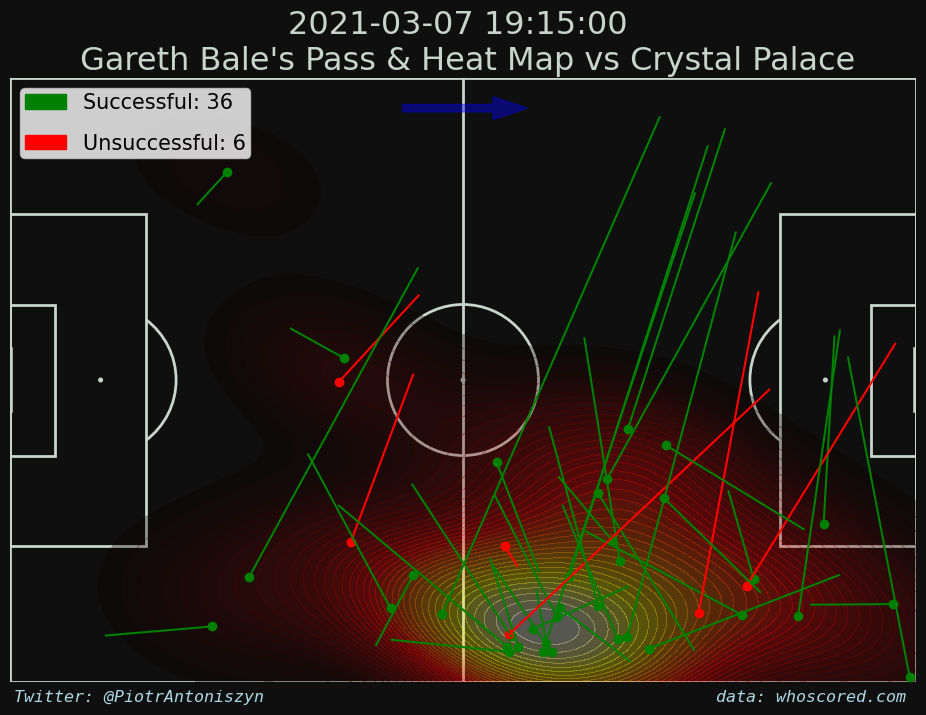

In [15]:
#Generate Pitch
fig,ax = plt.subplots(figsize=(13.5,8),dpi=100)
fig.set_facecolor('#0F0F0F')
ax.patch.set_facecolor('#0F0F0F')

pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', pitch_color='#0F0F0F', line_color='#c7d5cc', figsize=(16,11),
             constrained_layout=True, tight_layout=False)
pitch.draw(ax=ax)
plt.gca().invert_yaxis()


csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}


from matplotlib.patches import Rectangle
#Create heatmap
kde = sns.kdeplot(
    player_pass_df['x'],
    player_pass_df['y'],
    shade = True,
    shade_lowest=False,
    alpha=.3,
    n_levels=40,
    cmap='hot'
)

#if player_pass_df['outcome'] == 'Successful':
#    plt.plot((player_pass_df['x'],player_pass_df['endX']),(player_pass_df['y'],player_pass_df['endY']),color='green',label='Successful')
#    plt.scatter(player_pass_df['x'],player_pass_df['y'],color='green',label='pass starting points')
#if player_pass_df['outcome'] == 'Unsuccessful':
#    plt.plot((player_pass_df['x'],player_pass_df['endX']),(player_pass_df['y'],player_pass_df['endY']),color='red',label='Unsuccessful')
#    plt.scatter(player_pass_df['x'],player_pass_df['y'],color='red', label='pass starting points')
for x in range(len(player_pass_df['x'])):
    if player_pass_df['outcome'][x] == 'Successful':
        x1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='green',label='Successful')
        x2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='green',label='pass starting points')
    if player_pass_df['outcome'][x] == 'Unsuccessful':
        y1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='red',label='Unsuccessful')
        y2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='red', label='pass starting points')

plt.arrow(52.0,76.0,12.0,0.0,color='blue',width=1,alpha=0.4)        
        
plt.xlim(0,120)
plt.ylim(0,80)

red = mpatches.Patch(color='red', label='Unsuccessful: {}'.format(player_pass_df['outcome'].value_counts()[1]))  
green = mpatches.Patch(color='green', label='Successful: {}'.format(player_pass_df['outcome'].value_counts()[0]))  
extra = Rectangle((0, 0), .1, .1, fc="w", fill=False, edgecolor='none', linewidth=0,label='Progressive passes: {}'.format(progPercentage))
fig.text(.18,.1,'Twitter: @PiotrAntoniszyn ',fontstyle='oblique',fontsize=12,fontfamily='monospace',color='lightblue')
fig.text(.70,.1,'data: whoscored.com ',fontstyle='oblique',fontsize=12,fontfamily='monospace',color='lightblue')

#pass map title
if int(h_a) == 1:
    plt.title("{} {} \n {}\'s Pass & Heat Map vs {}".format(xg_data['startTime'][:10],xg_data['startTime'][11:20], player_pass_df['name'][1], xg_data['away']['name']), size=23, y=1,**hfont, color='#c7d5cc')
if int(h_a) == 2:
    plt.title("{} {} \n {}\'s Pass & Heat Map vs {}".format(xg_data['startTime'][:10],xg_data['startTime'][11:20], player_pass_df['name'][1], xg_data['home']['name']), size=23, y=1,**hfont, color='#c7d5cc') 
leg = ax.legend(handles=[green,red],borderpad=0.2, markerscale=1.5, labelspacing=1, loc="best", fontsize=15)    
    
#fig.text(.185,.845,'Progressive pass %: {}'.format(progPercentage),fontstyle='oblique',fontsize=12,fontfamily='monospace',color='green',weight='bold')
#fig.text(.185,.825,'Unsuccessful ',fontstyle='oblique',fontsize=12,fontfamily='monospace',color='red',weight='bold')

# 

c:\users\piotrek\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\piotrek\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


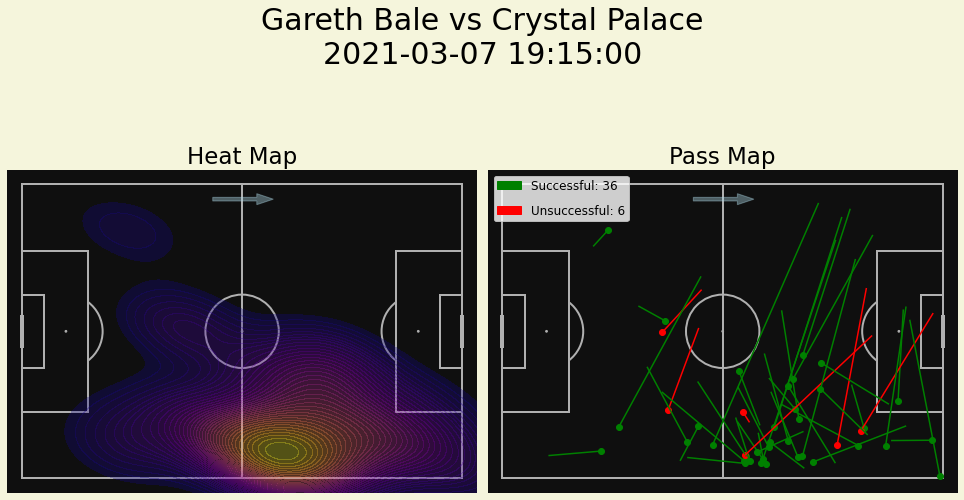

In [85]:
pitch = Pitch(pitch_type='statsbomb', figsize=(13.5,8), layout=(1,2),
              pitch_color='#0F0F0F', stripe=False, constrained_layout=False)

fig, ax = pitch.draw()
fig.set_facecolor('beige')
ax[0].invert_yaxis()
ax[1].invert_yaxis() 
from matplotlib.patches import Rectangle
#Create heatmap
kde = sns.kdeplot(
    player_pass_df['x'],
    player_pass_df['y'],
    shade = True,
    shade_lowest=False,
    alpha=.3,
    n_levels=40,
    cmap='plasma',
    ax=ax[0]
)
ax[0].arrow(52.0,76.0,12.0,0.0,color='lightblue',width=1,alpha=0.4)
ax[1].arrow(52.0,76.0,12.0,0.0,color='lightblue',width=1,alpha=0.4)
#if player_pass_df['outcome'] == 'Successful':
#    plt.plot((player_pass_df['x'],player_pass_df['endX']),(player_pass_df['y'],player_pass_df['endY']),color='green',label='Successful')
#    plt.scatter(player_pass_df['x'],player_pass_df['y'],color='green',label='pass starting points')
#if player_pass_df['outcome'] == 'Unsuccessful':
#    plt.plot((player_pass_df['x'],player_pass_df['endX']),(player_pass_df['y'],player_pass_df['endY']),color='red',label='Unsuccessful')
#    plt.scatter(player_pass_df['x'],player_pass_df['y'],color='red', label='pass starting points')
for x in range(len(player_pass_df['x'])):
    if player_pass_df['outcome'][x] == 'Successful':
        x1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='green',label='Successful')
        x2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='green',label='pass starting points')
    if player_pass_df['outcome'][x] == 'Unsuccessful':
        y1 = plt.plot((player_pass_df['x'][x],player_pass_df['endX'][x]),(player_pass_df['y'][x],player_pass_df['endY'][x]),color='red',label='Unsuccessful')
        y2 = plt.scatter(player_pass_df['x'][x],player_pass_df['y'][x],color='red', label='pass starting points')
#pass map title
if int(h_a) == 1:
    sup = fig.suptitle("{} vs {}\n{} {}".format(player_pass_df['name'][1], xg_data['away']['name'],xg_data['startTime'][:10],xg_data['startTime'][11:20]), size=30, y=1,**hfont, color='black')   
    ax[0].set_title("Heat Map", size=23, y=1,**hfont, color='black')
    ax[1].set_title("Pass Map", size=23, y=1,**hfont, color='black')

if int(h_a) == 2:
    plt.title("{} {} \n {}\'s Pass & Heat Map vs {}".format(xg_data['startTime'][:10],xg_data['startTime'][11:20], player_pass_df['name'][1], xg_data['home']['name']), size=23, y=1,**hfont, color='#c7d5cc') 
leg = ax[1].legend(handles=[green,red],borderpad=0.3, markerscale=1.0, labelspacing=1, loc="best", fontsize=12)    
#sup = fig.suptitle("{} vs {}\n{} {}".format(player_pass_df['name'][1], xg_data['away']['name'],xg_data['startTime'][:10],xg_data['startTime'][11:20]), size=20, y=1,**hfont, color='black')   